In [ ]:
import sys
import scipy
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from pathlib import Path
from scipy import stats
from tqdm import tqdm

# Set project root and source path
project_root = Path.cwd()
src_path = str(project_root / "DomiRank" / "src")
if src_path not in sys.path:
    sys.path.append(src_path)

try:
    from DomiRank import domirank 
    print("Successfully imported all modules")
except ImportError as e:
    print(f"Import error: {e}")

In [ ]:
with open('merged_data.pkl', 'rb') as f:
    merged_data = pickle.load(f)

In [ ]:
import networkx as nx
import scipy.sparse

def get_roi_dominance_series_with_metrics(merged_data, percentile=95):
    """
    Calculate Dominance time series and additional network metrics for each ROI
    
    Args:
        merged_data: Dictionary containing merged data
        percentile: Percentile threshold for matrix thresholding
        
    Returns:
        dict: Contains Dominance time series and network metrics for each condition
    """
    roi_names = merged_data['roi_names']
    results = {}
    
    for condition in merged_data:
        if condition == 'roi_names':
            continue
            
        print(f"\nProcessing condition: {condition}")
        condition_data = merged_data[condition]
        data = condition_data['data']  # (ROIs, time_points, trials)
        n_rois, n_timepoints, n_trials = data.shape
        
        # Initialize storage arrays
        roi_dominance = np.zeros((n_rois, n_timepoints))
        roi_degree = np.zeros((n_rois, n_timepoints))
        roi_betweenness = np.zeros((n_rois, n_timepoints))
        
        for t in tqdm(range(n_timepoints), desc=f"Timepoints for {condition}"):
            # Get data for current timepoint (ROIs × trials)
            timepoint_data = data[:, t, :]
            
            # Compute correlation matrix (ROIs × ROIs)
            corr_matrix = np.corrcoef(timepoint_data)
            
            # Threshold matrix
            threshold = np.percentile(corr_matrix[corr_matrix > 0], percentile)
            thresholded_matrix = corr_matrix * (corr_matrix >= threshold)
            
            try:
                # Convert to sparse matrix
                sparse_matrix = scipy.sparse.csr_matrix(thresholded_matrix)
                
                # Compute DomiRank
                success, dominance = domirank(sparse_matrix)
                if success:
                    roi_dominance[:, t] = dominance
                    
                    # Compute additional network metrics
                    G = nx.from_scipy_sparse_array(sparse_matrix, create_using=nx.DiGraph)
                    
                    # Degree centrality
                    degree_centrality = nx.degree_centrality(G)
                    roi_degree[:, t] = [degree_centrality.get(i, 0) for i in range(n_rois)]
                    
                    # Betweenness centrality
                    betweenness_centrality = nx.betweenness_centrality(G)
                    roi_betweenness[:, t] = [betweenness_centrality.get(i, 0) for i in range(n_rois)]
                    
            except Exception as e:
                print(f"Error at timepoint {t}: {str(e)}")
                roi_dominance[:, t] = np.nan
                roi_degree[:, t] = np.nan
                roi_betweenness[:, t] = np.nan
        
        # Compute mean values for each metric
        mean_dominance = np.nanmean(roi_dominance, axis=1)
        mean_degree = np.nanmean(roi_degree, axis=1)
        mean_betweenness = np.nanmean(roi_betweenness, axis=1)
        
        # Store results
        results[condition] = {
            'roi_dominance': roi_dominance,      # ROI x Time
            'roi_degree': roi_degree,            # ROI x Time
            'roi_betweenness': roi_betweenness,  # ROI x Time
            'mean_dominance': mean_dominance,    # Mean Dominance per ROI
            'mean_degree': mean_degree,          # Mean degree centrality
            'mean_betweenness': mean_betweenness, # Mean betweenness centrality
            'roi_names': roi_names,
            'stim_roi': condition_data.get('stim_roi', None)
        }
    
    return results

# Calculate results and save to file
roi_dominance_results = get_roi_dominance_series_with_metrics(merged_data)

with open('roi_dominance_series_results2.pkl', 'wb') as f:
    pickle.dump(roi_dominance_results, f)


Processing condition: Rest


Timepoints for Rest:   0%|          | 0/20 [00:00<?, ?it/s]

Current Interval : [-13.359052501627026, -1.0]
Current Interval : [-1.8607150437138258, -1.0]
Current Interval : [-1.8607150437138258, -1.1307651269555887]
Current Interval : [-1.8607150437138258, -1.2537225148185884]
Current Interval : [-1.8607150437138258, -1.3650471102051558]
Current Interval : [-1.5747991154592806, -1.3650471102051558]
Current Interval : [-1.5747991154592806, -1.4120664024695515]
Current Interval : [-1.5747991154592806, -1.4495129524697334]
Current Interval : [-1.5747991154592806, -1.478927684337879]
Current Interval : [-1.5747991154592806, -1.5017842834876054]
Current Interval : [-1.5374252894015306, -1.5017842834876054]
Current Interval : [-1.5374252894015306, -1.5105387120017584]
Current Interval : [-1.5374252894015306, -1.5171718078539307]
Current Interval : [-1.5374252894015306, -1.5221849856864016]
Current Interval : [-1.5374252894015306, -1.525966664638311]
Current Interval : [-1.5374252894015306, -1.528815277953558]
Current Interval : [-1.5331081952103307, 

Timepoints for Rest:   5%|▌         | 1/20 [00:07<02:29,  7.86s/it]

Current Interval : [-13.359052501627026, -1.0]
Current Interval : [-1.8607150437138258, -1.0]
Current Interval : [-1.8607150437138258, -1.1307651269555887]
Current Interval : [-1.8607150437138258, -1.2537225148185884]
Current Interval : [-1.8607150437138258, -1.3650471102051558]
Current Interval : [-1.5747991154592806, -1.3650471102051558]
Current Interval : [-1.5747991154592806, -1.4120664024695515]
Current Interval : [-1.5747991154592806, -1.4495129524697334]
Current Interval : [-1.5747991154592806, -1.478927684337879]
Current Interval : [-1.5747991154592806, -1.5017842834876054]
Current Interval : [-1.5374252894015306, -1.5017842834876054]
Current Interval : [-1.5374252894015306, -1.5105387120017584]
Current Interval : [-1.5374252894015306, -1.5171718078539307]
Current Interval : [-1.5374252894015306, -1.5221849856864016]
Current Interval : [-1.5374252894015306, -1.525966664638311]
Current Interval : [-1.5374252894015306, -1.528815277953558]
Current Interval : [-1.5331081952103307, 

Timepoints for Rest:  10%|█         | 2/20 [00:15<02:16,  7.61s/it]

Current Interval : [-7.918615615574414, -1.0]
Current Interval : [-1.7757499497447298, -1.0]
Current Interval : [-1.279474002986498, -1.0]
Current Interval : [-1.1226046020355307, -1.0]
Current Interval : [-1.057761394617705, -1.0]
Current Interval : [-1.0280700156824722, -1.0]
Current Interval : [-1.013840752767614, -1.0]
Current Interval : [-1.0068728139246328, -1.0]
Current Interval : [-1.0034246385106949, -1.0]
Current Interval : [-1.0017093922301168, -1.0]
Current Interval : [-1.0008539662334364, -1.0]
Current Interval : [-1.0004268008799482, -1.0]
Current Interval : [-1.0002133549099426, -1.0]
Current Interval : [-1.0001066660761058, -1.0]
Current Interval : [-1.0000533301937917, -1.0]
Current Interval : [-1.0000266643858875, -1.0]
Current Interval : [-1.0000133320151987, -1.0]
Current Interval : [-1.000006665963164, -1.0]
Current Interval : [-10.852665366472541, -1.0]
Current Interval : [-1.8312615822549612, -1.0]
Current Interval : [-1.8312615822549612, -1.128008798362016]
Curr

Timepoints for Rest:  15%|█▌        | 3/20 [00:22<02:07,  7.51s/it]

Current Interval : [-10.852665366472541, -1.0]
Current Interval : [-1.8312615822549612, -1.0]
Current Interval : [-1.8312615822549612, -1.128008798362016]
Current Interval : [-1.8312615822549612, -1.2478064517164627]
Current Interval : [-1.4842543210524235, -1.2478064517164627]
Current Interval : [-1.4842543210524235, -1.299562891359529]
Current Interval : [-1.4842543210524235, -1.3412882967783748]
Current Interval : [-1.4842543210524235, -1.3743840783986854]
Current Interval : [-1.4842543210524235, -1.4002979451873938]
Current Interval : [-1.4842543210524235, -1.4203838357069292]
Current Interval : [-1.4842543210524235, -1.4358305132837677]
Current Interval : [-1.4842543210524235, -1.4476378117569586]
Current Interval : [-1.465717413935185, -1.4476378117569586]
Current Interval : [-1.465717413935185, -1.4521157682780437]
Current Interval : [-1.465717413935185, -1.4554924581645758]
Current Interval : [-1.4605870411150608, -1.4554924581645758]
Current Interval : [-1.4605870411150608, -1

Timepoints for Rest:  20%|██        | 4/20 [00:28<01:51,  6.97s/it]

Current Interval : [-9.175284505129978, -1.0]
Current Interval : [-1.8034452993435537, -1.0]
Current Interval : [-1.8034452993435537, -1.1253359125206501]
Current Interval : [-1.8034452993435537, -1.2420952706599628]
Current Interval : [-1.8034452993435537, -1.3469066092716722]
Current Interval : [-1.542095907763834, -1.3469066092716722]
Current Interval : [-1.542095907763834, -1.3909202042697408]
Current Interval : [-1.542095907763834, -1.4258655382046859]
Current Interval : [-1.542095907763834, -1.453248995180495]
Current Interval : [-1.542095907763834, -1.4744869105703833]
Current Interval : [-1.542095907763834, -1.4908272259207027]
Current Interval : [-1.542095907763834, -1.5033221270895372]
Current Interval : [-1.542095907763834, -1.5128316201668108]
Current Interval : [-1.542095907763834, -1.520043068119131]
Current Interval : [-1.542095907763834, -1.5254969343641953]
Current Interval : [-1.542095907763834, -1.5296130867401128]
Current Interval : [-1.542095907763834, -1.532714807

Timepoints for Rest:  25%|██▌       | 5/20 [00:40<02:10,  8.68s/it]

Current Interval : [-15.598051595100275, -1.0]
Current Interval : [-1.8795039292087516, -1.0]
Current Interval : [-1.8795039292087516, -1.1324851046959181]
Current Interval : [-1.8795039292087516, -1.257427960990466]
Current Interval : [-1.8795039292087516, -1.370859305348542]
Current Interval : [-1.8795039292087516, -1.4703375904165323]
Current Interval : [-1.8795039292087516, -1.5549662858165947]
Current Interval : [-1.8795039292087516, -1.6251194285385053]
Current Interval : [-1.8795039292087516, -1.6820338260423702]
Current Interval : [-1.8795039292087516, -1.727406317477674]
Current Interval : [-1.8795039292087516, -1.7630752417894282]
Current Interval : [-1.8795039292087516, -1.7908088258717672]
Current Interval : [-1.8795039292087516, -1.812188435412227]
Current Interval : [-1.8795039292087516, -1.8285611729711644]
Current Interval : [-1.8536826159699469, -1.8285611729711644]
Current Interval : [-1.8536826159699469, -1.8347774822707197]
Current Interval : [-1.8536826159699469, -

Timepoints for Rest:  30%|███       | 6/20 [00:47<01:52,  8.02s/it]

Current Interval : [-8.019573429484387, -1.0]
Current Interval : [-1.7782600235325836, -1.0]
Current Interval : [-1.7782600235325836, -1.122855097550237]
Current Interval : [-1.3765247147090813, -1.122855097550237]
Current Interval : [-1.3765247147090813, -1.1770841427433252]
Current Interval : [-1.3765247147090813, -1.2213225922514415]
Current Interval : [-1.2942875652177184, -1.2213225922514415]
Current Interval : [-1.2942875652177184, -1.2387815528690944]
Current Interval : [-1.2942875652177184, -1.2522068945824785]
Current Interval : [-1.2942875652177184, -1.262468431446224]
Current Interval : [-1.2942875652177184, -1.2702756358632354]
Current Interval : [-1.2942875652177184, -1.276194702433314]
Current Interval : [-1.2942875652177184, -1.280670329249537]
Current Interval : [-1.2942875652177184, -1.2840477047764745]
Current Interval : [-1.2942875652177184, -1.28659244975516]
Current Interval : [-1.2942875652177184, -1.2885076375603808]
Current Interval : [-1.2942875652177184, -1.28

Timepoints for Rest:  35%|███▌      | 7/20 [00:53<01:37,  7.53s/it]

Current Interval : [-9.700935185603077, -1.0]
Current Interval : [-1.8131004472683119, -1.0]
Current Interval : [-1.2890406732748847, -1.0]
Current Interval : [-1.2890406732748847, -1.0593863626384483]
Current Interval : [-1.2890406732748847, -1.10877075944074]
Current Interval : [-1.192129278187909, -1.10877075944074]
Current Interval : [-1.192129278187909, -1.1284980506909081]
Current Interval : [-1.192129278187909, -1.1437604221797648]
Current Interval : [-1.192129278187909, -1.1554808979273623]
Current Interval : [-1.173519030391549, -1.1554808979273623]
Current Interval : [-1.173519030391549, -1.159938243557408]
Current Interval : [-1.173519030391549, -1.1633038860588811]
Current Interval : [-1.173519030391549, -1.1658409633027629]
Current Interval : [-1.1696673966671114, -1.1658409633027629]
Current Interval : [-1.1696673966671114, -1.1667952226464915]
Current Interval : [-1.1696673966671114, -1.16751194294682]
Current Interval : [-1.1696673966671114, -1.168050061273712]
Current 

Timepoints for Rest:  40%|████      | 8/20 [00:59<01:25,  7.10s/it]

Current Interval : [-13.644455539884001, -1.0]
Current Interval : [-13.644455539884001, -1.3015368561883651]
Current Interval : [-2.3763911150455748, -1.3015368561883651]
Current Interval : [-2.3763911150455748, -1.467473343094748]
Current Interval : [-2.3763911150455748, -1.6226283296581545]
Current Interval : [-1.9284725162953316, -1.6226283296581545]
Current Interval : [-1.9284725162953316, -1.689619200102962]
Current Interval : [-1.9284725162953316, -1.743608386055991]
Current Interval : [-1.9284725162953316, -1.7864201190147437]
Current Interval : [-1.9284725162953316, -1.8199344746555286]
Current Interval : [-1.9284725162953316, -1.8459072531910172]
Current Interval : [-1.9284725162953316, -1.8658785978760706]
Current Interval : [-1.9284725162953316, -1.8811430250391892]
Current Interval : [-1.9284725162953316, -1.8927562564871943]
Current Interval : [-1.9104474700286822, -1.8927562564871943]
Current Interval : [-1.9104474700286822, -1.8971482714098649]
Current Interval : [-1.910

Timepoints for Rest:  45%|████▌     | 9/20 [01:07<01:18,  7.16s/it]

Current Interval : [-9.589806270243729, -1.0]
Current Interval : [-1.811139132391893, -1.0]
Current Interval : [-1.2885446412258241, -1.0]
Current Interval : [-1.2885446412258241, -1.0593025792223474]
Current Interval : [-1.2885446412258241, -1.1086101606304626]
Current Interval : [-1.2885446412258241, -1.1487121721230362]
Current Interval : [-1.2885446412258241, -1.1807457127378165]
Current Interval : [-1.2885446412258241, -1.2059683736988458]
Current Interval : [-1.2885446412258241, -1.2256040551297713]
Current Interval : [-1.2885446412258241, -1.240755622955253]
Current Interval : [-1.2885446412258241, -1.2523674462588283]
Current Interval : [-1.2701985005077283, -1.2523674462588283]
Current Interval : [-1.2701985005077283, -1.256778110943542]
Current Interval : [-1.2701985005077283, -1.260106551499634]
Current Interval : [-1.2701985005077283, -1.2626144746490366]
Current Interval : [-1.2701985005077283, -1.2645019779990403]
Current Interval : [-1.2701985005077283, -1.26592131309733

Timepoints for Rest:  50%|█████     | 10/20 [01:14<01:11,  7.16s/it]

Current Interval : [-17.72496341474253, -1.0]
Current Interval : [-17.72496341474253, -1.308721685255737]
Current Interval : [-2.4374727089753354, -1.308721685255737]
Current Interval : [-2.4374727089753354, -1.4800703670053506]
Current Interval : [-2.4374727089753354, -1.641233254694011]
Current Interval : [-2.4374727089753354, -1.787186521731919]
Current Interval : [-2.0622815402040504, -1.787186521731919]
Current Interval : [-2.0622815402040504, -1.8488424270616868]
Current Interval : [-2.0622815402040504, -1.897950273799727]
Current Interval : [-2.0622815402040504, -1.9365279465965368]
Current Interval : [-1.9974274091014979, -1.9365279465965368]
Current Interval : [-1.9974274091014979, -1.9514019956009843]
Current Interval : [-1.9974274091014979, -1.9627083468144781]
Current Interval : [-1.9974274091014979, -1.971274465492985]
Current Interval : [-1.9974274091014979, -1.9777482851594625]
Current Interval : [-1.9974274091014979, -1.9826316232557137]
Current Interval : [-1.990002014

Timepoints for Rest:  55%|█████▌    | 11/20 [01:20<01:02,  6.94s/it]

Current Interval : [-7.7137325515959985, -1.0]
Current Interval : [-1.7704772337046675, -1.0]
Current Interval : [-1.278102712533172, -1.0]
Current Interval : [-1.278102712533172, -1.0575268900155927]
Current Interval : [-1.1573992599089593, -1.0575268900155927]
Current Interval : [-1.1573992599089593, -1.0808434764380128]
Current Interval : [-1.1573992599089593, -1.099017003646038]
Current Interval : [-1.1573992599089593, -1.1130533365213942]
Current Interval : [-1.1573992599089593, -1.12381815108362]
Current Interval : [-1.1573992599089593, -1.1320294062662746]
Current Interval : [-1.1573992599089593, -1.1382670264348798]
Current Interval : [-1.1573992599089593, -1.142990539447384]
Current Interval : [-1.1501497744508302, -1.142990539447384]
Current Interval : [-1.1501497744508302, -1.1447719795278104]
Current Interval : [-1.1501497744508302, -1.1461117080269931]
Current Interval : [-1.1501497744508302, -1.1471185640601353]
Current Interval : [-1.1501497744508302, -1.1478748677832968

Timepoints for Rest:  60%|██████    | 12/20 [01:27<00:54,  6.81s/it]

Current Interval : [-8.159372468161678, -1.0]
Current Interval : [-1.7816444295772362, -1.0]
Current Interval : [-1.7816444295772362, -1.1231919066770013]
Current Interval : [-1.7816444295772362, -1.2375323874669475]
Current Interval : [-1.4605588331924706, -1.2375323874669475]
Current Interval : [-1.4605588331924706, -1.2866500578356939]
Current Interval : [-1.4605588331924706, -1.3261255068248308]
Current Interval : [-1.4605588331924706, -1.3573591520815285]
Current Interval : [-1.4605588331924706, -1.3817672652472555]
Current Interval : [-1.4605588331924706, -1.400657292426607]
Current Interval : [-1.4605588331924706, -1.4151672693527608]
Current Interval : [-1.4605588331924706, -1.4262485849809288]
Current Interval : [-1.4605588331924706, -1.4346741314970433]
Current Interval : [-1.4605588331924706, -1.441058910249126]
Current Interval : [-1.4605588331924706, -1.445884913103258]
Current Interval : [-1.4605588331924706, -1.449525681199997]
Current Interval : [-1.455021341920013, -1.

Timepoints for Rest:  65%|██████▌   | 13/20 [01:34<00:48,  6.93s/it]

Current Interval : [-7.57983334886823, -1.0]
Current Interval : [-1.7668952392573196, -1.0]
Current Interval : [-1.2771681516439222, -1.0]
Current Interval : [-1.1217161549724952, -1.0]
Current Interval : [-1.1217161549724952, -1.0278836231919082]
Current Interval : [-1.1217161549724952, -1.049838601167361]
Current Interval : [-1.1217161549724952, -1.0669303455853194]
Current Interval : [-1.0936375559675047, -1.0669303455853194]
Current Interval : [-1.0936375559675047, -1.0734841087074671]
Current Interval : [-1.0936375559675047, -1.078452513397994]
Current Interval : [-1.0936375559675047, -1.082209103324296]
Current Interval : [-1.0936375559675047, -1.085043765324553]
Current Interval : [-1.0936375559675047, -1.0871795262054162]
Current Interval : [-1.0936375559675047, -1.0887868727139076]
Current Interval : [-1.0936375559675047, -1.0899955050697754]
Current Interval : [-1.0936375559675047, -1.0909037417452354]
Current Interval : [-1.0936375559675047, -1.0915859131552077]
Current Inte

Timepoints for Rest:  70%|███████   | 14/20 [01:40<00:40,  6.76s/it]

Current Interval : [-5.465755190901302, -1.0]
Current Interval : [-1.69067805059888, -1.0]
Current Interval : [-1.2566929367284025, -1.0]
Current Interval : [-1.1137473922794912, -1.0]
Current Interval : [-1.05381314375358, -1.0]
Current Interval : [-1.0262015772550905, -1.0]
Current Interval : [-1.0129313773857516, -1.0]
Current Interval : [-1.0064241521251192, -1.0]
Current Interval : [-1.0032017916641978, -1.0]
Current Interval : [-1.0015983370609598, -1.0]
Current Interval : [-1.0007985303701374, -1.0]
Current Interval : [-1.000399105836003, -1.0]
Current Interval : [-1.0001995131045793, -1.0]
Current Interval : [-1.0000997466019126, -1.0]
Current Interval : [-1.0000498708137342, -1.0]
Current Interval : [-1.000024934785108, -1.0]
Current Interval : [-1.00001246723712, -1.0]
Current Interval : [-1.0000062335797024, -1.0]
Current Interval : [-17.414788589327866, -1.0]
Current Interval : [-17.414788589327866, -1.3082915601034026]
Current Interval : [-2.4337470918848534, -1.3082915601

Timepoints for Rest:  75%|███████▌  | 15/20 [01:48<00:34,  6.85s/it]

Current Interval : [-17.414788589327866, -1.0]
Current Interval : [-17.414788589327866, -1.3082915601034026]
Current Interval : [-2.4337470918848534, -1.3082915601034026]
Current Interval : [-2.4337470918848534, -1.479314076840425]
Current Interval : [-2.4337470918848534, -1.640113267538002]
Current Interval : [-2.4337470918848534, -1.7856895735205442]
Current Interval : [-2.4337470918848534, -1.9130405540432802]
Current Interval : [-2.4337470918848534, -2.02114802699205]
Current Interval : [-2.2083407136196738, -2.02114802699205]
Current Interval : [-2.2083407136196738, -2.064906607022264]
Current Interval : [-2.2083407136196738, -2.098989514141329]
Current Interval : [-2.2083407136196738, -2.1252993163447984]
Current Interval : [-2.2083407136196738, -2.145468612492349]
Current Interval : [-2.2083407136196738, -2.160848609275149]
Current Interval : [-2.184336547206029, -2.160848609275149]
Current Interval : [-2.184336547206029, -2.1666731104950854]
Current Interval : [-2.1843365472060

Timepoints for Rest:  80%|████████  | 16/20 [01:54<00:27,  6.78s/it]

Current Interval : [-15.450339553589238, -1.0]
Current Interval : [-1.8784219624473573, -1.0]
Current Interval : [-1.8784219624473573, -1.132386851915475]
Current Interval : [-1.8784219624473573, -1.2572160035847273]
Current Interval : [-1.8784219624473573, -1.3705264315790877]
Current Interval : [-1.8784219624473573, -1.469884822157678]
Current Interval : [-1.8784219624473573, -1.554401332271477]
Current Interval : [-1.7011196617595328, -1.554401332271477]
Current Interval : [-1.7011196617595328, -1.588655969859392]
Current Interval : [-1.7011196617595328, -1.615354373363767]
Current Interval : [-1.7011196617595328, -1.6359745912980082]
Current Interval : [-1.7011196617595328, -1.65178857035282]
Current Interval : [-1.7011196617595328, -1.663851154075467]
Current Interval : [-1.7011196617595328, -1.6730143466236334]
Current Interval : [-1.686949950639927, -1.6730143466236334]
Current Interval : [-1.686949950639927, -1.6764766180269042]
Current Interval : [-1.686949950639927, -1.679082

Timepoints for Rest:  85%|████████▌ | 17/20 [02:01<00:20,  6.77s/it]

Current Interval : [-14.73231430288734, -1.0]
Current Interval : [-1.8728731220661576, -1.0]
Current Interval : [-1.8728731220661576, -1.1318814504613985]
Current Interval : [-1.8728731220661576, -1.2561262658928563]
Current Interval : [-1.8728731220661576, -1.368815806263597]
Current Interval : [-1.8728731220661576, -1.4675589937285096]
Current Interval : [-1.8728731220661576, -1.5515002049307176]
Current Interval : [-1.8728731220661576, -1.6210402093683693]
Current Interval : [-1.8728731220661576, -1.6774283963078782]
Current Interval : [-1.8728731220661576, -1.7223629339599347]
Current Interval : [-1.8728731220661576, -1.7576760785198802]
Current Interval : [-1.81344700368041, -1.7576760785198802]
Current Interval : [-1.81344700368041, -1.7712947209615255]
Current Interval : [-1.81344700368041, -1.7816480053800807]
Current Interval : [-1.81344700368041, -1.7894927447955027]
Current Interval : [-1.8013902439140008, -1.7894927447955027]
Current Interval : [-1.8013902439140008, -1.7924

Timepoints for Rest:  90%|█████████ | 18/20 [02:08<00:13,  6.86s/it]

Current Interval : [-8.324724495777303, -1.0]
Current Interval : [-1.7855164513540644, -1.0]
Current Interval : [-1.7855164513540644, -1.1235759226587416]
Current Interval : [-1.7855164513540644, -1.2383484630825912]
Current Interval : [-1.7855164513540644, -1.3410922289620946]
Current Interval : [-1.5317185375131617, -1.3410922289620946]
Current Interval : [-1.5317185375131617, -1.3841577255281712]
Current Interval : [-1.5317185375131617, -1.4183167378337953]
Current Interval : [-1.5317185375131617, -1.445063293104102]
Current Interval : [-1.5317185375131617, -1.4657947127441247]
Current Interval : [-1.5317185375131617, -1.4817378880886285]
Current Interval : [-1.5063137277438563, -1.4817378880886285]
Current Interval : [-1.5063137277438563, -1.487806360059207]
Current Interval : [-1.5063137277438563, -1.4923904347436727]
Current Interval : [-1.5063137277438563, -1.495847071411574]
Current Interval : [-1.5063137277438563, -1.4984500753012004]
Current Interval : [-1.5063137277438563, -

Timepoints for Rest:  95%|█████████▌| 19/20 [02:14<00:06,  6.67s/it]

Current Interval : [-11.367225754748961, -1.0]
Current Interval : [-1.838282243757699, -1.0]
Current Interval : [-1.838282243757699, -1.1286725963534505]
Current Interval : [-1.838282243757699, -1.249228723856935]
Current Interval : [-1.838282243757699, -1.3580185476592361]
Current Interval : [-1.838282243757699, -1.4529144870672626]
Current Interval : [-1.6230369204362953, -1.4529144870672626]
Current Interval : [-1.6230369204362953, -1.492011665314137]
Current Interval : [-1.6230369204362953, -1.5227438531234516]
Current Interval : [-1.6230369204362953, -1.5466368639902346]
Current Interval : [-1.6230369204362953, -1.565054537285933]
Current Interval : [-1.6230369204362953, -1.5791582457890303]
Current Interval : [-1.6230369204362953, -1.5899039778308002]
Current Interval : [-1.6230369204362953, -1.5980597414221887]
Current Interval : [-1.6230369204362953, -1.6042316869770308]
Current Interval : [-1.6230369204362953, -1.6088920230611106]
Current Interval : [-1.6230369204362953, -1.61

Timepoints for Rest: 100%|██████████| 20/20 [02:24<00:00,  7.21s/it]


Current Interval : [-7.6358063428851315, -1.0]
Current Interval : [-1.7684061081745122, -1.0]
Current Interval : [-1.7684061081745122, -1.1218682793561439]
Current Interval : [-1.3728237888691404, -1.1218682793561439]
Current Interval : [-1.3728237888691404, -1.1755936186801224]
Current Interval : [-1.3728237888691404, -1.2193903099050623]
Current Interval : [-1.3728237888691404, -1.254440917957922]
Current Interval : [-1.3728237888691404, -1.2820803636423357]
Current Interval : [-1.3259012916042276, -1.2820803636423357]
Current Interval : [-1.3259012916042276, -1.292761781112994]
Current Interval : [-1.3259012916042276, -1.3008903783574695]
Current Interval : [-1.3259012916042276, -1.307054227070998]
Current Interval : [-1.3259012916042276, -1.3117155824047941]
Current Interval : [-1.3259012916042276, -1.3152334761840385]
Current Interval : [-1.3259012916042276, -1.3178843044534763]
Current Interval : [-1.3259012916042276, -1.3198794485578362]
Current Interval : [-1.3259012916042276, 

Timepoints for MOp (L):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-18.762781740429013, -1.0]
Current Interval : [-18.762781740429013, -1.3100592567618583]
Current Interval : [-18.762781740429013, -1.7070164442502305]
Current Interval : [-3.129330018970303, -1.7070164442502305]
Current Interval : [-3.129330018970303, -1.9258457582009163]
Current Interval : [-3.129330018970303, -2.1307033411232807]
Current Interval : [-3.129330018970303, -2.315427174417309]
Current Interval : [-3.129330018970303, -2.476451320302577]
Current Interval : [-2.764871830747038, -2.476451320302577]
Current Interval : [-2.764871830747038, -2.542764097516132]
Current Interval : [-2.764871830747038, -2.5948770243692265]
Current Interval : [-2.764871830747038, -2.6353853966977825]
Current Interval : [-2.764871830747038, -2.666606497302561]
Current Interval : [-2.764871830747038, -2.6905121327210035]
Current Interval : [-2.764871830747038, -2.7087245446796864]
Current Interval : [-2.7365102127224694, -2.7087245446796864]
Current Interval : [-2.7365102127224694,

Timepoints for MOp (L):   3%|▎         | 1/30 [00:06<03:14,  6.70s/it]

Current Interval : [-18.762781740429013, -1.0]
Current Interval : [-18.762781740429013, -1.3100592567618583]
Current Interval : [-18.762781740429013, -1.7070164442502305]
Current Interval : [-3.129330018970303, -1.7070164442502305]
Current Interval : [-3.129330018970303, -1.9258457582009163]
Current Interval : [-3.129330018970303, -2.1307033411232807]
Current Interval : [-3.129330018970303, -2.315427174417309]
Current Interval : [-3.129330018970303, -2.476451320302577]
Current Interval : [-2.764871830747038, -2.476451320302577]
Current Interval : [-2.764871830747038, -2.542764097516132]
Current Interval : [-2.764871830747038, -2.5948770243692265]
Current Interval : [-2.764871830747038, -2.6353853966977825]
Current Interval : [-2.764871830747038, -2.666606497302561]
Current Interval : [-2.764871830747038, -2.6905121327210035]
Current Interval : [-2.764871830747038, -2.7087245446796864]
Current Interval : [-2.7365102127224694, -2.7087245446796864]
Current Interval : [-2.7365102127224694,

Timepoints for MOp (L):   7%|▋         | 2/30 [00:13<03:13,  6.92s/it]

Current Interval : [-21.901589291094353, -1.0]
Current Interval : [-21.901589291094353, -1.3133447571663908]
Current Interval : [-21.901589291094353, -1.716809760231974]
Current Interval : [-3.184031413630581, -1.716809760231974]
Current Interval : [-3.184031413630581, -1.9403399682031524]
Current Interval : [-3.184031413630581, -2.150320219189966]
Current Interval : [-2.5670175491020832, -2.150320219189966]
Current Interval : [-2.5670175491020832, -2.241275328283424]
Current Interval : [-2.5670175491020832, -2.314706621708223]
Current Interval : [-2.5670175491020832, -2.3730173057693604]
Current Interval : [-2.5670175491020832, -2.418715413574485]
Current Interval : [-2.5670175491020832, -2.454160955301199]
Current Interval : [-2.5670175491020832, -2.481434458044982]
Current Interval : [-2.5670175491020832, -2.502290740893942]
Current Interval : [-2.534240917052389, -2.502290740893942]
Current Interval : [-2.534240917052389, -2.5102025195406608]
Current Interval : [-2.534240917052389,

Timepoints for MOp (L):  10%|█         | 3/30 [00:20<02:59,  6.65s/it]

Current Interval : [-19.953045458930585, -1.0]
Current Interval : [-19.953045458930585, -1.3114248178217365]
Current Interval : [-19.953045458930585, -1.711079218169478]
Current Interval : [-3.151868993816842, -1.711079218169478]
Current Interval : [-3.151868993816842, -1.9318524537373551]
Current Interval : [-3.151868993816842, -2.138825041430602]
Current Interval : [-3.151868993816842, -2.3257012738460907]
Current Interval : [-3.151868993816842, -2.488791762364857]
Current Interval : [-3.151868993816842, -2.6269536897120895]
Current Interval : [-2.8655711850774703, -2.6269536897120895]
Current Interval : [-2.8655711850774703, -2.6828032704418012]
Current Interval : [-2.8655711850774703, -2.726274135966849]
Current Interval : [-2.8655711850774703, -2.7598131587551507]
Current Interval : [-2.8655711850774703, -2.78551400902734]
Current Interval : [-2.824975524426796, -2.78551400902734]
Current Interval : [-2.824975524426796, -2.795275670052872]
Current Interval : [-2.824975524426796, -

Timepoints for MOp (L):  13%|█▎        | 4/30 [00:26<02:52,  6.64s/it]

Current Interval : [-18.090829506863045, -1.0]
Current Interval : [-18.090829506863045, -1.3092104221161793]
Current Interval : [-18.090829506863045, -1.704496478923874]
Current Interval : [-3.1154581861799406, -1.704496478923874]
Current Interval : [-3.1154581861799406, -1.922124506050535]
Current Interval : [-3.1154581861799406, -2.12567742799024]
Current Interval : [-3.1154581861799406, -2.309075709205604]
Current Interval : [-3.1154581861799406, -2.468829141903375]
Current Interval : [-2.7547056619890724, -2.468829141903375]
Current Interval : [-2.7547056619890724, -2.5345874411964995]
Current Interval : [-2.7547056619890724, -2.5862518683287004]
Current Interval : [-2.7547056619890724, -2.6264038617246395]
Current Interval : [-2.6890252118747795, -2.6264038617246395]
Current Interval : [-2.6890252118747795, -2.6417841648244407]
Current Interval : [-2.6890252118747795, -2.653438127277295]
Current Interval : [-2.6890252118747795, -2.6622462990867817]
Current Interval : [-2.675568751

Timepoints for MOp (L):  17%|█▋        | 5/30 [00:33<02:49,  6.77s/it]

Current Interval : [-17.039187609327332, -1.0]
Current Interval : [-17.039187609327332, -1.3077501467646502]
Current Interval : [-17.039187609327332, -1.7001710687035467]
Current Interval : [-3.091838339329378, -1.7001710687035467]
Current Interval : [-3.091838339329378, -1.9157450576178792]
Current Interval : [-3.091838339329378, -2.117071349430858]
Current Interval : [-2.5132485515693506, -2.117071349430858]
Current Interval : [-2.5132485515693506, -2.2039255793065613]
Current Interval : [-2.5132485515693506, -2.273891487891124]
Current Interval : [-2.5132485515693506, -2.329352269837294]
Current Interval : [-2.5132485515693506, -2.372756360519365]
Current Interval : [-2.5132485515693506, -2.4063859869653483]
Current Interval : [-2.4586566538167203, -2.4063859869653483]
Current Interval : [-2.4586566538167203, -2.419244177865757]
Current Interval : [-2.4586566538167203, -2.4289783604597783]
Current Interval : [-2.4437274020982853, -2.4289783604597783]
Current Interval : [-2.443727402

Timepoints for MOp (L):  20%|██        | 6/30 [00:40<02:40,  6.67s/it]

Current Interval : [-18.27635179955184, -1.0]
Current Interval : [-18.27635179955184, -1.3094509064534143]
Current Interval : [-18.27635179955184, -1.7052099890592702]
Current Interval : [-3.1193775523513176, -1.7052099890592702]
Current Interval : [-3.1193775523513176, -1.9231778069480525]
Current Interval : [-3.1193775523513176, -2.1270995774176487]
Current Interval : [-3.1193775523513176, -2.3108724448767237]
Current Interval : [-3.1193775523513176, -2.470984824474193]
Current Interval : [-2.75757958933693, -2.470984824474193]
Current Interval : [-2.75757958933693, -2.536899710375104]
Current Interval : [-2.75757958933693, -2.5886907783320288]
Current Interval : [-2.75757958933693, -2.6289433901771297]
Current Interval : [-2.75757958933693, -2.6599640419088146]
Current Interval : [-2.75757958933693, -2.683714238964792]
Current Interval : [-2.75757958933693, -2.701807091864688]
Current Interval : [-2.75757958933693, -2.7155376399097277]
Current Interval : [-2.736397141240099, -2.7155

Timepoints for MOp (L):  23%|██▎       | 7/30 [00:47<02:36,  6.80s/it]

Current Interval : [-21.303554185253514, -1.0]
Current Interval : [-21.303554185253514, -1.3127922807414274]
Current Interval : [-21.303554185253514, -1.7151585457632568]
Current Interval : [-3.174719059483582, -1.7151585457632568]
Current Interval : [-3.174719059483582, -1.9378925403936187]
Current Interval : [-3.174719059483582, -2.147003209418626]
Current Interval : [-3.174719059483582, -2.3360597517957857]
Current Interval : [-3.174719059483582, -2.501247139655618]
Current Interval : [-2.798028278585505, -2.501247139655618]
Current Interval : [-2.798028278585505, -2.569379343110028]
Current Interval : [-2.798028278585505, -2.6229651296871612]
Current Interval : [-2.798028278585505, -2.664644575318603]
Current Interval : [-2.798028278585505, -2.69678390598982]
Current Interval : [-2.798028278585505, -2.7214018327677625]
Current Interval : [-2.798028278585505, -2.7401622664136758]
Current Interval : [-2.798028278585505, -2.754403217023634]
Current Interval : [-2.7760443682929283, -2.

Timepoints for MOp (L):  27%|██▋       | 8/30 [00:53<02:29,  6.77s/it]

Current Interval : [-22.182378469500193, -1.0]
Current Interval : [-22.182378469500193, -1.31359403091481]
Current Interval : [-22.182378469500193, -1.717555363152588]
Current Interval : [-3.1882484173004664, -1.717555363152588]
Current Interval : [-3.1882484173004664, -1.941445581015823]
Current Interval : [-3.1882484173004664, -2.1518192739305886]
Current Interval : [-3.1882484173004664, -2.342165872701042]
Current Interval : [-3.1882484173004664, -2.5085957419350744]
Current Interval : [-3.1882484173004664, -2.6498138031400718]
Current Interval : [-2.8942016528781567, -2.6498138031400718]
Current Interval : [-2.8942016528781567, -2.706958029025905]
Current Interval : [-2.8942016528781567, -2.7514602308680565]
Current Interval : [-2.8942016528781567, -2.7858091119920614]
Current Interval : [-2.8942016528781567, -2.8121389014653815]
Current Interval : [-2.8942016528781567, -2.8322151953278483]
Current Interval : [-2.8942016528781567, -2.847461546085495]
Current Interval : [-2.89420165

Timepoints for MOp (L):  30%|███       | 9/30 [01:00<02:20,  6.71s/it]

Current Interval : [-20.530534783122494, -1.0]
Current Interval : [-20.530534783122494, -1.3120312218569912]
Current Interval : [-2.466441225883155, -1.3120312218569912]
Current Interval : [-2.466441225883155, -1.4858987758229296]
Current Interval : [-2.466441225883155, -1.649877430698082]
Current Interval : [-2.466441225883155, -1.798755785844621]
Current Interval : [-2.466441225883155, -1.9293268526809253]
Current Interval : [-2.466441225883155, -2.0404114280769816]
Current Interval : [-2.466441225883155, -2.132498341365227]
Current Interval : [-2.466441225883155, -2.2072094140147787]
Current Interval : [-2.466441225883155, -2.2667708489370693]
Current Interval : [-2.466441225883155, -2.3135950330594954]
Current Interval : [-2.387574428482971, -2.3135950330594954]
Current Interval : [-2.387574428482971, -2.331656727068465]
Current Interval : [-2.387574428482971, -2.3453891545143275]
Current Interval : [-2.387574428482971, -2.3557950983513414]
Current Interval : [-2.387574428482971, -

Timepoints for MOp (L):  33%|███▎      | 10/30 [01:08<02:19,  6.98s/it]

Current Interval : [-20.35983320302022, -1.0]
Current Interval : [-20.35983320302022, -1.3118554969826883]
Current Interval : [-20.35983320302022, -1.7123628143441707]
Current Interval : [-3.1590351277846787, -1.7123628143441707]
Current Interval : [-3.1590351277846787, -1.9337520555760617]
Current Interval : [-3.1590351277846787, -2.1413958432779716]
Current Interval : [-3.1590351277846787, -2.3289560536090534]
Current Interval : [-3.1590351277846787, -2.4927039465958627]
Current Interval : [-3.1590351277846787, -2.6314669226219976]
Current Interval : [-3.1590351277846787, -2.7461194387264336]
Current Interval : [-3.1590351277846787, -2.838886758053623]
Current Interval : [-2.990416735392586, -2.838886758053623]
Current Interval : [-2.990416735392586, -2.875311098213148]
Current Interval : [-2.990416735392586, -2.903248700319361]
Current Interval : [-2.990416735392586, -2.9245607983311155]
Current Interval : [-2.990416735392586, -2.9407513457258525]
Current Interval : [-2.965376100833

Timepoints for MOp (L):  37%|███▋      | 11/30 [01:15<02:12,  6.97s/it]

Current Interval : [-13.618688753488355, -1.0]
Current Interval : [-13.618688753488355, -1.3014781340167954]
Current Interval : [-2.3759017925582064, -1.3014781340167954]
Current Interval : [-2.3759017925582064, -1.4673707019413702]
Current Interval : [-2.3759017925582064, -1.6224771712529888]
Current Interval : [-2.3759017925582064, -1.7621787422193522]
Current Interval : [-2.3759017925582064, -1.8838327141194995]
Current Interval : [-2.3759017925582064, -1.9866981537511168]
Current Interval : [-2.3759017925582064, -2.0715342209699124]
Current Interval : [-2.3759017925582064, -2.140073346789786]
Current Interval : [-2.3759017925582064, -2.194529779793696]
Current Interval : [-2.2816170224166106, -2.194529779793696]
Current Interval : [-2.2816170224166106, -2.2156723282281514]
Current Interval : [-2.2816170224166106, -2.2317985306261012]
Current Interval : [-2.2816170224166106, -2.244048076626212]
Current Interval : [-2.2626766138018084, -2.244048076626212]
Current Interval : [-2.26267

Timepoints for MOp (L):  40%|████      | 12/30 [01:27<02:33,  8.52s/it]

Current Interval : [-17.14429330680977, -1.0]
Current Interval : [-17.14429330680977, -1.3079039970970485]
Current Interval : [-17.14429330680977, -1.7006262006605652]
Current Interval : [-3.0943124355413123, -1.7006262006605652]
Current Interval : [-3.0943124355413123, -1.9164158508015465]
Current Interval : [-3.0943124355413123, -2.1179756778620598]
Current Interval : [-3.0943124355413123, -2.2993521613929166]
Current Interval : [-3.0943124355413123, -2.4571701497649165]
Current Interval : [-3.0943124355413123, -2.590522166480128]
Current Interval : [-2.8200943441466375, -2.590522166480128]
Current Interval : [-2.8200943441466375, -2.644338318728502]
Current Interval : [-2.8200943441466375, -2.686191019335146]
Current Interval : [-2.8200943441466375, -2.718460408461877]
Current Interval : [-2.8200943441466375, -2.743175872393563]
Current Interval : [-2.7811033660513567, -2.743175872393563]
Current Interval : [-2.7811033660513567, -2.7525604317371473]
Current Interval : [-2.7811033660

Timepoints for MOp (L):  43%|████▎     | 13/30 [01:34<02:20,  8.26s/it]

Current Interval : [-20.356715195502392, -1.0]
Current Interval : [-20.356715195502392, -1.3118522602548908]
Current Interval : [-20.356715195502392, -1.7123531635639022]
Current Interval : [-3.158981167455377, -1.7123531635639022]
Current Interval : [-3.158981167455377, -1.9337377700250273]
Current Interval : [-3.158981167455377, -2.1413765059186955]
Current Interval : [-3.158981167455377, -2.328931566630927]
Current Interval : [-3.158981167455377, -2.492674508677297]
Current Interval : [-2.7865504484858903, -2.492674508677297]
Current Interval : [-2.7865504484858903, -2.5601749757403414]
Current Interval : [-2.7865504484858903, -2.6132491550722485]
Current Interval : [-2.7865504484858903, -2.6545216935924194]
Current Interval : [-2.7865504484858903, -2.6863418940559614]
Current Interval : [-2.7865504484858903, -2.7107122183962797]
Current Interval : [-2.7481082151646223, -2.7107122183962797]
Current Interval : [-2.7481082151646223, -2.719965476657161]
Current Interval : [-2.748108215

Timepoints for MOp (L):  47%|████▋     | 14/30 [01:42<02:09,  8.11s/it]

Current Interval : [-15.06880824667808, -1.0]
Current Interval : [-15.06880824667808, -1.3044773172958468]
Current Interval : [-2.4010964054426798, -1.3044773172958468]
Current Interval : [-2.4010964054426798, -1.4726195342393424]
Current Interval : [-2.4010964054426798, -1.6302160716088767]
Current Interval : [-2.4010964054426798, -1.7724813976079723]
Current Interval : [-2.4010964054426798, -1.8966165226650076]
Current Interval : [-2.119247698137569, -1.8966165226650076]
Current Interval : [-2.119247698137569, -1.9477708199636128]
Current Interval : [-2.119247698137569, -1.9879847866186513]
Current Interval : [-2.051518728784179, -1.9879847866186513]
Current Interval : [-2.051518728784179, -2.0034964691362145]
Current Interval : [-2.051518728784179, -2.0152900222925436]
Current Interval : [-2.051518728784179, -2.024226708351077]
Current Interval : [-2.051518728784179, -2.030981409801989]
Current Interval : [-2.051518728784179, -2.0360770938141908]
Current Interval : [-2.0515187287841

Timepoints for MOp (L):  50%|█████     | 15/30 [01:50<02:02,  8.19s/it]

Current Interval : [-17.32815686513591, -1.0]
Current Interval : [-17.32815686513591, -1.308168727207234]
Current Interval : [-2.432684790656962, -1.308168727207234]
Current Interval : [-2.432684790656962, -1.4790981500788771]
Current Interval : [-2.432684790656962, -1.6397935729367665]
Current Interval : [-2.432684790656962, -1.7852623626129613]
Current Interval : [-2.432684790656962, -1.912508711856491]
Current Interval : [-2.432684790656962, -2.020519619914009]
Current Interval : [-2.432684790656962, -2.109888209448908]
Current Interval : [-2.259817489776471, -2.109888209448908]
Current Interval : [-2.259817489776471, -2.145473978095336]
Current Interval : [-2.259817489776471, -2.1729611546363485]
Current Interval : [-2.259817489776471, -2.1940432281665876]
Current Interval : [-2.259817489776471, -2.210125207602215]
Current Interval : [-2.259817489776471, -2.2223422626634814]
Current Interval : [-2.259817489776471, -2.231594060054519]
Current Interval : [-2.259817489776471, -2.23858

Timepoints for MOp (L):  53%|█████▎    | 16/30 [01:59<01:54,  8.17s/it]

Current Interval : [-12.360685085283196, -1.0]
Current Interval : [-12.360685085283196, -1.2983212174069343]
Current Interval : [-2.3498253609778255, -1.2983212174069343]
Current Interval : [-2.3498253609778255, -1.4618601835164402]
Current Interval : [-2.3498253609778255, -1.6143721859380458]
Current Interval : [-2.3498253609778255, -1.7514123455758706]
Current Interval : [-2.0069615280223, -1.7514123455758706]
Current Interval : [-2.0069615280223, -1.8089978955220523]
Current Interval : [-2.0069615280223, -1.8547349542220255]
Current Interval : [-2.0069615280223, -1.8905848255897542]
Current Interval : [-2.0069615280223, -1.918395086399534]
Current Interval : [-2.0069615280223, -1.9397956962131728]
Current Interval : [-2.0069615280223, -1.9561621356239687]
Current Interval : [-2.0069615280223, -1.9686193583799827]
Current Interval : [-2.0069615280223, -1.9780668957920533]
Current Interval : [-2.0069615280223, -1.9852122717359697]
Current Interval : [-2.0069615280223, -1.9906052730021

Timepoints for MOp (L):  57%|█████▋    | 17/30 [02:10<02:00,  9.24s/it]

Current Interval : [-14.361712884157503, -1.0]
Current Interval : [-14.361712884157503, -1.3030888252272315]
Current Interval : [-14.361712884157503, -1.6864460361585416]
Current Interval : [-3.018446400761028, -1.6864460361585416]
Current Interval : [-3.018446400761028, -1.8955683268376176]
Current Interval : [-3.018446400761028, -2.0899350591079386]
Current Interval : [-3.018446400761028, -2.2640472756571923]
Current Interval : [-2.58737852573975, -2.2640472756571923]
Current Interval : [-2.58737852573975, -2.3370598315447237]
Current Interval : [-2.58737852573975, -2.3949862050437707]
Current Interval : [-2.4874677833546315, -2.3949862050437707]
Current Interval : [-2.4874677833546315, -2.417455856165595]
Current Interval : [-2.4874677833546315, -2.434586742330234]
Current Interval : [-2.4874677833546315, -2.4475950893323755]
Current Interval : [-2.4874677833546315, -2.4574429425569893]
Current Interval : [-2.4874677833546315, -2.4648809946137487]
Current Interval : [-2.487467783354

Timepoints for MOp (L):  60%|██████    | 18/30 [02:20<01:52,  9.37s/it]

Current Interval : [-12.260470768270451, -1.0]
Current Interval : [-12.260470768270451, -1.2980426109385135]
Current Interval : [-2.347545492971973, -1.2980426109385135]
Current Interval : [-2.347545492971973, -1.4613745706633876]
Current Interval : [-2.347545492971973, -1.6136589037355031]
Current Interval : [-2.347545492971973, -1.750465999231218]
Current Interval : [-2.347545492971973, -1.8693281818600296]
Current Interval : [-2.347545492971973, -1.969636602140171]
Current Interval : [-2.347545492971973, -2.052228771392247]
Current Interval : [-2.347545492971973, -2.118866094323294]
Current Interval : [-2.227351623432435, -2.118866094323294]
Current Interval : [-2.227351623432435, -2.1449845324138233]
Current Interval : [-2.227351623432435, -2.1649998657724323]
Current Interval : [-2.227351623432435, -2.1802582258698577]
Current Interval : [-2.227351623432435, -2.191843888247818]
Current Interval : [-2.227351623432435, -2.200614262405511]
Current Interval : [-2.227351623432435, -2.2

Timepoints for MOp (L):  63%|██████▎   | 19/30 [02:29<01:42,  9.35s/it]

Current Interval : [-17.679050249482653, -1.0]
Current Interval : [-17.679050249482653, -1.3086589507120099]
Current Interval : [-2.436928763248141, -1.3086589507120099]
Current Interval : [-2.436928763248141, -1.47996004350895]
Current Interval : [-2.436928763248141, -1.641069853121414]
Current Interval : [-2.436928763248141, -1.786968094101068]
Current Interval : [-2.436928763248141, -1.9146324527090288]
Current Interval : [-2.436928763248141, -2.0230292088894894]
Current Interval : [-2.436928763248141, -2.112738598167266]
Current Interval : [-2.436928763248141, -2.1854214936930365]
Current Interval : [-2.436928763248141, -2.243302429456092]
Current Interval : [-2.436928763248141, -2.2887659412329358]
Current Interval : [-2.436928763248141, -2.324091549409853]
Current Interval : [-2.436928763248141, -2.351309747659841]
Current Interval : [-2.436928763248141, -2.372145477832514]
Current Interval : [-2.436928763248141, -2.388016226612588]
Current Interval : [-2.436928763248141, -2.4000

Timepoints for MOp (L):  67%|██████▋   | 20/30 [02:38<01:32,  9.28s/it]

Current Interval : [-14.3693624728392, -1.0]
Current Interval : [-14.3693624728392, -1.3031045609841254]
Current Interval : [-2.3895129894202687, -1.3031045609841254]
Current Interval : [-2.3895129894202687, -1.4702154377932815]
Current Interval : [-2.3895129894202687, -1.6266691797100996]
Current Interval : [-2.3895129894202687, -1.7677567461793988]
Current Interval : [-2.3895129894202687, -1.8907510861822865]
Current Interval : [-2.3895129894202687, -1.994846948509937]
Current Interval : [-2.3895129894202687, -2.080764790947367]
Current Interval : [-2.3895129894202687, -2.1502221682133333]
Current Interval : [-2.26356103282616, -2.1502221682133333]
Current Interval : [-2.26356103282616, -2.177479334231915]
Current Interval : [-2.26356103282616, -2.1983800617946625]
Current Interval : [-2.26356103282616, -2.2143208272080526]
Current Interval : [-2.26356103282616, -2.226428941067411]
Current Interval : [-2.244841446265582, -2.226428941067411]
Current Interval : [-2.244841446265582, -2.

Timepoints for MOp (L):  70%|███████   | 21/30 [02:48<01:23,  9.30s/it]

Current Interval : [-15.624657505284778, -1.0]
Current Interval : [-15.624657505284778, -1.305482430989857]
Current Interval : [-2.409633463179923, -1.305482430989857]
Current Interval : [-2.409633463179923, -1.4743815539839662]
Current Interval : [-2.409633463179923, -1.6328181267842858]
Current Interval : [-2.409633463179923, -1.7759504278266096]
Current Interval : [-2.409633463179923, -1.9009263636379838]
Current Interval : [-2.409633463179923, -2.0068445549719542]
Current Interval : [-2.409633463179923, -2.094366972719167]
Current Interval : [-2.409633463179923, -2.1651880378640915]
Current Interval : [-2.2808800513521925, -2.1651880378640915]
Current Interval : [-2.2808800513521925, -2.192996623723391]
Current Interval : [-2.2808800513521925, -2.2143263943650298]
Current Interval : [-2.2471105436778154, -2.2143263943650298]
Current Interval : [-2.2471105436778154, -2.222432421519508]
Current Interval : [-2.2471105436778154, -2.2285509960898886]
Current Interval : [-2.2471105436778

Timepoints for MOp (L):  73%|███████▎  | 22/30 [02:57<01:13,  9.14s/it]

Current Interval : [-13.053475166327317, -1.0]
Current Interval : [-13.053475166327317, -1.3001331538838619]
Current Interval : [-2.364737208726079, -1.3001331538838619]
Current Interval : [-2.364737208726079, -1.4650211902612909]
Current Interval : [-2.364737208726079, -1.6190189912951383]
Current Interval : [-2.364737208726079, -1.7575820581046275]
Current Interval : [-2.364737208726079, -1.8781367205017925]
Current Interval : [-2.093533703865483, -1.8781367205017925]
Current Interval : [-2.093533703865483, -1.9277209812374534]
Current Interval : [-2.093533703865483, -1.9666620292069543]
Current Interval : [-2.093533703865483, -1.9969161511954179]
Current Interval : [-2.093533703865483, -2.020224728549052]
Current Interval : [-2.093533703865483, -2.038066399680445]
Current Interval : [-2.093533703865483, -2.0516558415937243]
Current Interval : [-2.093533703865483, -2.0619674487904294]
Current Interval : [-2.093533703865483, -2.0697694332720475]
Current Interval : [-2.093533703865483,

Timepoints for MOp (L):  77%|███████▋  | 23/30 [03:06<01:04,  9.24s/it]

Current Interval : [-12.953627228792472, -1.0]
Current Interval : [-12.953627228792472, -1.2998836634583941]
Current Interval : [-2.3626752095712096, -1.2998836634583941]
Current Interval : [-2.3626752095712096, -1.4645856553770502]
Current Interval : [-2.3626752095712096, -1.6183783433206114]
Current Interval : [-2.3626752095712096, -1.756730978140969]
Current Interval : [-2.3626752095712096, -1.8770826225892019]
Current Interval : [-2.3626752095712096, -1.9787542790970416]
Current Interval : [-2.3626752095712096, -2.062542039661985]
Current Interval : [-2.3626752095712096, -2.130192190217582]
Current Interval : [-2.2404187934350683, -2.130192190217582]
Current Interval : [-2.2404187934350683, -2.1567193566420753]
Current Interval : [-2.2404187934350683, -2.177052392101976]
Current Interval : [-2.2404187934350683, -2.192555560077994]
Current Interval : [-2.2404187934350683, -2.204328615098925]
Current Interval : [-2.2404187934350683, -2.2132417129935]
Current Interval : [-2.2404187934

Timepoints for MOp (L):  80%|████████  | 24/30 [03:14<00:53,  8.92s/it]

Current Interval : [-12.572848041824567, -1.0]
Current Interval : [-12.572848041824567, -1.2988967768085722]
Current Interval : [-12.572848041824567, -1.6742083969812225]
Current Interval : [-2.9549356887865352, -1.6742083969812225]
Current Interval : [-2.9549356887865352, -1.877662352774525]
Current Interval : [-2.9549356887865352, -2.0659575675670108]
Current Interval : [-2.9549356887865352, -2.233977933794147]
Current Interval : [-2.544371174653249, -2.233977933794147]
Current Interval : [-2.544371174653249, -2.304253116085397]
Current Interval : [-2.544371174653249, -2.3599311246287984]
Current Interval : [-2.544371174653249, -2.4034880014353353]
Current Interval : [-2.471923865186226, -2.4034880014353353]
Current Interval : [-2.471923865186226, -2.4202392417674967]
Current Interval : [-2.471923865186226, -2.4329567098409646]
Current Interval : [-2.471923865186226, -2.4425828665508305]
Current Interval : [-2.471923865186226, -2.4498526214404284]
Current Interval : [-2.4608387551049

Timepoints for MOp (L):  83%|████████▎ | 25/30 [03:23<00:43,  8.80s/it]

Current Interval : [-13.039274633711731, -1.0]
Current Interval : [-13.039274633711731, -1.3000978982155376]
Current Interval : [-2.3644456558749205, -1.3000978982155376]
Current Interval : [-2.3644456558749205, -1.4649596389475725]
Current Interval : [-2.3644456558749205, -1.6189284450280186]
Current Interval : [-2.3644456558749205, -1.757461761189986]
Current Interval : [-2.3644456558749205, -1.8779877179145488]
Current Interval : [-2.3644456558749205, -1.9798190599731151]
Current Interval : [-2.3644456558749205, -2.063746974716644]
Current Interval : [-2.3644456558749205, -2.131515927960836]
Current Interval : [-2.3644456558749205, -2.1853372116999017]
Current Interval : [-2.271366008980502, -2.1853372116999017]
Current Interval : [-2.271366008980502, -2.2062276261525606]
Current Interval : [-2.271366008980502, -2.2221594345201017]
Current Interval : [-2.271366008980502, -2.234260113827208]
Current Interval : [-2.271366008980502, -2.243422463530777]
Current Interval : [-2.2713660089

Timepoints for MOp (L):  87%|████████▋ | 26/30 [03:31<00:34,  8.61s/it]

Current Interval : [-10.49315864719479, -1.0]
Current Interval : [-1.825983434024192, -1.0]
Current Interval : [-1.825983434024192, -1.127506911215408]
Current Interval : [-1.825983434024192, -1.2467321338395658]
Current Interval : [-1.825983434024192, -1.3541232584600948]
Current Interval : [-1.825983434024192, -1.4476463789024032]
Current Interval : [-1.825983434024192, -1.5267295674103647]
Current Interval : [-1.825983434024192, -1.591954493436132]
Current Interval : [-1.825983434024192, -1.6446515854535433]
Current Interval : [-1.730580445898747, -1.6446515854535433]
Current Interval : [-1.730580445898747, -1.6653237495839672]
Current Interval : [-1.730580445898747, -1.681172151897368]
Current Interval : [-1.730580445898747, -1.693257834057291]
Current Interval : [-1.730580445898747, -1.7024367465468229]
Current Interval : [-1.730580445898747, -1.7093865043533392]
Current Interval : [-1.730580445898747, -1.7146361734626443]
Current Interval : [-1.730580445898747, -1.718594634498739

Timepoints for MOp (L):  90%|█████████ | 27/30 [03:40<00:25,  8.62s/it]

Current Interval : [-14.022855227508005, -1.0]
Current Interval : [-14.022855227508005, -1.302374946115104]
Current Interval : [-14.022855227508005, -1.684355013434597]
Current Interval : [-3.007468053563563, -1.684355013434597]
Current Interval : [-3.007468053563563, -1.8925031604357632]
Current Interval : [-3.007468053563563, -2.085823591103563]
Current Interval : [-3.007468053563563, -2.258883399145266]
Current Interval : [-2.579972005537195, -2.258883399145266]
Current Interval : [-2.579972005537195, -2.331422280312382]
Current Interval : [-2.579972005537195, -2.38895925802781]
Current Interval : [-2.480794231658836, -2.38895925802781]
Current Interval : [-2.480794231658836, -2.4112746257075535]
Current Interval : [-2.480794231658836, -2.4282866707141966]
Current Interval : [-2.480794231658836, -2.4412040733370386]
Current Interval : [-2.480794231658836, -2.4509826747724084]
Current Interval : [-2.480794231658836, -2.4583681908941566]
Current Interval : [-2.480794231658836, -2.4639

Timepoints for MOp (L):  93%|█████████▎| 28/30 [03:48<00:17,  8.59s/it]

Current Interval : [-12.188980761513116, -1.0]
Current Interval : [-12.188980761513116, -1.297841135878603]
Current Interval : [-2.3458989459605752, -1.297841135878603]
Current Interval : [-2.3458989459605752, -1.4610234695186246]
Current Interval : [-2.3458989459605752, -1.6131432936711416]
Current Interval : [-2.3458989459605752, -1.7497820303042437]
Current Interval : [-2.3458989459605752, -1.8684821356043166]
Current Interval : [-2.3458989459605752, -1.9686423484232491]
Current Interval : [-2.1407772901146838, -1.9686423484232491]
Current Interval : [-2.1407772901146838, -2.0090276632892157]
Current Interval : [-2.1407772901146838, -2.04042101614821]
Current Interval : [-2.1407772901146838, -2.0646175220901903]
Current Interval : [-2.1020077787874567, -2.0646175220901903]
Current Interval : [-2.1020077787874567, -2.07383982423384]
Current Interval : [-2.1020077787874567, -2.080810800346574]
Current Interval : [-2.1020077787874567, -2.086069864846425]
Current Interval : [-2.09400849

Timepoints for MOp (L):  97%|█████████▋| 29/30 [03:56<00:08,  8.48s/it]

Current Interval : [-19.533574391439323, -1.0]
Current Interval : [-19.533574391439323, -1.3109622401263996]
Current Interval : [-19.533574391439323, -1.7097017561587793]
Current Interval : [-3.1442030136088963, -1.7097017561587793]
Current Interval : [-3.1442030136088963, -1.9298149233249635]
Current Interval : [-3.1442030136088963, -2.1360688236134844]
Current Interval : [-2.5438970717895906, -2.1360688236134844]
Current Interval : [-2.5438970717895906, -2.2252550037449788]
Current Interval : [-2.5438970717895906, -2.297190047373904]
Current Interval : [-2.5438970717895906, -2.3542692797776157]
Current Interval : [-2.5438970717895906, -2.3989755336770617]
Current Interval : [-2.5438970717895906, -2.433635565052132]
Current Interval : [-2.5438970717895906, -2.4602950397126553]
Current Interval : [-2.5438970717895906, -2.480676128195135]
Current Interval : [-2.5438970717895906, -2.4961849284837787]
Current Interval : [-2.5438970717895906, -2.5079443863734685]
Current Interval : [-2.525

Timepoints for MOp (L): 100%|██████████| 30/30 [04:06<00:00,  8.22s/it]


Current Interval : [-13.96474608910954, -1.0]
Current Interval : [-13.96474608910954, -1.302249127454128]
Current Interval : [-2.3823389149858656, -1.302249127454128]
Current Interval : [-2.3823389149858656, -1.468718736130774]
Current Interval : [-2.3823389149858656, -1.6244629645065172]
Current Interval : [-2.3823389149858656, -1.764820287788645]
Current Interval : [-2.0276048465863754, -1.764820287788645]
Current Interval : [-2.0276048465863754, -1.823916758365467]
Current Interval : [-2.0276048465863754, -1.8709033200149892]
Current Interval : [-2.0276048465863754, -1.9077632403041596]
Current Interval : [-2.0276048465863754, -1.9363756157064305]
Current Interval : [-2.0276048465863754, -1.9584045306829854]
Current Interval : [-2.0276048465863754, -1.9752579718095984]
Current Interval : [-2.0276048465863754, -1.9880896485602981]
Current Interval : [-2.0276048465863754, -1.9978233480719527]
Current Interval : [-2.0276048465863754, -2.005186402065782]
Current Interval : [-2.016333311

Timepoints for VISam/pm (R):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-9.660290357632295, -1.0]
Current Interval : [-1.8123878494014858, -1.0]
Current Interval : [-1.2888605316561772, -1.0]
Current Interval : [-1.2888605316561772, -1.0593559413356646]
Current Interval : [-1.2888605316561772, -1.108712444443549]
Current Interval : [-1.2888605316561772, -1.148857293080263]
Current Interval : [-1.2888605316561772, -1.1809270172426023]
Current Interval : [-1.2888605316561772, -1.206179396788538]
Current Interval : [-1.2888605316561772, -1.2258389631553537]
Current Interval : [-1.2888605316561772, -1.2410094097643303]
Current Interval : [-1.2888605316561772, -1.2526359657044075]
Current Interval : [-1.2888605316561772, -1.261499858206615]
Current Interval : [-1.2888605316561772, -1.2682305402350156]
Current Interval : [-1.2888605316561772, -1.273325874684689]
Current Interval : [-1.2810461094916468, -1.273325874684689]
Current Interval : [-1.2810461094916468, -1.275247196587473]
Current Interval : [-1.2810461094916468, -1.276691997372426]


Timepoints for VISam/pm (R):   3%|▎         | 1/30 [00:09<04:25,  9.16s/it]

Current Interval : [-9.660290357632295, -1.0]
Current Interval : [-1.8123878494014858, -1.0]
Current Interval : [-1.2888605316561772, -1.0]
Current Interval : [-1.2888605316561772, -1.0593559413356646]
Current Interval : [-1.2888605316561772, -1.108712444443549]
Current Interval : [-1.2888605316561772, -1.148857293080263]
Current Interval : [-1.2888605316561772, -1.1809270172426023]
Current Interval : [-1.2888605316561772, -1.206179396788538]
Current Interval : [-1.2888605316561772, -1.2258389631553537]
Current Interval : [-1.2888605316561772, -1.2410094097643303]
Current Interval : [-1.2888605316561772, -1.2526359657044075]
Current Interval : [-1.2888605316561772, -1.261499858206615]
Current Interval : [-1.2888605316561772, -1.2682305402350156]
Current Interval : [-1.2888605316561772, -1.273325874684689]
Current Interval : [-1.2810461094916468, -1.273325874684689]
Current Interval : [-1.2810461094916468, -1.275247196587473]
Current Interval : [-1.2810461094916468, -1.276691997372426]


Timepoints for VISam/pm (R):   7%|▋         | 2/30 [00:17<04:10,  8.96s/it]

Current Interval : [-14.021451458581804, -1.0]
Current Interval : [-14.021451458581804, -1.3023719186631]
Current Interval : [-2.3833666297239593, -1.3023719186631]
Current Interval : [-2.3833666297239593, -1.4689335101024217]
Current Interval : [-2.3833666297239593, -1.6247794605627912]
Current Interval : [-1.9322874265240217, -1.6247794605627912]
Current Interval : [-1.9322874265240217, -1.6921004987572554]
Current Interval : [-1.9322874265240217, -1.7463697523640662]
Current Interval : [-1.9322874265240217, -1.7894124429784086]
Current Interval : [-1.9322874265240217, -1.823113077703235]
Current Interval : [-1.9322874265240217, -1.849233527409792]
Current Interval : [-1.9322874265240217, -1.8693203872532038]
Current Interval : [-1.9322874265240217, -1.884674257014653]
Current Interval : [-1.9322874265240217, -1.8963562055989989]
Current Interval : [-1.9322874265240217, -1.905213148100665]
Current Interval : [-1.9322874265240217, -1.9119103392294594]
Current Interval : [-1.9322874265

Timepoints for VISam/pm (R):  10%|█         | 3/30 [00:27<04:06,  9.12s/it]

Current Interval : [-15.16421557449067, -1.0]
Current Interval : [-15.16421557449067, -1.3046549631544166]
Current Interval : [-2.4026018136920415, -1.3046549631544166]
Current Interval : [-2.4026018136920415, -1.47293084812908]
Current Interval : [-2.4026018136920415, -1.630675652045132]
Current Interval : [-2.4026018136920415, -1.7730939232064438]
Current Interval : [-2.0403970711267867, -1.7730939232064438]
Current Interval : [-2.0403970711267867, -1.8331314793665234]
Current Interval : [-2.0403970711267867, -1.8808973414671042]
Current Interval : [-2.0403970711267867, -1.9183878810212915]
Current Interval : [-2.0403970711267867, -1.9475014638249726]
Current Interval : [-2.0403970711267867, -1.9699232288420354]
Current Interval : [-2.0403970711267867, -1.987081317500135]
Current Interval : [-2.0403970711267867, -2.0001473235521607]
Current Interval : [-2.0403970711267867, -2.0100601506703666]
Current Interval : [-2.0403970711267867, -2.0175594926748586]
Current Interval : [-2.028914

Timepoints for VISam/pm (R):  13%|█▎        | 4/30 [00:38<04:20, 10.03s/it]

Current Interval : [-12.080380522245015, -1.0]
Current Interval : [-1.8470992493988443, -1.0]
Current Interval : [-1.8470992493988443, -1.1295001820750927]
Current Interval : [-1.8470992493988443, -1.2510041289299316]
Current Interval : [-1.8470992493988443, -1.3607927499941468]
Current Interval : [-1.8470992493988443, -1.456671289813122]
Current Interval : [-1.8470992493988443, -1.5379413263594104]
Current Interval : [-1.8470992493988443, -1.6051048648705903]
Current Interval : [-1.8470992493988443, -1.6594575769844349]
Current Interval : [-1.8470992493988443, -1.7027007342622855]
Current Interval : [-1.8470992493988443, -1.73664158313805]
Current Interval : [-1.7901681592406775, -1.73664158313805]
Current Interval : [-1.7901681592406775, -1.749720880660124]
Current Interval : [-1.7901681592406775, -1.7596603761586702]
Current Interval : [-1.7901681592406775, -1.7671894218615385]
Current Interval : [-1.7901681592406775, -1.772878623751594]
Current Interval : [-1.7901681592406775, -1.7

Timepoints for VISam/pm (R):  17%|█▋        | 5/30 [00:47<04:03,  9.75s/it]

Current Interval : [-7.671635725957062, -1.0]
Current Interval : [-1.7693630056422525, -1.0]
Current Interval : [-1.7693630056422525, -1.1219645131160623]
Current Interval : [-1.3731841102550109, -1.1219645131160623]
Current Interval : [-1.3731841102550109, -1.175738922582714]
Current Interval : [-1.3731841102550109, -1.2195786248986542]
Current Interval : [-1.3731841102550109, -1.2546656021920422]
Current Interval : [-1.3731841102550109, -1.282334948159169]
Current Interval : [-1.3731841102550109, -1.3039013099788619]
Current Interval : [-1.3376461928863272, -1.3039013099788619]
Current Interval : [-1.3376461928863272, -1.312176901862333]
Current Interval : [-1.3376461928863272, -1.318452862545391]
Current Interval : [-1.3376461928863272, -1.323199372271578]
Current Interval : [-1.3376461928863272, -1.326781742919515]
Current Interval : [-1.3376461928863272, -1.329481276414664]
Current Interval : [-1.3376461928863272, -1.3315131465909207]
Current Interval : [-1.3376461928863272, -1.33

Timepoints for VISam/pm (R):  20%|██        | 6/30 [00:58<04:00, 10.02s/it]

Current Interval : [-9.836257450642954, -1.0]
Current Interval : [-1.8154344330494536, -1.0]
Current Interval : [-1.8154344330494536, -1.1264964422566315]
Current Interval : [-1.8154344330494536, -1.2445718783108648]
Current Interval : [-1.8154344330494536, -1.3507582086734258]
Current Interval : [-1.8154344330494536, -1.44310182270855]
Current Interval : [-1.8154344330494536, -1.521093152748373]
Current Interval : [-1.8154344330494536, -1.5853525226763294]
Current Interval : [-1.6926103255851785, -1.5853525226763294]
Current Interval : [-1.6926103255851785, -1.6108720702668713]
Current Interval : [-1.6926103255851785, -1.6305574818689335]
Current Interval : [-1.6926103255851785, -1.6456401994570433]
Current Interval : [-1.6926103255851785, -1.6571366312411935]
Current Interval : [-1.6926103255851785, -1.6658649224170967]
Current Interval : [-1.6926103255851785, -1.6724717192892802]
Current Interval : [-1.6926103255851785, -1.6774613102768852]
Current Interval : [-1.6926103255851785, -

Timepoints for VISam/pm (R):  23%|██▎       | 7/30 [01:15<04:41, 12.25s/it]

Current Interval : [-8.211556026517753, -1.0]
Current Interval : [-1.7828814160992448, -1.0]
Current Interval : [-1.7828814160992448, -1.1233147401997141]
Current Interval : [-1.7828814160992448, -1.2377933656822406]
Current Interval : [-1.7828814160992448, -1.340232106024477]
Current Interval : [-1.7828814160992448, -1.4289245538507014]
Current Interval : [-1.7828814160992448, -1.5035497869151841]
Current Interval : [-1.7828814160992448, -1.5648424195201678]
Current Interval : [-1.7828814160992448, -1.6141947488657662]
Current Interval : [-1.7828814160992448, -1.6533013737012499]
Current Interval : [-1.7828814160992448, -1.683897849833224]
Current Interval : [-1.7319765423655407, -1.683897849833224]
Current Interval : [-1.7319765423655407, -1.6956655296550573]
Current Interval : [-1.7319765423655407, -1.7045997939581066]
Current Interval : [-1.7319765423655407, -1.711362521402202]
Current Interval : [-1.7216078275537998, -1.711362521402202]
Current Interval : [-1.7216078275537998, -1.

Timepoints for VISam/pm (R):  27%|██▋       | 8/30 [01:27<04:25, 12.08s/it]

Current Interval : [-8.136268514621355, -1.0]
Current Interval : [-1.7810922482412517, -1.0]
Current Interval : [-1.7810922482412517, -1.1231370283333377]
Current Interval : [-1.377584525445332, -1.1231370283333377]
Current Interval : [-1.377584525445332, -1.1775101930866785]
Current Interval : [-1.377584525445332, -1.221875139152802]
Current Interval : [-1.377584525445332, -1.2574065341668474]
Current Interval : [-1.3147549608134463, -1.2574065341668474]
Current Interval : [-1.3147549608134463, -1.271269441031629]
Current Interval : [-1.3147549608134463, -1.2818688943181717]
Current Interval : [-1.3147549608134463, -1.2899352063372487]
Current Interval : [-1.3022268314661278, -1.2899352063372487]
Current Interval : [-1.3022268314661278, -1.2929863074595804]
Current Interval : [-1.3022268314661278, -1.2952841221983917]
Current Interval : [-1.3022268314661278, -1.2970128500430307]
Current Interval : [-1.3022268314661278, -1.2983124271814237]
Current Interval : [-1.3022268314661278, -1.2

Timepoints for VISam/pm (R):  30%|███       | 9/30 [01:37<04:00, 11.44s/it]

Current Interval : [-8.720106853002163, -1.0]
Current Interval : [-1.7942409450589243, -1.0]
Current Interval : [-1.7942409450589243, -1.1244360699295393]
Current Interval : [-1.7942409450589243, -1.2401782505637198]
Current Interval : [-1.7942409450589243, -1.3439298383144611]
Current Interval : [-1.536776746482966, -1.3439298383144611]
Current Interval : [-1.536776746482966, -1.3874571130269384]
Current Interval : [-1.536776746482966, -1.4219989491038079]
Current Interval : [-1.536776746482966, -1.449055481025729]
Current Interval : [-1.536776746482966, -1.4700333468321272]
Current Interval : [-1.536776746482966, -1.4861697212076745]
Current Interval : [-1.536776746482966, -1.498506410968996]
Current Interval : [-1.536776746482966, -1.507894179278973]
Current Interval : [-1.536776746482966, -1.5150125606897993]
Current Interval : [-1.536776746482966, -1.5203956087779955]
Current Interval : [-1.5285422903972263, -1.5203956087779955]
Current Interval : [-1.5285422903972263, -1.52242412

Timepoints for VISam/pm (R):  33%|███▎      | 10/30 [01:48<03:50, 11.54s/it]

Current Interval : [-12.230428491112537, -1.0]
Current Interval : [-1.8488333162192374, -1.0]
Current Interval : [-1.8488333162192374, -1.129662158844633]
Current Interval : [-1.4024241788041119, -1.129662158844633]
Current Interval : [-1.4024241788041119, -1.1873973476585578]
Current Interval : [-1.4024241788041119, -1.234725969143175]
Current Interval : [-1.4024241788041119, -1.272774736381129]
Current Interval : [-1.4024241788041119, -1.3028866180287768]
Current Interval : [-1.4024241788041119, -1.3264224456320295]
Current Interval : [-1.4024241788041119, -1.3446400028182304]
Current Interval : [-1.4024241788041119, -1.358634984549566]
Current Interval : [-1.3801823429144624, -1.358634984549566]
Current Interval : [-1.3801823429144624, -1.3639585026343302]
Current Interval : [-1.3801823429144624, -1.36797859940221]
Current Interval : [-1.3801823429144624, -1.3710092578913082]
Current Interval : [-1.3801823429144624, -1.3732910788210275]
Current Interval : [-1.3801823429144624, -1.37

Timepoints for VISam/pm (R):  37%|███▋      | 11/30 [02:02<03:53, 12.28s/it]

Current Interval : [-9.39934261414282, -1.0]
Current Interval : [-1.8076801511203167, -1.0]
Current Interval : [-1.8076801511203167, -1.1257473243372904]
Current Interval : [-1.8076801511203167, -1.2429726920218394]
Current Interval : [-1.8076801511203167, -1.3482704067625653]
Current Interval : [-1.5445372846921839, -1.3482704067625653]
Current Interval : [-1.5445372846921839, -1.3925074565407844]
Current Interval : [-1.5445372846921839, -1.4276383025139867]
Current Interval : [-1.5445372846921839, -1.455172137972177]
Current Interval : [-1.5445372846921839, -1.4765297147531187]
Current Interval : [-1.5445372846921839, -1.4929638999044808]
Current Interval : [-1.5183127630010222, -1.4929638999044808]
Current Interval : [-1.5183127630010222, -1.4992214312475252]
Current Interval : [-1.5183127630010222, -1.503949111890003]
Current Interval : [-1.5183127630010222, -1.5075144860094711]
Current Interval : [-1.5183127630010222, -1.510199630058065]
Current Interval : [-1.5142453293251859, -1

Timepoints for VISam/pm (R):  40%|████      | 12/30 [02:13<03:30, 11.67s/it]

Current Interval : [-9.9873686227894, -1.0]
Current Interval : [-1.8179727950647155, -1.0]
Current Interval : [-1.8179727950647155, -1.1267404925573923]
Current Interval : [-1.8179727950647155, -1.2450932957442964]
Current Interval : [-1.8179727950647155, -1.3515699609369864]
Current Interval : [-1.8179727950647155, -1.4441975621085144]
Current Interval : [-1.6096718387737112, -1.4441975621085144]
Current Interval : [-1.6096718387737112, -1.4822924815642662]
Current Interval : [-1.6096718387737112, -1.512209174516236]
Current Interval : [-1.6096718387737112, -1.5354513623030699]
Current Interval : [-1.571685851199598, -1.5354513623030699]
Current Interval : [-1.571685851199598, -1.5443524447728487]
Current Interval : [-1.571685851199598, -1.551096277346542]
Current Interval : [-1.571685851199598, -1.5561929302882411]
Current Interval : [-1.571685851199598, -1.5600374544471334]
Current Interval : [-1.5658399898069268, -1.5600374544471334]
Current Interval : [-1.5658399898069268, -1.5614

Timepoints for VISam/pm (R):  43%|████▎     | 13/30 [02:24<03:14, 11.45s/it]

Current Interval : [-10.969744240492613, -1.0]
Current Interval : [-1.8329120522697409, -1.0]
Current Interval : [-1.8329120522697409, -1.1281652358508254]
Current Interval : [-1.8329120522697409, -1.2481414979453518]
Current Interval : [-1.8329120522697409, -1.356321375064426]
Current Interval : [-1.8329120522697409, -1.4506181945505374]
Current Interval : [-1.8329120522697409, -1.5304187627233035]
Current Interval : [-1.8329120522697409, -1.5962789423920352]
Current Interval : [-1.7064310018598625, -1.5962789423920352]
Current Interval : [-1.7064310018598625, -1.6224618817383578]
Current Interval : [-1.7064310018598625, -1.6426697799662404]
Current Interval : [-1.7064310018598625, -1.658159163102489]
Current Interval : [-1.7064310018598625, -1.6699692636776302]
Current Interval : [-1.7064310018598625, -1.6789378348787027]
Current Interval : [-1.7064310018598625, -1.685727736447005]
Current Interval : [-1.7064310018598625, -1.690856312841481]
Current Interval : [-1.7064310018598625, -

Timepoints for VISam/pm (R):  47%|████▋     | 14/30 [02:36<03:06, 11.65s/it]

Current Interval : [-12.330084139046125, -1.0]
Current Interval : [-12.330084139046125, -1.2982366111875274]
Current Interval : [-2.349132654227834, -1.2982366111875274]
Current Interval : [-2.349132654227834, -1.4617127022565628]
Current Interval : [-2.349132654227834, -1.6141555446533542]
Current Interval : [-2.349132654227834, -1.7511248972767626]
Current Interval : [-2.349132654227834, -1.8701433153259008]
Current Interval : [-2.349132654227834, -1.9705946261001843]
Current Interval : [-2.349132654227834, -2.053312037614881]
Current Interval : [-2.349132654227834, -2.120055405225333]
Current Interval : [-2.349132654227834, -2.1730315634310533]
Current Interval : [-2.349132654227834, -2.214534318543732]
Current Interval : [-2.349132654227834, -2.2467168723068887]
Current Interval : [-2.349132654227834, -2.2714743956770556]
Current Interval : [-2.349132654227834, -2.290403590018118]
Current Interval : [-2.349132654227834, -2.3048088286329205]
Current Interval : [-2.349132654227834, -

Timepoints for VISam/pm (R):  50%|█████     | 15/30 [02:55<03:30, 14.02s/it]

Current Interval : [-7.646459135088422, -1.0]
Current Interval : [-1.7686914413457706, -1.0]
Current Interval : [-1.7686914413457706, -1.1218969840580049]
Current Interval : [-1.7686914413457706, -1.2347843502512421]
Current Interval : [-1.4542834127761128, -1.2347843502512421]
Current Interval : [-1.4542834127761128, -1.2832037322261747]
Current Interval : [-1.4542834127761128, -1.3220857701476403]
Current Interval : [-1.4542834127761128, -1.3528295853648358]
Current Interval : [-1.4542834127761128, -1.3768424313436352]
Current Interval : [-1.4542834127761128, -1.395419040806459]
Current Interval : [-1.4542834127761128, -1.4096838244575478]
Current Interval : [-1.4542834127761128, -1.4205752834851284]
Current Interval : [-1.4542834127761128, -1.4288549674099382]
Current Interval : [-1.4542834127761128, -1.4351283461791084]
Current Interval : [-1.4542834127761128, -1.4398696501776718]
Current Interval : [-1.4542834127761128, -1.4434462383482416]
Current Interval : [-1.4542834127761128,

Timepoints for VISam/pm (R):  53%|█████▎    | 16/30 [03:06<03:03, 13.11s/it]

Current Interval : [-12.63063920345061, -1.0]
Current Interval : [-1.8532717380199089, -1.0]
Current Interval : [-1.8532717380199089, -1.1300755753288725]
Current Interval : [-1.8532717380199089, -1.2522399492114837]
Current Interval : [-1.8532717380199089, -1.3627258449731567]
Current Interval : [-1.8532717380199089, -1.4592914790228066]
Current Interval : [-1.8532717380199089, -1.5412010524197002]
Current Interval : [-1.8532717380199089, -1.6089327194131673]
Current Interval : [-1.8532717380199089, -1.6637714507110106]
Current Interval : [-1.8532717380199089, -1.7074180742731973]
Current Interval : [-1.8532717380199089, -1.7416860235462595]
Current Interval : [-1.7957470980334074, -1.7416860235462595]
Current Interval : [-1.7957470980334074, -1.7548938195661583]
Current Interval : [-1.7957470980334074, -1.7649318774788412]
Current Interval : [-1.7802061455165743, -1.7649318774788412]
Current Interval : [-1.7802061455165743, -1.7687258190278479]
Current Interval : [-1.7802061455165743

Timepoints for VISam/pm (R):  57%|█████▋    | 17/30 [03:15<02:33, 11.82s/it]

Current Interval : [-12.778817153437597, -1.0]
Current Interval : [-1.8548496596094948, -1.0]
Current Interval : [-1.8548496596094948, -1.130222146619135]
Current Interval : [-1.8548496596094948, -1.2525549415548978]
Current Interval : [-1.8548496596094948, -1.3632188296490773]
Current Interval : [-1.8548496596094948, -1.4599600056189064]
Current Interval : [-1.8548496596094948, -1.5420330875575012]
Current Interval : [-1.8548496596094948, -1.6099100922743126]
Current Interval : [-1.8548496596094948, -1.6648732159805295]
Current Interval : [-1.8548496596094948, -1.7086231428961554]
Current Interval : [-1.7787362107960492, -1.7086231428961554]
Current Interval : [-1.7787362107960492, -1.72562806427036]
Current Interval : [-1.7787362107960492, -1.738605553275377]
Current Interval : [-1.7787362107960492, -1.7484674920049366]
Current Interval : [-1.7634719758086004, -1.7484674920049366]
Current Interval : [-1.7634719758086004, -1.7521946246482474]
Current Interval : [-1.7634719758086004, -

Timepoints for VISam/pm (R):  60%|██████    | 18/30 [03:24<02:13, 11.12s/it]

Current Interval : [-11.306126780878413, -1.0]
Current Interval : [-1.8374793275242658, -1.0]
Current Interval : [-1.8374793275242658, -1.12859689869836]
Current Interval : [-1.8374793275242658, -1.2490664527690567]
Current Interval : [-1.8374793275242658, -1.3577651586949921]
Current Interval : [-1.8374793275242658, -1.4525715525054261]
Current Interval : [-1.8374793275242658, -1.5328451087029693]
Current Interval : [-1.8374793275242658, -1.5991244996392981]
Current Interval : [-1.8374793275242658, -1.65272158830041]
Current Interval : [-1.8374793275242658, -1.6953379600923408]
Current Interval : [-1.7635491457518602, -1.6953379600923408]
Current Interval : [-1.7635491457518602, -1.7118912458171278]
Current Interval : [-1.7635491457518602, -1.7245199096029251]
Current Interval : [-1.7438161717259772, -1.7245199096029251]
Current Interval : [-1.7438161717259772, -1.7293038284162383]
Current Interval : [-1.7438161717259772, -1.7329092218573536]
Current Interval : [-1.7438161717259772, -

Timepoints for VISam/pm (R):  63%|██████▎   | 19/30 [03:34<01:56, 10.60s/it]

Current Interval : [-12.066182158450891, -1.0]
Current Interval : [-1.8469330998338753, -1.0]
Current Interval : [-1.8469330998338753, -1.1294846487490309]
Current Interval : [-1.8469330998338753, -1.250970783080932]
Current Interval : [-1.8469330998338753, -1.360740612891141]
Current Interval : [-1.8469330998338753, -1.4566006486315055]
Current Interval : [-1.6287068067318775, -1.4566006486315055]
Current Interval : [-1.6287068067318775, -1.4961246855238979]
Current Interval : [-1.6287068067318775, -1.5272045611965854]
Current Interval : [-1.6287068067318775, -1.5513752827494394]
Current Interval : [-1.6287068067318775, -1.570011445073993]
Current Interval : [-1.6287068067318775, -1.584285067654623]
Current Interval : [-1.6061888572223393, -1.584285067654623]
Current Interval : [-1.6061888572223393, -1.5897048163372363]
Current Interval : [-1.6061888572223393, -1.5937940250490898]
Current Interval : [-1.6061888572223393, -1.5968747640626328]
Current Interval : [-1.6061888572223393, -1

Timepoints for VISam/pm (R):  67%|██████▋   | 20/30 [03:43<01:42, 10.21s/it]

Current Interval : [-13.738603731304686, -1.0]
Current Interval : [-13.738603731304686, -1.3017495902848153]
Current Interval : [-2.378165113001649, -1.3017495902848153]
Current Interval : [-2.378165113001649, -1.4678452261296153]
Current Interval : [-2.378165113001649, -1.6231760561611122]
Current Interval : [-2.378165113001649, -1.7631082486847598]
Current Interval : [-2.024962933507038, -1.7631082486847598]
Current Interval : [-2.024962933507038, -1.8220108167603224]
Current Interval : [-2.024962933507038, -1.8688369092672723]
Current Interval : [-1.9437699023274762, -1.8688369092672723]
Current Interval : [-1.9437699023274762, -1.887023256895674]
Current Interval : [-1.9437699023274762, -1.9008970091918977]
Current Interval : [-1.9437699023274762, -1.9114369439515762]
Current Interval : [-1.9437699023274762, -1.9194189190739948]
Current Interval : [-1.9437699023274762, -1.9254492860510628]
Current Interval : [-1.934566220453587, -1.9254492860510628]
Current Interval : [-1.934566220

Timepoints for VISam/pm (R):  70%|███████   | 21/30 [03:53<01:31, 10.14s/it]

Current Interval : [-10.786494273065589, -1.0]
Current Interval : [-1.830314260231697, -1.0]
Current Interval : [-1.830314260231697, -1.1279188999633705]
Current Interval : [-1.830314260231697, -1.2476139533300714]
Current Interval : [-1.483806932197151, -1.2476139533300714]
Current Interval : [-1.483806932197151, -1.2993205438394941]
Current Interval : [-1.483806932197151, -1.3410033357200088]
Current Interval : [-1.483806932197151, -1.3740637772302275]
Current Interval : [-1.483806932197151, -1.3999490219902335]
Current Interval : [-1.483806932197151, -1.4200121530211098]
Current Interval : [-1.483806932197151, -1.4354409865795779]
Current Interval : [-1.483806932197151, -1.4472344451745487]
Current Interval : [-1.483806932197151, -1.4562075010314228]
Current Interval : [-1.483806932197151, -1.4630106539487968]
Current Interval : [-1.483806932197151, -1.4681548807260039]
Current Interval : [-1.483806932197151, -1.4720368542006892]
Current Interval : [-1.483806932197151, -1.4749618330

Timepoints for VISam/pm (R):  73%|███████▎  | 22/30 [04:07<01:30, 11.26s/it]

Current Interval : [-15.92216146445977, -1.0]
Current Interval : [-1.8818117883935552, -1.0]
Current Interval : [-1.8818117883935552, -1.1326943593513652]
Current Interval : [-1.8818117883935552, -1.2578794946102612]
Current Interval : [-1.8818117883935552, -1.371568592429989]
Current Interval : [-1.8818117883935552, -1.4713025453124993]
Current Interval : [-1.8818117883935552, -1.5561705426752983]
Current Interval : [-1.8818117883935552, -1.626537252621762]
Current Interval : [-1.8818117883935552, -1.6836350394123873]
Current Interval : [-1.8818117883935552, -1.7291602288514776]
Current Interval : [-1.8818117883935552, -1.7649532431621093]
Current Interval : [-1.8215101824254714, -1.7649532431621093]
Current Interval : [-1.8215101824254714, -1.778760640241858]
Current Interval : [-1.8215101824254714, -1.7892587965434583]
Current Interval : [-1.8215101824254714, -1.7972140973048838]
Current Interval : [-1.8215101824254714, -1.8032271518565366]
Current Interval : [-1.8215101824254714, -

Timepoints for VISam/pm (R):  77%|███████▋  | 23/30 [04:18<01:18, 11.26s/it]

Current Interval : [-10.246864046880527, -1.0]
Current Interval : [-10.246864046880527, -1.2913261355020713]
Current Interval : [-2.293608120773924, -1.2913261355020713]
Current Interval : [-2.293608120773924, -1.4497021863431683]
Current Interval : [-2.293608120773924, -1.596561123898359]
Current Interval : [-1.882635602088672, -1.596561123898359]
Current Interval : [-1.882635602088672, -1.6596072157329873]
Current Interval : [-1.882635602088672, -1.710259122550393]
Current Interval : [-1.882635602088672, -1.7503246021135703]
Current Interval : [-1.882635602088672, -1.7816276508563227]
Current Interval : [-1.882635602088672, -1.805849701364398]
Current Interval : [-1.882635602088672, -1.8244529111351995]
Current Interval : [-1.853087668441123, -1.8244529111351995]
Current Interval : [-1.853087668441123, -1.8315283142137486]
Current Interval : [-1.853087668441123, -1.836870985383373]
Current Interval : [-1.8449436922569487, -1.836870985383373]
Current Interval : [-1.8449436922569487, -

Timepoints for VISam/pm (R):  80%|████████  | 24/30 [04:30<01:08, 11.41s/it]

Current Interval : [-6.728546300645964, -1.0]
Current Interval : [-1.7412191216564443, -1.0]
Current Interval : [-1.2703976182715906, -1.0]
Current Interval : [-1.2703976182715906, -1.0562017833063981]
Current Interval : [-1.2703976182715906, -1.10268127381148]
Current Interval : [-1.2703976182715906, -1.1403170918050478]
Current Interval : [-1.2703976182715906, -1.1702742259398702]
Current Interval : [-1.2703976182715906, -1.193795775627945]
Current Interval : [-1.2309060756472903, -1.193795775627945]
Current Interval : [-1.2309060756472903, -1.2028619768855453]
Current Interval : [-1.2309060756472903, -1.2097525146097876]
Current Interval : [-1.2309060756472903, -1.2149724485996374]
Current Interval : [-1.2309060756472903, -1.218917057000823]
Current Interval : [-1.2309060756472903, -1.2218923632847922]
Current Interval : [-1.2309060756472903, -1.224133392578646]
Current Interval : [-1.2275103922599058, -1.224133392578646]
Current Interval : [-1.2275103922599058, -1.22497589934024]
C

Timepoints for VISam/pm (R):  83%|████████▎ | 25/30 [04:39<00:53, 10.75s/it]

Current Interval : [-8.109214055484593, -1.0]
Current Interval : [-1.7804420899741824, -1.0]
Current Interval : [-1.7804420899741824, -1.1230723758334098]
Current Interval : [-1.7804420899741824, -1.2372784771458194]
Current Interval : [-1.7804420899741824, -1.339434583730697]
Current Interval : [-1.5287692168993516, -1.339434583730697]
Current Interval : [-1.5287692168993516, -1.382231139087194]
Current Interval : [-1.5287692168993516, -1.4161673337485396]
Current Interval : [-1.5287692168993516, -1.4427335600218596]
Current Interval : [-1.5287692168993516, -1.463321664365048]
Current Interval : [-1.5287692168993516, -1.4791525221772208]
Current Interval : [-1.5287692168993516, -1.4912522898862792]
Current Interval : [-1.509777721970797, -1.4912522898862792]
Current Interval : [-1.509777721970797, -1.4958408956323472]
Current Interval : [-1.509777721970797, -1.4993009242687705]
Current Interval : [-1.509777721970797, -1.5019064684505958]
Current Interval : [-1.505831809166732, -1.5019

Timepoints for VISam/pm (R):  87%|████████▋ | 26/30 [04:48<00:40, 10.05s/it]

Current Interval : [-10.638735195051645, -1.0]
Current Interval : [-1.8281600219884437, -1.0]
Current Interval : [-1.8281600219884437, -1.1277141750092121]
Current Interval : [-1.8281600219884437, -1.2471756853154174]
Current Interval : [-1.4827888369225146, -1.2471756853154174]
Current Interval : [-1.4827888369225146, -1.2987688407531912]
Current Interval : [-1.4827888369225146, -1.3403546783021534]
Current Interval : [-1.4827888369225146, -1.3733347242607175]
Current Interval : [-1.4827888369225146, -1.3991548630076451]
Current Interval : [-1.4827888369225146, -1.4191662274535175]
Current Interval : [-1.4827888369225146, -1.4345544771129886]
Current Interval : [-1.4582729117869382, -1.4345544771129886]
Current Interval : [-1.4582729117869382, -1.4404114577901066]
Current Interval : [-1.4582729117869382, -1.4448356752561888]
Current Interval : [-1.4582729117869382, -1.4481717150528242]
Current Interval : [-1.4582729117869382, -1.450683872255055]
Current Interval : [-1.4582729117869382

Timepoints for VISam/pm (R):  90%|█████████ | 27/30 [04:57<00:29,  9.72s/it]

Current Interval : [-9.466210686856567, -1.0]
Current Interval : [-1.8089088725768159, -1.0]
Current Interval : [-1.8089088725768159, -1.1258663890175673]
Current Interval : [-1.387901640770595, -1.1258663890175673]
Current Interval : [-1.387901640770595, -1.1816396578370303]
Current Interval : [-1.387901640770595, -1.2272358463116784]
Current Interval : [-1.3026333438467377, -1.2272358463116784]
Current Interval : [-1.3026333438467377, -1.2452549433517996]
Current Interval : [-1.3026333438467377, -1.2591203786445617]
Current Interval : [-1.3026333438467377, -1.2697237935475334]
Current Interval : [-1.3026333438467377, -1.277794298563247]
Current Interval : [-1.3026333438467377, -1.2839148271606904]
Current Interval : [-1.3026333438467377, -1.2885438406694047]
Current Interval : [-1.3026333438467377, -1.292037565028545]
Current Interval : [-1.3026333438467377, -1.2946703166740403]
Current Interval : [-1.3026333438467377, -1.296651932341169]
Current Interval : [-1.3026333438467377, -1.2

Timepoints for VISam/pm (R):  93%|█████████▎| 28/30 [05:07<00:19,  9.86s/it]

Current Interval : [-9.612875123816382, -1.0]
Current Interval : [-1.8115496529765254, -1.0]
Current Interval : [-1.8115496529765254, -1.1261218223645768]
Current Interval : [-1.8115496529765254, -1.2437719070023254]
Current Interval : [-1.8115496529765254, -1.349513372543412]
Current Interval : [-1.8115496529765254, -1.4414221607739148]
Current Interval : [-1.8115496529765254, -1.5190115225307668]
Current Interval : [-1.8115496529765254, -1.5829158204342206]
Current Interval : [-1.8115496529765254, -1.634487572458793]
Current Interval : [-1.8115496529765254, -1.675426910505938]
Current Interval : [-1.7408313380135676, -1.675426910505938]
Current Interval : [-1.7408313380135676, -1.6913129055921632]
Current Interval : [-1.7408313380135676, -1.7034265160520081]
Current Interval : [-1.721925817863083, -1.7034265160520081]
Current Interval : [-1.721925817863083, -1.7080139764582947]
Current Interval : [-1.721925817863083, -1.7114708197156825]
Current Interval : [-1.721925817863083, -1.714

Timepoints for VISam/pm (R):  97%|█████████▋| 29/30 [05:16<00:09,  9.64s/it]

Current Interval : [-14.546326260769574, -1.0]
Current Interval : [-14.546326260769574, -1.3034640717663157]
Current Interval : [-2.3925381042022136, -1.3034640717663157]
Current Interval : [-2.3925381042022136, -1.4708447760160865]
Current Interval : [-2.3925381042022136, -1.6275973030222977]
Current Interval : [-1.9372922408432358, -1.6275973030222977]
Current Interval : [-1.9372922408432358, -1.6953519109187365]
Current Interval : [-1.9372922408432358, -1.7499891173624404]
Current Interval : [-1.9372922408432358, -1.7933353542144899]
Current Interval : [-1.9372922408432358, -1.8272808867872643]
Current Interval : [-1.880679144114408, -1.8272808867872643]
Current Interval : [-1.880679144114408, -1.840344142473092]
Current Interval : [-1.880679144114408, -1.8502648185659925]
Current Interval : [-1.880679144114408, -1.8577758017935866]
Current Interval : [-1.880679144114408, -1.8634491797585402]
Current Interval : [-1.880679144114408, -1.8677270053820567]
Current Interval : [-1.8806791

Timepoints for VISam/pm (R): 100%|██████████| 30/30 [05:25<00:00, 10.85s/it]


Current Interval : [-16.511764132888974, -1.0]
Current Interval : [-16.511764132888974, -1.3069491319159392]
Current Interval : [-2.4221766722633493, -1.3069491319159392]
Current Interval : [-2.4221766722633493, -1.4769554549575932]
Current Interval : [-2.4221766722633493, -1.6366228596273182]
Current Interval : [-2.4221766722633493, -1.7810273582440905]
Current Interval : [-2.052702123661051, -1.7810273582440905]
Current Interval : [-2.052702123661051, -1.8419735781031747]
Current Interval : [-2.052702123661051, -1.8904926448550075]
Current Interval : [-2.052702123661051, -1.9285931671950005]
Current Interval : [-1.9887132205801037, -1.9285931671950005]
Current Interval : [-1.9887132205801037, -1.9432798103889215]
Current Interval : [-1.9887132205801037, -1.954442428461304]
Current Interval : [-1.9887132205801037, -1.9628989142866096]
Current Interval : [-1.9757217501488318, -1.9628989142866096]
Current Interval : [-1.9757217501488318, -1.966088993615056]
Current Interval : [-1.975721

Timepoints for AUD (L):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-12.979590925688145, -1.0]
Current Interval : [-1.8569342972457865, -1.0]
Current Interval : [-1.8569342972457865, -1.13041546236661]
Current Interval : [-1.8569342972457865, -1.252970508516544]
Current Interval : [-1.4963055501832472, -1.252970508516544]
Current Interval : [-1.4963055501832472, -1.3060700596659613]
Current Interval : [-1.4963055501832472, -1.348945201728409]
Current Interval : [-1.4963055501832472, -1.3829955167244052]
Current Interval : [-1.4374209708995649, -1.3829955167244052]
Current Interval : [-1.4374209708995649, -1.396211801824142]
Current Interval : [-1.4374209708995649, -1.4062909790271334]
Current Interval : [-1.4374209708995649, -1.413946380650738]
Current Interval : [-1.4374209708995649, -1.4197428526655032]
Current Interval : [-1.4285272219076097, -1.4197428526655032]
Current Interval : [-1.4285272219076097, -1.4219288011433606]
Current Interval : [-1.4285272219076097, -1.42357268503656]
Current Interval : [-1.4285272219076097, -1.424

Timepoints for AUD (L):   3%|▎         | 1/30 [00:16<07:49, 16.18s/it]

Current Interval : [-12.979590925688145, -1.0]
Current Interval : [-1.8569342972457865, -1.0]
Current Interval : [-1.8569342972457865, -1.13041546236661]
Current Interval : [-1.8569342972457865, -1.252970508516544]
Current Interval : [-1.4963055501832472, -1.252970508516544]
Current Interval : [-1.4963055501832472, -1.3060700596659613]
Current Interval : [-1.4963055501832472, -1.348945201728409]
Current Interval : [-1.4963055501832472, -1.3829955167244052]
Current Interval : [-1.4374209708995649, -1.3829955167244052]
Current Interval : [-1.4374209708995649, -1.396211801824142]
Current Interval : [-1.4374209708995649, -1.4062909790271334]
Current Interval : [-1.4374209708995649, -1.413946380650738]
Current Interval : [-1.4374209708995649, -1.4197428526655032]
Current Interval : [-1.4285272219076097, -1.4197428526655032]
Current Interval : [-1.4285272219076097, -1.4219288011433606]
Current Interval : [-1.4285272219076097, -1.42357268503656]
Current Interval : [-1.4285272219076097, -1.424

Timepoints for AUD (L):   7%|▋         | 2/30 [00:25<05:38, 12.10s/it]

Current Interval : [-12.895528572858826, -1.0]
Current Interval : [-1.8560688073495482, -1.0]
Current Interval : [-1.8560688073495482, -1.1303352471499424]
Current Interval : [-1.8560688073495482, -1.2527980552720828]
Current Interval : [-1.8560688073495482, -1.3635993936259967]
Current Interval : [-1.8560688073495482, -1.4604761688545058]
Current Interval : [-1.8560688073495482, -1.5426755872553368]
Current Interval : [-1.8560688073495482, -1.6106649125202064]
Current Interval : [-1.7246810079970374, -1.6106649125202064]
Current Interval : [-1.7246810079970374, -1.637731917639002]
Current Interval : [-1.7246810079970374, -1.6586367921701257]
Current Interval : [-1.6910142904574956, -1.6586367921701257]
Current Interval : [-1.6910142904574956, -1.6666143717018285]
Current Interval : [-1.6910142904574956, -1.6726480992045645]
Current Interval : [-1.6910142904574956, -1.677202143411872]
Current Interval : [-1.6910142904574956, -1.6806339836753443]
Current Interval : [-1.6910142904574956,

Timepoints for AUD (L):  10%|█         | 3/30 [00:35<05:01, 11.16s/it]

Current Interval : [-15.172347037831692, -1.0]
Current Interval : [-1.876332112134285, -1.0]
Current Interval : [-1.876332112134285, -1.1321968013954002]
Current Interval : [-1.876332112134285, -1.2568061124227579]
Current Interval : [-1.876332112134285, -1.3698828480725094]
Current Interval : [-1.876332112134285, -1.4690095999381623]
Current Interval : [-1.6478734447070564, -1.4690095999381623]
Current Interval : [-1.6478734447070564, -1.5099838504015795]
Current Interval : [-1.6478734447070564, -1.5422466069305645]
Current Interval : [-1.6478734447070564, -1.5673631616860315]
Current Interval : [-1.6478734447070564, -1.586744081914954]
Current Interval : [-1.6478734447070564, -1.6015972583170877]
Current Interval : [-1.6244058385509603, -1.6015972583170877]
Current Interval : [-1.6244058385509603, -1.6072391431962558]
Current Interval : [-1.6244058385509603, -1.6114967111711502]
Current Interval : [-1.6244058385509603, -1.6147047193560908]
Current Interval : [-1.6244058385509603, -1.

Timepoints for AUD (L):  13%|█▎        | 4/30 [00:46<04:44, 10.95s/it]

Current Interval : [-8.579579525915953, -1.0]
Current Interval : [-1.7912225693633699, -1.0]
Current Interval : [-1.7912225693633699, -1.1241392877069931]
Current Interval : [-1.7912225693633699, -1.2395466129118642]
Current Interval : [-1.7912225693633699, -1.3429498945918037]
Current Interval : [-1.7912225693633699, -1.4325794934381757]
Current Interval : [-1.7912225693633699, -1.5080667187506294]
Current Interval : [-1.7912225693633699, -1.5701176332501932]
Current Interval : [-1.7912225693633699, -1.6201135276974352]
Current Interval : [-1.7912225693633699, -1.6597510376177906]
Current Interval : [-1.7912225693633699, -1.690775780935553]
Current Interval : [-1.739550358077995, -1.690775780935553]
Current Interval : [-1.739550358077995, -1.7027111954766467]
Current Interval : [-1.739550358077995, -1.711773927948808]
Current Interval : [-1.739550358077995, -1.7186345416761997]
Current Interval : [-1.739550358077995, -1.7238162001123238]
Current Interval : [-1.739550358077995, -1.7277

Timepoints for AUD (L):  17%|█▋        | 5/30 [00:58<04:49, 11.58s/it]

Current Interval : [-10.010889517576228, -1.0]
Current Interval : [-1.8183616321998797, -1.0]
Current Interval : [-1.8183616321998797, -1.126777826366152]
Current Interval : [-1.8183616321998797, -1.24517307863544]
Current Interval : [-1.8183616321998797, -1.3516941944668626]
Current Interval : [-1.550678597525061, -1.3516941944668626]
Current Interval : [-1.550678597525061, -1.3964940210719454]
Current Interval : [-1.550678597525061, -1.4320923971719475]
Current Interval : [-1.550678597525061, -1.4600054178445547]
Current Interval : [-1.550678597525061, -1.481664848635212]
Current Interval : [-1.550678597525061, -1.4983359011994024]
Current Interval : [-1.5240579635586078, -1.4983359011994024]
Current Interval : [-1.5240579635586078, -1.5046846743349418]
Current Interval : [-1.5240579635586078, -1.5094816744748087]
Current Interval : [-1.5240579635586078, -1.5130995448093145]
Current Interval : [-1.5240579635586078, -1.5158243489774716]
Current Interval : [-1.5240579635586078, -1.5178

Timepoints for AUD (L):  20%|██        | 6/30 [01:09<04:27, 11.14s/it]

Current Interval : [-10.832975275140694, -1.0]
Current Interval : [-1.8309808012358735, -1.0]
Current Interval : [-1.8309808012358735, -1.1279821611787846]
Current Interval : [-1.8309808012358735, -1.247749410834943]
Current Interval : [-1.8309808012358735, -1.3557096386239047]
Current Interval : [-1.8309808012358735, -1.4497908814919076]
Current Interval : [-1.8309808012358735, -1.5293914720748067]
Current Interval : [-1.8309808012358735, -1.595074499433899]
Current Interval : [-1.8309808012358735, -1.6481624267628123]
Current Interval : [-1.8309808012358735, -1.6903567906436885]
Current Interval : [-1.7578608981113204, -1.6903567906436885]
Current Interval : [-1.7578608981113204, -1.7067420603176138]
Current Interval : [-1.7578608981113204, -1.7192410017857644]
Current Interval : [-1.7578608981113204, -1.7287360086861177]
Current Interval : [-1.7578608981113204, -1.7359263762248922]
Current Interval : [-1.7578608981113204, -1.741358527707863]
Current Interval : [-1.7495708001985277, 

Timepoints for AUD (L):  23%|██▎       | 7/30 [01:19<04:11, 10.93s/it]

Current Interval : [-10.801459959817642, -1.0]
Current Interval : [-10.801459959817642, -1.293418407861136]
Current Interval : [-2.3102021730350626, -1.293418407861136]
Current Interval : [-2.3102021730350626, -1.4533312060796884]
Current Interval : [-2.3102021730350626, -1.6018672945717416]
Current Interval : [-2.3102021730350626, -1.7348484791838843]
Current Interval : [-1.9816071891701246, -1.7348484791838843]
Current Interval : [-1.9816071891701246, -1.7905916257178007]
Current Interval : [-1.9816071891701246, -1.8348078633971174]
Current Interval : [-1.9816071891701246, -1.869430149672042]
Current Interval : [-1.9816071891701246, -1.8962666462847058]
Current Interval : [-1.9379978711558907, -1.8962666462847058]
Current Interval : [-1.9379978711558907, -1.9065300520798272]
Current Interval : [-1.9379978711558907, -1.9143008128909946]
Current Interval : [-1.9379978711558907, -1.9201705812249876]
Current Interval : [-1.9379978711558907, -1.9245965847085675]
Current Interval : [-1.937

Timepoints for AUD (L):  27%|██▋       | 8/30 [01:30<03:57, 10.77s/it]

Current Interval : [-12.241144055493628, -1.0]
Current Interval : [-12.241144055493628, -1.2979883698250008]
Current Interval : [-2.347102032574919, -1.2979883698250008]
Current Interval : [-2.347102032574919, -1.4612800413414289]
Current Interval : [-2.347102032574919, -1.6135200745265539]
Current Interval : [-2.347102032574919, -1.750281829420776]
Current Interval : [-2.0052258600987125, -1.750281829420776]
Current Interval : [-2.0052258600987125, -1.8077407834112595]
Current Interval : [-2.0052258600987125, -1.853373243628283]
Current Interval : [-2.0052258600987125, -1.889138621516754]
Current Interval : [-2.0052258600987125, -1.916881820127762]
Current Interval : [-2.0052258600987125, -1.9382299217414614]
Current Interval : [-2.0052258600987125, -1.9545556751307114]
Current Interval : [-1.9795665745220064, -1.9545556751307114]
Current Interval : [-1.9795665745220064, -1.9607489620416414]
Current Interval : [-1.9795665745220064, -1.9654197454858329]
Current Interval : [-1.979566574

Timepoints for AUD (L):  30%|███       | 9/30 [01:39<03:36, 10.32s/it]

Current Interval : [-8.05652223118982, -1.0]
Current Interval : [-1.7791646783450512, -1.0]
Current Interval : [-1.2803593052316107, -1.0]
Current Interval : [-1.1229452326168112, -1.0]
Current Interval : [-1.1229452326168112, -1.0281414182449808]
Current Interval : [-1.1229452326168112, -1.050309313503404]
Current Interval : [-1.1229452326168112, -1.0675728751524751]
Current Interval : [-1.1229452326168112, -1.0808976232881409]
Current Interval : [-1.1015203100947488, -1.0808976232881409]
Current Interval : [-1.1015203100947488, -1.08598056111158]
Current Interval : [-1.1015203100947488, -1.089824247671278]
Current Interval : [-1.1015203100947488, -1.0927249156635421]
Current Interval : [-1.1015203100947488, -1.0949105699454726]
Current Interval : [-1.1015203100947488, -1.0965555571566996]
Current Interval : [-1.0990323267283229, -1.0965555571566996]
Current Interval : [-1.0990323267283229, -1.097173702404754]
Current Interval : [-1.0990323267283229, -1.0976377688853531]
Current Inter

Timepoints for AUD (L):  33%|███▎      | 10/30 [01:48<03:20, 10.03s/it]

Current Interval : [-12.300290943183917, -1.0]
Current Interval : [-1.8496273496163667, -1.0]
Current Interval : [-1.8496273496163667, -1.1297362425035096]
Current Interval : [-1.8496273496163667, -1.2515109927410555]
Current Interval : [-1.8496273496163667, -1.3615853944689664]
Current Interval : [-1.8496273496163667, -1.4577454304531188]
Current Interval : [-1.8496273496163667, -1.539277391246661]
Current Interval : [-1.680241717724358, -1.539277391246661]
Current Interval : [-1.680241717724358, -1.5722535488172154]
Current Interval : [-1.680241717724358, -1.5979280276634011]
Current Interval : [-1.680241717724358, -1.6177409850247657]
Current Interval : [-1.680241717724358, -1.6329261635303929]
Current Interval : [-1.680241717724358, -1.6445034549888011]
Current Interval : [-1.680241717724358, -1.6532947319949707]
Current Interval : [-1.666659310490367, -1.6532947319949707]
Current Interval : [-1.666659310490367, -1.6566157423216785]
Current Interval : [-1.666659310490367, -1.659115

Timepoints for AUD (L):  37%|███▋      | 11/30 [01:58<03:06,  9.83s/it]

Current Interval : [-10.717434877456533, -1.0]
Current Interval : [-1.8293141783234614, -1.0]
Current Interval : [-1.8293141783234614, -1.1278239093292535]
Current Interval : [-1.8293141783234614, -1.2474105821954284]
Current Interval : [-1.8293141783234614, -1.3551811312669706]
Current Interval : [-1.5569513009846048, -1.3551811312669706]
Current Interval : [-1.5569513009846048, -1.4005567597359525]
Current Interval : [-1.5569513009846048, -1.4366339490583042]
Current Interval : [-1.5569513009846048, -1.4649356005108194]
Current Interval : [-1.5569513009846048, -1.4869045867926785]
Current Interval : [-1.5569513009846048, -1.5038186604438553]
Current Interval : [-1.5569513009846048, -1.516758918490489]
Current Interval : [-1.5569513009846048, -1.5266112082769565]
Current Interval : [-1.5569513009846048, -1.5340848325340293]
Current Interval : [-1.5569513009846048, -1.5397382489365181]
Current Interval : [-1.5482969352988787, -1.5397382489365181]
Current Interval : [-1.5482969352988787

Timepoints for AUD (L):  40%|████      | 12/30 [02:08<02:58,  9.93s/it]

Current Interval : [-9.812757183876512, -1.0]
Current Interval : [-1.8150333013135347, -1.0]
Current Interval : [-1.8150333013135347, -1.1264578227585293]
Current Interval : [-1.3901510319714838, -1.1264578227585293]
Current Interval : [-1.3901510319714838, -1.1825356543261876]
Current Interval : [-1.3901510319714838, -1.2284002353868002]
Current Interval : [-1.3901510319714838, -1.2652033682755275]
Current Interval : [-1.3901510319714838, -1.294286185780228]
Current Interval : [-1.3901510319714838, -1.3169911200381001]
Current Interval : [-1.3525825108660667, -1.3169911200381001]
Current Interval : [-1.3525825108660667, -1.3257122037408855]
Current Interval : [-1.3525825108660667, -1.3323291927811607]
Current Interval : [-1.3525825108660667, -1.3373354456250484]
Current Interval : [-1.3525825108660667, -1.3411148945919829]
Current Interval : [-1.346824292744677, -1.3411148945919829]
Current Interval : [-1.346824292744677, -1.3425377012477429]
Current Interval : [-1.346824292744677, -1

Timepoints for AUD (L):  43%|████▎     | 13/30 [02:17<02:47,  9.88s/it]

Current Interval : [-11.947868956793789, -1.0]
Current Interval : [-11.947868956793789, -1.297144332130924]
Current Interval : [-2.3402181878227895, -1.297144332130924]
Current Interval : [-2.3402181878227895, -1.4598096426159484]
Current Interval : [-2.3402181878227895, -1.6113613563549603]
Current Interval : [-1.9085720589138937, -1.6113613563549603]
Current Interval : [-1.9085720589138937, -1.676634462525401]
Current Interval : [-1.9085720589138937, -1.7291683921122272]
Current Interval : [-1.9085720589138937, -1.7707812631362205]
Current Interval : [-1.9085720589138937, -1.8033294446506674]
Current Interval : [-1.854458793031985, -1.8033294446506674]
Current Interval : [-1.854458793031985, -1.8158456305318271]
Current Interval : [-1.854458793031985, -1.8253473831983613]
Current Interval : [-1.854458793031985, -1.8325392119187953]
Current Interval : [-1.854458793031985, -1.8379703842198358]
Current Interval : [-1.854458793031985, -1.8420649372854814]
Current Interval : [-1.854458793

Timepoints for AUD (L):  47%|████▋     | 14/30 [02:27<02:34,  9.65s/it]

Current Interval : [-9.93988035507197, -1.0]
Current Interval : [-1.8171826441344257, -1.0]
Current Interval : [-1.8171826441344257, -1.1266645854136925]
Current Interval : [-1.3909385716927574, -1.1266645854136925]
Current Interval : [-1.3909385716927574, -1.1828489892238332]
Current Interval : [-1.3909385716927574, -1.2288075332853496]
Current Interval : [-1.3909385716927574, -1.2656904909101254]
Current Interval : [-1.325362090187144, -1.2656904909101254]
Current Interval : [-1.325362090187144, -1.2800989213372767]
Current Interval : [-1.325362090187144, -1.2911223787509016]
Current Interval : [-1.3080182014481592, -1.2911223787509016]
Current Interval : [-1.3080182014481592, -1.2953052808580683]
Current Interval : [-1.3080182014481592, -1.2984602871304198]
Current Interval : [-1.3080182014481592, -1.3008366464950698]
Current Interval : [-1.3080182014481592, -1.3026246320077435]
Current Interval : [-1.3080182014481592, -1.303968850026455]
Current Interval : [-1.3080182014481592, -1.

Timepoints for AUD (L):  50%|█████     | 15/30 [02:36<02:21,  9.42s/it]

Current Interval : [-10.644540464719233, -1.0]
Current Interval : [-1.8282456910979334, -1.0]
Current Interval : [-1.8282456910979334, -1.1277223242417818]
Current Interval : [-1.8282456910979334, -1.2471931280626904]
Current Interval : [-1.8282456910979334, -1.3548420106245957]
Current Interval : [-1.8282456910979334, -1.4486178389935735]
Current Interval : [-1.8282456910979334, -1.5279352381018445]
Current Interval : [-1.6646546025171765, -1.5279352381018445]
Current Interval : [-1.6646546025171765, -1.5599655306836189]
Current Interval : [-1.6646546025171765, -1.5848836118943614]
Current Interval : [-1.6646546025171765, -1.6041009196812817]
Current Interval : [-1.6646546025171765, -1.618822542208905]
Current Interval : [-1.6646546025171765, -1.6300423168180749]
Current Interval : [-1.6646546025171765, -1.6385597440836939]
Current Interval : [-1.6646546025171765, -1.6450064584034834]
Current Interval : [-1.6646546025171765, -1.6498748826722909]
Current Interval : [-1.6646546025171765

Timepoints for AUD (L):  53%|█████▎    | 16/30 [02:45<02:13,  9.51s/it]

Current Interval : [-9.78661758475111, -1.0]
Current Interval : [-1.8145850648467066, -1.0]
Current Interval : [-1.8145850648467066, -1.1264146511240705]
Current Interval : [-1.3899866713040931, -1.1264146511240705]
Current Interval : [-1.3899866713040931, -1.1824702370547742]
Current Interval : [-1.3899866713040931, -1.2283152075997372]
Current Interval : [-1.3899866713040931, -1.2651016827893715]
Current Interval : [-1.3246071259440306, -1.2651016827893715]
Current Interval : [-1.3246071259440306, -1.2794711315098415]
Current Interval : [-1.3246071259440306, -1.2904642756699727]
Current Interval : [-1.3246071259440306, -1.2988339066984314]
Current Interval : [-1.3246071259440306, -1.3051827251275765]
Current Interval : [-1.3246071259440306, -1.309985220427282]
Current Interval : [-1.3246071259440306, -1.313610349350005]
Current Interval : [-1.3246071259440306, -1.3163423902138407]
Current Interval : [-1.3246071259440306, -1.3183988902509998]
Current Interval : [-1.3246071259440306, -

Timepoints for AUD (L):  57%|█████▋    | 17/30 [02:55<02:04,  9.58s/it]

Current Interval : [-13.932177307809113, -1.0]
Current Interval : [-13.932177307809113, -1.3021781608600365]
Current Interval : [-2.3817452678939857, -1.3021781608600365]
Current Interval : [-2.3817452678939857, -1.468594618708942]
Current Interval : [-2.3817452678939857, -1.6242800761307408]
Current Interval : [-2.3817452678939857, -1.7645769449893518]
Current Interval : [-2.3817452678939857, -1.8868063368402261]
Current Interval : [-2.10558169624444, -1.8868063368402261]
Current Interval : [-2.10558169624444, -1.937124389724195]
Current Interval : [-2.10558169624444, -1.9766601199582758]
Current Interval : [-2.10558169624444, -2.007387442696582]
Current Interval : [-2.10558169624444, -2.031067256872135]
Current Interval : [-2.0676533534175645, -2.031067256872135]
Current Interval : [-2.0676533534175645, -2.0400918592797126]
Current Interval : [-2.0676533534175645, -2.0469131167907784]
Current Interval : [-2.0676533534175645, -2.0520590701267456]
Current Interval : [-2.067653353417564

Timepoints for AUD (L):  60%|██████    | 18/30 [03:08<02:05, 10.47s/it]

Current Interval : [-8.237779863418075, -1.0]
Current Interval : [-1.783497763578447, -1.0]
Current Interval : [-1.783497763578447, -1.1233758902983935]
Current Interval : [-1.783497763578447, -1.2379233079808454]
Current Interval : [-1.783497763578447, -1.3404334217090565]
Current Interval : [-1.5305458846872064, -1.3404334217090565]
Current Interval : [-1.5305458846872064, -1.3833919594616122]
Current Interval : [-1.5305458846872064, -1.4174623440668301]
Current Interval : [-1.5305458846872064, -1.4441371640254028]
Current Interval : [-1.5305458846872064, -1.4648115676545213]
Current Interval : [-1.5305458846872064, -1.4807100561015294]
Current Interval : [-1.5052155826964013, -1.4807100561015294]
Current Interval : [-1.5052155826964013, -1.4867613270388644]
Current Interval : [-1.5052155826964013, -1.4913323380876806]
Current Interval : [-1.5052155826964013, -1.494779084171783]
Current Interval : [-1.4999791799849116, -1.494779084171783]
Current Interval : [-1.4999791799849116, -1.4

Timepoints for AUD (L):  63%|██████▎   | 19/30 [03:18<01:55, 10.50s/it]

Current Interval : [-12.27232449944909, -1.0]
Current Interval : [-1.8493104956797117, -1.0]
Current Interval : [-1.8493104956797117, -1.129706686357489]
Current Interval : [-1.8493104956797117, -1.2514475195398485]
Current Interval : [-1.8493104956797117, -1.3614861183282085]
Current Interval : [-1.8493104956797117, -1.4576108796149252]
Current Interval : [-1.8493104956797117, -1.53911001159287]
Current Interval : [-1.8493104956797117, -1.6064770039762462]
Current Interval : [-1.8493104956797117, -1.661003722810763]
Current Interval : [-1.7501063590130308, -1.661003722810763]
Current Interval : [-1.7501063590130308, -1.6824178304613904]
Current Interval : [-1.7501063590130308, -1.6988442993830317]
Current Interval : [-1.7501063590130308, -1.7113762047448386]
Current Interval : [-1.7501063590130308, -1.7208971420651082]
Current Interval : [-1.7501063590130308, -1.728107656900366]
Current Interval : [-1.7501063590130308, -1.7335553211106778]
Current Interval : [-1.7417915226882401, -1.7

Timepoints for AUD (L):  67%|██████▋   | 20/30 [03:28<01:44, 10.46s/it]

Current Interval : [-11.34955307774684, -1.0]
Current Interval : [-1.8380508195390581, -1.0]
Current Interval : [-1.8380508195390581, -1.128650783791597]
Current Interval : [-1.8380508195390581, -1.2491819627457739]
Current Interval : [-1.8380508195390581, -1.3579455264704043]
Current Interval : [-1.8380508195390581, -1.4528156573055704]
Current Interval : [-1.8380508195390581, -1.5331484026440119]
Current Interval : [-1.671811419160202, -1.5331484026440119]
Current Interval : [-1.671811419160202, -1.5656120658992836]
Current Interval : [-1.671811419160202, -1.5908765877831843]
Current Interval : [-1.671811419160202, -1.610366637735373]
Current Interval : [-1.6405138827520178, -1.610366637735373]
Current Interval : [-1.6405138827520178, -1.6177990932244612]
Current Interval : [-1.6405138827520178, -1.623418614725668]
Current Interval : [-1.6405138827520178, -1.6276589424316543]
Current Interval : [-1.6340611309590278, -1.6276589424316543]
Current Interval : [-1.6340611309590278, -1.629

Timepoints for AUD (L):  70%|███████   | 21/30 [03:39<01:34, 10.52s/it]

Current Interval : [-12.728513079825346, -1.0]
Current Interval : [-1.8543177991403097, -1.0]
Current Interval : [-1.8543177991403097, -1.1301727663457177]
Current Interval : [-1.8543177991403097, -1.2524488111899708]
Current Interval : [-1.8543177991403097, -1.3630527161947428]
Current Interval : [-1.8543177991403097, -1.4597347281213855]
Current Interval : [-1.8543177991403097, -1.54175269639769]
Current Interval : [-1.8543177991403097, -1.609580708364649]
Current Interval : [-1.8543177991403097, -1.6645018971835408]
Current Interval : [-1.8543177991403097, -1.7082169969031493]
Current Interval : [-1.8543177991403097, -1.7425404771832318]
Current Interval : [-1.8543177991403097, -1.769202125428321]
Current Interval : [-1.8543177991403097, -1.7897399918673562]
Current Interval : [-1.8543177991403097, -1.8054590594449442]
Current Interval : [-1.8543177991403097, -1.81743076362579]
Current Interval : [-1.8543177991403097, -1.8265142519185644]
Current Interval : [-1.8543177991403097, -1.

Timepoints for AUD (L):  73%|███████▎  | 22/30 [03:49<01:22, 10.32s/it]

Current Interval : [-13.057986673687283, -1.0]
Current Interval : [-13.057986673687283, -1.3001443389540313]
Current Interval : [-2.3648297173196737, -1.3001443389540313]
Current Interval : [-2.3648297173196737, -1.4650407181643474]
Current Interval : [-2.3648297173196737, -1.6190477187263888]
Current Interval : [-1.9221335096105698, -1.6190477187263888]
Current Interval : [-1.9221335096105698, -1.685490586086764]
Current Interval : [-1.9221335096105698, -1.7390151765178987]
Current Interval : [-1.9221335096105698, -1.7814439470015695]
Current Interval : [-1.9221335096105698, -1.814649529140758]
Current Interval : [-1.9221335096105698, -1.8403775949176884]
Current Interval : [-1.9221335096105698, -1.8601575531608532]
Current Interval : [-1.9221335096105698, -1.875273814292662]
Current Interval : [-1.9221335096105698, -1.886773226022301]
Current Interval : [-1.9221335096105698, -1.8954907644548482]
Current Interval : [-1.9221335096105698, -1.9020819669986173]
Current Interval : [-1.9120

Timepoints for AUD (L):  77%|███████▋  | 23/30 [03:59<01:11, 10.16s/it]

Current Interval : [-7.733683752505423, -1.0]
Current Interval : [-1.7710015548220117, -1.0]
Current Interval : [-1.7710015548220117, -1.122129096333754]
Current Interval : [-1.7710015548220117, -1.2352764981662834]
Current Interval : [-1.4554053619311678, -1.2352764981662834]
Current Interval : [-1.4554053619311678, -1.2838207045364691]
Current Interval : [-1.4554053619311678, -1.3228087578746572]
Current Interval : [-1.4554053619311678, -1.353640043363876]
Current Interval : [-1.4554053619311678, -1.3777234481082992]
Current Interval : [-1.4554053619311678, -1.3963559900311409]
Current Interval : [-1.4554053619311678, -1.4106645215471445]
Current Interval : [-1.4326857278540015, -1.4106645215471445]
Current Interval : [-1.4326857278540015, -1.416106113564312]
Current Interval : [-1.4326857278540015, -1.4202149378899966]
Current Interval : [-1.4326857278540015, -1.4233122375319156]
Current Interval : [-1.4326857278540015, -1.4256440924606717]
Current Interval : [-1.4326857278540015, -

Timepoints for AUD (L):  80%|████████  | 24/30 [04:17<01:15, 12.53s/it]

Current Interval : [-10.721176142443833, -1.0]
Current Interval : [-1.8293686592800398, -1.0]
Current Interval : [-1.8293686592800398, -1.1278290863485765]
Current Interval : [-1.8293686592800398, -1.2474216651602141]
Current Interval : [-1.8293686592800398, -1.3551984165769106]
Current Interval : [-1.8293686592800398, -1.4490996556659417]
Current Interval : [-1.8293686592800398, -1.5285333226652462]
Current Interval : [-1.8293686592800398, -1.5940685193537534]
Current Interval : [-1.8293686592800398, -1.6470302962493442]
Current Interval : [-1.8293686592800398, -1.6891201452085909]
Current Interval : [-1.8293686592800398, -1.7221268509180425]
Current Interval : [-1.7741286054439553, -1.7221268509180425]
Current Interval : [-1.7741286054439553, -1.73483938647501]
Current Interval : [-1.7741286054439553, -1.7444976420318907]
Current Interval : [-1.759188359990515, -1.7444976420318907]
Current Interval : [-1.759188359990515, -1.7481472709020902]
Current Interval : [-1.759188359990515, -1

Timepoints for AUD (L):  83%|████████▎ | 25/30 [04:26<00:58, 11.65s/it]

Current Interval : [-14.409068534452606, -1.0]
Current Interval : [-1.8702063012096892, -1.0]
Current Interval : [-1.8702063012096892, -1.13163764450738]
Current Interval : [-1.8702063012096892, -1.255600903545423]
Current Interval : [-1.8702063012096892, -1.3679915805559086]
Current Interval : [-1.8702063012096892, -1.4664389019879553]
Current Interval : [-1.8702063012096892, -1.5501036448565673]
Current Interval : [-1.8702063012096892, -1.6193972518887485]
Current Interval : [-1.8702063012096892, -1.6755740952709293]
Current Interval : [-1.8702063012096892, -1.7203328166533656]
Current Interval : [-1.8702063012096892, -1.75550318520389]
Current Interval : [-1.8702063012096892, -1.7828393714729522]
Current Interval : [-1.8702063012096892, -1.803906806535635]
Current Interval : [-1.8702063012096892, -1.820037050652051]
Current Interval : [-1.8447806477842785, -1.820037050652051]
Current Interval : [-1.8447806477842785, -1.8261605130931047]
Current Interval : [-1.8447806477842785, -1.83

Timepoints for AUD (L):  87%|████████▋ | 26/30 [04:43<00:51, 13.00s/it]

Current Interval : [-7.890008859682445, -1.0]
Current Interval : [-1.7750283456892484, -1.0]
Current Interval : [-1.7750283456892484, -1.1225324784010406]
Current Interval : [-1.3753132990705863, -1.1225324784010406]
Current Interval : [-1.3753132990705863, -1.17659672049116]
Current Interval : [-1.3753132990705863, -1.2206905743427652]
Current Interval : [-1.3753132990705863, -1.2559925282852766]
Current Interval : [-1.3753132990705863, -1.283838659512342]
Current Interval : [-1.3753132990705863, -1.3055472520912121]
Current Interval : [-1.3753132990705863, -1.3223166687204824]
Current Interval : [-1.3482944078969727, -1.3223166687204824]
Current Interval : [-1.3482944078969727, -1.3287168025364997]
Current Interval : [-1.3482944078969727, -1.3335577086457977]
Current Interval : [-1.3482944078969727, -1.3372116000120196]
Current Interval : [-1.3482944078969727, -1.3399651856975034]
Current Interval : [-1.3482944078969727, -1.3420378285878343]
Current Interval : [-1.3482944078969727, -

Timepoints for AUD (L):  90%|█████████ | 27/30 [04:54<00:37, 12.58s/it]

Current Interval : [-7.890008859682445, -1.0]
Current Interval : [-1.7750283456892484, -1.0]
Current Interval : [-1.7750283456892484, -1.1225324784010406]
Current Interval : [-1.3753132990705863, -1.1225324784010406]
Current Interval : [-1.3753132990705863, -1.17659672049116]
Current Interval : [-1.3753132990705863, -1.2206905743427652]
Current Interval : [-1.3753132990705863, -1.2559925282852766]
Current Interval : [-1.3753132990705863, -1.283838659512342]
Current Interval : [-1.3753132990705863, -1.3055472520912121]
Current Interval : [-1.3753132990705863, -1.3223166687204824]
Current Interval : [-1.3482944078969727, -1.3223166687204824]
Current Interval : [-1.3482944078969727, -1.3287168025364997]
Current Interval : [-1.3482944078969727, -1.3335577086457977]
Current Interval : [-1.3482944078969727, -1.3372116000120196]
Current Interval : [-1.3482944078969727, -1.3399651856975034]
Current Interval : [-1.3482944078969727, -1.3420378285878343]
Current Interval : [-1.3482944078969727, -

Timepoints for AUD (L):  93%|█████████▎| 28/30 [05:12<00:28, 14.03s/it]

Current Interval : [-14.435721992362053, -1.0]
Current Interval : [-14.435721992362053, -1.3032403832669066]
Current Interval : [-2.3906551668478238, -1.3032403832669066]
Current Interval : [-2.3906551668478238, -1.4704531777113703]
Current Interval : [-2.3906551668478238, -1.6270197581371237]
Current Interval : [-2.3906551668478238, -1.7682235289650945]
Current Interval : [-2.3906551668478238, -1.8913303518347027]
Current Interval : [-2.3906551668478238, -1.9955295519315153]
Current Interval : [-2.175295086637504, -1.9955295519315153]
Current Interval : [-2.175295086637504, -2.037626720634765]
Current Interval : [-2.175295086637504, -2.0703839284007524]
Current Interval : [-2.175295086637504, -2.0956514451763524]
Current Interval : [-2.175295086637504, -2.1150105592225357]
Current Interval : [-2.1447292838461376, -2.1150105592225357]
Current Interval : [-2.1447292838461376, -2.1223627592026446]
Current Interval : [-2.1447292838461376, -2.1279105413774557]
Current Interval : [-2.144729

Timepoints for AUD (L):  97%|█████████▋| 29/30 [05:23<00:13, 13.37s/it]

Current Interval : [-12.996397300186196, -1.0]
Current Interval : [-12.996397300186196, -1.2999909908161618]
Current Interval : [-2.3635619094009614, -1.2999909908161618]
Current Interval : [-2.3635619094009614, -1.4647730052537233]
Current Interval : [-2.3635619094009614, -1.6186539092744647]
Current Interval : [-2.3635619094009614, -1.7570970400562862]
Current Interval : [-2.3635619094009614, -1.877535985579054]
Current Interval : [-2.0926998852334466, -1.877535985579054]
Current Interval : [-2.0926998852334466, -1.9270695819984338]
Current Interval : [-2.0926998852334466, -1.9659695863706639]
Current Interval : [-2.0273561848554684, -1.9659695863706639]
Current Interval : [-2.0273561848554684, -1.9809650652089168]
Current Interval : [-2.0273561848554684, -1.9923626596739026]
Current Interval : [-2.0273561848554684, -2.0009972979601454]
Current Interval : [-2.0273561848554684, -2.0075225524139726]
Current Interval : [-2.0273561848554684, -2.012444490234567]
Current Interval : [-2.027

Timepoints for AUD (L): 100%|██████████| 30/30 [05:34<00:00, 11.16s/it]


Current Interval : [-14.218114505835155, -1.0]
Current Interval : [-14.218114505835155, -1.3027903626711206]
Current Interval : [-2.3868740528320975, -1.3027903626711206]
Current Interval : [-2.3868740528320975, -1.4696655776436092]
Current Interval : [-2.3868740528320975, -1.6258584839198051]
Current Interval : [-2.3868740528320975, -1.7666775068558047]
Current Interval : [-2.0304727846706077, -1.7666775068558047]
Current Interval : [-2.0304727846706077, -1.8259846458856326]
Current Interval : [-2.0304727846706077, -1.8731455901614176]
Current Interval : [-2.0304727846706077, -1.91014657887505]
Current Interval : [-1.968472610685084, -1.91014657887505]
Current Interval : [-1.968472610685084, -1.9244016299837687]
Current Interval : [-1.968472610685084, -1.9352333314690682]
Current Interval : [-1.968472610685084, -1.9434374665225562]
Current Interval : [-1.968472610685084, -1.9496363624499744]
Current Interval : [-1.9590092090816287, -1.9496363624499744]
Current Interval : [-1.959009209

Timepoints for SSp-ul/ll (R):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-10.139191867112158, -1.0]
Current Interval : [-10.139191867112158, -1.2908942428620553]
Current Interval : [-2.290205739938802, -1.2908942428620553]
Current Interval : [-2.290205739938802, -1.4489538699668219]
Current Interval : [-2.290205739938802, -1.5954680519430573]
Current Interval : [-1.880729204846264, -1.5954680519430573]
Current Interval : [-1.880729204846264, -1.6583509904096145]
Current Interval : [-1.880729204846264, -1.7088652267026156]
Current Interval : [-1.880729204846264, -1.7488176501602137]
Current Interval : [-1.880729204846264, -1.7800298123537466]
Current Interval : [-1.880729204846264, -1.8041799969162646]
Current Interval : [-1.880729204846264, -1.8227271002736962]
Current Interval : [-1.8512739492620776, -1.8227271002736962]
Current Interval : [-1.8512739492620776, -1.8297809564393535]
Current Interval : [-1.8512739492620776, -1.8351072815419716]
Current Interval : [-1.8512739492620776, -1.8391224194776812]
Current Interval : [-1.8512739492

Timepoints for SSp-ul/ll (R):   3%|▎         | 1/30 [00:16<08:11, 16.95s/it]

Current Interval : [-10.139191867112158, -1.0]
Current Interval : [-10.139191867112158, -1.2908942428620553]
Current Interval : [-2.290205739938802, -1.2908942428620553]
Current Interval : [-2.290205739938802, -1.4489538699668219]
Current Interval : [-2.290205739938802, -1.5954680519430573]
Current Interval : [-1.880729204846264, -1.5954680519430573]
Current Interval : [-1.880729204846264, -1.6583509904096145]
Current Interval : [-1.880729204846264, -1.7088652267026156]
Current Interval : [-1.880729204846264, -1.7488176501602137]
Current Interval : [-1.880729204846264, -1.7800298123537466]
Current Interval : [-1.880729204846264, -1.8041799969162646]
Current Interval : [-1.880729204846264, -1.8227271002736962]
Current Interval : [-1.8512739492620776, -1.8227271002736962]
Current Interval : [-1.8512739492620776, -1.8297809564393535]
Current Interval : [-1.8512739492620776, -1.8351072815419716]
Current Interval : [-1.8512739492620776, -1.8391224194776812]
Current Interval : [-1.8512739492

Timepoints for SSp-ul/ll (R):   7%|▋         | 2/30 [00:26<05:54, 12.68s/it]

Current Interval : [-10.632224313184622, -1.0]
Current Interval : [-10.632224313184622, -1.292802385544684]
Current Interval : [-2.3052971373549935, -1.292802385544684]
Current Interval : [-2.3052971373549935, -1.4522620587600503]
Current Interval : [-2.3052971373549935, -1.6003031390000253]
Current Interval : [-2.3052971373549935, -1.7327806325305768]
Current Interval : [-1.978453343136138, -1.7327806325305768]
Current Interval : [-1.978453343136138, -1.788295643749863]
Current Interval : [-1.978453343136138, -1.8323237827332932]
Current Interval : [-1.978453343136138, -1.8667943759451282]
Current Interval : [-1.978453343136138, -1.893510629065291]
Current Interval : [-1.9350502542037338, -1.893510629065291]
Current Interval : [-1.9350502542037338, -1.9037274340038832]
Current Interval : [-1.9350502542037338, -1.9114626855675942]
Current Interval : [-1.9350502542037338, -1.9173055021857943]
Current Interval : [-1.9261370101851498, -1.9173055021857943]
Current Interval : [-1.9261370101

Timepoints for SSp-ul/ll (R):  10%|█         | 3/30 [00:36<05:03, 11.23s/it]

Current Interval : [-11.428271811559616, -1.0]
Current Interval : [-11.428271811559616, -1.295545596118109]
Current Interval : [-11.428271811559616, -1.664496569204728]
Current Interval : [-2.905774954398083, -1.664496569204728]
Current Interval : [-2.905774954398083, -1.8635082384995352]
Current Interval : [-2.905774954398083, -2.047073425959101]
Current Interval : [-2.4019853765589563, -2.047073425959101]
Current Interval : [-2.4019853765589563, -2.125591582446102]
Current Interval : [-2.4019853765589563, -2.188550090544751]
Current Interval : [-2.4019853765589563, -2.2382721093057127]
Current Interval : [-2.4019853765589563, -2.2770719805862187]
Current Interval : [-2.4019853765589563, -2.3070662809997713]
Current Interval : [-2.4019853765589563, -2.330085741622698]
Current Interval : [-2.4019853765589563, -2.3476540699138173]
Current Interval : [-2.4019853765589563, -2.3610051602874504]
Current Interval : [-2.4019853765589563, -2.3711185598460136]
Current Interval : [-2.40198537655

Timepoints for SSp-ul/ll (R):  13%|█▎        | 4/30 [00:46<04:44, 10.93s/it]

Current Interval : [-9.621200250457786, -1.0]
Current Interval : [-1.8116973644373386, -1.0]
Current Interval : [-1.8116973644373386, -1.1261360913981224]
Current Interval : [-1.8116973644373386, -1.2438023683054558]
Current Interval : [-1.8116973644373386, -1.349560760685651]
Current Interval : [-1.5468497519082662, -1.349560760685651]
Current Interval : [-1.5468497519082662, -1.3940096072577293]
Current Interval : [-1.5468497519082662, -1.4293163521010808]
Current Interval : [-1.5468497519082662, -1.4569928149944027]
Current Interval : [-1.5468497519082662, -1.4784639110430213]
Current Interval : [-1.5468497519082662, -1.494987163239094]
Current Interval : [-1.5468497519082662, -1.5076240215377616]
Current Interval : [-1.526985017164258, -1.5076240215377616]
Current Interval : [-1.526985017164258, -1.5124180961054532]
Current Interval : [-1.526985017164258, -1.5160337084239865]
Current Interval : [-1.526985017164258, -1.5187567826915265]
Current Interval : [-1.526985017164258, -1.520

Timepoints for SSp-ul/ll (R):  17%|█▋        | 5/30 [01:01<05:13, 12.53s/it]

Current Interval : [-11.232704903096781, -1.0]
Current Interval : [-1.8365038627316441, -1.0]
Current Interval : [-1.8365038627316441, -1.1285048580677932]
Current Interval : [-1.8365038627316441, -1.2488691751402754]
Current Interval : [-1.8365038627316441, -1.3574571451400423]
Current Interval : [-1.8365038627316441, -1.4521547351398136]
Current Interval : [-1.8365038627316441, -1.5323272656313323]
Current Interval : [-1.8365038627316441, -1.5985170923199257]
Current Interval : [-1.7092663207022714, -1.5985170923199257]
Current Interval : [-1.7092663207022714, -1.624836779515402]
Current Interval : [-1.7092663207022714, -1.6451524353640439]
Current Interval : [-1.6765966652813986, -1.6451524353640439]
Current Interval : [-1.6765966652813986, -1.6529023975487092]
Current Interval : [-1.6765966652813986, -1.6587629563830864]
Current Interval : [-1.6765966652813986, -1.6631857210538197]
Current Interval : [-1.6765966652813986, -1.6665183031351867]
Current Interval : [-1.6765966652813986

Timepoints for SSp-ul/ll (R):  20%|██        | 6/30 [01:11<04:38, 11.59s/it]

Current Interval : [-15.214622719774779, -1.0]
Current Interval : [-15.214622719774779, -1.304747939669605]
Current Interval : [-2.403390305323433, -1.304747939669605]
Current Interval : [-2.403390305323433, -1.473093802657027]
Current Interval : [-2.403390305323433, -1.6309162412349478]
Current Interval : [-2.403390305323433, -1.7734146098917867]
Current Interval : [-2.403390305323433, -1.8977756569301862]
Current Interval : [-2.403390305323433, -2.0031279626148746]
Current Interval : [-2.403390305323433, -2.090151807344893]
Current Interval : [-2.403390305323433, -2.1605489357196452]
Current Interval : [-2.403390305323433, -2.2165393687867]
Current Interval : [-2.403390305323433, -2.2604743624820123]
Current Interval : [-2.403390305323433, -2.294585852806542]
Current Interval : [-2.403390305323433, -2.3208528224451292]
Current Interval : [-2.403390305323433, -2.340951119894914]
Current Interval : [-2.403390305323433, -2.356254775371762]
Current Interval : [-2.403390305323433, -2.3678

Timepoints for SSp-ul/ll (R):  23%|██▎       | 7/30 [01:22<04:17, 11.20s/it]

Current Interval : [-10.340499262450631, -1.0]
Current Interval : [-10.340499262450631, -1.2916946397847766]
Current Interval : [-2.296517334952453, -1.2916946397847766]
Current Interval : [-2.296517334952453, -1.4503408884139126]
Current Interval : [-2.296517334952453, -1.5974943728690656]
Current Interval : [-2.296517334952453, -1.7290696228129245]
Current Interval : [-1.9727996954430773, -1.7290696228129245]
Current Interval : [-1.9727996954430773, -1.7841762575412228]
Current Interval : [-1.9727996954430773, -1.8278678080286972]
Current Interval : [-1.9727996954430773, -1.8620670339235006]
Current Interval : [-1.9727996954430773, -1.888568227477636]
Current Interval : [-1.9297652533318852, -1.888568227477636]
Current Interval : [-1.9297652533318852, -1.8987016961379104]
Current Interval : [-1.9297652533318852, -1.9063734505926706]
Current Interval : [-1.9297652533318852, -1.91216807487852]
Current Interval : [-1.9297652533318852, -1.9165372134693026]
Current Interval : [-1.92312848

Timepoints for SSp-ul/ll (R):  27%|██▋       | 8/30 [01:37<04:38, 12.66s/it]

Current Interval : [-10.422229465977894, -1.0]
Current Interval : [-1.8249028347786942, -1.0]
Current Interval : [-1.8249028347786942, -1.1274038567491125]
Current Interval : [-1.8249028347786942, -1.2465116505734302]
Current Interval : [-1.8249028347786942, -1.3537795770933183]
Current Interval : [-1.8249028347786942, -1.447181957963349]
Current Interval : [-1.8249028347786942, -1.5261532796059736]
Current Interval : [-1.8249028347786942, -1.5912792065959138]
Current Interval : [-1.8249028347786942, -1.6438918683928754]
Current Interval : [-1.8249028347786942, -1.685692565180341]
Current Interval : [-1.8249028347786942, -1.7184652708123935]
Current Interval : [-1.7700854388940972, -1.7184652708123935]
Current Interval : [-1.7700854388940972, -1.731085982134881]
Current Interval : [-1.7700854388940972, -1.740673843375215]
Current Interval : [-1.7552564424358255, -1.740673843375215]
Current Interval : [-1.7552564424358255, -1.7442967299290437]
Current Interval : [-1.7552564424358255, -1

Timepoints for SSp-ul/ll (R):  30%|███       | 9/30 [02:01<05:38, 16.10s/it]

Current Interval : [-12.843817583366347, -1.0]
Current Interval : [-12.843817583366347, -1.299604916071208]
Current Interval : [-2.3603747216246305, -1.299604916071208]
Current Interval : [-2.3603747216246305, -1.4640991552718938]
Current Interval : [-2.3603747216246305, -1.61766287741526]
Current Interval : [-2.3603747216246305, -1.7557806831683196]
Current Interval : [-2.013675351733126, -1.7557806831683196]
Current Interval : [-2.013675351733126, -1.8138565714842305]
Current Interval : [-2.013675351733126, -1.8599989042072147]
Current Interval : [-2.013675351733126, -1.8961762388529362]
Current Interval : [-2.013675351733126, -1.9242464602830576]
Current Interval : [-2.013675351733126, -1.9458506461392657]
Current Interval : [-2.013675351733126, -1.9623748460410748]
Current Interval : [-2.013675351733126, -1.9749533515041293]
Current Interval : [-1.9941263931229525, -1.9749533515041293]
Current Interval : [-1.9941263931229525, -1.9797119640990803]
Current Interval : [-1.994126393122

Timepoints for SSp-ul/ll (R):  33%|███▎      | 10/30 [02:18<05:27, 16.37s/it]

Current Interval : [-9.517609046479347, -1.0]
Current Interval : [-9.517609046479347, -1.2882163864151142]
Current Interval : [-2.269283361888116, -1.2882163864151142]
Current Interval : [-2.269283361888116, -1.4443201632718803]
Current Interval : [-2.269283361888116, -1.588707754144995]
Current Interval : [-2.269283361888116, -1.7174790632851689]
Current Interval : [-1.9551938375333804, -1.7174790632851689]
Current Interval : [-1.9551938375333804, -1.7713188214829594]
Current Interval : [-1.9551938375333804, -1.8139671817446488]
Current Interval : [-1.9551938375333804, -1.8473259804168884]
Current Interval : [-1.9551938375333804, -1.873161515859729]
Current Interval : [-1.9132988003674272, -1.873161515859729]
Current Interval : [-1.9132988003674272, -1.8830371292480659]
Current Interval : [-1.9132988003674272, -1.8905124469960133]
Current Interval : [-1.9132988003674272, -1.896158000927379]
Current Interval : [-1.9132988003674272, -1.9004143435736418]
Current Interval : [-1.9132988003

Timepoints for SSp-ul/ll (R):  37%|███▋      | 11/30 [02:30<04:43, 14.92s/it]

Current Interval : [-11.166313214354226, -1.0]
Current Interval : [-11.166313214354226, -1.2946848024761988]
Current Interval : [-2.320336781819152, -1.2946848024761988]
Current Interval : [-2.320336781819152, -1.4555308616499458]
Current Interval : [-2.320336781819152, -1.6050877491135156]
Current Interval : [-2.320336781819152, -1.7391087989878702]
Current Interval : [-2.320336781819152, -1.8552932652437395]
Current Interval : [-2.320336781819152, -1.9531565129772197]
Current Interval : [-2.320336781819152, -2.033608286532116]
Current Interval : [-2.1675312999938825, -2.033608286532116]
Current Interval : [-2.1675312999938825, -2.0655132184892664]
Current Interval : [-2.1675312999938825, -2.090106713056863]
Current Interval : [-2.1281150285634145, -2.090106713056863]
Current Interval : [-2.1281150285634145, -2.099480940119429]
Current Interval : [-2.1281150285634145, -2.1065669792181745]
Current Interval : [-2.1281150285634145, -2.1119129784312447]
Current Interval : [-2.128115028563

Timepoints for SSp-ul/ll (R):  40%|████      | 12/30 [02:45<04:30, 15.01s/it]

Current Interval : [-15.928062329103719, -1.0]
Current Interval : [-15.928062329103719, -1.30600207261805]
Current Interval : [-2.41406576298052, -1.30600207261805]
Current Interval : [-2.41406576298052, -1.4752931028101868]
Current Interval : [-2.41406576298052, -1.6341650680682704]
Current Interval : [-2.41406576298052, -1.777747137042875]
Current Interval : [-2.41406576298052, -1.903159618770471]
Current Interval : [-2.41406576298052, -2.009479793308694]
Current Interval : [-2.1932706733541902, -2.009479793308694]
Current Interval : [-2.1932706733541902, -2.052477990094942]
Current Interval : [-2.1932706733541902, -2.085953914005745]
Current Interval : [-2.13826661917727, -2.085953914005745]
Current Interval : [-2.13826661917727, -2.098790645316577]
Current Interval : [-2.13826661917727, -2.1085223565876166]
Current Interval : [-2.13826661917727, -2.115880572207648]
Current Interval : [-2.13826661917727, -2.121433025175693]
Current Interval : [-2.13826661917727, -2.12561652657942]
C

Timepoints for SSp-ul/ll (R):  43%|████▎     | 13/30 [02:57<03:58, 14.02s/it]

Current Interval : [-11.227864723573608, -1.0]
Current Interval : [-11.227864723573608, -1.2948905662207224]
Current Interval : [-2.321989973118238, -1.2948905662207224]
Current Interval : [-2.321989973118238, -1.455888483433441]
Current Interval : [-2.321989973118238, -1.605611635261687]
Current Interval : [-1.8984685767747433, -1.605611635261687]
Current Interval : [-1.8984685767747433, -1.6700156065461438]
Current Interval : [-1.8984685767747433, -1.721814411827485]
Current Interval : [-1.8984685767747433, -1.7628224554457375]
Current Interval : [-1.8984685767747433, -1.7948836934122994]
Current Interval : [-1.8984685767747433, -1.8197055404082354]
Current Interval : [-1.8984685767747433, -1.838777185323686]
Current Interval : [-1.8984685767747433, -1.853345343541941]
Current Interval : [-1.8984685767747433, -1.8644238561832034]
Current Interval : [-1.8984685767747433, -1.8728200493144938]
Current Interval : [-1.8855570952490448, -1.8728200493144938]
Current Interval : [-1.885557095

Timepoints for SSp-ul/ll (R):  47%|████▋     | 14/30 [03:07<03:26, 12.92s/it]

Current Interval : [-12.825708462349676, -1.0]
Current Interval : [-1.8553419518828693, -1.0]
Current Interval : [-1.8553419518828693, -1.1302678318190047]
Current Interval : [-1.8553419518828693, -1.2526531380558619]
Current Interval : [-1.8553419518828693, -1.3633725361399487]
Current Interval : [-1.8553419518828693, -1.4601684702342488]
Current Interval : [-1.8553419518828693, -1.5422925663541645]
Current Interval : [-1.8553419518828693, -1.6102149231675817]
Current Interval : [-1.8553419518828693, -1.6652168680402002]
Current Interval : [-1.8553419518828693, -1.7089990378206754]
Current Interval : [-1.8553419518828693, -1.7433769132213046]
Current Interval : [-1.8553419518828693, -1.7700818670544454]
Current Interval : [-1.8553419518828693, -1.7906537201191532]
Current Interval : [-1.8224239780339204, -1.7906537201191532]
Current Interval : [-1.8224239780339204, -1.7984919831759179]
Current Interval : [-1.8224239780339204, -1.8044158614333952]
Current Interval : [-1.822423978033920

Timepoints for SSp-ul/ll (R):  50%|█████     | 15/30 [03:18<03:04, 12.29s/it]

Current Interval : [-9.491466247656476, -1.0]
Current Interval : [-1.809368876304897, -1.0]
Current Interval : [-1.809368876304897, -1.1259109288362177]
Current Interval : [-1.809368876304897, -1.2433217788491102]
Current Interval : [-1.809368876304897, -1.3488132330183686]
Current Interval : [-1.809368876304897, -1.4404778179421993]
Current Interval : [-1.809368876304897, -1.5178415587420737]
Current Interval : [-1.809368876304897, -1.581546652150599]
Current Interval : [-1.809368876304897, -1.6329488344625287]
Current Interval : [-1.809368876304897, -1.6737479619012667]
Current Interval : [-1.7389181068083686, -1.6737479619012667]
Current Interval : [-1.7389181068083686, -1.6895782153059928]
Current Interval : [-1.7389181068083686, -1.7016488194068928]
Current Interval : [-1.7389181068083686, -1.7108155646261367]
Current Interval : [-1.7389181068083686, -1.717755699098785]
Current Interval : [-1.7389181068083686, -1.72299786420453]
Current Interval : [-1.7389181068083686, -1.72695053

Timepoints for SSp-ul/ll (R):  53%|█████▎    | 16/30 [03:29<02:48, 12.06s/it]

Current Interval : [-7.734717485424211, -1.0]
Current Interval : [-1.7710286562401771, -1.0]
Current Interval : [-1.7710286562401771, -1.1221318163668919]
Current Interval : [-1.7710286562401771, -1.2352822665737382]
Current Interval : [-1.7710286562401771, -1.3363453086563306]
Current Interval : [-1.5232835590429554, -1.3363453086563306]
Current Interval : [-1.5232835590429554, -1.378642254865673]
Current Interval : [-1.5232835590429554, -1.4121647984775416]
Current Interval : [-1.5232835590429554, -1.4383964260553732]
Current Interval : [-1.5232835590429554, -1.4587187175008622]
Current Interval : [-1.4903021752301726, -1.4587187175008622]
Current Interval : [-1.4903021752301726, -1.466488412728405]
Current Interval : [-1.4903021752301726, -1.47237021899774]
Current Interval : [-1.4903021752301726, -1.476812630054671]
Current Interval : [-1.4903021752301726, -1.4801620704312617]
Current Interval : [-1.4852148154812879, -1.4801620704312617]
Current Interval : [-1.4852148154812879, -1.

Timepoints for SSp-ul/ll (R):  57%|█████▋    | 17/30 [03:40<02:32, 11.70s/it]

Current Interval : [-11.837922083315895, -1.0]
Current Interval : [-1.8442115486431259, -1.0]
Current Interval : [-1.8442115486431259, -1.129229873458356]
Current Interval : [-1.8442115486431259, -1.2504239722341959]
Current Interval : [-1.8442115486431259, -1.3598858332843646]
Current Interval : [-1.8442115486431259, -1.4554427026470258]
Current Interval : [-1.8442115486431259, -1.5364135837201722]
Current Interval : [-1.8442115486431259, -1.6033115534306568]
Current Interval : [-1.8442115486431259, -1.6574372061128728]
Current Interval : [-1.8442115486431259, -1.7004919558882847]
Current Interval : [-1.8442115486431259, -1.734280112080896]
Current Interval : [-1.8442115486431259, -1.7605157169381296]
Current Interval : [-1.8442115486431259, -1.780719307955403]
Current Interval : [-1.8442115486431259, -1.7961789533671941]
Current Interval : [-1.8198783715099978, -1.7961789533671941]
Current Interval : [-1.8198783715099978, -1.8020457514517116]
Current Interval : [-1.8198783715099978, 

Timepoints for SSp-ul/ll (R):  60%|██████    | 18/30 [03:50<02:13, 11.15s/it]

Current Interval : [-8.39825631565462, -1.0]
Current Interval : [-8.39825631565462, -1.2824325853239535]
Current Interval : [-2.2250890756358195, -1.2824325853239535]
Current Interval : [-2.2250890756358195, -1.4343475140681763]
Current Interval : [-2.2250890756358195, -1.574205969658446]
Current Interval : [-2.2250890756358195, -1.6984107578388528]
Current Interval : [-1.9264000935933672, -1.6984107578388528]
Current Interval : [-1.9264000935933672, -1.750194614811108]
Current Interval : [-1.9264000935933672, -1.7911532687721987]
Current Interval : [-1.8563165008112807, -1.7911532687721987]
Current Interval : [-1.8563165008112807, -1.8070113810430193]
Current Interval : [-1.8563165008112807, -1.8190904733772155]
Current Interval : [-1.8563165008112807, -1.8282563024859777]
Current Interval : [-1.8563165008112807, -1.8351915204304512]
Current Interval : [-1.8563165008112807, -1.8404275612817045]
Current Interval : [-1.8483378849986283, -1.8404275612817045]
Current Interval : [-1.848337

Timepoints for SSp-ul/ll (R):  63%|██████▎   | 19/30 [04:00<01:59, 10.83s/it]

Current Interval : [-10.331814210197924, -1.0]
Current Interval : [-10.331814210197924, -1.2916607317466808]
Current Interval : [-2.296249403843487, -1.2916607317466808]
Current Interval : [-2.296249403843487, -1.4502821097612084]
Current Interval : [-2.296249403843487, -1.597408476350626]
Current Interval : [-1.8841143081280642, -1.597408476350626]
Current Interval : [-1.8841143081280642, -1.6605811702245175]
Current Interval : [-1.8841143081280642, -1.711339924851478]
Current Interval : [-1.8841143081280642, -1.751493161505811]
Current Interval : [-1.8841143081280642, -1.7828667668484006]
Current Interval : [-1.8841143081280642, -1.8071446129440496]
Current Interval : [-1.8841143081280642, -1.825791385837722]
Current Interval : [-1.8841143081280642, -1.8400309654838154]
Current Interval : [-1.8841143081280642, -1.850857269232103]
Current Interval : [-1.8841143081280642, -1.8590609730658476]
Current Interval : [-1.8841143081280642, -1.8652616351651286]
Current Interval : [-1.884114308

Timepoints for SSp-ul/ll (R):  67%|██████▋   | 20/30 [04:11<01:46, 10.69s/it]

Current Interval : [-13.160351865890748, -1.0]
Current Interval : [-13.160351865890748, -1.3003961158213966]
Current Interval : [-2.3669135885488197, -1.3003961158213966]
Current Interval : [-2.3669135885488197, -1.4654803417491704]
Current Interval : [-2.3669135885488197, -1.6196945146057997]
Current Interval : [-2.3669135885488197, -1.7584796321348555]
Current Interval : [-2.3669135885488197, -1.879248579267171]
Current Interval : [-2.3669135885488197, -1.9813025729470113]
Current Interval : [-2.157009591409899, -1.9813025729470113]
Current Interval : [-2.157009591409899, -2.0224898801485502]
Current Interval : [-2.157009591409899, -2.054521923142456]
Current Interval : [-2.157009591409899, -2.0792198187718975]
Current Interval : [-2.1174004792852172, -2.0792198187718975]
Current Interval : [-2.1174004792852172, -2.088635311559747]
Current Interval : [-2.1174004792852172, -2.09575308279949]
Current Interval : [-2.1174004792852172, -2.101123329266682]
Current Interval : [-2.1174004792

Timepoints for SSp-ul/ll (R):  70%|███████   | 21/30 [04:21<01:36, 10.73s/it]

Current Interval : [-16.32742505579173, -1.0]
Current Interval : [-16.32742505579173, -1.3066572100702682]
Current Interval : [-2.419672013477401, -1.3066572100702682]
Current Interval : [-2.419672013477401, -1.476442908783625]
Current Interval : [-2.419672013477401, -1.6358648614342601]
Current Interval : [-2.419672013477401, -1.7800154793362024]
Current Interval : [-2.419672013477401, -1.9059801393487004]
Current Interval : [-2.419672013477401, -2.0128090447435656]
Current Interval : [-2.419672013477401, -2.101134423610779]
Current Interval : [-2.249181084001277, -2.101134423610779]
Current Interval : [-2.249181084001277, -2.1362883693019334]
Current Interval : [-2.249181084001277, -2.163435596272415]
Current Interval : [-2.249181084001277, -2.1842531566696373]
Current Interval : [-2.249181084001277, -2.20013115295854]
Current Interval : [-2.2243857513302046, -2.20013115295854]
Current Interval : [-2.2243857513302046, -2.206145078690764]
Current Interval : [-2.2243857513302046, -2.21

Timepoints for SSp-ul/ll (R):  73%|███████▎  | 22/30 [04:32<01:25, 10.63s/it]

Current Interval : [-15.499163450274503, -1.0]
Current Interval : [-15.499163450274503, -1.3052616747365289]
Current Interval : [-2.4077543732228346, -1.3052616747365289]
Current Interval : [-2.4077543732228346, -1.4739944275515393]
Current Interval : [-2.4077543732228346, -1.6322462614333877]
Current Interval : [-2.4077543732228346, -1.775187809085171]
Current Interval : [-2.043641066182902, -1.775187809085171]
Current Interval : [-2.043641066182902, -1.8354645935685854]
Current Interval : [-2.043641066182902, -1.8834286840282117]
Current Interval : [-1.9602667885896115, -1.8834286840282117]
Current Interval : [-1.9602667885896115, -1.902067893308247]
Current Interval : [-1.9602667885896115, -1.9162912164399968]
Current Interval : [-1.9602667885896115, -1.9270990929103098]
Current Interval : [-1.9602667885896115, -1.9352853453839454]
Current Interval : [-1.9602667885896115, -1.941470822709697]
Current Interval : [-1.9508235324446679, -1.941470822709697]
Current Interval : [-1.95082353

Timepoints for SSp-ul/ll (R):  77%|███████▋  | 23/30 [04:53<01:36, 13.78s/it]

Current Interval : [-10.402956874653013, -1.0]
Current Interval : [-10.402956874653013, -1.2919368699521705]
Current Interval : [-2.2984327752591063, -1.2919368699521705]
Current Interval : [-2.2984327752591063, -1.4507608365825877]
Current Interval : [-2.2984327752591063, -1.5981081327110522]
Current Interval : [-2.2984327752591063, -1.729880291769268]
Current Interval : [-2.2984327752591063, -1.843910131571624]
Current Interval : [-2.046234981680494, -1.843910131571624]
Current Interval : [-2.046234981680494, -1.890645297604801]
Current Interval : [-2.046234981680494, -1.9272815004934392]
Current Interval : [-2.046234981680494, -1.9557041671144588]
Current Interval : [-2.046234981680494, -1.9775774735962337]
Current Interval : [-2.0113204829660245, -1.9775774735962337]
Current Interval : [-2.0113204829660245, -1.9859066368027791]
Current Interval : [-2.0113204829660245, -1.992199698636584]
Current Interval : [-2.0113204829660245, -1.9969457310272378]
Current Interval : [-2.0113204829

Timepoints for SSp-ul/ll (R):  80%|████████  | 24/30 [05:03<01:16, 12.80s/it]

Current Interval : [-11.255118403634915, -1.0]
Current Interval : [-11.255118403634915, -1.2949809757852906]
Current Interval : [-2.3227169398863317, -1.2949809757852906]
Current Interval : [-2.3227169398863317, -1.456045636810662]
Current Interval : [-2.3227169398863317, -1.6058418786140223]
Current Interval : [-2.3227169398863317, -1.7401069795578268]
Current Interval : [-1.9896387531293083, -1.7401069795578268]
Current Interval : [-1.9896387531293083, -1.7964321413006987]
Current Interval : [-1.9896387531293083, -1.8411284703630169]
Current Interval : [-1.9896387531293083, -1.876138066236535]
Current Interval : [-1.9896387531293083, -1.903281658923712]
Current Interval : [-1.945502371428024, -1.903281658923712]
Current Interval : [-1.945502371428024, -1.913664100885735]
Current Interval : [-1.945502371428024, -1.921525573062222]
Current Interval : [-1.945502371428024, -1.9274641960452354]
Current Interval : [-1.945502371428024, -1.9319423085758747]
Current Interval : [-1.93869862911

Timepoints for SSp-ul/ll (R):  83%|████████▎ | 25/30 [05:13<00:59, 11.88s/it]

Current Interval : [-13.296679427774079, -1.0]
Current Interval : [-13.296679427774079, -1.300725554292022]
Current Interval : [-2.369644569042682, -1.300725554292022]
Current Interval : [-2.369644569042682, -1.466055710334522]
Current Interval : [-2.369644569042682, -1.620541219483494]
Current Interval : [-2.369644569042682, -1.7596048935096509]
Current Interval : [-2.369644569042682, -1.880642738259605]
Current Interval : [-2.369644569042682, -1.9829431911947033]
Current Interval : [-2.159115828363411, -1.9829431911947033]
Current Interval : [-2.159115828363411, -2.0242349558296633]
Current Interval : [-2.159115828363411, -2.0563502213055895]
Current Interval : [-2.159115828363411, -2.0811134700269]
Current Interval : [-2.159115828363411, -2.1000808707639353]
Current Interval : [-2.159115828363411, -2.1145348749266635]
Current Interval : [-2.159115828363411, -2.125506624404772]
Current Interval : [-2.159115828363411, -2.133810448315515]
Current Interval : [-2.159115828363411, -2.1400

Timepoints for SSp-ul/ll (R):  87%|████████▋ | 26/30 [05:24<00:46, 11.67s/it]

Current Interval : [-9.559772900213343, -1.0]
Current Interval : [-1.8106019874764927, -1.0]
Current Interval : [-1.8106019874764927, -1.1260302304222973]
Current Interval : [-1.8106019874764927, -1.2435763951429988]
Current Interval : [-1.8106019874764927, -1.3492092419668227]
Current Interval : [-1.8106019874764927, -1.4410119201284204]
Current Interval : [-1.8106019874764927, -1.5185032347115186]
Current Interval : [-1.8106019874764927, -1.5823209568225391]
Current Interval : [-1.8106019874764927, -1.6338190068303537]
Current Interval : [-1.7176738533607814, -1.6338190068303537]
Current Interval : [-1.7176738533607814, -1.6540056666944702]
Current Interval : [-1.7176738533607814, -1.6694760824906627]
Current Interval : [-1.7176738533607814, -1.681270154092083]
Current Interval : [-1.7176738533607814, -1.6902256473075787]
Current Interval : [-1.7176738533607814, -1.697005127930989]
Current Interval : [-1.7176738533607814, -1.7021255361629062]
Current Interval : [-1.7176738533607814, 

Timepoints for SSp-ul/ll (R):  90%|█████████ | 27/30 [05:34<00:32, 10.98s/it]

Current Interval : [-10.74404872358242, -1.0]
Current Interval : [-1.829700979017233, -1.0]
Current Interval : [-1.829700979017233, -1.1278606591798348]
Current Interval : [-1.829700979017233, -1.2474892583490385]
Current Interval : [-1.829700979017233, -1.3553038397503516]
Current Interval : [-1.5571723771624149, -1.3553038397503516]
Current Interval : [-1.5571723771624149, -1.4006997798629006]
Current Interval : [-1.5571723771624149, -1.4367938680339494]
Current Interval : [-1.5571723771624149, -1.4651092409369346]
Current Interval : [-1.5571723771624149, -1.4870891601055025]
Current Interval : [-1.5571723771624149, -1.5040118188136795]
Current Interval : [-1.5571723771624149, -1.5169587434730378]
Current Interval : [-1.5368025369997476, -1.5169587434730378]
Current Interval : [-1.5368025369997476, -1.5218714929893198]
Current Interval : [-1.5368025369997476, -1.52557698810047]
Current Interval : [-1.5368025369997476, -1.5283679727913453]
Current Interval : [-1.5368025369997476, -1.5

Timepoints for SSp-ul/ll (R):  93%|█████████▎| 28/30 [05:45<00:21, 10.98s/it]

Current Interval : [-13.072871101844099, -1.0]
Current Interval : [-13.072871101844099, -1.3001811875046274]
Current Interval : [-2.365134521341224, -1.3001811875046274]
Current Interval : [-2.365134521341224, -1.4651050529891163]
Current Interval : [-2.365134521341224, -1.6191423632607487]
Current Interval : [-2.365134521341224, -1.7577459710547803]
Current Interval : [-2.365134521341224, -1.8783397521606517]
Current Interval : [-2.365134521341224, -1.9802332356132775]
Current Interval : [-2.365134521341224, -2.0642156971480152]
Current Interval : [-2.365134521341224, -2.132030891508778]
Current Interval : [-2.2425414229438774, -2.132030891508778]
Current Interval : [-2.2425414229438774, -2.1586246880609714]
Current Interval : [-2.2425414229438774, -2.179009524963296]
Current Interval : [-2.2425414229438774, -2.194552614984032]
Current Interval : [-2.2425414229438774, -2.206356232573062]
Current Interval : [-2.2425414229438774, -2.21529260984509]
Current Interval : [-2.242541422943877

Timepoints for SSp-ul/ll (R):  97%|█████████▋| 29/30 [05:54<00:10, 10.58s/it]

Current Interval : [-15.004125586412592, -1.0]
Current Interval : [-15.004125586412592, -1.3043556228292645]
Current Interval : [-2.4000659930470003, -1.3043556228292645]
Current Interval : [-2.4000659930470003, -1.4724062988876452]
Current Interval : [-2.4000659930470003, -1.6299013180440938]
Current Interval : [-2.4000659930470003, -1.772061941231922]
Current Interval : [-2.4000659930470003, -1.8960955837074385]
Current Interval : [-2.118521125763021, -1.8960955837074385]
Current Interval : [-2.118521125763021, -1.9472053169124561]
Current Interval : [-2.118521125763021, -1.9873831258038381]
Current Interval : [-2.118521125763021, -2.0186216634324716]
Current Interval : [-2.118521125763021, -2.042702719421214]
Current Interval : [-2.118521125763021, -2.061143962296009]
Current Interval : [-2.0894387159573897, -2.061143962296009]
Current Interval : [-2.0894387159573897, -2.0681455638286965]
Current Interval : [-2.0894387159573897, -2.0734280613243756]
Current Interval : [-2.0894387159

Timepoints for SSp-ul/ll (R): 100%|██████████| 30/30 [06:03<00:00, 12.13s/it]


Current Interval : [-11.042468983592448, -1.0]
Current Interval : [-11.042468983592448, -1.2942640499489724]
Current Interval : [-2.316961968664342, -1.2942640499489724]
Current Interval : [-2.316961968664342, -1.4547997778888913]
Current Interval : [-2.316961968664342, -1.604017035209067]
Current Interval : [-2.316961968664342, -1.7376919379271996]
Current Interval : [-2.316961968664342, -1.8535443685984778]
Current Interval : [-2.316961968664342, -1.9511049211978178]
Current Interval : [-2.118352882438156, -1.9511049211978178]
Current Interval : [-2.118352882438156, -1.9903912075254024]
Current Interval : [-2.118352882438156, -2.020910088721347]
Current Interval : [-2.118352882438156, -2.044420578206375]
Current Interval : [-2.0807301986060076, -2.044420578206375]
Current Interval : [-2.0807301986060076, -2.0533786593293994]
Current Interval : [-2.0807301986060076, -2.060148908039643]
Current Interval : [-2.0807301986060076, -2.0652559653054463]
Current Interval : [-2.080730198606007

Timepoints for RSPd/v (Bilateral):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-11.284763183029808, -1.0]
Current Interval : [-11.284763183029808, -1.2950788358071266]
Current Interval : [-2.3235042130979897, -1.2950788358071266]
Current Interval : [-2.3235042130979897, -1.4562157543626213]
Current Interval : [-2.3235042130979897, -1.6060911340103194]
Current Interval : [-2.3235042130979897, -1.7404369445667318]
Current Interval : [-2.3235042130979897, -1.856933063106963]
Current Interval : [-2.3235042130979897, -1.9550805254555026]
Current Interval : [-2.3235042130979897, -2.0357808176972614]
Current Interval : [-2.3235042130979897, -2.10081775791653]
Current Interval : [-2.3235042130979897, -2.1523894281135005]
Current Interval : [-2.3235042130979897, -2.1927609734258566]
Current Interval : [-2.3235042130979897, -2.2240476822603887]
Current Interval : [-2.3235042130979897, -2.24810495734036]
Current Interval : [-2.2851828076834257, -2.24810495734036]
Current Interval : [-2.2851828076834257, -2.257261160425082]
Current Interval : [-2.28518280

Timepoints for RSPd/v (Bilateral):   3%|▎         | 1/30 [00:09<04:36,  9.54s/it]

Current Interval : [-11.284763183029808, -1.0]
Current Interval : [-11.284763183029808, -1.2950788358071266]
Current Interval : [-2.3235042130979897, -1.2950788358071266]
Current Interval : [-2.3235042130979897, -1.4562157543626213]
Current Interval : [-2.3235042130979897, -1.6060911340103194]
Current Interval : [-2.3235042130979897, -1.7404369445667318]
Current Interval : [-2.3235042130979897, -1.856933063106963]
Current Interval : [-2.3235042130979897, -1.9550805254555026]
Current Interval : [-2.3235042130979897, -2.0357808176972614]
Current Interval : [-2.3235042130979897, -2.10081775791653]
Current Interval : [-2.3235042130979897, -2.1523894281135005]
Current Interval : [-2.3235042130979897, -2.1927609734258566]
Current Interval : [-2.3235042130979897, -2.2240476822603887]
Current Interval : [-2.3235042130979897, -2.24810495734036]
Current Interval : [-2.2851828076834257, -2.24810495734036]
Current Interval : [-2.2851828076834257, -2.257261160425082]
Current Interval : [-2.28518280

Timepoints for RSPd/v (Bilateral):   7%|▋         | 2/30 [00:18<04:23,  9.41s/it]

Current Interval : [-10.469971750187652, -1.0]
Current Interval : [-1.8256316542394901, -1.0]
Current Interval : [-1.8256316542394901, -1.1274733740460348]
Current Interval : [-1.8256316542394901, -1.2466603775034346]
Current Interval : [-1.8256316542394901, -1.3540114014626714]
Current Interval : [-1.8256316542394901, -1.4474952183056313]
Current Interval : [-1.8256316542394901, -1.526541989006303]
Current Interval : [-1.8256316542394901, -1.5917346844790388]
Current Interval : [-1.700678790103332, -1.5917346844790388]
Current Interval : [-1.700678790103332, -1.6176408754993712]
Current Interval : [-1.700678790103332, -1.637630752983943]
Current Interval : [-1.700678790103332, -1.6529504123399856]
Current Interval : [-1.700678790103332, -1.6646295827429354]
Current Interval : [-1.6824611067395898, -1.6646295827429354]
Current Interval : [-1.6824611067395898, -1.669051934544006]
Current Interval : [-1.6824611067395898, -1.6723841493193667]
Current Interval : [-1.6774074939378736, -1.67

Timepoints for RSPd/v (Bilateral):  10%|█         | 3/30 [00:29<04:30, 10.03s/it]

Current Interval : [-10.466860761611898, -1.0]
Current Interval : [-10.466860761611898, -1.2921818095239181]
Current Interval : [-2.300372159919506, -1.2921818095239181]
Current Interval : [-2.300372159919506, -1.4511855690993334]
Current Interval : [-2.300372159919506, -1.5987290030966002]
Current Interval : [-2.300372159919506, -1.7307004920959792]
Current Interval : [-1.9752832919972316, -1.7307004920959792]
Current Interval : [-1.9752832919972316, -1.7859864305143578]
Current Interval : [-1.9752832919972316, -1.8298257461468936]
Current Interval : [-1.89977432309966, -1.8298257461468936]
Current Interval : [-1.89977432309966, -1.846825504267215]
Current Interval : [-1.89977432309966, -1.8597840657616154]
Current Interval : [-1.89977432309966, -1.8696229585088728]
Current Interval : [-1.89977432309966, -1.8770707172862475]
Current Interval : [-1.89977432309966, -1.8826955931060747]
Current Interval : [-1.891196400886993, -1.8826955931060747]
Current Interval : [-1.891196400886993, -

Timepoints for RSPd/v (Bilateral):  13%|█▎        | 4/30 [00:40<04:30, 10.42s/it]

Current Interval : [-11.37904049727643, -1.0]
Current Interval : [-11.37904049727643, -1.2953867606852756]
Current Interval : [-2.3259841426308365, -1.2953867606852756]
Current Interval : [-2.3259841426308365, -1.4567511353034859]
Current Interval : [-2.3259841426308365, -1.6068756963838025]
Current Interval : [-2.3259841426308365, -1.741475698691488]
Current Interval : [-2.3259841426308365, -1.8582158376114861]
Current Interval : [-2.3259841426308365, -1.956585905564245]
Current Interval : [-2.3259841426308365, -2.0374808950096748]
Current Interval : [-2.3259841426308365, -2.1026824038138168]
Current Interval : [-2.3259841426308365, -2.1543894315330836]
Current Interval : [-2.236900817241575, -2.1543894315330836]
Current Interval : [-2.236900817241575, -2.1744413001084375]
Current Interval : [-2.236900817241575, -2.189726877633405]
Current Interval : [-2.236900817241575, -2.201332839510225]
Current Interval : [-2.236900817241575, -2.210118369959369]
Current Interval : [-2.236900817241

Timepoints for RSPd/v (Bilateral):  17%|█▋        | 5/30 [00:51<04:21, 10.48s/it]

Current Interval : [-8.389308729140314, -1.0]
Current Interval : [-1.7869917735484753, -1.0]
Current Interval : [-1.7869917735484753, -1.1237218718636093]
Current Interval : [-1.7869917735484753, -1.2386587568631275]
Current Interval : [-1.7869917735484753, -1.341573173756206]
Current Interval : [-1.7869917735484753, -1.4307275670548862]
Current Interval : [-1.5891369767735517, -1.4307275670548862]
Current Interval : [-1.5891369767735517, -1.4672934988199402]
Current Interval : [-1.5891369767735517, -1.4959684977885102]
Current Interval : [-1.5891369767735517, -1.518221198770186]
Current Interval : [-1.5528698718260852, -1.518221198770186]
Current Interval : [-1.5528698718260852, -1.5267375968268362]
Current Interval : [-1.5528698718260852, -1.533187861518946]
Current Interval : [-1.5528698718260852, -1.5380614413486002]
Current Interval : [-1.5528698718260852, -1.5417370077479524]
Current Interval : [-1.5528698718260852, -1.5445052317835557]
Current Interval : [-1.5528698718260852, -1

Timepoints for RSPd/v (Bilateral):  20%|██        | 6/30 [01:08<05:03, 12.66s/it]

Current Interval : [-15.929930252554739, -1.0]
Current Interval : [-15.929930252554739, -1.306005211760607]
Current Interval : [-15.929930252554739, -1.6950186077664022]
Current Interval : [-3.0640120901898875, -1.6950186077664022]
Current Interval : [-3.0640120901898875, -1.908158841975765]
Current Interval : [-3.0640120901898875, -2.1068536913224643]
Current Interval : [-3.0640120901898875, -2.285330755231885]
Current Interval : [-2.6179967395831336, -2.285330755231885]
Current Interval : [-2.6179967395831336, -2.360311299511753]
Current Interval : [-2.6179967395831336, -2.4198570114562035]
Current Interval : [-2.6179967395831336, -2.466525975828801]
Current Interval : [-2.6179967395831336, -2.5027263524703263]
Current Interval : [-2.6179967395831336, -2.530581728592945]
Current Interval : [-2.6179967395831336, -2.5518836012881536]
Current Interval : [-2.5845174384992142, -2.5518836012881536]
Current Interval : [-2.5845174384992142, -2.5599645553301236]
Current Interval : [-2.5845174

Timepoints for RSPd/v (Bilateral):  23%|██▎       | 7/30 [01:25<05:23, 14.07s/it]

Current Interval : [-11.959861809090352, -1.0]
Current Interval : [-11.959861809090352, -1.2971796369756896]
Current Interval : [-2.3405054985928198, -1.2971796369756896]
Current Interval : [-2.3405054985928198, -1.4598711262213464]
Current Interval : [-2.3405054985928198, -1.6114515928007103]
Current Interval : [-2.3405054985928198, -1.7475386332799285]
Current Interval : [-2.3405054985928198, -1.8657078647579433]
Current Interval : [-2.076309088017934, -1.8657078647579433]
Current Interval : [-2.076309088017934, -1.9142487010416274]
Current Interval : [-2.076309088017934, -1.9523448795583913]
Current Interval : [-2.076309088017934, -1.9819271845332311]
Current Interval : [-2.076309088017934, -2.0047089865266297]
Current Interval : [-2.076309088017934, -2.0221420334244344]
Current Interval : [-2.0488676121064033, -2.0221420334244344]
Current Interval : [-2.0488676121064033, -2.028757849793063]
Current Interval : [-2.0488676121064033, -2.0337481908577657]
Current Interval : [-2.0412799

Timepoints for RSPd/v (Bilateral):  27%|██▋       | 8/30 [01:35<04:47, 13.05s/it]

Current Interval : [-9.364252101279451, -1.0]
Current Interval : [-1.8070290088994359, -1.0]
Current Interval : [-1.8070290088994359, -1.1256841724063045]
Current Interval : [-1.8070290088994359, -1.2428379685395767]
Current Interval : [-1.8070290088994359, -1.3480609485356243]
Current Interval : [-1.8070290088994359, -1.4394634294778752]
Current Interval : [-1.8070290088994359, -1.5165851142307167]
Current Interval : [-1.8070290088994359, -1.5800765675923032]
Current Interval : [-1.8070290088994359, -1.6312969439822658]
Current Interval : [-1.8070290088994359, -1.6719457772918065]
Current Interval : [-1.8070290088994359, -1.703787141192204]
Current Interval : [-1.8070290088994359, -1.7284756005933515]
Current Interval : [-1.7668796375265667, -1.7284756005933515]
Current Interval : [-1.7668796375265667, -1.7379192425597678]
Current Interval : [-1.7668796375265667, -1.745069972379082]
Current Interval : [-1.7668796375265667, -1.7504717555605822]
Current Interval : [-1.7668796375265667, 

Timepoints for RSPd/v (Bilateral):  30%|███       | 9/30 [01:44<04:06, 11.74s/it]

Current Interval : [-11.952560194103798, -1.0]
Current Interval : [-11.952560194103798, -1.2971581505147698]
Current Interval : [-2.340330635269286, -1.2971581505147698]
Current Interval : [-2.340330635269286, -1.4598337071986178]
Current Interval : [-2.340330635269286, -1.6113966744539636]
Current Interval : [-2.340330635269286, -1.7474658225736535]
Current Interval : [-2.000905789136674, -1.7474658225736535]
Current Interval : [-2.000905789136674, -1.8046099788841083]
Current Interval : [-2.000905789136674, -1.8499824043355744]
Current Interval : [-2.000905789136674, -1.8855377692929103]
Current Interval : [-1.9415094450714334, -1.8855377692929103]
Current Interval : [-1.9415094450714334, -1.8992259409973427]
Current Interval : [-1.9415094450714334, -1.9096232070083956]
Current Interval : [-1.9415094450714334, -1.9174961714644134]
Current Interval : [-1.9415094450714334, -1.9234436287691616]
Current Interval : [-1.9324343147105536, -1.9234436287691616]
Current Interval : [-1.93243431

Timepoints for RSPd/v (Bilateral):  33%|███▎      | 10/30 [01:54<03:44, 11.21s/it]

Current Interval : [-11.424591711727642, -1.0]
Current Interval : [-11.424591711727642, -1.2955337689764286]
Current Interval : [-2.327169552181514, -1.2955337689764286]
Current Interval : [-2.327169552181514, -1.4570067838187453]
Current Interval : [-2.327169552181514, -1.6072503978159098]
Current Interval : [-2.327169552181514, -1.7419718796884238]
Current Interval : [-2.327169552181514, -1.858828664696198]
Current Interval : [-2.066799481070866, -1.858828664696198]
Current Interval : [-2.066799481070866, -1.9067963059751163]
Current Interval : [-2.066799481070866, -1.9444287389751294]
Current Interval : [-2.066799481070866, -1.9736425187666793]
Current Interval : [-2.066799481070866, -1.9961354989924802]
Current Interval : [-2.066799481070866, -2.0133445881173997]
Current Interval : [-2.066799481070866, -2.026447398739274]
Current Interval : [-2.066799481070866, -2.0363869762937217]
Current Interval : [-2.066799481070866, -2.043905883912461]
Current Interval : [-2.066799481070866, -

Timepoints for RSPd/v (Bilateral):  37%|███▋      | 11/30 [02:04<03:25, 10.83s/it]

Current Interval : [-10.354580669463246, -1.0]
Current Interval : [-10.354580669463246, -1.2917494990764191]
Current Interval : [-2.296950919192888, -1.2917494990764191]
Current Interval : [-2.296950919192888, -1.4504359890436274]
Current Interval : [-2.296950919192888, -1.5976333535334288]
Current Interval : [-2.296950919192888, -1.7292531798469555]
Current Interval : [-2.296950919192888, -1.843137293114485]
Current Interval : [-2.296950919192888, -1.9389057578704338]
Current Interval : [-2.1027960586506405, -1.9389057578704338]
Current Interval : [-2.1027960586506405, -1.9774357108940173]
Current Interval : [-2.1027960586506405, -2.0073533185778563]
Current Interval : [-2.1027960586506405, -2.0303924307418524]
Current Interval : [-2.0659600750536318, -2.0303924307418524]
Current Interval : [-2.0659600750536318, -2.039169032929208]
Current Interval : [-2.0659600750536318, -2.0458014399657896]
Current Interval : [-2.0558313418800447, -2.0458014399657896]
Current Interval : [-2.05583134

Timepoints for RSPd/v (Bilateral):  40%|████      | 12/30 [02:14<03:06, 10.36s/it]

Current Interval : [-12.540161572553904, -1.0]
Current Interval : [-12.540161572553904, -1.2988093406107981]
Current Interval : [-2.3538280534584954, -1.2988093406107981]
Current Interval : [-2.3538280534584954, -1.462711260872822]
Current Interval : [-2.3538280534584954, -1.6156226504942788]
Current Interval : [-2.3538280534584954, -1.7530718482213603]
Current Interval : [-2.3538280534584954, -1.8725524879743278]
Current Interval : [-2.3538280534584954, -1.9734266832592877]
Current Interval : [-2.3538280534584954, -2.0565148539442686]
Current Interval : [-2.3538280534584954, -2.1235722214779194]
Current Interval : [-2.3538280534584954, -2.176807048603561]
Current Interval : [-2.3538280534584954, -2.218518287446582]
Current Interval : [-2.3538280534584954, -2.2508660364967987]
Current Interval : [-2.3538280534584954, -2.275752740940767]
Current Interval : [-2.3538280534584954, -2.294781936444737]
Current Interval : [-2.323929996409904, -2.294781936444737]
Current Interval : [-2.3239299

Timepoints for RSPd/v (Bilateral):  43%|████▎     | 13/30 [02:23<02:52, 10.16s/it]

Current Interval : [-14.992979570526563, -1.0]
Current Interval : [-14.992979570526563, -1.3043345488747105]
Current Interval : [-2.3998876257935136, -1.3043345488747105]
Current Interval : [-2.3998876257935136, -1.4723693749365565]
Current Interval : [-2.3998876257935136, -1.6298468182303836]
Current Interval : [-2.3998876257935136, -1.7719893157620639]
Current Interval : [-2.3998876257935136, -1.8960053913753399]
Current Interval : [-2.3998876257935136, -2.001040382191445]
Current Interval : [-2.3998876257935136, -2.087784777511789]
Current Interval : [-2.2329833386145848, -2.087784777511789]
Current Interval : [-2.2329833386145848, -2.1222848907752807]
Current Interval : [-2.2329833386145848, -2.1489176293621814]
Current Interval : [-2.2329833386145848, -2.169335010349476]
Current Interval : [-2.2329833386145848, -2.1849044858960895]
Current Interval : [-2.2329833386145848, -2.1967290493173848]
Current Interval : [-2.2329833386145848, -2.2056818060297325]
Current Interval : [-2.2329

Timepoints for RSPd/v (Bilateral):  47%|████▋     | 14/30 [02:32<02:37,  9.86s/it]

Current Interval : [-10.226000669005252, -1.0]
Current Interval : [-10.226000669005252, -1.2912431367029387]
Current Interval : [-2.2929536619218536, -1.2912431367029387]
Current Interval : [-2.2929536619218536, -1.4495583578143703]
Current Interval : [-2.2929536619218536, -1.5963510037625852]
Current Interval : [-1.882269040060351, -1.5963510037625852]
Current Interval : [-1.882269040060351, -1.659365718673884]
Current Interval : [-1.882269040060351, -1.709991147095205]
Current Interval : [-1.882269040060351, -1.7500348809462467]
Current Interval : [-1.882269040060351, -1.7813204472550863]
Current Interval : [-1.8304039466777833, -1.7813204472550863]
Current Interval : [-1.8304039466777833, -1.7933428677395313]
Current Interval : [-1.8304039466777833, -1.8024667228344389]
Current Interval : [-1.8304039466777833, -1.8093707721247883]
Current Interval : [-1.8304039466777833, -1.8145836179075086]
Current Interval : [-1.8304039466777833, -1.8185130065116268]
Current Interval : [-1.8304039

Timepoints for RSPd/v (Bilateral):  50%|█████     | 15/30 [02:42<02:25,  9.72s/it]

Current Interval : [-11.278807235662567, -1.0]
Current Interval : [-11.278807235662567, -1.2950592148102507]
Current Interval : [-2.323346331082446, -1.2950592148102507]
Current Interval : [-2.323346331082446, -1.456181644559568]
Current Interval : [-2.323346331082446, -1.6060411549620304]
Current Interval : [-2.323346331082446, -1.740370780339565]
Current Interval : [-2.323346331082446, -1.856851363978912]
Current Interval : [-2.064069270677169, -1.856851363978912]
Current Interval : [-2.064069270677169, -1.9046548207903986]
Current Interval : [-2.064069270677169, -1.9421544690183032]
Current Interval : [-2.064069270677169, -1.9712627590969063]
Current Interval : [-2.064069270677169, -1.9936730830499185]
Current Interval : [-2.064069270677169, -2.0108180899490673]
Current Interval : [-2.064069270677169, -2.0238716190734065]
Current Interval : [-2.064069270677169, -2.0337735299442117]
Current Interval : [-2.064069270677169, -2.041263782232815]
Current Interval : [-2.052603183201658, -2

Timepoints for RSPd/v (Bilateral):  53%|█████▎    | 16/30 [02:54<02:25, 10.37s/it]

Current Interval : [-14.148063896563045, -1.0]
Current Interval : [-14.148063896563045, -1.3026426176938988]
Current Interval : [-2.3856347245368354, -1.3026426176938988]
Current Interval : [-2.3856347245368354, -1.469407068296599]
Current Interval : [-2.3856347245368354, -1.6254774159218706]
Current Interval : [-2.3856347245368354, -1.7661702934864592]
Current Interval : [-2.0296893342995954, -1.7661702934864592]
Current Interval : [-2.0296893342995954, -1.8254198648032682]
Current Interval : [-2.0296893342995954, -1.8725331529432483]
Current Interval : [-2.0296893342995954, -1.9094955872600923]
Current Interval : [-2.0296893342995954, -1.9381894179712174]
Current Interval : [-2.0296893342995954, -1.960282165253974]
Current Interval : [-2.0296893342995954, -1.9771850993764342]
Current Interval : [-2.0296893342995954, -1.9900548407083731]
Current Interval : [-2.0296893342995954, -1.9998176351796382]
Current Interval : [-2.0296893342995954, -2.007202824359672]
Current Interval : [-2.029

Timepoints for RSPd/v (Bilateral):  57%|█████▋    | 17/30 [03:04<02:13, 10.30s/it]

Current Interval : [-9.592903758178867, -1.0]
Current Interval : [-9.592903758178867, -1.2885586175626933]
Current Interval : [-2.2719407333719768, -1.2885586175626933]
Current Interval : [-2.2719407333719768, -1.4449117712692636]
Current Interval : [-2.2719407333719768, -1.5895700893632954]
Current Interval : [-1.87046428217238, -1.5895700893632954]
Current Interval : [-1.87046428217238, -1.6515758254212292]
Current Interval : [-1.87046428217238, -1.7013503597697959]
Current Interval : [-1.87046428217238, -1.74069565395083]
Current Interval : [-1.87046428217238, -1.7714199423146106]
Current Interval : [-1.87046428217238, -1.7951844781108923]
Current Interval : [-1.87046428217238, -1.8134305761185436]
Current Interval : [-1.87046428217238, -1.827360424754684]
Current Interval : [-1.87046428217238, -1.8379490651258548]
Current Interval : [-1.87046428217238, -1.8459714264943965]
Current Interval : [-1.87046428217238, -1.8520343074372567]
Current Interval : [-1.87046428217238, -1.85660766

Timepoints for RSPd/v (Bilateral):  60%|██████    | 18/30 [03:13<02:00, 10.08s/it]

Current Interval : [-14.862304773825771, -1.0]
Current Interval : [-14.862304773825771, -1.3040851740056212]
Current Interval : [-2.397778523175989, -1.3040851740056212]
Current Interval : [-2.397778523175989, -1.4719324919870216]
Current Interval : [-2.397778523175989, -1.6292020474364126]
Current Interval : [-2.397778523175989, -1.7711301890040563]
Current Interval : [-2.397778523175989, -1.8949385466281208]
Current Interval : [-2.397778523175989, -1.9997825293434162]
Current Interval : [-2.397778523175989, -2.0863587515408404]
Current Interval : [-2.397778523175989, -2.1563754291892274]
Current Interval : [-2.397778523175989, -2.212051556555595]
Current Interval : [-2.397778523175989, -2.2557326533674034]
Current Interval : [-2.397778523175989, -2.289642611391288]
Current Interval : [-2.3424632529201737, -2.289642611391288]
Current Interval : [-2.3424632529201737, -2.3026231814699116]
Current Interval : [-2.3424632529201737, -2.3124556085694743]
Current Interval : [-2.34246325292017

Timepoints for RSPd/v (Bilateral):  63%|██████▎   | 19/30 [03:23<01:48,  9.90s/it]

Current Interval : [-14.260564670224129, -1.0]
Current Interval : [-14.260564670224129, -1.3028792048793656]
Current Interval : [-14.260564670224129, -1.6858317369050064]
Current Interval : [-3.015215713125277, -1.6858317369050064]
Current Interval : [-3.015215713125277, -1.894667604121641]
Current Interval : [-3.015215713125277, -2.0887265732432403]
Current Interval : [-3.015215713125277, -2.262529118068879]
Current Interval : [-2.5852001437747387, -2.262529118068879]
Current Interval : [-2.5852001437747387, -2.335402261465281]
Current Interval : [-2.5852001437747387, -2.3932140128853456]
Current Interval : [-2.5852001437747387, -2.4384866800771556]
Current Interval : [-2.5852001437747387, -2.4735814191258747]
Current Interval : [-2.5852001437747387, -2.500572629894682]
Current Interval : [-2.5852001437747387, -2.5212057884501555]
Current Interval : [-2.5852001437747387, -2.53690550445356]
Current Interval : [-2.560825147027093, -2.53690550445356]
Current Interval : [-2.56082514702709

Timepoints for RSPd/v (Bilateral):  67%|██████▋   | 20/30 [03:33<01:40, 10.05s/it]

Current Interval : [-12.083716022419011, -1.0]
Current Interval : [-12.083716022419011, -1.297540253052264]
Current Interval : [-2.343443339364496, -1.297540253052264]
Current Interval : [-2.343443339364496, -1.4604992462997666]
Current Interval : [-2.343443339364496, -1.6123735971189048]
Current Interval : [-2.343443339364496, -1.7487611909239882]
Current Interval : [-2.343443339364496, -1.8672195868294623]
Current Interval : [-2.078401135681345, -1.8672195868294623]
Current Interval : [-2.078401135681345, -1.91588679720485]
Current Interval : [-2.078401135681345, -1.95408525503584]
Current Interval : [-2.0143269535311874, -1.95408525503584]
Current Interval : [-2.0143269535311874, -1.968805330256677]
Current Interval : [-2.0143269535311874, -1.9799917514129413]
Current Interval : [-2.0143269535311874, -1.9884653459601154]
Current Interval : [-2.0143269535311874, -1.9948682912234397]
Current Interval : [-2.0143269535311874, -1.9996976264963686]
Current Interval : [-2.0143269535311874,

Timepoints for RSPd/v (Bilateral):  70%|███████   | 21/30 [03:42<01:28,  9.78s/it]

Current Interval : [-14.80500207460726, -1.0]
Current Interval : [-14.80500207460726, -1.303974461801704]
Current Interval : [-2.3968430978313022, -1.303974461801704]
Current Interval : [-2.3968430978313022, -1.4717385634536981]
Current Interval : [-2.3968430978313022, -1.6289158801742138]
Current Interval : [-2.3968430978313022, -1.7707489337311841]
Current Interval : [-2.3968430978313022, -1.8944651654320832]
Current Interval : [-2.3968430978313022, -1.9992244470271348]
Current Interval : [-2.3968430978313022, -2.0857261041690993]
Current Interval : [-2.3968430978313022, -2.155679421247384]
Current Interval : [-2.3968430978313022, -2.2113032138066435]
Current Interval : [-2.3003379175869596, -2.2113032138066435]
Current Interval : [-2.3003379175869596, -2.2329094339734885]
Current Interval : [-2.3003379175869596, -2.2493932267644894]
Current Interval : [-2.3003379175869596, -2.2619166743807635]
Current Interval : [-2.28096551282383, -2.2619166743807635]
Current Interval : [-2.2809655

Timepoints for RSPd/v (Bilateral):  73%|███████▎  | 22/30 [03:53<01:19,  9.93s/it]

Current Interval : [-14.074098674957758, -1.0]
Current Interval : [-14.074098674957758, -1.3024850569584263]
Current Interval : [-14.074098674957758, -1.6846773501124213]
Current Interval : [-3.009156957777498, -1.6846773501124213]
Current Interval : [-3.009156957777498, -1.8929755130183088]
Current Interval : [-3.009156957777498, -2.0864569942932327]
Current Interval : [-2.4642669717668033, -2.0864569942932327]
Current Interval : [-2.4642669717668033, -2.169615853091209]
Current Interval : [-2.4642669717668033, -2.2364692180609054]
Current Interval : [-2.4642669717668033, -2.2893769314234778]
Current Interval : [-2.4642669717668033, -2.3307301507338636]
Current Interval : [-2.4642669717668033, -2.362738923359873]
Current Interval : [-2.412435210664184, -2.362738923359873]
Current Interval : [-2.412435210664184, -2.3749700491305243]
Current Interval : [-2.412435210664184, -2.384226820313546]
Current Interval : [-2.3982480710077825, -2.384226820313546]
Current Interval : [-2.39824807100

Timepoints for RSPd/v (Bilateral):  77%|███████▋  | 23/30 [04:02<01:08,  9.82s/it]

Current Interval : [-15.74266821673874, -1.0]
Current Interval : [-15.74266821673874, -1.3056868788925242]
Current Interval : [-2.41137578541187, -1.3056868788925242]
Current Interval : [-2.41137578541187, -1.4747401460515224]
Current Interval : [-2.41137578541187, -1.6333479304993375]
Current Interval : [-2.41137578541187, -1.7766570625352873]
Current Interval : [-2.41137578541187, -1.901804602340249]
Current Interval : [-2.41137578541187, -2.007880788719448]
Current Interval : [-2.41137578541187, -2.0955424569950143]
Current Interval : [-2.2423927243915043, -2.0955424569950143]
Current Interval : [-2.2423927243915043, -2.1304218307222205]
Current Interval : [-2.2423927243915043, -2.1573529673928284]
Current Interval : [-2.2423927243915043, -2.1780024275843477]
Current Interval : [-2.2423927243915043, -2.193750813725659]
Current Interval : [-2.217805091994044, -2.193750813725659]
Current Interval : [-2.217805091994044, -2.1997153329841184]
Current Interval : [-2.217805091994044, -2.20

Timepoints for RSPd/v (Bilateral):  80%|████████  | 24/30 [04:12<00:58,  9.68s/it]

Current Interval : [-12.37928101997151, -1.0]
Current Interval : [-12.37928101997151, -1.2983724329164252]
Current Interval : [-2.350244838563717, -1.2983724329164252]
Current Interval : [-2.350244838563717, -1.461949464908535]
Current Interval : [-2.350244838563717, -1.614503342058857]
Current Interval : [-2.350244838563717, -1.7515863771120825]
Current Interval : [-2.350244838563717, -1.8707142774001644]
Current Interval : [-2.0832405404065097, -1.8707142774001644]
Current Interval : [-2.0832405404065097, -1.9196742001791929]
Current Interval : [-2.0832405404065097, -1.9581096108529716]
Current Interval : [-2.0832405404065097, -1.9879615984055814]
Current Interval : [-2.034486155864628, -1.9879615984055814]
Current Interval : [-2.034486155864628, -1.9993921053940942]
Current Interval : [-2.034486155864628, -2.0080516217982347]
Current Interval : [-2.034486155864628, -2.0145956448492472]
Current Interval : [-2.034486155864628, -2.0195317214398174]
Current Interval : [-2.03448615586462

Timepoints for RSPd/v (Bilateral):  83%|████████▎ | 25/30 [04:21<00:47,  9.59s/it]

Current Interval : [-12.11392702059547, -1.0]
Current Interval : [-12.11392702059547, -1.2976271271637032]
Current Interval : [-2.3441519372357718, -1.2976271271637032]
Current Interval : [-2.3441519372357718, -1.4606505919676935]
Current Interval : [-2.3441519372357718, -1.6125957933620467]
Current Interval : [-2.3441519372357718, -1.749055864870141]
Current Interval : [-2.3441519372357718, -1.867584008299993]
Current Interval : [-2.078905576047491, -1.867584008299993]
Current Interval : [-2.078905576047491, -1.9162817051610492]
Current Interval : [-2.078905576047491, -1.9545048387911501]
Current Interval : [-2.014786788285355, -1.9545048387911501]
Current Interval : [-2.014786788285355, -1.9692345984481154]
Current Interval : [-2.014786788285355, -1.980428444490165]
Current Interval : [-2.014786788285355, -1.9889077008262717]
Current Interval : [-2.014786788285355, -1.9953149457877102]
Current Interval : [-2.014786788285355, -2.00014753626635]
Current Interval : [-2.007440473458259, 

Timepoints for RSPd/v (Bilateral):  87%|████████▋ | 26/30 [04:30<00:37,  9.43s/it]

Current Interval : [-9.396514214603545, -1.0]
Current Interval : [-9.396514214603545, -1.2876548741123885]
Current Interval : [-2.26493370287062, -1.2876548741123885]
Current Interval : [-2.26493370287062, -1.443349857160503]
Current Interval : [-2.26493370287062, -1.5872939207347125]
Current Interval : [-2.26493370287062, -1.715616673324189]
Current Interval : [-2.26493370287062, -1.826353593529343]
Current Interval : [-2.26493370287062, -1.9192648550042115]
Current Interval : [-2.26493370287062, -1.9953980945217709]
Current Interval : [-2.1216396327123523, -1.9953980945217709]
Current Interval : [-2.1216396327123523, -2.025528785137471]
Current Interval : [-2.1216396327123523, -2.0487307995800315]
Current Interval : [-2.1216396327123523, -2.066484161957378]
Current Interval : [-2.0936987125171105, -2.066484161957378]
Current Interval : [-2.0936987125171105, -2.073221256503181]
Current Interval : [-2.0936987125171105, -2.078302975940535]
Current Interval : [-2.0936987125171105, -2.082

Timepoints for RSPd/v (Bilateral):  90%|█████████ | 27/30 [04:40<00:28,  9.44s/it]

Current Interval : [-11.388383302596395, -1.0]
Current Interval : [-11.388383302596395, -1.2954170060368586]
Current Interval : [-2.326227951004261, -1.2954170060368586]
Current Interval : [-2.326227951004261, -1.4568037296056444]
Current Interval : [-2.326227951004261, -1.6069527797865508]
Current Interval : [-2.326227951004261, -1.7415777686201261]
Current Interval : [-2.326227951004261, -1.8583418984409519]
Current Interval : [-2.066127235155984, -1.8583418984409519]
Current Interval : [-2.066127235155984, -1.9062690976453363]
Current Interval : [-2.066127235155984, -1.9438688209334298]
Current Interval : [-2.066127235155984, -1.9730566135140424]
Current Interval : [-2.066127235155984, -1.995529230743242]
Current Interval : [-2.0302146805395425, -1.995529230743242]
Current Interval : [-2.0302146805395425, -2.004089006377357]
Current Interval : [-2.0302146805395425, -2.0105571846436674]
Current Interval : [-2.0302146805395425, -2.0154357845576443]
Current Interval : [-2.0227982386488

Timepoints for RSPd/v (Bilateral):  93%|█████████▎| 28/30 [04:54<00:21, 10.84s/it]

Current Interval : [-12.460490437252584, -1.0]
Current Interval : [-12.460490437252584, -1.29859434892851]
Current Interval : [-2.35206377722818, -1.29859434892851]
Current Interval : [-2.35206377722818, -1.4623363644219005]
Current Interval : [-2.35206377722818, -1.6150717661937728]
Current Interval : [-2.35206377722818, -1.7523406940877126]
Current Interval : [-2.35206377722818, -1.8716476524657921]
Current Interval : [-2.35206377722818, -1.9723629222768335]
Current Interval : [-2.35206377722818, -2.055311738532134]
Current Interval : [-2.1936974845127795, -2.055311738532134]
Current Interval : [-2.1936974845127795, -2.088245103140137]
Current Interval : [-2.1936974845127795, -2.1136461695510587]
Current Interval : [-2.1936974845127795, -2.1331062318451735]
Current Interval : [-2.1936974845127795, -2.1479380693240877]
Current Interval : [-2.1936974845127795, -2.159198012757252]
Current Interval : [-2.1936974845127795, -2.1677207490602344]
Current Interval : [-2.180631757685793, -2.16

Timepoints for RSPd/v (Bilateral):  97%|█████████▋| 29/30 [05:03<00:10, 10.25s/it]

Current Interval : [-10.239736387993595, -1.0]
Current Interval : [-10.239736387993595, -1.291297817049169]
Current Interval : [-2.293384792700133, -1.291297817049169]
Current Interval : [-2.293384792700133, -1.4496531121972682]
Current Interval : [-2.293384792700133, -1.5964894295941663]
Current Interval : [-2.293384792700133, -1.7277425653838203]
Current Interval : [-2.293384792700133, -1.8412760055875466]
Current Interval : [-2.0426122462703242, -1.8412760055875466]
Current Interval : [-2.0426122462703242, -1.887795059955923]
Current Interval : [-2.0426122462703242, -1.9242567047592138]
Current Interval : [-2.0426122462703242, -1.9525408330910856]
Current Interval : [-2.0426122462703242, -1.974305671498913]
Current Interval : [-2.0426122462703242, -1.9909504120060975]
Current Interval : [-2.0426122462703242, -2.0036193178786945]
Current Interval : [-2.0426122462703242, -2.0132273123192297]
Current Interval : [-2.027813331008197, -2.0132273123192297]
Current Interval : [-2.0278133310

Timepoints for RSPd/v (Bilateral): 100%|██████████| 30/30 [05:12<00:00, 10.41s/it]


Current Interval : [-11.22891733248051, -1.0]
Current Interval : [-11.22891733248051, -1.294894065989084]
Current Interval : [-2.3220181075367843, -1.294894065989084]
Current Interval : [-2.3220181075367843, -1.4558945666422944]
Current Interval : [-2.3220181075367843, -1.6056205473874912]
Current Interval : [-2.3220181075367843, -1.7398139996730024]
Current Interval : [-2.3220181075367843, -1.856163893793945]
Current Interval : [-2.3220181075367843, -1.9541779929819898]
Current Interval : [-2.3220181075367843, -2.034761662932207]
Current Interval : [-2.168920016511021, -2.034761662932207]
Current Interval : [-2.168920016511021, -2.0667208715853786]
Current Interval : [-2.168920016511021, -2.091356968384256]
Current Interval : [-2.168920016511021, -2.1102229620490323]
Current Interval : [-2.13916891518753, -2.1102229620490323]
Current Interval : [-2.13916891518753, -2.117385761183805]
Current Interval : [-2.13916891518753, -2.1227898526922453]
Current Interval : [-2.13916891518753, -2.

Timepoints for VISp (L):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-15.601949609133584, -1.0]
Current Interval : [-15.601949609133584, -1.305442743247856]
Current Interval : [-15.601949609133584, -1.693361473603655]
Current Interval : [-3.0551332965132305, -1.693361473603655]
Current Interval : [-3.0551332965132305, -1.9057219688421811]
Current Interval : [-3.0551332965132305, -2.103575307139636]
Current Interval : [-3.0551332965132305, -2.2812022745277245]
Current Interval : [-2.612046012553088, -2.2812022745277245]
Current Interval : [-2.612046012553088, -2.3557991017973974]
Current Interval : [-2.612046012553088, -2.4150288864729332]
Current Interval : [-2.509676780162689, -2.4150288864729332]
Current Interval : [-2.509676780162689, -2.438015213493678]
Current Interval : [-2.509676780162689, -2.4555441782019853]
Current Interval : [-2.509676780162689, -2.4688572137596556]
Current Interval : [-2.509676780162689, -2.4789371111809717]
Current Interval : [-2.509676780162689, -2.486551215302732]
Current Interval : [-2.498060478182504

Timepoints for VISp (L):   3%|▎         | 1/30 [00:09<04:21,  9.02s/it]

Current Interval : [-15.601949609133584, -1.0]
Current Interval : [-15.601949609133584, -1.305442743247856]
Current Interval : [-15.601949609133584, -1.693361473603655]
Current Interval : [-3.0551332965132305, -1.693361473603655]
Current Interval : [-3.0551332965132305, -1.9057219688421811]
Current Interval : [-3.0551332965132305, -2.103575307139636]
Current Interval : [-3.0551332965132305, -2.2812022745277245]
Current Interval : [-2.612046012553088, -2.2812022745277245]
Current Interval : [-2.612046012553088, -2.3557991017973974]
Current Interval : [-2.612046012553088, -2.4150288864729332]
Current Interval : [-2.509676780162689, -2.4150288864729332]
Current Interval : [-2.509676780162689, -2.438015213493678]
Current Interval : [-2.509676780162689, -2.4555441782019853]
Current Interval : [-2.509676780162689, -2.4688572137596556]
Current Interval : [-2.509676780162689, -2.4789371111809717]
Current Interval : [-2.509676780162689, -2.486551215302732]
Current Interval : [-2.498060478182504

Timepoints for VISp (L):   7%|▋         | 2/30 [00:17<04:03,  8.69s/it]

Current Interval : [-17.891848818911203, -1.0]
Current Interval : [-17.891848818911203, -1.3089470506212173]
Current Interval : [-17.891848818911203, -1.7037154475955587]
Current Interval : [-3.1111754481012865, -1.7037154475955587]
Current Interval : [-3.1111754481012865, -1.9209718409903616]
Current Interval : [-3.1111754481012865, -2.1241215129404374]
Current Interval : [-2.52459975012729, -2.1241215129404374]
Current Interval : [-2.52459975012729, -2.2118376801306545]
Current Interval : [-2.52459975012729, -2.2825309764634856]
Current Interval : [-2.52459975012729, -2.3385893127413486]
Current Interval : [-2.52459975012729, -2.382473994839812]
Current Interval : [-2.52459975012729, -2.416483800279]
Current Interval : [-2.469358931552319, -2.416483800279]
Current Interval : [-2.469358931552319, -2.4294891552691724]
Current Interval : [-2.469358931552319, -2.4393354108974394]
Current Interval : [-2.469358931552319, -2.4467726376088335]
Current Interval : [-2.458013900221205, -2.44677

Timepoints for VISp (L):  10%|█         | 3/30 [00:26<03:54,  8.69s/it]

Current Interval : [-11.468983070449525, -1.0]
Current Interval : [-11.468983070449525, -1.2956759422552573]
Current Interval : [-2.3283168679592463, -1.2956759422552573]
Current Interval : [-2.3283168679592463, -1.457254054366554]
Current Interval : [-2.3283168679592463, -1.6076128608752644]
Current Interval : [-2.3283168679592463, -1.7424519034293542]
Current Interval : [-2.3283168679592463, -1.8594215884808882]
Current Interval : [-2.3283168679592463, -1.9580011130006867]
Current Interval : [-2.3283168679592463, -2.0390793389964816]
Current Interval : [-2.1741205034392816, -2.0390793389964816]
Current Interval : [-2.1741205034392816, -2.07124210846202]
Current Interval : [-2.1741205034392816, -2.096038000055417]
Current Interval : [-2.1741205034392816, -2.11502805662393]
Current Interval : [-2.1741205034392816, -2.1294979588994254]
Current Interval : [-2.1741205034392816, -2.1404809872133512]
Current Interval : [-2.1741205034392816, -2.1487928946411015]
Current Interval : [-2.174120

Timepoints for VISp (L):  13%|█▎        | 4/30 [00:35<03:50,  8.88s/it]

Current Interval : [-13.23898649812817, -1.0]
Current Interval : [-13.23898649812817, -1.3005869458355828]
Current Interval : [-2.3684949330762444, -1.3005869458355828]
Current Interval : [-2.3684949330762444, -1.4658136093332224]
Current Interval : [-2.3684949330762444, -1.6201849199752283]
Current Interval : [-2.3684949330762444, -1.7591313433110107]
Current Interval : [-2.3684949330762444, -1.8800559917099902]
Current Interval : [-2.0961985246716996, -1.8800559917099902]
Current Interval : [-2.0961985246716996, -1.9298022761350826]
Current Interval : [-2.0961985246716996, -1.9688745947330966]
Current Interval : [-2.0961985246716996, -1.9992331483620827]
Current Interval : [-2.0961985246716996, -2.022623640740162]
Current Interval : [-2.0961985246716996, -2.0405288717007948]
Current Interval : [-2.0961985246716996, -2.05416722407565]
Current Interval : [-2.074970046115066, -2.05416722407565]
Current Interval : [-2.074970046115066, -2.0593287261767914]
Current Interval : [-2.074970046

Timepoints for VISp (L):  17%|█▋        | 5/30 [00:45<03:51,  9.24s/it]

Current Interval : [-12.373527898638121, -1.0]
Current Interval : [-12.373527898638121, -1.298356604121387]
Current Interval : [-12.373527898638121, -1.6726387076805533]
Current Interval : [-2.9469167344942404, -1.6726387076805533]
Current Interval : [-2.9469167344942404, -1.8753713155965612]
Current Interval : [-2.9469167344942404, -2.0628967685677466]
Current Interval : [-2.9469167344942404, -2.230147408260476]
Current Interval : [-2.5389133827863923, -2.230147408260476]
Current Interval : [-2.5389133827863923, -2.3000774885918065]
Current Interval : [-2.5389133827863923, -2.3554723827822337]
Current Interval : [-2.5389133827863923, -2.398801805217868]
Current Interval : [-2.5389133827863923, -2.4323596403066885]
Current Interval : [-2.5389133827863923, -2.4581507089776933]
Current Interval : [-2.5389133827863923, -2.4778558181141572]
Current Interval : [-2.5389133827863923, -2.492843227453318]
Current Interval : [-2.5389133827863923, -2.5042033073340133]
Current Interval : [-2.53891

Timepoints for VISp (L):  20%|██        | 6/30 [00:54<03:41,  9.24s/it]

Current Interval : [-13.723532939387079, -1.0]
Current Interval : [-13.723532939387079, -1.3017157283976615]
Current Interval : [-2.37788259899959, -1.3017157283976615]
Current Interval : [-2.37788259899959, -1.4677860272799121]
Current Interval : [-2.37788259899959, -1.6230888591955568]
Current Interval : [-2.37788259899959, -1.762992268212644]
Current Interval : [-2.024784023273795, -1.762992268212644]
Current Interval : [-2.024784023273795, -1.8218817108794447]
Current Interval : [-2.024784023273795, -1.8686969423319264]
Current Interval : [-2.024784023273795, -1.9054182883096864]
Current Interval : [-2.024784023273795, -1.9339205689757444]
Current Interval : [-2.024784023273795, -1.9558632164305618]
Current Interval : [-1.9897269734615433, -1.9558632164305618]
Current Interval : [-1.9897269734615433, -1.9642206306737657]
Current Interval : [-1.9897269734615433, -1.9705357131001815]
Current Interval : [-1.9897269734615433, -1.975298737483442]
Current Interval : [-1.9897269734615433,

Timepoints for VISp (L):  23%|██▎       | 7/30 [01:04<03:37,  9.46s/it]

Current Interval : [-12.955112585578124, -1.0]
Current Interval : [-12.955112585578124, -1.2998874023978029]
Current Interval : [-2.3627060906128245, -1.2998874023978029]
Current Interval : [-2.3627060906128245, -1.4645921817575824]
Current Interval : [-2.3627060906128245, -1.6183879423382614]
Current Interval : [-1.92096695867417, -1.6183879423382614]
Current Interval : [-1.92096695867417, -1.6847300465009538]
Current Interval : [-1.92096695867417, -1.7381692445722745]
Current Interval : [-1.92096695867417, -1.7805276493760995]
Current Interval : [-1.92096695867417, -1.8136765116504037]
Current Interval : [-1.92096695867417, -1.8393596339541598]
Current Interval : [-1.92096695867417, -1.8591044478457632]
Current Interval : [-1.92096695867417, -1.8741935043537463]
Current Interval : [-1.92096695867417, -1.8856720195975512]
Current Interval : [-1.92096695867417, -1.894373600919773]
Current Interval : [-1.92096695867417, -1.9009526722383527]
Current Interval : [-1.92096695867417, -1.9059

Timepoints for VISp (L):  27%|██▋       | 8/30 [01:14<03:33,  9.72s/it]

Current Interval : [-12.955112585578124, -1.0]
Current Interval : [-12.955112585578124, -1.2998874023978029]
Current Interval : [-2.3627060906128245, -1.2998874023978029]
Current Interval : [-2.3627060906128245, -1.4645921817575824]
Current Interval : [-2.3627060906128245, -1.6183879423382614]
Current Interval : [-1.92096695867417, -1.6183879423382614]
Current Interval : [-1.92096695867417, -1.6847300465009538]
Current Interval : [-1.92096695867417, -1.7381692445722745]
Current Interval : [-1.92096695867417, -1.7805276493760995]
Current Interval : [-1.92096695867417, -1.8136765116504037]
Current Interval : [-1.92096695867417, -1.8393596339541598]
Current Interval : [-1.92096695867417, -1.8591044478457632]
Current Interval : [-1.92096695867417, -1.8741935043537463]
Current Interval : [-1.92096695867417, -1.8856720195975512]
Current Interval : [-1.92096695867417, -1.894373600919773]
Current Interval : [-1.92096695867417, -1.9009526722383527]
Current Interval : [-1.92096695867417, -1.9059

Timepoints for VISp (L):  30%|███       | 9/30 [01:28<03:49, 10.94s/it]

Current Interval : [-12.23477846086985, -1.0]
Current Interval : [-12.23477846086985, -1.2979704680340736]
Current Interval : [-2.346955701103761, -1.2979704680340736]
Current Interval : [-2.346955701103761, -1.4612488437404163]
Current Interval : [-2.346955701103761, -1.613474257893225]
Current Interval : [-2.346955701103761, -1.7502210509614682]
Current Interval : [-2.0051325692382225, -1.7502210509614682]
Current Interval : [-2.0051325692382225, -1.807673202462218]
Current Interval : [-2.0051325692382225, -1.8533000426116282]
Current Interval : [-2.0051325692382225, -1.8890608809352543]
Current Interval : [-2.0051325692382225, -1.9168004766707667]
Current Interval : [-2.0051325692382225, -1.9381457574117247]
Current Interval : [-2.0051325692382225, -1.9544693251037006]
Current Interval : [-2.0051325692382225, -1.9668935921791006]
Current Interval : [-2.0051325692382225, -1.9763159492597138]
Current Interval : [-2.0051325692382225, -1.9834421737607104]
Current Interval : [-2.00513256

Timepoints for VISp (L):  33%|███▎      | 10/30 [01:49<04:44, 14.24s/it]

Current Interval : [-11.268584034282075, -1.0]
Current Interval : [-11.268584034282075, -1.2950254890036514]
Current Interval : [-2.3230749924737215, -1.2950254890036514]
Current Interval : [-2.3230749924737215, -1.4561230157981462]
Current Interval : [-2.3230749924737215, -1.605955251552084]
Current Interval : [-2.3230749924737215, -1.740257060164061]
Current Interval : [-1.9898682187780086, -1.740257060164061]
Current Interval : [-1.9898682187780086, -1.7965988723841326]
Current Interval : [-1.9898682187780086, -1.8413089406322367]
Current Interval : [-1.9898682187780086, -1.8763296233818099]
Current Interval : [-1.9898682187780086, -1.9034820085974002]
Current Interval : [-1.945716738911028, -1.9034820085974002]
Current Interval : [-1.945716738911028, -1.9138678591261042]
Current Interval : [-1.945716738911028, -1.9217319289518968]
Current Interval : [-1.945716738911028, -1.927672523775075]
Current Interval : [-1.945716738911028, -1.932152128640902]
Current Interval : [-1.9457167389

Timepoints for VISp (L):  37%|███▋      | 11/30 [02:09<05:04, 16.01s/it]

Current Interval : [-13.200577484528495, -1.0]
Current Interval : [-13.200577484528495, -1.300494012132999]
Current Interval : [-2.367724616664269, -1.300494012132999]
Current Interval : [-2.367724616664269, -1.4656513022031121]
Current Interval : [-2.367724616664269, -1.6199460747699035]
Current Interval : [-2.367724616664269, -1.7588139252851986]
Current Interval : [-2.0183439387251316, -1.7588139252851986]
Current Interval : [-2.0183439387251316, -1.817231382804943]
Current Interval : [-2.0183439387251316, -1.863656157848239]
Current Interval : [-2.0183439387251316, -1.9000617892256575]
Current Interval : [-2.0183439387251316, -1.9283132974742643]
Current Interval : [-2.0183439387251316, -1.9500594803378055]
Current Interval : [-1.9836142229827405, -1.9500594803378055]
Current Interval : [-1.9836142229827405, -1.9583412869933863]
Current Interval : [-1.9836142229827405, -1.9645989533047525]
Current Interval : [-1.9740607977488538, -1.9645989533047525]
Current Interval : [-1.97406079

Timepoints for VISp (L):  40%|████      | 12/30 [02:21<04:25, 14.75s/it]

Current Interval : [-13.827799326707726, -1.0]
Current Interval : [-13.827799326707726, -1.3019485242849338]
Current Interval : [-13.827799326707726, -1.6831073625322157]
Current Interval : [-3.000942668367021, -1.6831073625322157]
Current Interval : [-3.000942668367021, -1.8906753694072855]
Current Interval : [-3.000942668367021, -2.083373252120914]
Current Interval : [-2.459360820294664, -2.083373252120914]
Current Interval : [-2.459360820294664, -2.166164153058757]
Current Interval : [-2.459360820294664, -2.2327081282987633]
Current Interval : [-2.459360820294664, -2.2853624133988486]
Current Interval : [-2.459360820294664, -2.3265122749941924]
Current Interval : [-2.3910927110406304, -2.3265122749941924]
Current Interval : [-2.3910927110406304, -2.342328116263506]
Current Interval : [-2.3910927110406304, -2.3543318371438264]
Current Interval : [-2.3910927110406304, -2.363415678321895]
Current Interval : [-2.3910927110406304, -2.370274694072028]
Current Interval : [-2.39109271104063

Timepoints for VISp (L):  43%|████▎     | 13/30 [02:36<04:10, 14.76s/it]

Current Interval : [-13.270166069822617, -1.0]
Current Interval : [-13.270166069822617, -1.3006620014008061]
Current Interval : [-2.369117345277596, -1.3006620014008061]
Current Interval : [-2.369117345277596, -1.4659447019077394]
Current Interval : [-2.369117345277596, -1.6203778437850829]
Current Interval : [-2.369117345277596, -1.7593877485048055]
Current Interval : [-2.369117345277596, -1.8803736811649419]
Current Interval : [-2.0966397509401054, -1.8803736811649419]
Current Interval : [-2.0966397509401054, -1.930146807908372]
Current Interval : [-2.0966397509401054, -1.9692408760287303]
Current Interval : [-2.0966397509401054, -1.9996167336367257]
Current Interval : [-2.0966397509401054, -2.023020799831109]
Current Interval : [-2.0966397509401054, -2.040936563497388]
Current Interval : [-2.0966397509401054, -2.0545830212517657]
Current Interval : [-2.0966397509401054, -2.064938227579113]
Current Interval : [-2.0966397509401054, -2.072773392644966]
Current Interval : [-2.0966397509

Timepoints for VISp (L):  47%|████▋     | 14/30 [02:46<03:32, 13.28s/it]

Current Interval : [-12.37641457356692, -1.0]
Current Interval : [-12.37641457356692, -1.2983645481379047]
Current Interval : [-2.350180251156155, -1.2983645481379047]
Current Interval : [-2.350180251156155, -1.4619357195237974]
Current Interval : [-2.350180251156155, -1.6144831494738232]
Current Interval : [-2.350180251156155, -1.7515595830863762]
Current Interval : [-2.350180251156155, -1.8706811254115323]
Current Interval : [-2.350180251156155, -1.971226765499839]
Current Interval : [-2.144087884789463, -1.971226765499839]
Current Interval : [-2.144087884789463, -2.011775210019076]
Current Interval : [-2.144087884789463, -2.043298437629622]
Current Interval : [-2.144087884789463, -2.0675968756182592]
Current Interval : [-2.105147779964661, -2.0675968756182592]
Current Interval : [-2.105147779964661, -2.0768584478530663]
Current Interval : [-2.105147779964661, -2.0838592612015407]
Current Interval : [-2.105147779964661, -2.089140923154761]
Current Interval : [-2.105147779964661, -2.0

Timepoints for VISp (L):  50%|█████     | 15/30 [02:55<03:01, 12.11s/it]

Current Interval : [-10.404832679038407, -1.0]
Current Interval : [-10.404832679038407, -1.2919441013236599]
Current Interval : [-2.2984899955536675, -1.2919441013236599]
Current Interval : [-2.2984899955536675, -1.450773374741062]
Current Interval : [-2.2984899955536675, -1.598126459182371]
Current Interval : [-2.2984899955536675, -1.7299044999284976]
Current Interval : [-2.2984899955536675, -1.843939966910868]
Current Interval : [-2.2984899955536675, -1.9398460943528442]
Current Interval : [-2.2984899955536675, -2.018588491866262]
Current Interval : [-2.2984899955536675, -2.081972185787553]
Current Interval : [-2.1848800614863375, -2.081972185787553]
Current Interval : [-2.1848800614863375, -2.106779520621921]
Current Interval : [-2.1848800614863375, -2.125776477892809]
Current Interval : [-2.1848800614863375, -2.1402505535794307]
Current Interval : [-2.1623350494027513, -2.1402505535794307]
Current Interval : [-2.1623350494027513, -2.1457292777583827]
Current Interval : [-2.16233504

Timepoints for VISp (L):  53%|█████▎    | 16/30 [03:05<02:38, 11.30s/it]

Current Interval : [-15.908097849503635, -1.0]
Current Interval : [-15.908097849503635, -1.3059684761701231]
Current Interval : [-2.4137788148632944, -1.3059684761701231]
Current Interval : [-2.4137788148632944, -1.475234156208596]
Current Interval : [-2.4137788148632944, -1.6340779493682263]
Current Interval : [-2.4137788148632944, -1.7776309075575527]
Current Interval : [-2.4137788148632944, -1.9030151270198272]
Current Interval : [-2.4137788148632944, -2.0093092711903418]
Current Interval : [-2.4137788148632944, -2.097163073939466]
Current Interval : [-2.4137788148632944, -2.168266021385782]
Current Interval : [-2.4137788148632944, -2.2248398298795715]
Current Interval : [-2.4137788148632944, -2.2692462477425606]
Current Interval : [-2.4137788148632944, -2.3037320406982063]
Current Interval : [-2.3574718809193937, -2.3037320406982063]
Current Interval : [-2.3574718809193937, -2.3169359913994088]
Current Interval : [-2.3574718809193937, -2.3269387120378147]
Current Interval : [-2.357

Timepoints for VISp (L):  57%|█████▋    | 17/30 [03:14<02:17, 10.60s/it]

Current Interval : [-13.394508846992762, -1.0]
Current Interval : [-13.394508846992762, -1.3009579287645516]
Current Interval : [-2.3715738672757, -1.3009579287645516]
Current Interval : [-2.3715738672757, -1.4664616517621716]
Current Interval : [-2.3715738672757, -1.621138730128597]
Current Interval : [-2.3715738672757, -1.760399137123472]
Current Interval : [-2.3715738672757, -1.8816269490302735]
Current Interval : [-2.3715738672757, -1.9841015607856245]
Current Interval : [-2.1606033274497087, -1.9841015607856245]
Current Interval : [-2.1606033274497087, -2.0254671513585163]
Current Interval : [-2.1606033274497087, -2.057641239651514]
Current Interval : [-2.1606033274497087, -2.082450683779301]
Current Interval : [-2.1606033274497087, -2.1014539617731933]
Current Interval : [-2.1306182034532832, -2.1014539617731933]
Current Interval : [-2.1306182034532832, -2.108669914272767]
Current Interval : [-2.1306182034532832, -2.114114483832046]
Current Interval : [-2.1306182034532832, -2.118

Timepoints for VISp (L):  60%|██████    | 18/30 [03:24<02:04, 10.39s/it]

Current Interval : [-19.207543804528964, -1.0]
Current Interval : [-19.207543804528964, -1.3105889886803856]
Current Interval : [-2.4537510955327386, -1.3105889886803856]
Current Interval : [-2.4537510955327386, -1.4833568529885761]
Current Interval : [-2.4537510955327386, -1.646104665165834]
Current Interval : [-2.4537510955327386, -1.7937029469207102]
Current Interval : [-2.4537510955327386, -1.9230241887787811]
Current Interval : [-2.1562097221969414, -1.9230241887787811]
Current Interval : [-2.1562097221969414, -1.9764607884864502]
Current Interval : [-2.1562097221969414, -2.0185286315930173]
Current Interval : [-2.1562097221969414, -2.0512737778506303]
Current Interval : [-2.1562097221969414, -2.0765384260978283]
Current Interval : [-2.1562097221969414, -2.095899135646507]
Current Interval : [-2.1562097221969414, -2.1106582562612837]
Current Interval : [-2.1562097221969414, -2.121864732151788]
Current Interval : [-2.138899363942461, -2.121864732151788]
Current Interval : [-2.13889

Timepoints for VISp (L):  63%|██████▎   | 19/30 [03:33<01:49,  9.95s/it]

Current Interval : [-13.217223806739163, -1.0]
Current Interval : [-13.217223806739163, -1.3005343539371204]
Current Interval : [-2.3680589570503088, -1.3005343539371204]
Current Interval : [-2.3680589570503088, -1.4657217569114858]
Current Interval : [-2.3680589570503088, -1.6200497511754144]
Current Interval : [-2.3680589570503088, -1.7589517055049095]
Current Interval : [-2.3680589570503088, -1.8798334268603991]
Current Interval : [-2.3680589570503088, -1.9819907754222983]
Current Interval : [-2.157893034414597, -1.9819907754222983]
Current Interval : [-2.157893034414597, -2.0232218853995576]
Current Interval : [-2.157893034414597, -2.0552888256149733]
Current Interval : [-2.1053415626704424, -2.0552888256149733]
Current Interval : [-2.1053415626704424, -2.0675775579619464]
Current Interval : [-2.1053415626704424, -2.0768909779386107]
Current Interval : [-2.1053415626704424, -2.083931292067626]
Current Interval : [-2.1053415626704424, -2.0892429309603364]
Current Interval : [-2.1053

Timepoints for VISp (L):  67%|██████▋   | 20/30 [03:43<01:40, 10.02s/it]

Current Interval : [-12.071726936441486, -1.0]
Current Interval : [-12.071726936441486, -1.2975056602080892]
Current Interval : [-2.3431612720156547, -1.2975056602080892]
Current Interval : [-2.3431612720156547, -1.4604389842884802]
Current Interval : [-2.3431612720156547, -1.6122851284308206]
Current Interval : [-2.3431612720156547, -1.7486438698641584]
Current Interval : [-2.3431612720156547, -1.8670745019986548]
Current Interval : [-2.3431612720156547, -1.96698836051118]
Current Interval : [-2.3431612720156547, -2.0492347926623196]
Current Interval : [-2.3431612720156547, -2.1155794381938797]
Current Interval : [-2.3431612720156547, -2.168227236766135]
Current Interval : [-2.2523026248926694, -2.168227236766135]
Current Interval : [-2.2523026248926694, -2.1886520868329864]
Current Interval : [-2.2523026248926694, -2.2042250508007823]
Current Interval : [-2.2523026248926694, -2.216050987775086]
Current Interval : [-2.2523026248926694, -2.225004051917511]
Current Interval : [-2.252302

Timepoints for VISp (L):  70%|███████   | 21/30 [03:53<01:31, 10.13s/it]

Current Interval : [-13.274243036127597, -1.0]
Current Interval : [-13.274243036127597, -1.300671790059404]
Current Interval : [-2.3691985383629905, -1.300671790059404]
Current Interval : [-2.3691985383629905, -1.4659617994603187]
Current Interval : [-2.3691985383629905, -1.6204030064269181]
Current Interval : [-2.3691985383629905, -1.75942119189697]
Current Interval : [-2.3691985383629905, -1.8804151190614884]
Current Interval : [-2.0966973050892306, -1.8804151190614884]
Current Interval : [-2.0966973050892306, -1.930191747474076]
Current Interval : [-2.0966973050892306, -1.9692886529341664]
Current Interval : [-2.0966973050892306, -1.9996667679638298]
Current Interval : [-2.0966973050892306, -2.023072604970862]
Current Interval : [-2.0966973050892306, -2.0409897427222017]
Current Interval : [-2.0966973050892306, -2.0546372579009926]
Current Interval : [-2.075454211753004, -2.0546372579009926]
Current Interval : [-2.075454211753004, -2.059802248787622]
Current Interval : [-2.075454211

Timepoints for VISp (L):  73%|███████▎  | 22/30 [04:02<01:17,  9.75s/it]

Current Interval : [-13.7318899375247, -1.0]
Current Interval : [-13.7318899375247, -1.3017345143252272]
Current Interval : [-2.3780393258914474, -1.3017345143252272]
Current Interval : [-2.3780393258914474, -1.467818869460503]
Current Interval : [-2.3780393258914474, -1.623137233808098]
Current Interval : [-2.3780393258914474, -1.7630566108217425]
Current Interval : [-2.3780393258914474, -1.8849210668420462]
Current Interval : [-2.3780393258914474, -1.9879796067085325]
Current Interval : [-2.165585517059526, -1.9879796067085325]
Current Interval : [-2.165585517059526, -2.0295927955264865]
Current Interval : [-2.165585517059526, -2.0619641934887527]
Current Interval : [-2.165585517059526, -2.086928608762843]
Current Interval : [-2.165585517059526, -2.1060522542766895]
Current Interval : [-2.165585517059526, -2.120626582862108]
Current Interval : [-2.1428702583437613, -2.120626582862108]
Current Interval : [-2.1428702583437613, -2.126144096010038]
Current Interval : [-2.1428702583437613

Timepoints for VISp (L):  77%|███████▋  | 23/30 [04:11<01:07,  9.63s/it]

Current Interval : [-14.979182611397912, -1.0]
Current Interval : [-14.979182611397912, -1.304308420245986]
Current Interval : [-2.3996665052329567, -1.304308420245986]
Current Interval : [-2.3996665052329567, -1.472323595539561]
Current Interval : [-2.3996665052329567, -1.6297792490289744]
Current Interval : [-2.3996665052329567, -1.7718992757835224]
Current Interval : [-2.0385474260497847, -1.7718992757835224]
Current Interval : [-2.0385474260497847, -1.8318005341306458]
Current Interval : [-2.0385474260497847, -1.8794534806183074]
Current Interval : [-2.0385474260497847, -1.9168526161019053]
Current Interval : [-2.0385474260497847, -1.9458935327642444]
Current Interval : [-2.0385474260497847, -1.9682583297407314]
Current Interval : [-2.0385474260497847, -1.9853722337841846]
Current Interval : [-2.0385474260497847, -1.998404249724255]
Current Interval : [-2.01827624736242, -1.998404249724255]
Current Interval : [-2.01827624736242, -2.0033354723240477]
Current Interval : [-2.018276247

Timepoints for VISp (L):  80%|████████  | 24/30 [04:20<00:56,  9.35s/it]

Current Interval : [-9.717277966802714, -1.0]
Current Interval : [-1.813385450466518, -1.0]
Current Interval : [-1.813385450466518, -1.126299022272923]
Current Interval : [-1.813385450466518, -1.2441502415767456]
Current Interval : [-1.813385450466518, -1.3501020127594698]
Current Interval : [-1.813385450466518, -1.4422163135978414]
Current Interval : [-1.813385450466518, -1.5199956217452357]
Current Interval : [-1.813385450466518, -1.584067678913183]
Current Interval : [-1.813385450466518, -1.6357822695285196]
Current Interval : [-1.813385450466518, -1.6768397390677534]
Current Interval : [-1.813385450466518, -1.7090113564414664]
Current Interval : [-1.813385450466518, -1.7339620247285545]
Current Interval : [-1.813385450466518, -1.7531584188892269]
Current Interval : [-1.813385450466518, -1.7678369823646574]
Current Interval : [-1.813385450466518, -1.7790082283234097]
Current Interval : [-1.813385450466518, -1.7874797571802623]
Current Interval : [-1.813385450466518, -1.7938865410372

Timepoints for VISp (L):  83%|████████▎ | 25/30 [04:29<00:46,  9.39s/it]

Current Interval : [-16.05415738307774, -1.0]
Current Interval : [-16.05415738307774, -1.3062123755164443]
Current Interval : [-2.4158631807808875, -1.3062123755164443]
Current Interval : [-2.4158631807808875, -1.475662127598262]
Current Interval : [-2.4158631807808875, -1.6347105121920995]
Current Interval : [-2.4158631807808875, -1.778474905550672]
Current Interval : [-2.4158631807808875, -1.9040644201318289]
Current Interval : [-2.4158631807808875, -2.0105476650638683]
Current Interval : [-2.4158631807808875, -2.0985681972166086]
Current Interval : [-2.4158631807808875, -2.1698129996476623]
Current Interval : [-2.2862370253708746, -2.1698129996476623]
Current Interval : [-2.2862370253708746, -2.197793028538959]
Current Interval : [-2.2862370253708746, -2.219256233038968]
Current Interval : [-2.2862370253708746, -2.2356307732652385]
Current Interval : [-2.2862370253708746, -2.24807113414025]
Current Interval : [-2.2862370253708746, -2.257492643999979]
Current Interval : [-2.286237025

Timepoints for VISp (L):  87%|████████▋ | 26/30 [04:39<00:37,  9.40s/it]

Current Interval : [-14.278778085184642, -1.0]
Current Interval : [-14.278778085184642, -1.3029171647376574]
Current Interval : [-2.387938508649724, -1.3029171647376574]
Current Interval : [-2.387938508649724, -1.4698874689548644]
Current Interval : [-2.387938508649724, -1.6261856089192515]
Current Interval : [-2.387938508649724, -1.767112963089923]
Current Interval : [-2.387938508649724, -1.889952248022338]
Current Interval : [-2.387938508649724, -1.993905682244797]
Current Interval : [-2.387938508649724, -2.079698236276337]
Current Interval : [-2.387938508649724, -2.1490492176557305]
Current Interval : [-2.387938508649724, -2.204175632357449]
Current Interval : [-2.387938508649724, -2.247412826672709]
Current Interval : [-2.387938508649724, -2.2809705311846913]
Current Interval : [-2.387938508649724, -2.306803917235175]
Current Interval : [-2.387938508649724, -2.326566256374781]
Current Interval : [-2.387938508649724, -2.341611658603651]
Current Interval : [-2.387938508649724, -2.353

Timepoints for VISp (L):  90%|█████████ | 27/30 [04:48<00:27,  9.26s/it]

Current Interval : [-11.164425015405353, -1.0]
Current Interval : [-1.8355861458747829, -1.0]
Current Interval : [-1.8355861458747829, -1.1284181906989403]
Current Interval : [-1.8355861458747829, -1.248683441980042]
Current Interval : [-1.8355861458747829, -1.3571671949998514]
Current Interval : [-1.8355861458747829, -1.4517624077608418]
Current Interval : [-1.8355861458747829, -1.5318398964371318]
Current Interval : [-1.6700138659424255, -1.5318398964371318]
Current Interval : [-1.6700138659424255, -1.564194563717924]
Current Interval : [-1.6700138659424255, -1.589371933865376]
Current Interval : [-1.6700138659424255, -1.608793360166429]
Current Interval : [-1.6700138659424255, -1.62367379514079]
Current Interval : [-1.6700138659424255, -1.6350160300978915]
Current Interval : [-1.652329647349313, -1.6350160300978915]
Current Interval : [-1.652329647349313, -1.6393103293080207]
Current Interval : [-1.652329647349313, -1.642545886348059]
Current Interval : [-1.652329647349313, -1.64498

Timepoints for VISp (L):  93%|█████████▎| 28/30 [04:57<00:18,  9.14s/it]

Current Interval : [-16.678272576192285, -1.0]
Current Interval : [-16.678272576192285, -1.307207378687536]
Current Interval : [-2.424395793724173, -1.307207378687536]
Current Interval : [-2.424395793724173, -1.4774089813401328]
Current Interval : [-2.424395793724173, -1.6372937210614733]
Current Interval : [-2.424395793724173, -1.7819230925419882]
Current Interval : [-2.424395793724173, -1.9083530180395993]
Current Interval : [-2.424395793724173, -2.015610814182357]
Current Interval : [-2.424395793724173, -2.104314584908245]
Current Interval : [-2.424395793724173, -2.176140915470767]
Current Interval : [-2.424395793724173, -2.2333129790368473]
Current Interval : [-2.424395793724173, -2.2782030767533845]
Current Interval : [-2.424395793724173, -2.313073046635666]
Current Interval : [-2.424395793724173, -2.339934161843939]
Current Interval : [-2.424395793724173, -2.3604930049748907]
Current Interval : [-2.424395793724173, -2.3761507888949356]
Current Interval : [-2.424395793724173, -2.3

Timepoints for VISp (L):  97%|█████████▋| 29/30 [05:06<00:09,  9.18s/it]

Current Interval : [-14.794584116914592, -1.0]
Current Interval : [-14.794584116914592, -1.3039542435871]
Current Interval : [-2.3966723325254597, -1.3039542435871]
Current Interval : [-2.3966723325254597, -1.4717031502716944]
Current Interval : [-2.3966723325254597, -1.6288636260422373]
Current Interval : [-2.3966723325254597, -1.7706793197936155]
Current Interval : [-2.3966723325254597, -1.8943787336249849]
Current Interval : [-2.3966723325254597, -1.9991225536817079]
Current Interval : [-2.3966723325254597, -2.0856106002136503]
Current Interval : [-2.3966723325254597, -2.155552352336698]
Current Interval : [-2.2697265806474434, -2.155552352336698]
Current Interval : [-2.2697265806474434, -2.1830053229133104]
Current Interval : [-2.2697265806474434, -2.2040583779692215]
Current Interval : [-2.2697265806474434, -2.220116597041385]
Current Interval : [-2.2697265806474434, -2.232314662521553]
Current Interval : [-2.2697265806474434, -2.2415515397068386]
Current Interval : [-2.2697265806

Timepoints for VISp (L): 100%|██████████| 30/30 [05:22<00:00, 10.74s/it]


Current Interval : [-11.38027128374963, -1.0]
Current Interval : [-1.8384526514677264, -1.0]
Current Interval : [-1.8384526514677264, -1.1286886549189652]
Current Interval : [-1.8384526514677264, -1.2492631508068353]
Current Interval : [-1.8384526514677264, -1.358072309600819]
Current Interval : [-1.8384526514677264, -1.4529872524034804]
Current Interval : [-1.8384526514677264, -1.53336161596628]
Current Interval : [-1.8384526514677264, -1.5997303909676102]
Current Interval : [-1.8384526514677264, -1.6534038292420608]
Current Interval : [-1.8384526514677264, -1.6960835053839944]
Current Interval : [-1.8384526514677264, -1.7295677902797009]
Current Interval : [-1.8384526514677264, -1.7555616728116368]
Current Interval : [-1.8384526514677264, -1.7755756782760626]
Current Interval : [-1.8384526514677264, -1.7908882335601115]
Current Interval : [-1.8143587641785741, -1.7908882335601115]
Current Interval : [-1.8143587641785741, -1.7966987537760162]
Current Interval : [-1.8143587641785741, -

Timepoints for MOs (R):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-14.731010036056333, -1.0]
Current Interval : [-14.731010036056333, -1.3038302588516708]
Current Interval : [-2.3956255597453184, -1.3038302588516708]
Current Interval : [-2.3956255597453184, -1.4714859982567836]
Current Interval : [-2.3956255597453184, -1.6285432244111546]
Current Interval : [-2.3956255597453184, -1.7702524967348823]
Current Interval : [-2.3956255597453184, -1.8938488192212077]
Current Interval : [-2.3956255597453184, -1.9984978682113697]
Current Interval : [-2.3956255597453184, -2.0849024933944396]
Current Interval : [-2.3956255597453184, -2.1547733653951937]
Current Interval : [-2.3956255597453184, -2.210329063896328]
Current Interval : [-2.3956255597453184, -2.253912895240288]
Current Interval : [-2.3226096067610316, -2.253912895240288]
Current Interval : [-2.3226096067610316, -2.2707032596566497]
Current Interval : [-2.3226096067610316, -2.2834611210297475]
Current Interval : [-2.3226096067610316, -2.2931239946053963]
Current Interval : [-2.322

Timepoints for MOs (R):   3%|▎         | 1/30 [00:09<04:37,  9.55s/it]

Current Interval : [-14.731010036056333, -1.0]
Current Interval : [-14.731010036056333, -1.3038302588516708]
Current Interval : [-2.3956255597453184, -1.3038302588516708]
Current Interval : [-2.3956255597453184, -1.4714859982567836]
Current Interval : [-2.3956255597453184, -1.6285432244111546]
Current Interval : [-2.3956255597453184, -1.7702524967348823]
Current Interval : [-2.3956255597453184, -1.8938488192212077]
Current Interval : [-2.3956255597453184, -1.9984978682113697]
Current Interval : [-2.3956255597453184, -2.0849024933944396]
Current Interval : [-2.3956255597453184, -2.1547733653951937]
Current Interval : [-2.3956255597453184, -2.210329063896328]
Current Interval : [-2.3956255597453184, -2.253912895240288]
Current Interval : [-2.3226096067610316, -2.253912895240288]
Current Interval : [-2.3226096067610316, -2.2707032596566497]
Current Interval : [-2.3226096067610316, -2.2834611210297475]
Current Interval : [-2.3226096067610316, -2.2931239946053963]
Current Interval : [-2.322

Timepoints for MOs (R):   7%|▋         | 2/30 [00:18<04:23,  9.41s/it]

Current Interval : [-16.283482986164923, -1.0]
Current Interval : [-16.283482986164923, -1.3065866668300194]
Current Interval : [-2.4190673691453033, -1.3065866668300194]
Current Interval : [-2.4190673691453033, -1.476319070450103]
Current Interval : [-2.4190673691453033, -1.635681744868556]
Current Interval : [-2.4190673691453033, -1.7797710623614278]
Current Interval : [-2.4190673691453033, -1.9056761686077477]
Current Interval : [-2.4190673691453033, -2.01245019163447]
Current Interval : [-2.4190673691453033, -2.1007271615145173]
Current Interval : [-2.4190673691453033, -2.172190185176286]
Current Interval : [-2.4190673691453033, -2.2290617394949686]
Current Interval : [-2.3201810413566393, -2.2290617394949686]
Current Interval : [-2.3201810413566393, -2.2511639465566278]
Current Interval : [-2.3201810413566393, -2.26803039642511]
Current Interval : [-2.2938093409009266, -2.26803039642511]
Current Interval : [-2.2938093409009266, -2.274420657682178]
Current Interval : [-2.2938093409

Timepoints for MOs (R):  10%|█         | 3/30 [00:27<04:06,  9.13s/it]

Current Interval : [-20.493635615377116, -1.0]
Current Interval : [-20.493635615377116, -1.3119934808786167]
Current Interval : [-20.493635615377116, -1.7127742905234862]
Current Interval : [-3.161336960824765, -1.7127742905234862]
Current Interval : [-3.161336960824765, -1.934361189045699]
Current Interval : [-3.161336960824765, -2.1422204441096193]
Current Interval : [-2.5538634358505523, -2.1422204441096193]
Current Interval : [-2.5538634358505523, -2.2321681241413303]
Current Interval : [-2.5538634358505523, -2.3047470157163246]
Current Interval : [-2.5538634358505523, -2.362355975482301]
Current Interval : [-2.5538634358505523, -2.40748877852975]
Current Interval : [-2.478516863159493, -2.40748877852975]
Current Interval : [-2.478516863159493, -2.424861391836809]
Current Interval : [-2.478516863159493, -2.438056284820766]
Current Interval : [-2.478516863159493, -2.448047078313161]
Current Interval : [-2.478516863159493, -2.4555940738786495]
Current Interval : [-2.478516863159493, 

Timepoints for MOs (R):  13%|█▎        | 4/30 [00:36<03:54,  9.01s/it]

Current Interval : [-20.444183974144597, -1.0]
Current Interval : [-20.444183974144597, -1.3119426908486085]
Current Interval : [-20.444183974144597, -1.7126228187053696]
Current Interval : [-3.160489353116485, -1.7126228187053696]
Current Interval : [-3.160489353116485, -1.9341369454249862]
Current Interval : [-3.160489353116485, -2.141916865879047]
Current Interval : [-3.160489353116485, -2.3296158540454694]
Current Interval : [-3.160489353116485, -2.4934971785991706]
Current Interval : [-3.160489353116485, -2.632382183462162]
Current Interval : [-3.160489353116485, -2.7471417253494828]
Current Interval : [-2.939354898486188, -2.7471417253494828]
Current Interval : [-2.939354898486188, -2.7927990883806886]
Current Interval : [-2.939354898486188, -2.828050637316197]
Current Interval : [-2.939354898486188, -2.8550788847397786]
Current Interval : [-2.8966040235780124, -2.8550788847397786]
Current Interval : [-2.8966040235780124, -2.8653481499532987]
Current Interval : [-2.89660402357801

Timepoints for MOs (R):  17%|█▋        | 5/30 [00:44<03:40,  8.80s/it]

Current Interval : [-24.326485671522743, -1.0]
Current Interval : [-24.326485671522743, -1.3153103119820038]
Current Interval : [-24.326485671522743, -1.7226988445848088]
Current Interval : [-24.326485671522743, -2.243962481519541]
Current Interval : [-4.108904813325062, -2.243962481519541]
Current Interval : [-4.108904813325062, -2.531173614215485]
Current Interval : [-4.108904813325062, -2.7999541816114246]
Current Interval : [-3.330432774020909, -2.7999541816114246]
Current Interval : [-3.330432774020909, -2.9160738307736653]
Current Interval : [-3.330432774020909, -3.0096870974125136]
Current Interval : [-3.330432774020909, -3.083938709370563]
Current Interval : [-3.330432774020909, -3.142077050249418]
Current Interval : [-3.330432774020909, -3.187139966686971]
Current Interval : [-3.257211180520968, -3.187139966686971]
Current Interval : [-3.257211180520968, -3.2043736011804227]
Current Interval : [-3.257211180520968, -3.2174216322524316]
Current Interval : [-3.257211180520968, -3

Timepoints for MOs (R):  20%|██        | 6/30 [00:53<03:28,  8.67s/it]

Current Interval : [-22.52441373133234, -1.0]
Current Interval : [-22.52441373133234, -1.313889402871285]
Current Interval : [-22.52441373133234, -1.718439322472313]
Current Interval : [-3.1932576735626577, -1.718439322472313]
Current Interval : [-3.1932576735626577, -1.9427567428783554]
Current Interval : [-3.1932576735626577, -2.153597518724671]
Current Interval : [-3.1932576735626577, -2.3444215894599396]
Current Interval : [-3.1932576735626577, -2.511311656801633]
Current Interval : [-3.1932576735626577, -2.6529514705058386]
Current Interval : [-3.1932576735626577, -2.770129466050078]
Current Interval : [-3.1932576735626577, -2.8650387106215414]
Current Interval : [-3.1932576735626577, -2.940601126083443]
Current Interval : [-3.1932576735626577, -2.999941375769297]
Current Interval : [-3.1932576735626577, -3.0460423874523737]
Current Interval : [-3.1932576735626577, -3.081558826357677]
Current Interval : [-3.1932576735626577, -3.108744478914347]
Current Interval : [-3.1932576735626

Timepoints for MOs (R):  23%|██▎       | 7/30 [01:02<03:19,  8.67s/it]

Current Interval : [-23.905677914510918, -1.0]
Current Interval : [-23.905677914510918, -1.314997418559418]
Current Interval : [-23.905677914510918, -1.7217598495500586]
Current Interval : [-3.2121694559103835, -1.7217598495500586]
Current Interval : [-3.2121694559103835, -1.9476857891849972]
Current Interval : [-3.2121694559103835, -2.1602872731533225]
Current Interval : [-3.2121694559103835, -2.352913115071903]
Current Interval : [-3.2121694559103835, -2.5215413942985068]
Current Interval : [-3.2121694559103835, -2.6647754885409185]
Current Interval : [-2.9129796219144204, -2.6647754885409185]
Current Interval : [-2.9129796219144204, -2.7227748622730195]
Current Interval : [-2.9129796219144204, -2.7679587458113426]
Current Interval : [-2.9129796219144204, -2.8028431965021756]
Current Interval : [-2.9129796219144204, -2.8295890775965304]
Current Interval : [-2.9129796219144204, -2.8499858795520097]
Current Interval : [-2.9129796219144204, -2.8654775045455962]
Current Interval : [-2.91

Timepoints for MOs (R):  27%|██▋       | 8/30 [01:11<03:15,  8.89s/it]

Current Interval : [-21.42470995831002, -1.0]
Current Interval : [-21.42470995831002, -1.3129066599194081]
Current Interval : [-21.42470995831002, -1.71550024988007]
Current Interval : [-3.176643164121333, -1.71550024988007]
Current Interval : [-3.176643164121333, -1.9383988933241025]
Current Interval : [-3.176643164121333, -2.147689318524484]
Current Interval : [-3.176643164121333, -2.336929369876606]
Current Interval : [-3.176643164121333, -2.5022934186818944]
Current Interval : [-3.176643164121333, -2.64253524617944]
Current Interval : [-3.176643164121333, -2.7584853868239927]
Current Interval : [-3.176643164121333, -2.852352832658287]
Current Interval : [-3.176643164121333, -2.9270555749534677]
Current Interval : [-3.176643164121333, -2.985701928012821]
Current Interval : [-3.176643164121333, -3.0312524557998697]
Current Interval : [-3.102245263771005, -3.0312524557998697]
Current Interval : [-3.102245263771005, -3.0486942882280204]
Current Interval : [-3.102245263771005, -3.061907

Timepoints for MOs (R):  30%|███       | 9/30 [01:20<03:06,  8.90s/it]

Current Interval : [-19.59599085005795, -1.0]
Current Interval : [-19.59599085005795, -1.3110323039379244]
Current Interval : [-19.59599085005795, -1.70991031179048]
Current Interval : [-3.145362082526341, -1.70991031179048]
Current Interval : [-3.145362082526341, -1.9301233516730256]
Current Interval : [-3.145362082526341, -2.1364859593476035]
Current Interval : [-3.145362082526341, -2.3227409796966922]
Current Interval : [-3.145362082526341, -2.4852347139250153]
Current Interval : [-3.145362082526341, -2.6228512966307127]
Current Interval : [-3.145362082526341, -2.736498795613567]
Current Interval : [-2.9267198694178895, -2.736498795613567]
Current Interval : [-2.9267198694178895, -2.781697647668696]
Current Interval : [-2.9267198694178895, -2.8165889254426695]
Current Interval : [-2.9267198694178895, -2.8433372503069907]
Current Interval : [-2.9267198694178895, -2.8637342882923]
Current Interval : [-2.9267198694178895, -2.8792251515670735]
Current Interval : [-2.902778248557898, -2.

Timepoints for MOs (R):  33%|███▎      | 10/30 [01:29<02:58,  8.91s/it]

Current Interval : [-19.326818180244942, -1.0]
Current Interval : [-19.326818180244942, -1.3107269742654752]
Current Interval : [-2.454960774250321, -1.3107269742654752]
Current Interval : [-2.454960774250321, -1.483599916690649]
Current Interval : [-2.454960774250321, -1.6464652362285486]
Current Interval : [-2.454960774250321, -1.7941856285767814]
Current Interval : [-2.454960774250321, -1.923626012291407]
Current Interval : [-2.454960774250321, -2.033664064955131]
Current Interval : [-2.454960774250321, -2.124824542653916]
Current Interval : [-2.454960774250321, -2.1987447993346145]
Current Interval : [-2.454960774250321, -2.257650644905631]
Current Interval : [-2.454960774250321, -2.3039437926930932]
Current Interval : [-2.454960774250321, -2.3399289922504902]
Current Interval : [-2.454960774250321, -2.36766432815708]
Current Interval : [-2.454960774250321, -2.388901183093765]
Current Interval : [-2.454960774250321, -2.4050805288188393]
Current Interval : [-2.454960774250321, -2.41

Timepoints for MOs (R):  37%|███▋      | 11/30 [01:38<02:50,  8.97s/it]

Current Interval : [-15.552775563176274, -1.0]
Current Interval : [-15.552775563176274, -1.305356410391423]
Current Interval : [-2.408560487318894, -1.305356410391423]
Current Interval : [-2.408560487318894, -1.4741605506772117]
Current Interval : [-2.408560487318894, -1.6324916471674833]
Current Interval : [-2.408560487318894, -1.7755150317375101]
Current Interval : [-2.408560487318894, -1.9003852890355566]
Current Interval : [-2.408560487318894, -2.006206197146423]
Current Interval : [-2.408560487318894, -2.093642884008239]
Current Interval : [-2.408560487318894, -2.164391038567937]
Current Interval : [-2.408560487318894, -2.220671558951472]
Current Interval : [-2.408560487318894, -2.2648409435323686]
Current Interval : [-2.408560487318894, -2.299138518865551]
Current Interval : [-2.408560487318894, -2.325551224091236]
Current Interval : [-2.408560487318894, -2.345762468027527]
Current Interval : [-2.408560487318894, -2.361152960600825]
Current Interval : [-2.408560487318894, -2.3728

Timepoints for MOs (R):  40%|████      | 12/30 [01:48<02:50,  9.45s/it]

Current Interval : [-15.614825875063744, -1.0]
Current Interval : [-15.614825875063744, -1.3054652616244409]
Current Interval : [-2.409487234177705, -1.3054652616244409]
Current Interval : [-2.409487234177705, -1.4743514425458]
Current Interval : [-2.409487234177705, -1.6327736424006043]
Current Interval : [-2.409487234177705, -1.7758911007438167]
Current Interval : [-2.409487234177705, -1.9008526342836223]
Current Interval : [-2.409487234177705, -2.0067575668367046]
Current Interval : [-2.409487234177705, -2.0942682997985793]
Current Interval : [-2.409487234177705, -2.1650794271830884]
Current Interval : [-2.409487234177705, -2.221411997345898]
Current Interval : [-2.409487234177705, -2.26562344405626]
Current Interval : [-2.409487234177705, -2.2999544165109387]
Current Interval : [-2.353447060953987, -2.2999544165109387]
Current Interval : [-2.353447060953987, -2.3130983009675234]
Current Interval : [-2.353447060953987, -2.323055227486529]
Current Interval : [-2.353447060953987, -2.3

Timepoints for MOs (R):  43%|████▎     | 13/30 [01:59<02:46,  9.79s/it]

Current Interval : [-16.265603580779846, -1.0]
Current Interval : [-16.265603580779846, -1.3065578568829976]
Current Interval : [-16.265603580779846, -1.6966485687145514]
Current Interval : [-3.072778714487115, -1.6966485687145514]
Current Interval : [-3.072778714487115, -1.910557181851264]
Current Interval : [-3.072778714487115, -2.1100820250833503]
Current Interval : [-3.072778714487115, -2.289398232315052]
Current Interval : [-2.623864981343989, -2.289398232315052]
Current Interval : [-2.623864981343989, -2.364757753840712]
Current Interval : [-2.623864981343989, -2.4246155804904213]
Current Interval : [-2.623864981343989, -2.471536066484986]
Current Interval : [-2.623864981343989, -2.507935722126951]
Current Interval : [-2.5645909095026957, -2.507935722126951]
Current Interval : [-2.5645909095026957, -2.5218635430356713]
Current Interval : [-2.5645909095026957, -2.5324113527774164]
Current Interval : [-2.5645909095026957, -2.5403802954573727]
Current Interval : [-2.5645909095026957

Timepoints for MOs (R):  47%|████▋     | 14/30 [02:08<02:34,  9.63s/it]

Current Interval : [-16.087668503629256, -1.0]
Current Interval : [-16.087668503629256, -1.3062677225467838]
Current Interval : [-16.087668503629256, -1.6957926333403568]
Current Interval : [-3.068170984934044, -1.6957926333403568]
Current Interval : [-3.068170984934044, -1.9092975740935771]
Current Interval : [-3.068170984934044, -2.1083862832493114]
Current Interval : [-2.49930186576247, -2.1083862832493114]
Current Interval : [-2.49930186576247, -2.194184327107324]
Current Interval : [-2.49930186576247, -2.263259637640464]
Current Interval : [-2.49930186576247, -2.3179892559626363]
Current Interval : [-2.49930186576247, -2.3608055949485216]
Current Interval : [-2.4280803977507714, -2.3608055949485216]
Current Interval : [-2.4280803977507714, -2.3772723611905375]
Current Interval : [-2.4280803977507714, -2.389773978081139]
Current Interval : [-2.4280803977507714, -2.3992368208923858]
Current Interval : [-2.4280803977507714, -2.4063832791735726]
Current Interval : [-2.4280803977507714

Timepoints for MOs (R):  50%|█████     | 15/30 [02:24<02:51, 11.41s/it]

Current Interval : [-16.926568927829432, -1.0]
Current Interval : [-16.926568927829432, -1.3075832197046768]
Current Interval : [-2.4276311087156843, -1.3075832197046768]
Current Interval : [-2.4276311087156843, -1.478069201142303]
Current Interval : [-2.4276311087156843, -1.6382705723718174]
Current Interval : [-2.4276311087156843, -1.7832276824971556]
Current Interval : [-2.4276311087156843, -1.9099762695977747]
Current Interval : [-2.4276311087156843, -2.0175279375791537]
Current Interval : [-2.4276311087156843, -2.106491069634772]
Current Interval : [-2.255688333805587, -2.106491069634772]
Current Interval : [-2.255688333805587, -2.141908967721319]
Current Interval : [-2.255688333805587, -2.1692639746392612]
Current Interval : [-2.255688333805587, -2.1902431988120865]
Current Interval : [-2.2224840825871133, -2.1902431988120865]
Current Interval : [-2.2224840825871133, -2.1982154052215157]
Current Interval : [-2.2224840825871133, -2.2042327501680585]
Current Interval : [-2.22248408

Timepoints for MOs (R):  53%|█████▎    | 16/30 [02:34<02:32, 10.93s/it]

Current Interval : [-13.246123282167314, -1.0]
Current Interval : [-13.246123282167314, -1.3006041559421613]
Current Interval : [-2.3686376285260238, -1.3006041559421613]
Current Interval : [-2.3686376285260238, -1.465843667890704]
Current Interval : [-2.3686376285260238, -1.6202291549670633]
Current Interval : [-2.3686376285260238, -1.7591901325732533]
Current Interval : [-2.3686376285260238, -1.880128831086558]
Current Interval : [-2.0962996851534843, -1.880128831086558]
Current Interval : [-2.0962996851534843, -1.9298812692978597]
Current Interval : [-2.0962996851534843, -1.9689585740724507]
Current Interval : [-2.0962996851534843, -1.9993210946853297]
Current Interval : [-2.0962996851534843, -2.022714698878194]
Current Interval : [-2.0962996851534843, -2.0406223444636358]
Current Interval : [-2.0962996851534843, -2.0542625549915847]
Current Interval : [-2.0750682428513287, -2.0542625549915847]
Current Interval : [-2.0750682428513287, -2.0594247645924435]
Current Interval : [-2.0750

Timepoints for MOs (R):  57%|█████▋    | 17/30 [02:43<02:14, 10.34s/it]

Current Interval : [-11.557869399353892, -1.0]
Current Interval : [-11.557869399353892, -1.295957429950345]
Current Interval : [-2.330591024976361, -1.295957429950345]
Current Interval : [-2.330591024976361, -1.4577437107615727]
Current Interval : [-2.330591024976361, -1.6083307460943552]
Current Interval : [-2.330591024976361, -1.7434027681749416]
Current Interval : [-2.330591024976361, -1.8605962455284142]
Current Interval : [-2.330591024976361, -1.9593800276327076]
Current Interval : [-2.330591024976361, -2.0406369792118966]
Current Interval : [-2.330591024976361, -2.106144517566823]
Current Interval : [-2.330591024976361, -2.1581033066261486]
Current Interval : [-2.330591024976361, -2.198786513677381]
Current Interval : [-2.330591024976361, -2.2303199561290588]
Current Interval : [-2.330591024976361, -2.2545700439474494]
Current Interval : [-2.291950328731973, -2.2545700439474494]
Current Interval : [-2.291950328731973, -2.263800337931832]
Current Interval : [-2.291950328731973, -2

Timepoints for MOs (R):  60%|██████    | 18/30 [02:52<02:00, 10.05s/it]

Current Interval : [-15.06848619639568, -1.0]
Current Interval : [-15.06848619639568, -1.3044767139198565]
Current Interval : [-2.4010912948244307, -1.3044767139198565]
Current Interval : [-2.4010912948244307, -1.472618476938295]
Current Interval : [-2.4010912948244307, -1.6302145108673776]
Current Interval : [-2.4010912948244307, -1.7724793175954219]
Current Interval : [-2.4010912948244307, -1.8966139393199122]
Current Interval : [-2.4010912948244307, -2.0017579590098475]
Current Interval : [-2.4010912948244307, -2.088598362916839]
Current Interval : [-2.4010912948244307, -2.1588395595915566]
Current Interval : [-2.4010912948244307, -2.2147011588474355]
Current Interval : [-2.4010912948244307, -2.2585320724193227]
Current Interval : [-2.4010912948244307, -2.2925609435976146]
Current Interval : [-2.4010912948244307, -2.318763215322267]
Current Interval : [-2.4010912948244307, -2.3388113752209345]
Current Interval : [-2.4010912948244307, -2.3540764855665497]
Current Interval : [-2.40109

Timepoints for MOs (R):  63%|██████▎   | 19/30 [03:01<01:48,  9.87s/it]

Current Interval : [-14.933283938121498, -1.0]
Current Interval : [-14.933283938121498, -1.3042211576272287]
Current Interval : [-2.3989282528449736, -1.3042211576272287]
Current Interval : [-2.3989282528449736, -1.4721707119585818]
Current Interval : [-2.3989282528449736, -1.6295536069825003]
Current Interval : [-2.3989282528449736, -1.771598606547003]
Current Interval : [-2.3989282528449736, -1.895520196646977]
Current Interval : [-2.1177187278206335, -1.895520196646977]
Current Interval : [-2.1177187278206335, -1.946580728554934]
Current Interval : [-2.1177187278206335, -1.9867186190477915]
Current Interval : [-2.1177187278206335, -2.0179253651152473]
Current Interval : [-2.0666180362803788, -2.0179253651152473]
Current Interval : [-2.0666180362803788, -2.0298821445044646]
Current Interval : [-2.0666180362803788, -2.038943131209605]
Current Interval : [-2.0526873077786343, -2.038943131209605]
Current Interval : [-2.0526873077786343, -2.0423618913815305]
Current Interval : [-2.052687

Timepoints for MOs (R):  67%|██████▋   | 20/30 [03:11<01:37,  9.78s/it]

Current Interval : [-13.91305365828657, -1.0]
Current Interval : [-13.91305365828657, -1.3021363396881462]
Current Interval : [-2.381395535237818, -1.3021363396881462]
Current Interval : [-2.381395535237818, -1.4685214788252814]
Current Interval : [-2.381395535237818, -1.6241723085231703]
Current Interval : [-2.381395535237818, -1.7644335601701173]
Current Interval : [-2.381395535237818, -1.8866285122376827]
Current Interval : [-2.105334302580906, -1.8866285122376827]
Current Interval : [-2.105334302580906, -1.9369314648789446]
Current Interval : [-2.105334302580906, -1.97645495317929]
Current Interval : [-2.105334302580906, -2.007172532063559]
Current Interval : [-2.0550819015559942, -2.007172532063559]
Current Interval : [-2.0550819015559942, -2.018939229225666]
Current Interval : [-2.0550819015559942, -2.027855188433107]
Current Interval : [-2.0550819015559942, -2.0345940083488627]
Current Interval : [-2.0550819015559942, -2.03967758878724]
Current Interval : [-2.0550819015559942, -

Timepoints for MOs (R):  70%|███████   | 21/30 [03:20<01:25,  9.49s/it]

Current Interval : [-13.528505130994018, -1.0]
Current Interval : [-13.528505130994018, -1.3012708875337955]
Current Interval : [-2.3741760977131343, -1.3012708875337955]
Current Interval : [-2.3741760977131343, -1.4670084941819785]
Current Interval : [-2.3741760977131343, -1.621943808271474]
Current Interval : [-2.3741760977131343, -1.761469498340852]
Current Interval : [-2.3741760977131343, -1.8829535431997373]
Current Interval : [-2.3741760977131343, -1.9856631223572065]
Current Interval : [-2.1626090712284802, -1.9856631223572065]
Current Interval : [-2.1626090712284802, -2.027128331071693]
Current Interval : [-2.1626090712284802, -2.0593817991306644]
Current Interval : [-2.1626090712284802, -2.0842535865192016]
Current Interval : [-2.1227084915137926, -2.0842535865192016]
Current Interval : [-2.1227084915137926, -2.093736097073357]
Current Interval : [-2.1227084915137926, -2.1009047971927344]
Current Interval : [-2.1227084915137926, -2.1063136202251096]
Current Interval : [-2.1227

Timepoints for MOs (R):  73%|███████▎  | 22/30 [03:29<01:16,  9.53s/it]

Current Interval : [-14.425453469345106, -1.0]
Current Interval : [-14.425453469345106, -1.3032194458989146]
Current Interval : [-2.3904790414886494, -1.3032194458989146]
Current Interval : [-2.3904790414886494, -1.4704165276859975]
Current Interval : [-2.3904790414886494, -1.6269657104487558]
Current Interval : [-2.3904790414886494, -1.7681515634245883]
Current Interval : [-2.3904790414886494, -1.891241041220317]
Current Interval : [-2.1117550816540076, -1.891241041220317]
Current Interval : [-2.1117550816540076, -1.9419363411356654]
Current Interval : [-2.1117550816540076, -1.9817779687906385]
Current Interval : [-2.1117550816540076, -2.0127488044710047]
Current Interval : [-2.1117550816540076, -2.036619723333288]
Current Interval : [-2.1117550816540076, -2.0548978235765656]
Current Interval : [-2.1117550816540076, -2.068823161489958]
Current Interval : [-2.1117550816540076, -2.0793916546455558]
Current Interval : [-2.0954484153058903, -2.0793916546455558]
Current Interval : [-2.0954

Timepoints for MOs (R):  77%|███████▋  | 23/30 [03:38<01:05,  9.30s/it]

Current Interval : [-14.194989796933514, -1.0]
Current Interval : [-14.194989796933514, -1.3027417474731227]
Current Interval : [-2.3864661431813867, -1.3027417474731227]
Current Interval : [-2.3864661431813867, -1.46958051207769]
Current Interval : [-2.3864661431813867, -1.6257330840552024]
Current Interval : [-2.3864661431813867, -1.7665105898263427]
Current Interval : [-2.3864661431813867, -1.8892048776402433]
Current Interval : [-2.3864661431813867, -1.993025144307918]
Current Interval : [-2.3864661431813867, -2.078700571939642]
Current Interval : [-2.3864661431813867, -2.1479520996468886]
Current Interval : [-2.3864661431813867, -2.2029964153195816]
Current Interval : [-2.3864661431813867, -2.246167330400241]
Current Interval : [-2.3864661431813867, -2.2796724504330004]
Current Interval : [-2.3864661431813867, -2.3054646753600254]
Current Interval : [-2.345266204823436, -2.3054646753600254]
Current Interval : [-2.345266204823436, -2.315287867080046]
Current Interval : [-2.34526620

Timepoints for MOs (R):  80%|████████  | 24/30 [03:47<00:55,  9.21s/it]

Current Interval : [-15.005138122502732, -1.0]
Current Interval : [-15.005138122502732, -1.3043575357302848]
Current Interval : [-2.400082184623564, -1.3043575357302848]
Current Interval : [-2.400082184623564, -1.4724096505391266]
Current Interval : [-2.400082184623564, -1.6299062651324139]
Current Interval : [-2.400082184623564, -1.7720685336869535]
Current Interval : [-2.400082184623564, -1.8961037708236785]
Current Interval : [-2.400082184623564, -2.0011563838728366]
Current Interval : [-2.1825400785850793, -2.0011563838728366]
Current Interval : [-2.1825400785850793, -2.0436159257177415]
Current Interval : [-2.1825400785850793, -2.076662114407061]
Current Interval : [-2.1825400785850793, -2.1021567292668006]
Current Interval : [-2.1825400785850793, -2.1216923079729035]
Current Interval : [-2.1825400785850793, -2.136583943983714]
Current Interval : [-2.1825400785850793, -2.147890580410563]
Current Interval : [-2.1825400785850793, -2.156449402579657]
Current Interval : [-2.1825400785

Timepoints for MOs (R):  83%|████████▎ | 25/30 [03:56<00:46,  9.21s/it]

Current Interval : [-11.468815538117948, -1.0]
Current Interval : [-11.468815538117948, -1.295675407705948]
Current Interval : [-2.328312552584311, -1.295675407705948]
Current Interval : [-2.328312552584311, -1.4572531246123996]
Current Interval : [-2.328312552584311, -1.6076114979136378]
Current Interval : [-2.328312552584311, -1.7424500983169868]
Current Interval : [-2.328312552584311, -1.8594193587154761]
Current Interval : [-2.328312552584311, -1.957998495698097]
Current Interval : [-2.127158959824847, -1.957998495698097]
Current Interval : [-2.127158959824847, -1.997715134861974]
Current Interval : [-2.127158959824847, -2.0285763310012093]
Current Interval : [-2.127158959824847, -2.052355299156893]
Current Interval : [-2.127158959824847, -2.07055861244515]
Current Interval : [-2.098477197894681, -2.07055861244515]
Current Interval : [-2.098477197894681, -2.0774683823738145]
Current Interval : [-2.098477197894681, -2.0826810506393527]
Current Interval : [-2.090549285852243, -2.0826

Timepoints for MOs (R):  87%|████████▋ | 26/30 [04:06<00:37,  9.28s/it]

Current Interval : [-12.485096017343224, -1.0]
Current Interval : [-12.485096017343224, -1.2986610320485439]
Current Interval : [-2.3526107752782224, -1.2986610320485439]
Current Interval : [-2.3526107752782224, -1.4624526372891258]
Current Interval : [-2.3526107752782224, -1.6152426111152183]
Current Interval : [-2.3526107752782224, -1.7525674339138486]
Current Interval : [-2.3526107752782224, -1.871928240198315]
Current Interval : [-2.3526107752782224, -1.9726927797772222]
Current Interval : [-2.145966511225801, -1.9726927797772222]
Current Interval : [-2.145966511225801, -2.0133338935317027]
Current Interval : [-2.145966511225801, -2.0449309079664992]
Current Interval : [-2.145966511225801, -2.069287262762381]
Current Interval : [-2.1069294548274677, -2.069287262762381]
Current Interval : [-2.1069294548274677, -2.0785711491113674]
Current Interval : [-2.1069294548274677, -2.085588917073766]
Current Interval : [-2.1069294548274677, -2.0908834199889714]
Current Interval : [-2.09887576

Timepoints for MOs (R):  90%|█████████ | 27/30 [04:15<00:27,  9.24s/it]

Current Interval : [-11.38161588724847, -1.0]
Current Interval : [-11.38161588724847, -1.295395102780562]
Current Interval : [-2.326051384457677, -1.295395102780562]
Current Interval : [-2.326051384457677, -1.4567656414211034]
Current Interval : [-2.326051384457677, -1.6068969566962596]
Current Interval : [-2.326051384457677, -1.7415038503010123]
Current Interval : [-2.326051384457677, -1.8582506058490926]
Current Interval : [-2.0660011655075143, -1.8582506058490926]
Current Interval : [-2.0660011655075143, -1.906170221894607]
Current Interval : [-2.0660011655075143, -1.9437638120418512]
Current Interval : [-2.0660011655075143, -1.97294673205682]
Current Interval : [-2.0660011655075143, -1.99541553130832]
Current Interval : [-2.0660011655075143, -2.0126058727628333]
Current Interval : [-2.0389540055315662, -2.0126058727628333]
Current Interval : [-2.0389540055315662, -2.019128858949433]
Current Interval : [-2.0389540055315662, -2.024048914319359]
Current Interval : [-2.0389540055315662

Timepoints for MOs (R):  93%|█████████▎| 28/30 [04:24<00:18,  9.23s/it]

Current Interval : [-16.275874798337888, -1.0]
Current Interval : [-16.275874798337888, -1.30657441497184]
Current Interval : [-2.41896237945, -1.30657441497184]
Current Interval : [-2.41896237945, -1.4762975631239996]
Current Interval : [-2.41896237945, -1.6356499435849239]
Current Interval : [-2.41896237945, -1.779728616490868]
Current Interval : [-2.41896237945, -1.9056233819019197]
Current Interval : [-2.41896237945, -2.012387875585995]
Current Interval : [-2.41896237945, -2.100656440373231]
Current Interval : [-2.41896237945, -2.1721123107419262]
Current Interval : [-2.288901104070375, -2.1721123107419262]
Current Interval : [-2.288901104070375, -2.2001777549690695]
Current Interval : [-2.288901104070375, -2.2217074450127217]
Current Interval : [-2.288901104070375, -2.2381332708885355]
Current Interval : [-2.288901104070375, -2.250612921181887]
Current Interval : [-2.288901104070375, -2.2600643734438797]
Current Interval : [-2.288901104070375, -2.267205222184664]
Current Interval 

Timepoints for MOs (R):  97%|█████████▋| 29/30 [04:34<00:09,  9.34s/it]

Current Interval : [-12.393673976370152, -1.0]
Current Interval : [-12.393673976370152, -1.298411970154294]
Current Interval : [-2.350568745764196, -1.298411970154294]
Current Interval : [-2.350568745764196, -1.4620183908050204]
Current Interval : [-2.350568745764196, -1.6146045991748958]
Current Interval : [-2.350568745764196, -1.7517207398642687]
Current Interval : [-2.350568745764196, -1.8708805255571865]
Current Interval : [-2.350568745764196, -1.971461150142545]
Current Interval : [-2.350568745764196, -2.054291919472259]
Current Interval : [-2.350568745764196, -2.1211312796061343]
Current Interval : [-2.350568745764196, -2.1741865076405213]
Current Interval : [-2.350568745764196, -2.2157529872125434]
Current Interval : [-2.350568745764196, -2.2479860310811666]
Current Interval : [-2.350568745764196, -2.2727830354317375]
Current Interval : [-2.350568745764196, -2.2917427915826463]
Current Interval : [-2.350568745764196, -2.3061715058654455]
Current Interval : [-2.350568745764196, -

Timepoints for MOs (R): 100%|██████████| 30/30 [04:45<00:00,  9.51s/it]


Current Interval : [-11.38326257255944, -1.0]
Current Interval : [-11.38326257255944, -1.2954004347325618]
Current Interval : [-2.3260943644747805, -1.2954004347325618]
Current Interval : [-2.3260943644747805, -1.4567749132366619]
Current Interval : [-2.3260943644747805, -1.6069105456356685]
Current Interval : [-2.3260943644747805, -1.741521844032618]
Current Interval : [-2.3260943644747805, -1.8582728288394104]
Current Interval : [-2.0660318538614435, -1.8582728288394104]
Current Interval : [-2.0660318538614435, -1.9061942907729932]
Current Interval : [-2.0660318538614435, -1.9437893738414558]
Current Interval : [-2.0660318538614435, -1.9729734799273833]
Current Interval : [-2.0660318538614435, -1.995443208542367]
Current Interval : [-2.0660318538614435, -2.012634270530834]
Current Interval : [-2.038983523668273, -2.012634270530834]
Current Interval : [-2.038983523668273, -2.0191575322841717]
Current Interval : [-2.038983523668273, -2.0240777962887795]
Current Interval : [-2.038983523

Timepoints for SSp-bfd (L):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-12.035616150086593, -1.0]
Current Interval : [-12.035616150086593, -1.2974010623639833]
Current Interval : [-2.3423087108514213, -1.2974010623639833]
Current Interval : [-2.3423087108514213, -1.4602567816883567]
Current Interval : [-2.3423087108514213, -1.6120176573966192]
Current Interval : [-2.3423087108514213, -1.7482891857028144]
Current Interval : [-2.0021684322521853, -1.7482891857028144]
Current Interval : [-2.0021684322521853, -1.805525304883097]
Current Interval : [-2.0021684322521853, -1.8509736857972374]
Current Interval : [-2.0021684322521853, -1.8865903890350406]
Current Interval : [-2.0021684322521853, -1.9142155989902996]
Current Interval : [-2.0021684322521853, -1.9354713265460701]
Current Interval : [-2.0021684322521853, -1.951725508820925]
Current Interval : [-2.0021684322521853, -1.9640964418593705]
Current Interval : [-2.0021684322521853, -1.9734780498379438]
Current Interval : [-2.0021684322521853, -1.9805732826820228]
Current Interval : [-2.00

Timepoints for SSp-bfd (L):   3%|▎         | 1/30 [00:09<04:39,  9.64s/it]

Current Interval : [-12.035616150086593, -1.0]
Current Interval : [-12.035616150086593, -1.2974010623639833]
Current Interval : [-2.3423087108514213, -1.2974010623639833]
Current Interval : [-2.3423087108514213, -1.4602567816883567]
Current Interval : [-2.3423087108514213, -1.6120176573966192]
Current Interval : [-2.3423087108514213, -1.7482891857028144]
Current Interval : [-2.0021684322521853, -1.7482891857028144]
Current Interval : [-2.0021684322521853, -1.805525304883097]
Current Interval : [-2.0021684322521853, -1.8509736857972374]
Current Interval : [-2.0021684322521853, -1.8865903890350406]
Current Interval : [-2.0021684322521853, -1.9142155989902996]
Current Interval : [-2.0021684322521853, -1.9354713265460701]
Current Interval : [-2.0021684322521853, -1.951725508820925]
Current Interval : [-2.0021684322521853, -1.9640964418593705]
Current Interval : [-2.0021684322521853, -1.9734780498379438]
Current Interval : [-2.0021684322521853, -1.9805732826820228]
Current Interval : [-2.00

Timepoints for SSp-bfd (L):   7%|▋         | 2/30 [00:18<04:24,  9.44s/it]

Current Interval : [-13.646956917392012, -1.0]
Current Interval : [-13.646956917392012, -1.3015425452685874]
Current Interval : [-2.3764385296063395, -1.3015425452685874]
Current Interval : [-2.3764385296063395, -1.4674832873737618]
Current Interval : [-2.3764385296063395, -1.6226429748524343]
Current Interval : [-2.3764385296063395, -1.762399242263658]
Current Interval : [-2.0238693540153228, -1.762399242263658]
Current Interval : [-2.0238693540153228, -1.8212215931915443]
Current Interval : [-2.0238693540153228, -1.867981309788149]
Current Interval : [-2.0238693540153228, -1.9046577598409453]
Current Interval : [-2.0238693540153228, -1.9331243747930438]
Current Interval : [-1.9774563457910124, -1.9331243747930438]
Current Interval : [-1.9774563457910124, -1.9440199676348402]
Current Interval : [-1.9774563457910124, -1.952272605580942]
Current Interval : [-1.9774563457910124, -1.9585082125171338]
Current Interval : [-1.9774563457910124, -1.9632111211359793]
Current Interval : [-1.9774

Timepoints for SSp-bfd (L):  10%|█         | 3/30 [00:24<03:31,  7.83s/it]

Current Interval : [-9.770863638716085, -1.0]
Current Interval : [-9.770863638716085, -1.2893472109651847]
Current Interval : [-2.2780823896612725, -1.2893472109651847]
Current Interval : [-2.2780823896612725, -1.4462756450314564]
Current Interval : [-2.2780823896612725, -1.591558963869105]
Current Interval : [-2.2780823896612725, -1.7212370617267503]
Current Interval : [-2.2780823896612725, -1.8332661170372389]
Current Interval : [-2.2780823896612725, -1.9273492264595942]
Current Interval : [-2.2780823896612725, -2.0045024369341187]
Current Interval : [-2.13255400021719, -2.0045024369341187]
Current Interval : [-2.13255400021719, -2.035051668927952]
Current Interval : [-2.13255400021719, -2.058581731703631]
Current Interval : [-2.0949150719614753, -2.058581731703631]
Current Interval : [-2.0949150719614753, -2.0675463990331537]
Current Interval : [-2.0949150719614753, -2.0743213063003045]
Current Interval : [-2.0949150719614753, -2.079431695932275]
Current Interval : [-2.0949150719614

Timepoints for SSp-bfd (L):  13%|█▎        | 4/30 [00:31<03:13,  7.45s/it]

Current Interval : [-12.183835996337434, -1.0]
Current Interval : [-12.183835996337434, -1.297826547994021]
Current Interval : [-2.3457797968842478, -1.297826547994021]
Current Interval : [-2.3457797968842478, -1.460998050214543]
Current Interval : [-2.3457797968842478, -1.6131059672917845]
Current Interval : [-2.3457797968842478, -1.749732519762715]
Current Interval : [-2.3457797968842478, -1.8684208968157547]
Current Interval : [-2.3457797968842478, -1.9685703860653117]
Current Interval : [-2.3457797968842478, -2.0510232746566417]
Current Interval : [-2.1885214699610307, -2.0510232746566417]
Current Interval : [-2.1885214699610307, -2.0837522398940735]
Current Interval : [-2.1885214699610307, -2.108992744625696]
Current Interval : [-2.1885214699610307, -2.128328083794494]
Current Interval : [-2.1885214699610307, -2.1430638623114344]
Current Interval : [-2.1885214699610307, -2.15425030329572]
Current Interval : [-2.1885214699610307, -2.1627170739338]
Current Interval : [-2.18852146996

Timepoints for SSp-bfd (L):  17%|█▋        | 5/30 [00:39<03:05,  7.43s/it]

Current Interval : [-11.553614637207515, -1.0]
Current Interval : [-11.553614637207515, -1.2959440517830227]
Current Interval : [-2.3304828637439554, -1.2959440517830227]
Current Interval : [-2.3304828637439554, -1.4577204364013467]
Current Interval : [-2.3304828637439554, -1.608296619964448]
Current Interval : [-2.3304828637439554, -1.743357562623914]
Current Interval : [-2.3304828637439554, -1.8605403959789093]
Current Interval : [-2.0691641355476325, -1.8605403959789093]
Current Interval : [-2.0691641355476325, -1.9086503757625386]
Current Interval : [-2.0691641355476325, -1.9463979433131033]
Current Interval : [-2.0691641355476325, -1.9757032017625202]
Current Interval : [-2.0691641355476325, -1.9982678665897051]
Current Interval : [-2.0691641355476325, -2.015532535724856]
Current Interval : [-2.0691641355476325, -2.0286780916660563]
Current Interval : [-2.048721115698397, -2.0286780916660563]
Current Interval : [-2.048721115698397, -2.033651991655401]
Current Interval : [-2.048721

Timepoints for SSp-bfd (L):  20%|██        | 6/30 [00:46<03:00,  7.53s/it]

Current Interval : [-12.348099982041841, -1.0]
Current Interval : [-12.348099982041841, -1.2982864712483044]
Current Interval : [-12.348099982041841, -1.6724350285396712]
Current Interval : [-2.9458783035441853, -1.6724350285396712]
Current Interval : [-2.9458783035441853, -1.8750741310672387]
Current Interval : [-2.9458783035441853, -2.0624998508767445]
Current Interval : [-2.4262838685204726, -2.0624998508767445]
Current Interval : [-2.4262838685204726, -2.142820614487926]
Current Interval : [-2.4262838685204726, -2.2072901576862334]
Current Interval : [-2.4262838685204726, -2.258246876928231]
Current Interval : [-2.4262838685204726, -2.298035604303576]
Current Interval : [-2.4262838685204726, -2.3288095991206994]
Current Interval : [-2.4262838685204726, -2.352436474528717]
Current Interval : [-2.4262838685204726, -2.3704736572742124]
Current Interval : [-2.4262838685204726, -2.3841841118358085]
Current Interval : [-2.4262838685204726, -2.3945714863561176]
Current Interval : [-2.4262

Timepoints for SSp-bfd (L):  23%|██▎       | 7/30 [00:54<02:53,  7.56s/it]

Current Interval : [-13.384540462360727, -1.0]
Current Interval : [-13.384540462360727, -1.3009344024885292]
Current Interval : [-2.3713784278998906, -1.3009344024885292]
Current Interval : [-2.3713784278998906, -1.4664205494281803]
Current Interval : [-2.3713784278998906, -1.6210782260596135]
Current Interval : [-2.3713784278998906, -1.7603187058547]
Current Interval : [-2.3713784278998906, -1.8815272737707232]
Current Interval : [-2.3713784278998906, -1.9839842413030035]
Current Interval : [-2.1604526596084033, -1.9839842413030035]
Current Interval : [-2.1604526596084033, -2.025342352044601]
Current Interval : [-2.1604526596084033, -2.0575104803979314]
Current Interval : [-2.1604526596084033, -2.0823152438876154]
Current Interval : [-2.1604526596084033, -2.101314886639261]
Current Interval : [-2.130473464941394, -2.101314886639261]
Current Interval : [-2.130473464941394, -2.108529447393703]
Current Interval : [-2.130473464941394, -2.113972962714654]
Current Interval : [-2.13047346494

Timepoints for SSp-bfd (L):  27%|██▋       | 8/30 [16:25<1:50:32, 301.49s/it]

Current Interval : [-18.033784930851606, -1.0]
Current Interval : [-18.033784930851606, -1.3091355012046486]
Current Interval : [-2.441065521309962, -1.3091355012046486]
Current Interval : [-2.441065521309962, -1.4807982411245202]
Current Interval : [-2.441065521309962, -1.6423115235598615]
Current Interval : [-2.441065521309962, -1.7886281497000975]
Current Interval : [-2.441065521309962, -1.9166999558919056]
Current Interval : [-2.1473345463410842, -1.9166999558919056]
Current Interval : [-2.1473345463410842, -1.9695858256109853]
Current Interval : [-2.1473345463410842, -2.011205945368662]
Current Interval : [-2.1473345463410842, -2.043593957150124]
Current Interval : [-2.1473345463410842, -2.068577894790231]
Current Interval : [-2.1473345463410842, -2.087720449011528]
Current Interval : [-2.1473345463410842, -2.1023114919057364]
Current Interval : [-2.1473345463410842, -2.1133893235738945]
Current Interval : [-2.1473345463410842, -2.121774615949844]
Current Interval : [-2.1473345463

Timepoints for SSp-bfd (L):  30%|███       | 9/30 [16:32<1:13:16, 209.34s/it]

Current Interval : [-14.295307124892734, -1.0]
Current Interval : [-14.295307124892734, -1.3029515322552625]
Current Interval : [-14.295307124892734, -1.6860436663924077]
Current Interval : [-3.0163297648410414, -1.6860436663924077]
Current Interval : [-3.0163297648410414, -1.8949783253678656]
Current Interval : [-3.0163297648410414, -2.0891434350178235]
Current Interval : [-3.0163297648410414, -2.2630527680293615]
Current Interval : [-2.5859514369766687, -2.2630527680293615]
Current Interval : [-2.5859514369766687, -2.3359739837233486]
Current Interval : [-2.5859514369766687, -2.3938252578159034]
Current Interval : [-2.5859514369766687, -2.4391297315483738]
Current Interval : [-2.5859514369766687, -2.4742496440102304]
Current Interval : [-2.5859514369766687, -2.501260522975067]
Current Interval : [-2.5859514369766687, -2.5219088969601984]
Current Interval : [-2.5859514369766687, -2.53762029499391]
Current Interval : [-2.5859514369766687, -2.5495329159725597]
Current Interval : [-2.585

Timepoints for SSp-bfd (L):  33%|███▎      | 10/30 [16:38<48:55, 146.80s/it] 

Current Interval : [-15.235708315781256, -1.0]
Current Interval : [-15.235708315781256, -1.304786653681428]
Current Interval : [-2.4037187407651457, -1.304786653681428]
Current Interval : [-2.4037187407651457, -1.4731616582360036]
Current Interval : [-2.4037187407651457, -1.6310164297495031]
Current Interval : [-2.4037187407651457, -1.773548159694909]
Current Interval : [-2.4037187407651457, -1.8979415539384936]
Current Interval : [-2.4037187407651457, -2.0033236195934405]
Current Interval : [-2.4037187407651457, -2.0903736774563733]
Current Interval : [-2.4037187407651457, -2.1607930901079455]
Current Interval : [-2.4037187407651457, -2.2168019362777978]
Current Interval : [-2.4037187407651457, -2.26075180613733]
Current Interval : [-2.4037187407651457, -2.294875105762657]
Current Interval : [-2.4037187407651457, -2.3211513234362373]
Current Interval : [-2.4037187407651457, -2.341256787835728]
Current Interval : [-2.3720766456824127, -2.341256787835728]
Current Interval : [-2.37207664

Timepoints for SSp-bfd (L):  37%|███▋      | 11/30 [16:45<32:52, 103.81s/it]

Current Interval : [-15.91411279252597, -1.0]
Current Interval : [-15.91411279252597, -1.305978606873458]
Current Interval : [-15.91411279252597, -1.694940184063697]
Current Interval : [-3.0635911314065836, -1.694940184063697]
Current Interval : [-3.0635911314065836, -1.9080434842677532]
Current Interval : [-3.0635911314065836, -2.106698456506978]
Current Interval : [-3.0635911314065836, -2.285135220757394]
Current Interval : [-2.6177147737404214, -2.285135220757394]
Current Interval : [-2.6177147737404214, -2.3600975698501023]
Current Interval : [-2.6177147737404214, -2.419628299009141]
Current Interval : [-2.6177147737404214, -2.466285190739313]
Current Interval : [-2.539744777797686, -2.466285190739313]
Current Interval : [-2.539744777797686, -2.484248796009858]
Current Interval : [-2.539744777797686, -2.497894171983079]
Current Interval : [-2.5186456361908935, -2.497894171983079]
Current Interval : [-2.5186456361908935, -2.503049914216014]
Current Interval : [-2.5186456361908935, -

Timepoints for SSp-bfd (L):  40%|████      | 12/30 [16:53<22:24, 74.72s/it] 

Current Interval : [-14.833282394340706, -1.0]
Current Interval : [-14.833282394340706, -1.304029205608024]
Current Interval : [-2.3973055657316618, -1.304029205608024]
Current Interval : [-2.3973055657316618, -1.471834452923888]
Current Interval : [-2.3973055657316618, -1.6290573746600001]
Current Interval : [-2.3973055657316618, -1.7709374404032736]
Current Interval : [-2.3973055657316618, -1.8946992184697071]
Current Interval : [-2.1165740534793183, -1.8946992184697071]
Current Interval : [-2.1165740534793183, -1.9456895860370798]
Current Interval : [-2.1165740534793183, -1.9857705535501315]
Current Interval : [-2.1165740534793183, -2.0169319674428925]
Current Interval : [-2.0655520269304857, -2.0169319674428925]
Current Interval : [-2.0655520269304857, -2.028871128703918]
Current Interval : [-2.0655520269304857, -2.0379186722219673]
Current Interval : [-2.0655520269304857, -2.0447574624723095]
Current Interval : [-2.0655520269304857, -2.049916752275146]
Current Interval : [-2.05770

Timepoints for SSp-bfd (L):  43%|████▎     | 13/30 [17:03<15:39, 55.26s/it]

Current Interval : [-10.67149643407612, -1.0]
Current Interval : [-10.67149643407612, -1.2929470253360342]
Current Interval : [-2.306447369178463, -1.2929470253360342]
Current Interval : [-2.306447369178463, -1.4525130407972962]
Current Interval : [-2.306447369178463, -1.600670256370376]
Current Interval : [-2.306447369178463, -1.7332658893162627]
Current Interval : [-2.306447369178463, -1.8480839774342561]
Current Interval : [-2.306447369178463, -1.9447023043999205]
Current Interval : [-2.306447369178463, -2.024066354080549]
Current Interval : [-2.1560502128594705, -2.024066354080549]
Current Interval : [-2.1560502128594705, -2.0555238743096087]
Current Interval : [-2.1560502128594705, -2.0797662698367647]
Current Interval : [-2.1560502128594705, -2.0983266715496764]
Current Interval : [-2.12679684464377, -2.0983266715496764]
Current Interval : [-2.12679684464377, -2.1053725161154504]
Current Interval : [-2.12679684464377, -2.1106880301350768]
Current Interval : [-2.12679684464377, -2

Timepoints for SSp-bfd (L):  47%|████▋     | 14/30 [17:12<11:00, 41.29s/it]

Current Interval : [-15.396607683633821, -1.0]
Current Interval : [-15.396607683633821, -1.3050786536771894]
Current Interval : [-15.396607683633821, -1.692289766336381]
Current Interval : [-3.0494093250416268, -1.692289766336381]
Current Interval : [-3.0494093250416268, -1.904146763913902]
Current Interval : [-3.0494093250416268, -2.101457120384204]
Current Interval : [-3.0494093250416268, -2.2785359357775783]
Current Interval : [-2.608205749071179, -2.2785359357775783]
Current Interval : [-2.608205749071179, -2.3528854485410937]
Current Interval : [-2.608205749071179, -2.411911659370295]
Current Interval : [-2.608205749071179, -2.458162103044667]
Current Interval : [-2.608205749071179, -2.494030966111904]
Current Interval : [-2.608205749071179, -2.5216271626642595]
Current Interval : [-2.564185842244118, -2.5216271626642595]
Current Interval : [-2.564185842244118, -2.5321338380083134]
Current Interval : [-2.564185842244118, -2.5400714824423885]
Current Interval : [-2.564185842244118,

Timepoints for SSp-bfd (L):  50%|█████     | 15/30 [17:19<07:45, 31.00s/it]

Current Interval : [-14.19857508644837, -1.0]
Current Interval : [-14.19857508644837, -1.3027492949809143]
Current Interval : [-2.386529463993924, -1.3027492949809143]
Current Interval : [-2.386529463993924, -1.4695937182743972]
Current Interval : [-2.386529463993924, -1.6257525517250293]
Current Interval : [-2.386529463993924, -1.766536502437907]
Current Interval : [-2.386529463993924, -1.8892370259907418]
Current Interval : [-2.386529463993924, -1.9930630192246046]
Current Interval : [-2.386529463993924, -2.078743483293775]
Current Interval : [-2.222028811913664, -2.078743483293775]
Current Interval : [-2.222028811913664, -2.112804002009167]
Current Interval : [-2.222028811913664, -2.1390909931866138]
Current Interval : [-2.222028811913664, -2.1592395412954493]
Current Interval : [-2.222028811913664, -2.174601815305579]
Current Interval : [-2.222028811913664, -2.186267743340789]
Current Interval : [-2.222028811913664, -2.1950996618459278]
Current Interval : [-2.222028811913664, -2.20

Timepoints for SSp-bfd (L):  53%|█████▎    | 16/30 [17:27<05:34, 23.92s/it]

Current Interval : [-16.52074271098103, -1.0]
Current Interval : [-16.52074271098103, -1.3069631874246601]
Current Interval : [-16.52074271098103, -1.6978451586684584]
Current Interval : [-3.0792356938019934, -1.6978451586684584]
Current Interval : [-3.0792356938019934, -1.912318756418007]
Current Interval : [-3.0792356938019934, -2.1124543595994214]
Current Interval : [-2.505829430762912, -2.1124543595994214]
Current Interval : [-2.505829430762912, -2.1987463463823453]
Current Interval : [-2.505829430762912, -2.2682380615299267]
Current Interval : [-2.505829430762912, -2.3233094754750927]
Current Interval : [-2.505829430762912, -2.3664005288216585]
Current Interval : [-2.505829430762912, -2.399782594652073]
Current Interval : [-2.505829430762912, -2.425443822868782]
Current Interval : [-2.505829430762912, -2.4450528047924487]
Current Interval : [-2.505829430762912, -2.4599688847711243]
Current Interval : [-2.505829430762912, -2.471275925651019]
Current Interval : [-2.505829430762912, 

Timepoints for SSp-bfd (L):  57%|█████▋    | 17/30 [17:35<04:07, 19.07s/it]

Current Interval : [-14.891404798222739, -1.0]
Current Interval : [-14.891404798222739, -1.3041410778998392]
Current Interval : [-2.398251081320953, -1.3041410778998392]
Current Interval : [-2.398251081320953, -1.4720304226975613]
Current Interval : [-2.398251081320953, -1.629346566732569]
Current Interval : [-2.398251081320953, -1.7713227408315135]
Current Interval : [-2.398251081320953, -1.8951776388118562]
Current Interval : [-2.398251081320953, -2.0000644142140813]
Current Interval : [-2.398251081320953, -2.086678310508885]
Current Interval : [-2.398251081320953, -2.156727002801989]
Current Interval : [-2.271085731285096, -2.156727002801989]
Current Interval : [-2.271085731285096, -2.1842232115263625]
Current Interval : [-2.271085731285096, -2.205309907281233]
Current Interval : [-2.271085731285096, -2.221394067293418]
Current Interval : [-2.271085731285096, -2.233612000713796]
Current Interval : [-2.271085731285096, -2.242864016247061]
Current Interval : [-2.256886651118039, -2.24

Timepoints for SSp-bfd (L):  60%|██████    | 18/30 [17:43<03:09, 15.82s/it]

Current Interval : [-13.30634332159934, -1.0]
Current Interval : [-13.30634332159934, -1.3007486573407603]
Current Interval : [-13.30634332159934, -1.6796022480712156]
Current Interval : [-2.9827099067806073, -1.6796022480712156]
Current Interval : [-2.9827099067806073, -1.8855448291931536]
Current Interval : [-2.9827099067806073, -2.076500716723034]
Current Interval : [-2.9827099067806073, -2.2471861690289106]
Current Interval : [-2.9827099067806073, -2.3948245909190287]
Current Interval : [-2.9827099067806073, -2.5189441256039053]
Current Interval : [-2.9827099067806073, -2.6208184229046227]
Current Interval : [-2.7900781842963798, -2.6208184229046227]
Current Interval : [-2.7900781842963798, -2.661178441356806]
Current Interval : [-2.7900781842963798, -2.692273752282628]
Current Interval : [-2.7900781842963798, -2.716076338269789]
Current Interval : [-2.7900781842963798, -2.734206324426085]
Current Interval : [-2.7900781842963798, -2.747963450453644]
Current Interval : [-2.790078184

Timepoints for SSp-bfd (L):  63%|██████▎   | 19/30 [17:51<02:27, 13.43s/it]

Current Interval : [-20.368157266616617, -1.0]
Current Interval : [-20.368157266616617, -1.3118641332146947]
Current Interval : [-20.368157266616617, -1.7123885648401707]
Current Interval : [-3.159179112368835, -1.7123885648401707]
Current Interval : [-3.159179112368835, -1.9337901729487585]
Current Interval : [-3.159179112368835, -2.1414474404316692]
Current Interval : [-3.159179112368835, -2.329021391654098]
Current Interval : [-2.6813144772609707, -2.329021391654098]
Current Interval : [-2.6813144772609707, -2.4081210653227463]
Current Interval : [-2.6813144772609707, -2.4710639232029297]
Current Interval : [-2.6813144772609707, -2.5204735471267687]
Current Interval : [-2.598407385991, -2.5204735471267687]
Current Interval : [-2.598407385991, -2.5395154212667963]
Current Interval : [-2.598407385991, -2.5539867178487476]
Current Interval : [-2.598407385991, -2.5649488887542287]
Current Interval : [-2.598407385991, -2.573232471613988]
Current Interval : [-2.585758654590509, -2.5732324

Timepoints for SSp-bfd (L):  67%|██████▋   | 20/30 [17:59<01:57, 11.75s/it]

Current Interval : [-15.282739408760971, -1.0]
Current Interval : [-15.282739408760971, -1.3048726280212728]
Current Interval : [-15.282739408760971, -1.6916836605508647]
Current Interval : [-3.04617841097628, -1.6916836605508647]
Current Interval : [-3.04617841097628, -1.903256174470792]
Current Interval : [-3.04617841097628, -2.100259878245823]
Current Interval : [-2.486288939653888, -2.100259878245823]
Current Interval : [-2.486288939653888, -2.185075298649143]
Current Interval : [-2.486288939653888, -2.2533227516666954]
Current Interval : [-2.486288939653888, -2.3073731805574322]
Current Interval : [-2.486288939653888, -2.349643841952049]
Current Interval : [-2.486288939653888, -2.382377385651756]
Current Interval : [-2.486288939653888, -2.4075323895532503]
Current Interval : [-2.486288939653888, -2.4267500333207073]
Current Interval : [-2.486288939653888, -2.4413658175541983]
Current Interval : [-2.486288939653888, -2.452443716300484]
Current Interval : [-2.486288939653888, -2.460

Timepoints for SSp-bfd (L):  70%|███████   | 21/30 [18:08<01:38, 10.93s/it]

Current Interval : [-16.609263664628482, -1.0]
Current Interval : [-16.609263664628482, -1.3071009650312417]
Current Interval : [-2.423480992182347, -1.3071009650312417]
Current Interval : [-2.423480992182347, -1.477222088370228]
Current Interval : [-2.423480992182347, -1.6370172501253704]
Current Interval : [-2.423480992182347, -1.781553928323526]
Current Interval : [-2.423480992182347, -1.9078937508326923]
Current Interval : [-2.423480992182347, -2.01506847159072]
Current Interval : [-2.423480992182347, -2.1036989361853364]
Current Interval : [-2.423480992182347, -2.175462856261941]
Current Interval : [-2.423480992182347, -2.2325832904399006]
Current Interval : [-2.423480992182347, -2.2774316373895607]
Current Interval : [-2.423480992182347, -2.312268439785344]
Current Interval : [-2.423480992182347, -2.339103566488344]
Current Interval : [-2.423480992182347, -2.3596422606387972]
Current Interval : [-2.423480992182347, -2.3752845488538656]
Current Interval : [-2.423480992182347, -2.3

Timepoints for SSp-bfd (L):  73%|███████▎  | 22/30 [18:16<01:21, 10.16s/it]

Current Interval : [-14.781357603748411, -1.0]
Current Interval : [-14.781357603748411, -1.3039285346315574]
Current Interval : [-2.396455219299178, -1.3039285346315574]
Current Interval : [-2.396455219299178, -1.4716581206663395]
Current Interval : [-2.396455219299178, -1.6287971835494297]
Current Interval : [-2.396455219299178, -1.7705908053094366]
Current Interval : [-2.396455219299178, -1.8942688367073683]
Current Interval : [-2.1159740786072256, -1.8942688367073683]
Current Interval : [-2.1159740786072256, -1.9452224395746098]
Current Interval : [-2.1159740786072256, -1.9852735821557586]
Current Interval : [-2.048541217822381, -1.9852735821557586]
Current Interval : [-2.048541217822381, -2.000721270406461]
Current Interval : [-2.048541217822381, -2.0124657259676746]
Current Interval : [-2.048541217822381, -2.0213649531676166]
Current Interval : [-2.048541217822381, -2.028091196043298]
Current Interval : [-2.048541217822381, -2.033165328172037]
Current Interval : [-2.04854121782238

Timepoints for SSp-bfd (L):  77%|███████▋  | 23/30 [18:25<01:07,  9.66s/it]

Current Interval : [-16.653649468819648, -1.0]
Current Interval : [-16.653649468819648, -1.3071695083844956]
Current Interval : [-2.4240701737035573, -1.3071695083844956]
Current Interval : [-2.4240701737035573, -1.4773424682697267]
Current Interval : [-2.4240701737035573, -1.6371953255325518]
Current Interval : [-2.4240701737035573, -1.7817917043909788]
Current Interval : [-2.4240701737035573, -1.9081895580723853]
Current Interval : [-2.4240701737035573, -2.0154177829284587]
Current Interval : [-2.4240701737035573, -2.1040954591276866]
Current Interval : [-2.4240701737035573, -2.1758995731779036]
Current Interval : [-2.2932904112644286, -2.1758995731779036]
Current Interval : [-2.2932904112644286, -2.2041059710574564]
Current Interval : [-2.2932904112644286, -2.2257453865637653]
Current Interval : [-2.2932904112644286, -2.2422558584385346]
Current Interval : [-2.2932904112644286, -2.254800358630173]
Current Interval : [-2.273882516149519, -2.254800358630173]
Current Interval : [-2.273

Timepoints for SSp-bfd (L):  80%|████████  | 24/30 [18:34<00:56,  9.47s/it]

Current Interval : [-2.413463992865653, -2.4131265541119102]
Current Interval : [-2.413463992865653, -2.413210904953967]
Current Interval : [-2.413463992865653, -2.4132741719554955]
Current Interval : [-2.413463992865653, -2.413321624383686]
Current Interval : [-2.4133928065250543, -2.413321624383686]
Current Interval : [-2.4133928065250543, -2.41333941952537]
Current Interval : [-12.063608169626352, -1.0]
Current Interval : [-12.063608169626352, -1.2974821966365653]
Current Interval : [-2.3429699819727436, -1.2974821966365653]
Current Interval : [-2.3429699819727436, -1.4603981108825241]
Current Interval : [-2.3429699819727436, -1.6122251248905355]
Current Interval : [-2.3429699819727436, -1.748564298947933]
Current Interval : [-2.3429699819727436, -1.8669761025526945]
Current Interval : [-2.078064126008642, -1.8669761025526945]
Current Interval : [-2.078064126008642, -1.9156229485320277]
Current Interval : [-2.078064126008642, -1.953804923815165]
Current Interval : [-2.07806412600864

Timepoints for SSp-bfd (L):  83%|████████▎ | 25/30 [36:21<27:14, 326.87s/it]

Current Interval : [-12.063608169626352, -1.0]
Current Interval : [-12.063608169626352, -1.2974821966365653]
Current Interval : [-2.3429699819727436, -1.2974821966365653]
Current Interval : [-2.3429699819727436, -1.4603981108825241]
Current Interval : [-2.3429699819727436, -1.6122251248905355]
Current Interval : [-2.3429699819727436, -1.748564298947933]
Current Interval : [-2.3429699819727436, -1.8669761025526945]
Current Interval : [-2.078064126008642, -1.8669761025526945]
Current Interval : [-2.078064126008642, -1.9156229485320277]
Current Interval : [-2.078064126008642, -1.953804923815165]
Current Interval : [-2.078064126008642, -1.9834554271220444]
Current Interval : [-2.078064126008642, -2.0062906887089453]
Current Interval : [-2.041546778222063, -2.0062906887089453]
Current Interval : [-2.041546778222063, -2.014990057072434]
Current Interval : [-2.041546778222063, -2.021564253502687]
Current Interval : [-2.041546778222063, -2.0265231220444977]
Current Interval : [-2.0415467782220

Timepoints for SSp-bfd (L):  87%|████████▋ | 26/30 [36:29<15:24, 231.10s/it]

Current Interval : [-9.490882518874498, -1.0]
Current Interval : [-1.8093582692970078, -1.0]
Current Interval : [-1.8093582692970078, -1.1259099020290568]
Current Interval : [-1.8093582692970078, -1.2433195876311403]
Current Interval : [-1.8093582692970078, -1.3488098252858722]
Current Interval : [-1.8093582692970078, -1.4404732222487233]
Current Interval : [-1.8093582692970078, -1.5178358657112607]
Current Interval : [-1.8093582692970078, -1.5815399904277567]
Current Interval : [-1.8093582692970078, -1.6329413482696398]
Current Interval : [-1.8093582692970078, -1.6737397940611374]
Current Interval : [-1.738908800125045, -1.6737397940611374]
Current Interval : [-1.738908800125045, -1.689569776490577]
Current Interval : [-1.738908800125045, -1.701640171532943]
Current Interval : [-1.738908800125045, -1.7108067565774199]
Current Interval : [-1.738908800125045, -1.717746768972259]
Current Interval : [-1.7282630063904643, -1.717746768972259]
Current Interval : [-1.7282630063904643, -1.7203

Timepoints for SSp-bfd (L):  90%|█████████ | 27/30 [36:35<08:10, 163.57s/it]

Current Interval : [-12.040703607120067, -1.0]
Current Interval : [-1.846634042130363, -1.0]
Current Interval : [-1.846634042130363, -1.1294566838720506]
Current Interval : [-1.846634042130363, -1.2509107522241765]
Current Interval : [-1.846634042130363, -1.3606467561480489]
Current Interval : [-1.846634042130363, -1.4564734846383356]
Current Interval : [-1.846634042130363, -1.537695325535931]
Current Interval : [-1.846634042130363, -1.6048160714685757]
Current Interval : [-1.846634042130363, -1.6591321907249248]
Current Interval : [-1.846634042130363, -1.7023449806331006]
Current Interval : [-1.846634042130363, -1.7362612162945286]
Current Interval : [-1.846634042130363, -1.762598730696845]
Current Interval : [-1.846634042130363, -1.7828822659083012]
Current Interval : [-1.8141982599967506, -1.7828822659083012]
Current Interval : [-1.8141982599967506, -1.7906094692673205]
Current Interval : [-1.8141982599967506, -1.79644897145655]
Current Interval : [-1.8141982599967506, -1.8008536542

Timepoints for SSp-bfd (L):  93%|█████████▎| 28/30 [36:41<03:52, 116.37s/it]

Current Interval : [-12.122139119773701, -1.0]
Current Interval : [-12.122139119773701, -1.2976506688565173]
Current Interval : [-2.3443440149969317, -1.2976506688565173]
Current Interval : [-2.3443440149969317, -1.4606916064796842]
Current Interval : [-2.3443440149969317, -1.6126560109188657]
Current Interval : [-2.3443440149969317, -1.749135727774619]
Current Interval : [-2.3443440149969317, -1.8676827776131182]
Current Interval : [-2.3443440149969317, -1.967703057058164]
Current Interval : [-2.3443440149969317, -2.050042727756918]
Current Interval : [-2.3443440149969317, -2.116466293429424]
Current Interval : [-2.3443440149969317, -2.169179076019469]
Current Interval : [-2.3443440149969317, -2.21046960016476]
Current Interval : [-2.2754393989818418, -2.21046960016476]
Current Interval : [-2.2754393989818418, -2.2263617256011794]
Current Interval : [-2.2754393989818418, -2.238431593809391]
Current Interval : [-2.2754393989818418, -2.247570228876852]
Current Interval : [-2.27543939898

Timepoints for SSp-bfd (L):  97%|█████████▋| 29/30 [36:47<01:23, 83.37s/it] 

Current Interval : [-17.99292615111267, -1.0]
Current Interval : [-17.99292615111267, -1.3090815516305994]
Current Interval : [-17.99292615111267, -1.7041142617678884]
Current Interval : [-3.113361339807841, -1.7041142617678884]
Current Interval : [-3.113361339807841, -1.921560379892412]
Current Interval : [-3.113361339807841, -2.124915895666853]
Current Interval : [-3.113361339807841, -2.308113754525111]
Current Interval : [-2.6509361405085845, -2.308113754525111]
Current Interval : [-2.6509361405085845, -2.3852289543942233]
Current Interval : [-2.6509361405085845, -2.4465338665999785]
Current Interval : [-2.6509361405085845, -2.494621242865923]
Current Interval : [-2.570404376777854, -2.494621242865923]
Current Interval : [-2.570404376777854, -2.5131449822089893]
Current Interval : [-2.570404376777854, -2.5272193288389784]
Current Interval : [-2.54862892950207, -2.5272193288389784]
Current Interval : [-2.54862892950207, -2.532537936154618]
Current Interval : [-2.54862892950207, -2.53

Timepoints for SSp-bfd (L): 100%|██████████| 30/30 [36:54<00:00, 73.83s/it]


Current Interval : [-12.071262775078008, -1.0]
Current Interval : [-12.071262775078008, -1.2975043195903486]
Current Interval : [-2.343150341787361, -1.2975043195903486]
Current Interval : [-2.343150341787361, -1.4604366489183185]
Current Interval : [-2.343150341787361, -1.61228169999872]
Current Interval : [-2.343150341787361, -1.7486393233721678]
Current Interval : [-2.343150341787361, -1.8670688796513124]
Current Interval : [-2.343150341787361, -1.9669817547556787]
Current Interval : [-2.1386509126445974, -1.9669817547556787]
Current Interval : [-2.1386509126445974, -2.00726241085722]
Current Interval : [-2.1386509126445974, -2.038572450574596]
Current Interval : [-2.1386509126445974, -2.06270357457303]
Current Interval : [-2.1386509126445974, -2.0811801868976083]
Current Interval : [-2.109524197103191, -2.0811801868976083]
Current Interval : [-2.109524197103191, -2.0881945420175287]
Current Interval : [-2.109524197103191, -2.093486415800829]
Current Interval : [-2.1014747080961182,

Timepoints for VISa/rl (R):   0%|          | 0/30 [00:00<?, ?it/s]

Current Interval : [-15.141949541516407, -1.0]
Current Interval : [-15.141949541516407, -1.3046137003522298]
Current Interval : [-2.402252012337138, -1.3046137003522298]
Current Interval : [-2.402252012337138, -1.472858533326735]
Current Interval : [-2.402252012337138, -1.6305688907724072]
Current Interval : [-2.402252012337138, -1.7729516255750686]
Current Interval : [-2.402252012337138, -1.897200563915614]
Current Interval : [-2.402252012337138, -2.0024497357596607]
Current Interval : [-2.402252012337138, -2.08938274419083]
Current Interval : [-2.234920768871586, -2.08938274419083]
Current Interval : [-2.234920768871586, -2.1239608226322058]
Current Interval : [-2.234920768871586, -2.15065489551723]
Current Interval : [-2.234920768871586, -2.1711199745663516]
Current Interval : [-2.234920768871586, -2.1867262179257283]
Current Interval : [-2.234920768871586, -2.198578933905015]
Current Interval : [-2.234920768871586, -2.207553137029267]
Current Interval : [-2.234920768871586, -2.2143

Timepoints for VISa/rl (R):   3%|▎         | 1/30 [00:09<04:48,  9.94s/it]

Current Interval : [-15.141949541516407, -1.0]
Current Interval : [-15.141949541516407, -1.3046137003522298]
Current Interval : [-2.402252012337138, -1.3046137003522298]
Current Interval : [-2.402252012337138, -1.472858533326735]
Current Interval : [-2.402252012337138, -1.6305688907724072]
Current Interval : [-2.402252012337138, -1.7729516255750686]
Current Interval : [-2.402252012337138, -1.897200563915614]
Current Interval : [-2.402252012337138, -2.0024497357596607]
Current Interval : [-2.402252012337138, -2.08938274419083]
Current Interval : [-2.234920768871586, -2.08938274419083]
Current Interval : [-2.234920768871586, -2.1239608226322058]
Current Interval : [-2.234920768871586, -2.15065489551723]
Current Interval : [-2.234920768871586, -2.1711199745663516]
Current Interval : [-2.234920768871586, -2.1867262179257283]
Current Interval : [-2.234920768871586, -2.198578933905015]
Current Interval : [-2.234920768871586, -2.207553137029267]
Current Interval : [-2.234920768871586, -2.2143

Timepoints for VISa/rl (R):   7%|▋         | 2/30 [00:18<04:10,  8.93s/it]

Current Interval : [-13.076757029702113, -1.0]
Current Interval : [-13.076757029702113, -1.3001907942144662]
Current Interval : [-2.365213996243915, -1.3001907942144662]
Current Interval : [-2.365213996243915, -1.4651218259182184]
Current Interval : [-2.365213996243915, -1.6191670387794257]
Current Interval : [-1.9223445291574515, -1.6191670387794257]
Current Interval : [-1.9223445291574515, -1.685628136190623]
Current Interval : [-1.9223445291574515, -1.7391681769274143]
Current Interval : [-1.9223445291574515, -1.7816096796425496]
Current Interval : [-1.9223445291574515, -1.8148255253629444]
Current Interval : [-1.9223445291574515, -1.840561724050353]
Current Interval : [-1.9223445291574515, -1.8603480421445346]
Current Interval : [-1.9223445291574515, -1.8754692264296473]
Current Interval : [-1.9223445291574515, -1.8869724198057298]
Current Interval : [-1.9223445291574515, -1.895692846039206]
Current Interval : [-1.9223445291574515, -1.902286244023663]
Current Interval : [-1.9223445

Timepoints for VISa/rl (R):  10%|█         | 3/30 [00:25<03:35,  7.98s/it]

Current Interval : [-14.160127549526068, -1.0]
Current Interval : [-14.160127549526068, -1.3026681631551005]
Current Interval : [-2.3858489354360906, -1.3026681631551005]
Current Interval : [-2.3858489354360906, -1.4694517628727446]
Current Interval : [-2.3858489354360906, -1.6255432969000467]
Current Interval : [-2.3858489354360906, -1.7662579792948134]
Current Interval : [-2.3858489354360906, -1.8888914855710799]
Current Interval : [-2.3858489354360906, -1.9926559357839082]
Current Interval : [-2.3858489354360906, -2.0782822750847196]
Current Interval : [-2.3858489354360906, -2.147492124355647]
Current Interval : [-2.3858489354360906, -2.2025020365543977]
Current Interval : [-2.3858489354360906, -2.2456451787497285]
Current Interval : [-2.313624945642011, -2.2456451787497285]
Current Interval : [-2.313624945642011, -2.2622628354373195]
Current Interval : [-2.313624945642011, -2.2748883765519152]
Current Interval : [-2.2940931526052677, -2.2748883765519152]
Current Interval : [-2.2940

Timepoints for VISa/rl (R):  13%|█▎        | 4/30 [00:32<03:17,  7.59s/it]

Current Interval : [-16.59531610067725, -1.0]
Current Interval : [-16.59531610067725, -1.3070793521060105]
Current Interval : [-2.42329525946153, -1.3070793521060105]
Current Interval : [-2.42329525946153, -1.4771841319202688]
Current Interval : [-2.42329525946153, -1.6369611039770102]
Current Interval : [-2.42329525946153, -1.7814789613352446]
Current Interval : [-2.42329525946153, -1.9078004901911723]
Current Interval : [-2.42329525946153, -2.0149583450932655]
Current Interval : [-2.42329525946153, -2.103573927894]
Current Interval : [-2.42329525946153, -2.1753251785903163]
Current Interval : [-2.42329525946153, -2.2324351322920797]
Current Interval : [-2.42329525946153, -2.2772750042825187]
Current Interval : [-2.42329525946153, -2.312105074164847]
Current Interval : [-2.42329525946153, -2.3389349256620844]
Current Interval : [-2.42329525946153, -2.359469529974239]
Current Interval : [-2.42329525946153, -2.375108672900341]
Current Interval : [-2.42329525946153, -2.3869747636728134]


Timepoints for VISa/rl (R):  17%|█▋        | 5/30 [00:39<03:08,  7.53s/it]

Current Interval : [-14.486377975640943, -1.0]
Current Interval : [-14.486377975640943, -1.3033432454579166]
Current Interval : [-2.391520739514105, -1.3033432454579166]
Current Interval : [-2.391520739514105, -1.4706332432952194]
Current Interval : [-2.391520739514105, -1.6272853133672756]
Current Interval : [-2.391520739514105, -1.7685771365231702]
Current Interval : [-2.391520739514105, -1.8917692025138568]
Current Interval : [-2.391520739514105, -1.9960467236742183]
Current Interval : [-2.391520739514105, -2.0821243896819346]
Current Interval : [-2.2261236715784616, -2.0821243896819346]
Current Interval : [-2.2261236715784616, -2.116348985791221]
Current Interval : [-2.2261236715784616, -2.142765010965128]
Current Interval : [-2.1836490971257247, -2.142765010965128]
Current Interval : [-2.1836490971257247, -2.1528418327282095]
Current Interval : [-2.1836490971257247, -2.1604618665549946]
Current Interval : [-2.1836490971257247, -2.1662123859636107]
Current Interval : [-2.1836490971

Timepoints for VISa/rl (R):  20%|██        | 6/30 [00:47<03:02,  7.61s/it]

Current Interval : [-15.1069574906921, -1.0]
Current Interval : [-15.1069574906921, -1.3045486135693198]
Current Interval : [-2.401700407571454, -1.3045486135693198]
Current Interval : [-2.401700407571454, -1.4727444711283242]
Current Interval : [-2.401700407571454, -1.630400503234218]
Current Interval : [-2.401700407571454, -1.7727271974255345]
Current Interval : [-2.401700407571454, -1.8969218092958675]
Current Interval : [-2.401700407571454, -2.0021210082615597]
Current Interval : [-2.401700407571454, -2.089010005806922]
Current Interval : [-2.2344688125159657, -2.089010005806922]
Current Interval : [-2.2344688125159657, -2.123569890976782]
Current Interval : [-2.2344688125159657, -2.1502496510619395]
Current Interval : [-2.2344688125159657, -2.1707035992068446]
Current Interval : [-2.2344688125159657, -2.186301262235702]
Current Interval : [-2.2344688125159657, -2.198147408310798]
Current Interval : [-2.2161592993797044, -2.198147408310798]
Current Interval : [-2.2161592993797044, 

Timepoints for VISa/rl (R):  23%|██▎       | 7/30 [00:55<02:57,  7.70s/it]

Current Interval : [-13.597064421108922, -1.0]
Current Interval : [-13.597064421108922, -1.3014286847885554]
Current Interval : [-2.3754898620645526, -1.3014286847885554]
Current Interval : [-2.3754898620645526, -1.4672842730242974]
Current Interval : [-2.3754898620645526, -1.6223498938579857]
Current Interval : [-2.3754898620645526, -1.762009484533746]
Current Interval : [-2.3754898620645526, -1.8836228938901975]
Current Interval : [-2.3754898620645526, -1.9864511261252735]
Current Interval : [-2.1636214356744734, -1.9864511261252735]
Current Interval : [-2.1636214356744734, -2.0279666464212136]
Current Interval : [-2.1636214356744734, -2.0602602075373277]
Current Interval : [-2.1636214356744734, -2.085163484874775]
Current Interval : [-2.123668059044767, -2.085163484874775]
Current Interval : [-2.123668059044767, -2.094658132482181]
Current Interval : [-2.123668059044767, -2.1018360562375387]
Current Interval : [-2.123668059044767, -2.107251865979752]
Current Interval : [-2.123668059

Timepoints for VISa/rl (R):  27%|██▋       | 8/30 [01:03<02:54,  7.92s/it]

Current Interval : [-13.670549833367811, -1.0]
Current Interval : [-13.670549833367811, -1.301596104512312]
Current Interval : [-2.37688498141534, -1.301596104512312]
Current Interval : [-2.37688498141534, -1.4675769090815132]
Current Interval : [-2.37688498141534, -1.622780857167898]
Current Interval : [-2.37688498141534, -1.7625826178596762]
Current Interval : [-2.37688498141534, -1.8843334044041615]
Current Interval : [-2.37688498141534, -1.9872876572616351]
Current Interval : [-2.37688498141534, -2.0722017642516044]
Current Interval : [-2.37688498141534, -2.140807102804965]
Current Interval : [-2.37688498141534, -2.1953181601527083]
Current Interval : [-2.2824964695272905, -2.1953181601527083]
Current Interval : [-2.2824964695272905, -2.2164823975078343]
Current Interval : [-2.2824964695272905, -2.2326253237822336]
Current Interval : [-2.2824964695272905, -2.2448876779702913]
Current Interval : [-2.2824964695272905, -2.2541732049503076]
Current Interval : [-2.2824964695272905, -2.2

Timepoints for VISa/rl (R):  30%|███       | 9/30 [01:11<02:48,  8.03s/it]

Current Interval : [-12.676923816793344, -1.0]
Current Interval : [-12.676923816793344, -1.2991722526324712]
Current Interval : [-2.356810884770951, -1.2991722526324712]
Current Interval : [-2.356810884770951, -1.4633442511274355]
Current Interval : [-2.356810884770951, -1.6165529975481348]
Current Interval : [-2.356810884770951, -1.7543068922253215]
Current Interval : [-2.356810884770951, -1.8740811814428102]
Current Interval : [-2.356810884770951, -1.975224146766907]
Current Interval : [-2.149211506865433, -1.975224146766907]
Current Interval : [-2.149211506865433, -2.0160255003774648]
Current Interval : [-2.149211506865433, -2.0477501188885814]
Current Interval : [-2.149211506865433, -2.0722066418253458]
Current Interval : [-2.149211506865433, -2.0909358633855724]
Current Interval : [-2.149211506865433, -2.1052064763142306]
Current Interval : [-2.149211506865433, -2.1160379269796015]
Current Interval : [-2.149211506865433, -2.1242349421786098]
Current Interval : [-2.149211506865433,

Timepoints for VISa/rl (R):  33%|███▎      | 10/30 [01:19<02:39,  7.97s/it]

Current Interval : [-19.194849400835796, -1.0]
Current Interval : [-19.194849400835796, -1.310574203592767]
Current Interval : [-2.4536215346607584, -1.310574203592767]
Current Interval : [-2.4536215346607584, -1.4833308105210927]
Current Interval : [-2.4536215346607584, -1.646066035018618]
Current Interval : [-2.4536215346607584, -1.7936512371958686]
Current Interval : [-2.4536215346607584, -1.922959718506889]
Current Interval : [-2.4536215346607584, -2.0328757683121053]
Current Interval : [-2.4536215346607584, -2.1239283032057403]
Current Interval : [-2.4536215346607584, -2.1977564608170677]
Current Interval : [-2.4536215346607584, -2.256585983959087]
Current Interval : [-2.4536215346607584, -2.302817327493364]
Current Interval : [-2.4536215346607584, -2.338753375863589]
Current Interval : [-2.4536215346607584, -2.366450167090245]
Current Interval : [-2.4536215346607584, -2.387657119081373]
Current Interval : [-2.4536215346607584, -2.403813456517801]
Current Interval : [-2.4536215346

Timepoints for VISa/rl (R):  37%|███▋      | 11/30 [01:27<02:30,  7.95s/it]

Current Interval : [-12.511043768831579, -1.0]
Current Interval : [-1.8519729464119, -1.0]
Current Interval : [-1.8519729464119, -1.1299547732825845]
Current Interval : [-1.8519729464119, -1.2519803945262602]
Current Interval : [-1.8519729464119, -1.362319705674893]
Current Interval : [-1.8519729464119, -1.4587408184297175]
Current Interval : [-1.8519729464119, -1.5405158131122818]
Current Interval : [-1.8519729464119, -1.6081278834631203]
Current Interval : [-1.8519729464119, -1.6628642720087592]
Current Interval : [-1.8519729464119, -1.706425915757564]
Current Interval : [-1.8519729464119, -1.740624956625096]
Current Interval : [-1.7945734070567756, -1.740624956625096]
Current Interval : [-1.7945734070567756, -1.7538056794633585]
Current Interval : [-1.7945734070567756, -1.763822970214738]
Current Interval : [-1.7945734070567756, -1.7714113576359567]
Current Interval : [-1.7945734070567756, -1.777145636168541]
Current Interval : [-1.7945734070567756, -1.781470767737711]
Current Inter

Timepoints for VISa/rl (R):  40%|████      | 12/30 [01:36<02:26,  8.15s/it]

Current Interval : [-17.153809012585025, -1.0]
Current Interval : [-17.153809012585025, -1.3079178345827223]
Current Interval : [-2.4305172451435886, -1.3079178345827223]
Current Interval : [-2.4305172451435886, -1.4786571782376479]
Current Interval : [-2.4305172451435886, -1.6391407806766598]
Current Interval : [-2.4305172451435886, -1.784390147781827]
Current Interval : [-2.4305172451435886, -1.911423004710952]
Current Interval : [-2.4305172451435886, -2.019236912799612]
Current Interval : [-2.4305172451435886, -2.108431551401498]
Current Interval : [-2.4305172451435886, -2.180675896760299]
Current Interval : [-2.298828181790933, -2.180675896760299]
Current Interval : [-2.298828181790933, -2.2090605267066334]
Current Interval : [-2.298828181790933, -2.230838704932317]
Current Interval : [-2.298828181790933, -2.247456233680324]
Current Interval : [-2.298828181790933, -2.260082759574059]
Current Interval : [-2.279290825248304, -2.260082759574059]
Current Interval : [-2.279290825248304,

Timepoints for VISa/rl (R):  43%|████▎     | 13/30 [01:44<02:17,  8.08s/it]

Current Interval : [-14.645225505560171, -1.0]
Current Interval : [-14.645225505560171, -1.3036612901665106]
Current Interval : [-2.394200149752602, -1.3036612901665106]
Current Interval : [-2.394200149752602, -1.4711900961730482]
Current Interval : [-2.394200149752602, -1.6281066799943853]
Current Interval : [-2.394200149752602, -1.7696710149922381]
Current Interval : [-2.394200149752602, -1.8931269571201261]
Current Interval : [-2.394200149752602, -1.9976469725401755]
Current Interval : [-2.394200149752602, -2.083938029579512]
Current Interval : [-2.394200149752602, -2.1537124154349514]
Current Interval : [-2.394200149752602, -2.209188429003268]
Current Interval : [-2.394200149752602, -2.252707907348387]
Current Interval : [-2.321299902149179, -2.252707907348387]
Current Interval : [-2.321299902149179, -2.2694730486610384]
Current Interval : [-2.321299902149179, -2.282211584221965]
Current Interval : [-2.321299902149179, -2.291859728093136]
Current Interval : [-2.321299902149179, -2.

Timepoints for VISa/rl (R):  47%|████▋     | 14/30 [01:51<02:07,  7.99s/it]

Current Interval : [-16.222422808933214, -1.0]
Current Interval : [-16.222422808933214, -1.3064880210065961]
Current Interval : [-2.41822224748555, -1.3064880210065961]
Current Interval : [-2.41822224748555, -1.4761459105750145]
Current Interval : [-2.41822224748555, -1.6354257150382445]
Current Interval : [-2.41822224748555, -1.779429344351211]
Current Interval : [-2.41822224748555, -1.9052512114066658]
Current Interval : [-2.41822224748555, -2.011948530403243]
Current Interval : [-2.196456498381566, -2.011948530403243]
Current Interval : [-2.196456498381566, -2.0551070944650602]
Current Interval : [-2.196456498381566, -2.0887109986200407]
Current Interval : [-2.196456498381566, -2.1146440618781437]
Current Interval : [-2.154773996362744, -2.1146440618781437]
Current Interval : [-2.154773996362744, -2.124535758285062]
Current Interval : [-2.154773996362744, -2.132015474442105]
Current Interval : [-2.154773996362744, -2.1376599155911507]
Current Interval : [-2.154773996362744, -2.14191

Timepoints for VISa/rl (R):  50%|█████     | 15/30 [01:59<02:00,  8.02s/it]

Current Interval : [-19.427810964943433, -1.0]
Current Interval : [-19.427810964943433, -1.310842508017959]
Current Interval : [-19.427810964943433, -1.7093454214139563]
Current Interval : [-3.1422239693941028, -1.7093454214139563]
Current Interval : [-3.1422239693941028, -1.9292880016865879]
Current Interval : [-3.1422239693941028, -2.1353562537661457]
Current Interval : [-3.1422239693941028, -2.321311627958823]
Current Interval : [-3.1422239693941028, -2.4835176233831704]
Current Interval : [-2.7743075204969623, -2.4835176233831704]
Current Interval : [-2.7743075204969623, -2.5503464608013178]
Current Interval : [-2.7743075204969623, -2.6028769642571854]
Current Interval : [-2.7743075204969623, -2.6437172382119427]
Current Interval : [-2.707438575008148, -2.6437172382119427]
Current Interval : [-2.707438575008148, -2.6593647099506317]
Current Interval : [-2.707438575008148, -2.671222410702934]
Current Interval : [-2.707438575008148, -2.680185313182666]
Current Interval : [-2.69374301

Timepoints for VISa/rl (R):  53%|█████▎    | 16/30 [02:08<01:54,  8.15s/it]

Current Interval : [-11.977158219425885, -1.0]
Current Interval : [-11.977158219425885, -1.297230433417462]
Current Interval : [-2.3409189762976146, -1.297230433417462]
Current Interval : [-2.3409189762976146, -1.4599595917532633]
Current Interval : [-2.3409189762976146, -1.6115814336809262]
Current Interval : [-2.3409189762976146, -1.7477107806222432]
Current Interval : [-2.3409189762976146, -1.8659207088807483]
Current Interval : [-2.3409189762976146, -1.9656328527984352]
Current Interval : [-2.136924123128786, -1.9656328527984352]
Current Interval : [-2.136924123128786, -2.0058285858638776]
Current Interval : [-2.136924123128786, -2.03707102892649]
Current Interval : [-2.136924123128786, -2.061149108473844]
Current Interval : [-2.136924123128786, -2.0795845489236617]
Current Interval : [-2.136924123128786, -2.0936290106236974]
Current Interval : [-2.115055027669953, -2.0936290106236974]
Current Interval : [-2.115055027669953, -2.0989447145468447]
Current Interval : [-2.1150550276699

Timepoints for VISa/rl (R):  57%|█████▋    | 17/30 [02:16<01:46,  8.16s/it]

Current Interval : [-15.561201699220357, -1.0]
Current Interval : [-15.561201699220357, -1.3053712417380665]
Current Interval : [-2.4086867268358687, -1.3053712417380665]
Current Interval : [-2.4086867268358687, -1.4741865593007846]
Current Interval : [-2.4086867268358687, -1.6325300670016814]
Current Interval : [-2.4086867268358687, -1.7755662667219663]
Current Interval : [-2.0442276821479686, -1.7755662667219663]
Current Interval : [-2.0442276821479686, -1.8358863359952022]
Current Interval : [-2.0442276821479686, -1.8838862983808764]
Current Interval : [-2.0442276821479686, -1.9215663736037343]
Current Interval : [-2.0442276821479686, -1.9508306580265824]
Current Interval : [-2.0442276821479686, -1.9733705812191027]
Current Interval : [-2.0442276821479686, -1.9906203213350968]
Current Interval : [-2.0442276821479686, -2.0037568369834617]
Current Interval : [-2.0442276821479686, -2.013723571066025]
Current Interval : [-2.0442276821479686, -2.021263932158251]
Current Interval : [-2.04

Timepoints for VISa/rl (R):  60%|██████    | 18/30 [18:46<1:00:39, 303.32s/it]

Current Interval : [-12.20015542244598, -1.0]
Current Interval : [-1.8484866324680438, -1.0]
Current Interval : [-1.8484866324680438, -1.1296297961896529]
Current Interval : [-1.8484866324680438, -1.2512824089229364]
Current Interval : [-1.8484866324680438, -1.3612278954188481]
Current Interval : [-1.8484866324680438, -1.4572609296392676]
Current Interval : [-1.6297235634889031, -1.4572609296392676]
Current Interval : [-1.6297235634889031, -1.4968616175810625]
Current Interval : [-1.6297235634889031, -1.5280039509851624]
Current Interval : [-1.6297235634889031, -1.5522245743097023]
Current Interval : [-1.6297235634889031, -1.5709000057253049]
Current Interval : [-1.6297235634889031, -1.5852041722852914]
Current Interval : [-1.6297235634889031, -1.5961044253876533]
Current Interval : [-1.6297235634889031, -1.6043785007572462]
Current Interval : [-1.6297235634889031, -1.6106405729383533]
Current Interval : [-1.6201258769164435, -1.6106405729383533]
Current Interval : [-1.6201258769164435

Timepoints for VISa/rl (R):  63%|██████▎   | 19/30 [18:52<39:13, 213.95s/it]  

Current Interval : [-17.549760120722322, -1.0]
Current Interval : [-17.549760120722322, -1.3084805613234856]
Current Interval : [-17.549760120722322, -1.7023330531759056]
Current Interval : [-3.103614392363205, -1.7023330531759056]
Current Interval : [-3.103614392363205, -1.9189324692409677]
Current Interval : [-3.103614392363205, -2.1213696932424035]
Current Interval : [-2.520165957867075, -2.1213696932424035]
Current Interval : [-2.520165957867075, -2.2087489414827157]
Current Interval : [-2.520165957867075, -2.279157850001294]
Current Interval : [-2.520165957867075, -2.334982518707807]
Current Interval : [-2.520165957867075, -2.378679244490534]
Current Interval : [-2.4473794165878258, -2.378679244490534]
Current Interval : [-2.4473794165878258, -2.395490142705355]
Current Interval : [-2.4473794165878258, -2.4082550829030867]
Current Interval : [-2.4473794165878258, -2.4179184238829627]
Current Interval : [-2.4473794165878258, -2.4252169754620034]
Current Interval : [-2.4473794165878

Timepoints for VISa/rl (R):  67%|██████▋   | 20/30 [18:58<25:15, 151.59s/it]

Current Interval : [-17.273783519125793, -1.0]
Current Interval : [-17.273783519125793, -1.3080910152315839]
Current Interval : [-2.4320130865855396, -1.3080910152315839]
Current Interval : [-2.4320130865855396, -1.478961552563214]
Current Interval : [-2.4320130865855396, -1.6395913469732017]
Current Interval : [-2.4320130865855396, -1.7849921457084716]
Current Interval : [-2.4320130865855396, -1.9121723354916962]
Current Interval : [-2.4320130865855396, -2.0201221901209943]
Current Interval : [-2.4320130865855396, -2.1094368659489646]
Current Interval : [-2.25926878725188, -2.1094368659489646]
Current Interval : [-2.25926878725188, -2.145000310134566]
Current Interval : [-2.25926878725188, -2.17246990886827]
Current Interval : [-2.25926878725188, -2.193538303374797]
Current Interval : [-2.25926878725188, -2.2096097329615056]
Current Interval : [-2.2341633495329485, -2.2096097329615056]
Current Interval : [-2.2341633495329485, -2.215697401578942]
Current Interval : [-2.2341633495329485

Timepoints for VISa/rl (R):  70%|███████   | 21/30 [19:04<16:11, 107.89s/it]

Current Interval : [-14.137334244470665, -1.0]
Current Interval : [-14.137334244470665, -1.3026198612661455]
Current Interval : [-2.385443926334352, -1.3026198612661455]
Current Interval : [-2.385443926334352, -1.4693672542527665]
Current Interval : [-2.385443926334352, -1.6254187300985976]
Current Interval : [-2.385443926334352, -1.766092185582]
Current Interval : [-2.385443926334352, -1.8886858074285948]
Current Interval : [-2.385443926334352, -1.9924136332660642]
Current Interval : [-2.1712862675477713, -1.9924136332660642]
Current Interval : [-2.1712862675477713, -2.0343107483474703]
Current Interval : [-2.1712862675477713, -2.066908460560297]
Current Interval : [-2.1712862675477713, -2.0920506612213363]
Current Interval : [-2.1712862675477713, -2.1113124142415747]
Current Interval : [-2.1712862675477713, -2.1259931130742418]
Current Interval : [-2.1484009962838724, -2.1259931130742418]
Current Interval : [-2.1484009962838724, -2.1315511477774196]
Current Interval : [-2.14840099628

Timepoints for VISa/rl (R):  73%|███████▎  | 22/30 [19:11<10:20, 77.58s/it] 

Current Interval : [-15.478636723173949, -1.0]
Current Interval : [-15.478636723173949, -1.3052252327705236]
Current Interval : [-2.407444397839509, -1.3052252327705236]
Current Interval : [-2.407444397839509, -1.4739305285156923]
Current Interval : [-2.407444397839509, -1.6321518790599379]
Current Interval : [-2.407444397839509, -1.7750619558148248]
Current Interval : [-2.407444397839509, -1.8998222887481249]
Current Interval : [-2.407444397839509, -2.005542016830803]
Current Interval : [-2.407444397839509, -2.0928895473731877]
Current Interval : [-2.2391739268505835, -2.0928895473731877]
Current Interval : [-2.2391739268505835, -2.1276390088179484]
Current Interval : [-2.2391739268505835, -2.154467921044931]
Current Interval : [-2.2391739268505835, -2.1750378696546866]
Current Interval : [-2.2391739268505835, -2.190724956241525]
Current Interval : [-2.2391739268505835, -2.2026395755996866]
Current Interval : [-2.2391739268505835, -2.211660937963114]
Current Interval : [-2.23917392685

Timepoints for VISa/rl (R):  77%|███████▋  | 23/30 [19:19<06:37, 56.73s/it]

Current Interval : [-10.849052814200105, -1.0]
Current Interval : [-10.849052814200105, -1.2935882879932135]
Current Interval : [-2.311557681423044, -1.2935882879932135]
Current Interval : [-2.311557681423044, -1.453626141885042]
Current Interval : [-2.311557681423044, -1.602298916442084]
Current Interval : [-2.311557681423044, -1.7354192494871237]
Current Interval : [-1.9824781633925355, -1.7354192494871237]
Current Interval : [-1.9824781633925355, -1.7912254394104454]
Current Interval : [-1.9824781633925355, -1.835493665133022]
Current Interval : [-1.9824781633925355, -1.8701578827699281]
Current Interval : [-1.9824781633925355, -1.8970276206867058]
Current Interval : [-1.9824781633925355, -1.917692140117697]
Current Interval : [-1.949547068993962, -1.917692140117697]
Current Interval : [-1.949547068993962, -1.9255578785556222]
Current Interval : [-1.949547068993962, -1.9314996577846428]
Current Interval : [-1.949547068993962, -1.9359801124679974]
Current Interval : [-1.9427399051021

Timepoints for VISa/rl (R):  80%|████████  | 24/30 [19:29<04:16, 42.71s/it]

Current Interval : [-13.99295429776455, -1.0]
Current Interval : [-13.99295429776455, -1.3023103317094027]
Current Interval : [-2.38285108424999, -1.3023103317094027]
Current Interval : [-2.38285108424999, -1.468825785639391]
Current Interval : [-2.38285108424999, -1.6246207113755256]
Current Interval : [-2.38285108424999, -1.7650301883564863]
Current Interval : [-2.38285108424999, -1.8873684756967484]
Current Interval : [-2.38285108424999, -1.9908618750137579]
Current Interval : [-2.38285108424999, -2.0762498742648825]
Current Interval : [-2.2190097555959967, -2.0762498742648825]
Current Interval : [-2.2190097555959967, -2.1101896099445168]
Current Interval : [-2.2190097555959967, -2.1363816263564512]
Current Interval : [-2.1769119028911947, -2.1363816263564512]
Current Interval : [-2.1769119028911947, -2.1463720458642164]
Current Interval : [-2.1769119028911947, -2.153926394301703]
Current Interval : [-2.1769119028911947, -2.1596271450102877]
Current Interval : [-2.1769119028911947, 

Timepoints for VISa/rl (R):  83%|████████▎ | 25/30 [19:38<02:41, 32.36s/it]

Current Interval : [-15.373226552682075, -1.0]
Current Interval : [-15.373226552682075, -1.3050365931388008]
Current Interval : [-2.4058408277231575, -1.3050365931388008]
Current Interval : [-2.4058408277231575, -1.4735997905484013]
Current Interval : [-2.4058408277231575, -1.6316634046429346]
Current Interval : [-2.4058408277231575, -1.7744106568710198]
Current Interval : [-2.4058408277231575, -1.8990130540174999]
Current Interval : [-2.4058408277231575, -2.0045874308714793]
Current Interval : [-2.1869614473529677, -2.0045874308714793]
Current Interval : [-2.1869614473529677, -2.0472686363961654]
Current Interval : [-2.1869614473529677, -2.080491641530678]
Current Interval : [-2.1869614473529677, -2.1061252375585937]
Current Interval : [-2.1457822941362945, -2.1061252375585937]
Current Interval : [-2.1457822941362945, -2.11590144172158]
Current Interval : [-2.1457822941362945, -2.1232933630488016]
Current Interval : [-2.1457822941362945, -2.1288712867497157]
Current Interval : [-2.137

Timepoints for VISa/rl (R):  87%|████████▋ | 26/30 [19:45<01:39, 24.86s/it]

Current Interval : [-24.41981868828857, -1.0]
Current Interval : [-24.41981868828857, -1.3153782686992932]
Current Interval : [-24.41981868828857, -1.7229028594003515]
Current Interval : [-3.21871426946441, -1.7229028594003515]
Current Interval : [-3.21871426946441, -1.949383869386732]
Current Interval : [-3.21871426946441, -2.162593685324785]
Current Interval : [-3.21871426946441, -2.355842744343561]
Current Interval : [-2.720497660729109, -2.355842744343561]
Current Interval : [-2.720497660729109, -2.437524042848564]
Current Interval : [-2.720497660729109, -2.502601303829125]
Current Interval : [-2.720497660729109, -2.553736233083508]
Current Interval : [-2.720497660729109, -2.5934801052400065]
Current Interval : [-2.720497660729109, -2.6241094243930503]
Current Interval : [-2.720497660729109, -2.6475604352717528]
Current Interval : [-2.720497660729109, -2.665425617811001]
Current Interval : [-2.720497660729109, -2.6789835320654904]
Current Interval : [-2.720497660729109, -2.68924282

Timepoints for VISa/rl (R):  90%|█████████ | 27/30 [19:52<00:58, 19.51s/it]

Current Interval : [-18.88468002736205, -1.0]
Current Interval : [-18.88468002736205, -1.3102068823259978]
Current Interval : [-2.4504061699403965, -1.3102068823259978]
Current Interval : [-2.4504061699403965, -1.4826839154030265]
Current Interval : [-2.4504061699403965, -1.6451066083776655]
Current Interval : [-2.4504061699403965, -1.7923671412112905]
Current Interval : [-2.4504061699403965, -1.9213589369621684]
Current Interval : [-2.4504061699403965, -2.0309821388164107]
Current Interval : [-2.4504061699403965, -2.121775626155321]
Current Interval : [-2.4504061699403965, -2.1953827948925224]
Current Interval : [-2.4504061699403965, -2.2540292086271236]
Current Interval : [-2.4504061699403965, -2.300112289425904]
Current Interval : [-2.4504061699403965, -2.3359304381131154]
Current Interval : [-2.4504061699403965, -2.3635347774123106]
Current Interval : [-2.4504061699403965, -2.3846700086767205]
Current Interval : [-2.4504061699403965, -2.400771163897755]
Current Interval : [-2.45040

Timepoints for VISa/rl (R):  93%|█████████▎| 28/30 [20:00<00:31, 15.97s/it]

Current Interval : [-17.07690979688583, -1.0]
Current Interval : [-17.07690979688583, -1.3078055769935601]
Current Interval : [-2.4295483956106163, -1.3078055769935601]
Current Interval : [-2.4295483956106163, -1.4784599033480146]
Current Interval : [-2.4295483956106163, -1.6388487872363822]
Current Interval : [-2.4295483956106163, -1.7840000579083564]
Current Interval : [-2.057322718024359, -1.7840000579083564]
Current Interval : [-2.057322718024359, -1.8452883421853463]
Current Interval : [-2.057322718024359, -1.8940911417541109]
Current Interval : [-2.057322718024359, -1.9324215669752576]
Current Interval : [-2.057322718024359, -1.9622031651380982]
Current Interval : [-2.057322718024359, -1.9851488200075904]
Current Interval : [-2.057322718024359, -2.0027133503359646]
Current Interval : [-2.057322718024359, -2.016092086824226]
Current Interval : [-2.0364987365959144, -2.016092086824226]
Current Interval : [-2.0364987365959144, -2.021155312232834]
Current Interval : [-2.0364987365959

Timepoints for VISa/rl (R):  97%|█████████▋| 29/30 [20:08<00:13, 13.57s/it]

Current Interval : [-13.518235122352669, -1.0]
Current Interval : [-13.518235122352669, -1.3012471153814593]
Current Interval : [-2.373978277489309, -1.3012471153814593]
Current Interval : [-2.373978277489309, -1.4669669512956105]
Current Interval : [-2.373978277489309, -1.621882640574098]
Current Interval : [-2.373978277489309, -1.761388166773048]
Current Interval : [-2.373978277489309, -1.8828527327006865]
Current Interval : [-2.373978277489309, -1.9855444472372143]
Current Interval : [-2.373978277489309, -2.070227882805909]
Current Interval : [-2.2117227896139906, -2.070227882805909]
Current Interval : [-2.2117227896139906, -2.103876747588332]
Current Interval : [-2.2117227896139906, -2.1298400853574244]
Current Interval : [-2.2117227896139906, -2.149737050287281]
Current Interval : [-2.2117227896139906, -2.1649054595145354]
Current Interval : [-2.2117227896139906, -2.1764229871522702]
Current Interval : [-2.193930906311747, -2.1764229871522702]
Current Interval : [-2.19393090631174

Timepoints for VISa/rl (R): 100%|██████████| 30/30 [20:16<00:00, 40.55s/it]

Current Interval : [-17.64122969439027, -1.0]
Current Interval : [-17.64122969439027, -1.3086070329632524]
Current Interval : [-2.4364787496956253, -1.3086070329632524]
Current Interval : [-2.4364787496956253, -1.4798687466135478]
Current Interval : [-2.4364787496956253, -1.6409346382797911]
Current Interval : [-2.4364787496956253, -1.786787352667791]
Current Interval : [-2.4364787496956253, -1.91440738732948]
Current Interval : [-2.4364787496956253, -2.022763221645772]
Current Interval : [-2.4364787496956253, -2.112436460734531]
Current Interval : [-2.2629160178060204, -2.112436460734531]
Current Interval : [-2.2629160178060204, -2.1481483935056787]
Current Interval : [-2.2629160178060204, -2.1757349152060734]
Current Interval : [-2.2629160178060204, -2.1968943027063634]
Current Interval : [-2.2629160178060204, -2.213035912177219]
Current Interval : [-2.237698032500782, -2.213035912177219]
Current Interval : [-2.237698032500782, -2.2191503377891353]
Current Interval : [-2.237698032500

In [4]:
import pickle
with open('roi_dominance_series_results2.pkl', 'rb') as f:
    roi_dominance_results = pickle.load(f)

In [ ]:
def classify_key_nodes_with_metrics(results, percentile=95):
    """
    Identify key nodes based on multiple network metrics
    
    Args:
        results: Dictionary containing network metrics results
        percentile: Threshold percentile for classification
        
    Returns:
        dict: Classification results for key nodes
    """
    key_nodes_results = {}
    
    for condition in results:
        if condition == 'roi_names':
            continue
            
        condition_data = results[condition]
        mean_dominance = condition_data['mean_dominance']
        mean_degree = condition_data['mean_degree']
        mean_betweenness = condition_data['mean_betweenness']
        roi_names = condition_data['roi_names']
        
        n_rois = len(roi_names)
        
        # Calculate thresholds for each metric
        dom_threshold = np.percentile(mean_dominance, percentile)
        deg_threshold = np.percentile(mean_degree, percentile)
        bet_threshold = np.percentile(mean_betweenness, percentile)
        
        # Classify nodes
        node_classification = []
        for i in range(n_rois):
            classification = {
                'roi_index': i,
                'roi_name': roi_names[i],
                'mean_dominance': mean_dominance[i],
                'mean_degree': mean_degree[i],
                'mean_betweenness': mean_betweenness[i],
                'is_high_dominance': mean_dominance[i] > dom_threshold,
                'is_high_degree': mean_degree[i] > deg_threshold,
                'is_high_betweenness': mean_betweenness[i] > bet_threshold,
                'category': 'normal'
            }
            
            # Determine node category
            if (classification['is_high_dominance'] and 
                classification['is_high_degree'] and 
                classification['is_high_betweenness']):
                classification['category'] = 'global_hub'
            elif classification['is_high_dominance'] and classification['is_high_degree']:
                classification['category'] = 'dominant_hub'
            elif classification['is_high_dominance'] and classification['is_high_betweenness']:
                classification['category'] = 'connector_hub'
            elif classification['is_high_degree'] and classification['is_high_betweenness']:
                classification['category'] = 'structural_hub'
            elif classification['is_high_dominance']:
                classification['category'] = 'dominant_node'
            elif classification['is_high_degree']:
                classification['category'] = 'degree_hub'
            elif classification['is_high_betweenness']:
                classification['category'] = 'connector_node'
            
            node_classification.append(classification)
        
        key_nodes_results[condition] = {
            'node_classification': node_classification,
            'thresholds': {
                'dominance': dom_threshold,
                'degree': deg_threshold,
                'betweenness': bet_threshold
            },
            'roi_names': roi_names
        }
    
    return key_nodes_results

key_nodes_analysis = classify_key_nodes_with_metrics(roi_dominance_results)


Processing condition: Rest

Processing condition: AUD (L)

Processing condition: MOp (L)

Processing condition: MOs (R)

Processing condition: RSPd/v (Bilateral)

Processing condition: SSp-bfd (L)

Processing condition: SSp-ul/ll (R)

Processing condition: VISa/rl (R)

Processing condition: VISam/pm (R)

Processing condition: VISp (L)


/var/folders/wc/806vr9fd2b3cbmkr46kx891h0000gn/T/ipykernel_25259/4143473357.py:175: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


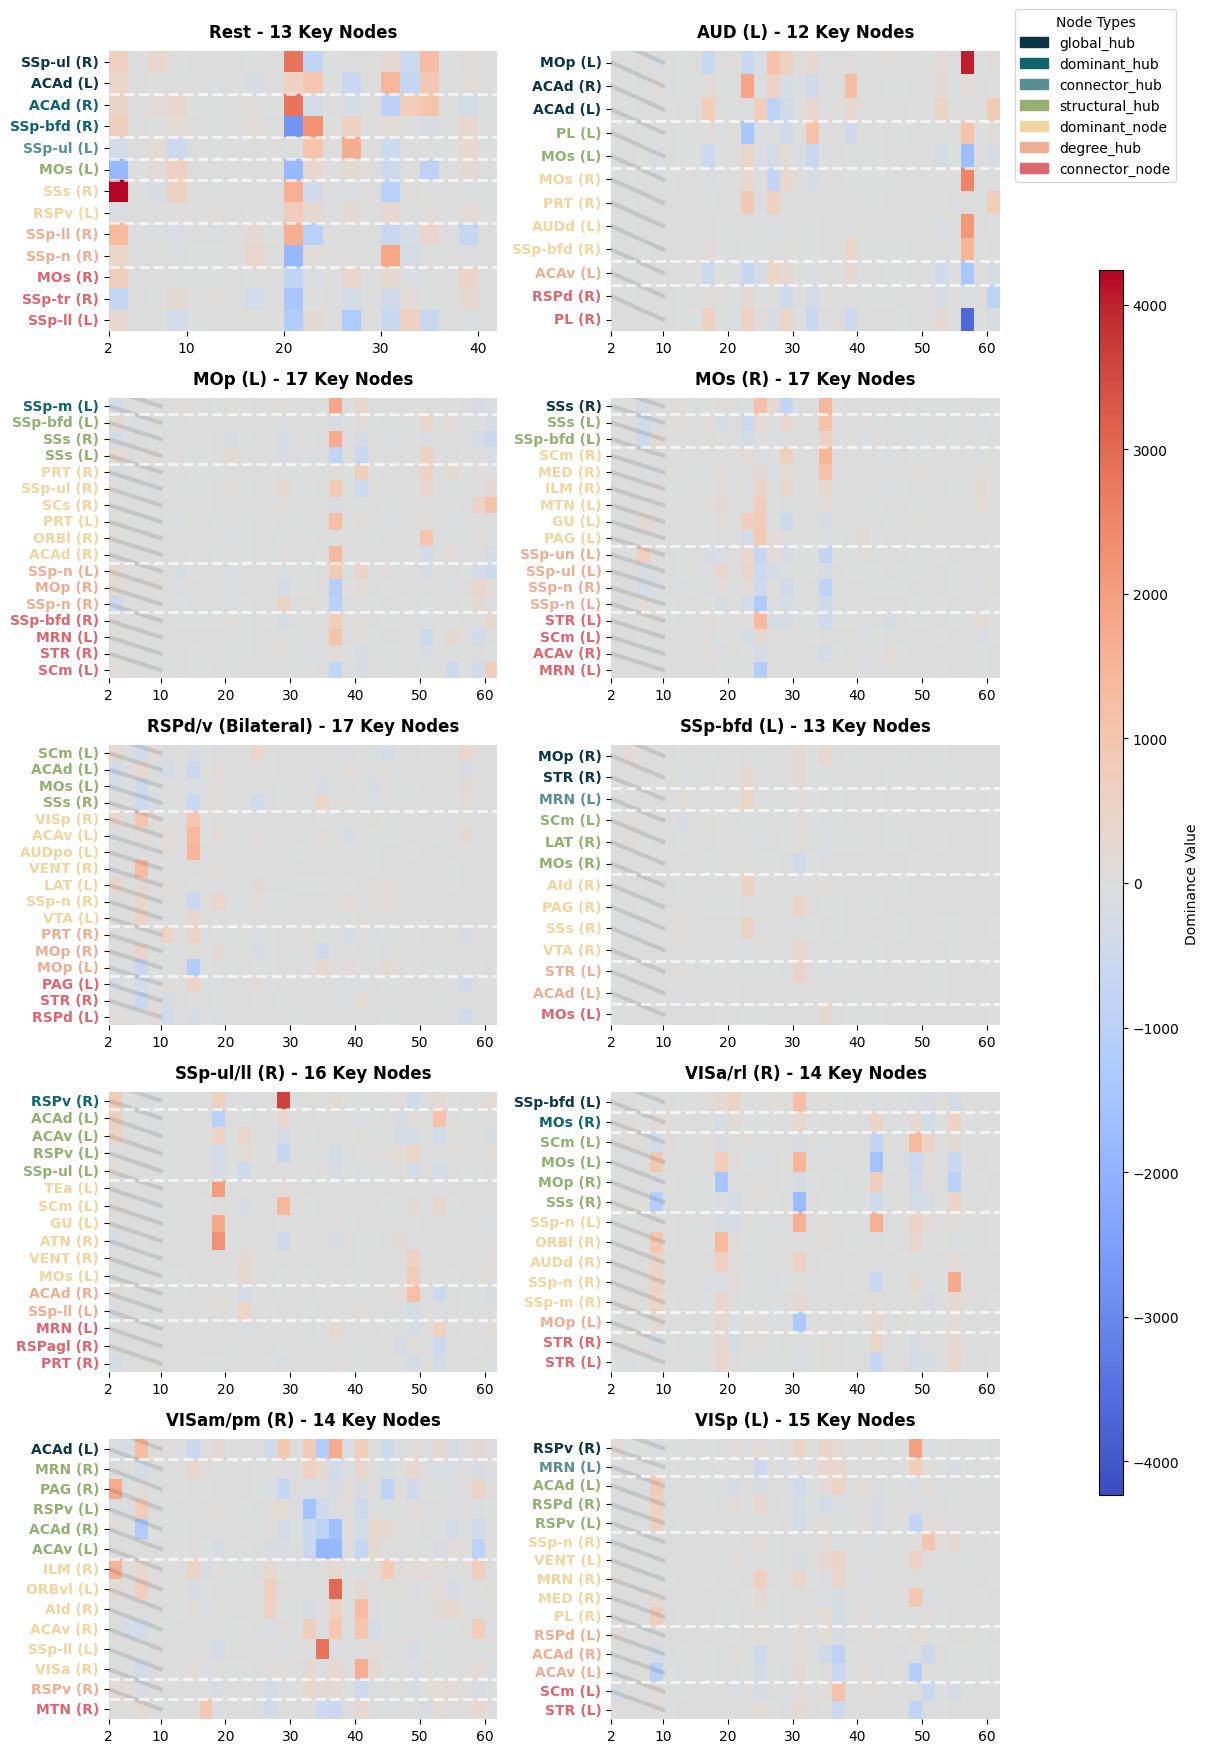

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def plot_key_nodes_heatmap(results, key_nodes_analysis, sampling_rate=0.5, stim_duration=10):
    """
    Visualize key nodes with temporal dominance patterns using heatmaps
    
    Args:
        results: Dictionary containing ROI dominance results
        key_nodes_analysis: Dictionary with node classification results
        sampling_rate: Data sampling frequency in Hz
        stim_duration: Stimulation duration in seconds
    """
    # Visualization settings
    cmap = 'coolwarm'
    
    # Determine global color scale range
    max_abs_values = []
    for condition, data in results.items():
        if condition != 'roi_names' and 'roi_dominance' in data:
            max_abs_values.append(np.nanmax(np.abs(data['roi_dominance'])))
    
    max_abs = max(max_abs_values) if max_abs_values else 1.0

    # Organize conditions with Rest first
    all_conditions = [cond for cond in results.keys() if cond != 'roi_names']
    rest_conditions = [cond for cond in all_conditions if cond.lower() == 'rest']
    other_conditions = sorted([cond for cond in all_conditions if cond.lower() != 'rest'])
    conditions = rest_conditions + other_conditions
    
    # Create figure layout
    n_conditions = len(conditions)
    n_rows = (n_conditions + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 3.5 * n_rows))
    axes_flat = axes.flatten() if n_rows > 1 else axes.reshape(1, -1)
    
    # Node type styling
    node_type_colors = {
        'global_hub': '#0c3547',
        'dominant_hub': '#10656d',
        'connector_hub': '#598f91',
        'structural_hub': '#93b071',
        'dominant_node': '#f0d59e',
        'degree_hub': '#edae93',
        'connector_node': '#dd6670',
        'normal': 'gray'
    }
    node_type_order = list(node_type_colors.keys())
    
    # Plot each condition
    for i, (ax, condition) in enumerate(zip(axes_flat, conditions)):
        data = results[condition]
        key_data = key_nodes_analysis[condition]
        print(f"\nProcessing condition: {condition}")
        
        # Extract relevant data
        roi_dominance = data['roi_dominance']
        node_classifications = key_data['node_classification']
        
        # Filter and sort key nodes
        key_nodes = [node for node in node_classifications if node['category'] != 'normal']
        if not key_nodes:
            ax.text(0.5, 0.5, 'No Key Nodes', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=14)
            ax.set_title(f"{condition} - No Key Nodes", fontsize=12)
            continue
            
        key_nodes_sorted = sorted(key_nodes, 
                                 key=lambda x: (node_type_order.index(x['category']), 
                                               -x['mean_dominance']))
        
        # Prepare data for plotting
        key_indices = [node['roi_index'] for node in key_nodes_sorted]
        key_names = [node['roi_name'] for node in key_nodes_sorted]
        key_categories = [node['category'] for node in key_nodes_sorted]
        key_dominance = roi_dominance[key_indices, :]
        
        # Create time axis
        time_points = roi_dominance.shape[1]
        time_axis = 2 + np.arange(time_points) / sampling_rate
        
        # Plot heatmap
        sns.heatmap(
            key_dominance,
            cmap=cmap,
            xticklabels=False,
            yticklabels=key_names,
            cbar=False,
            vmin=-max_abs,
            vmax=max_abs,
            ax=ax
        )
        
        # Style y-axis labels by node type
        for label, category in zip(ax.get_yticklabels(), key_categories):
            label.set_color(node_type_colors[category])
            label.set_fontweight('bold')
        
        # Configure x-axis ticks
        tick_positions = []
        tick_labels = []
        for t in [2] + list(range(10, int(time_axis[-1])+1, 10)):
            idx = np.where(time_axis >= t)[0][0]
            tick_positions.append(idx)
            tick_labels.append(str(t))
        
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels, rotation=0)
        
        # Highlight stimulated ROI if present
        stim_roi = data.get('stim_roi')
        if stim_roi in key_names:
            stim_idx = key_names.index(stim_roi)
            ax.add_patch(plt.Rectangle((0, stim_idx), time_points, 1, 
                                     fill=False, edgecolor='white', lw=3))
        
        # Mark stimulation period for non-rest conditions
        if condition.lower() != 'rest':
            stim_end_idx = np.where(time_axis >= stim_duration)[0][0]
            for y in range(len(key_names)):
                ax.plot([0, stim_end_idx], [y-0.5, y+0.5], 
                       color='black', linewidth=3, alpha=0.1)
        
        ax.set_title(f"{condition} - {len(key_nodes)} Key Nodes", 
                    fontsize=12, pad=10, fontweight='bold')
        
        # Add separators between node types
        current_category = key_categories[0]
        for j, category in enumerate(key_categories[1:], 1):
            if category != current_category:
                ax.axhline(y=j, color='white', linewidth=2, linestyle='--', alpha=0.7)
                current_category = category
    
    # Hide unused subplots
    for j in range(len(conditions), len(axes_flat)):
        axes_flat[j].axis('off')
    
    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-max_abs, vmax=max_abs))
    sm._A = []
    fig.colorbar(sm, cax=cbar_ax, label='Dominance Value')
    
    # Create legend
    legend_patches = [mpatches.Patch(color=color, label=label) 
                     for label, color in node_type_colors.items() 
                     if label != 'normal']
    
    fig.legend(handles=legend_patches, loc='center right', 
              bbox_to_anchor=(0.99, 0.95), title='Node Types')
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.savefig('key_nodes_temporal_heatmap.pdf', bbox_inches='tight', dpi=300)
    plt.show()

plot_key_nodes_heatmap(roi_dominance_results, key_nodes_analysis, sampling_rate=0.5, stim_duration=10)

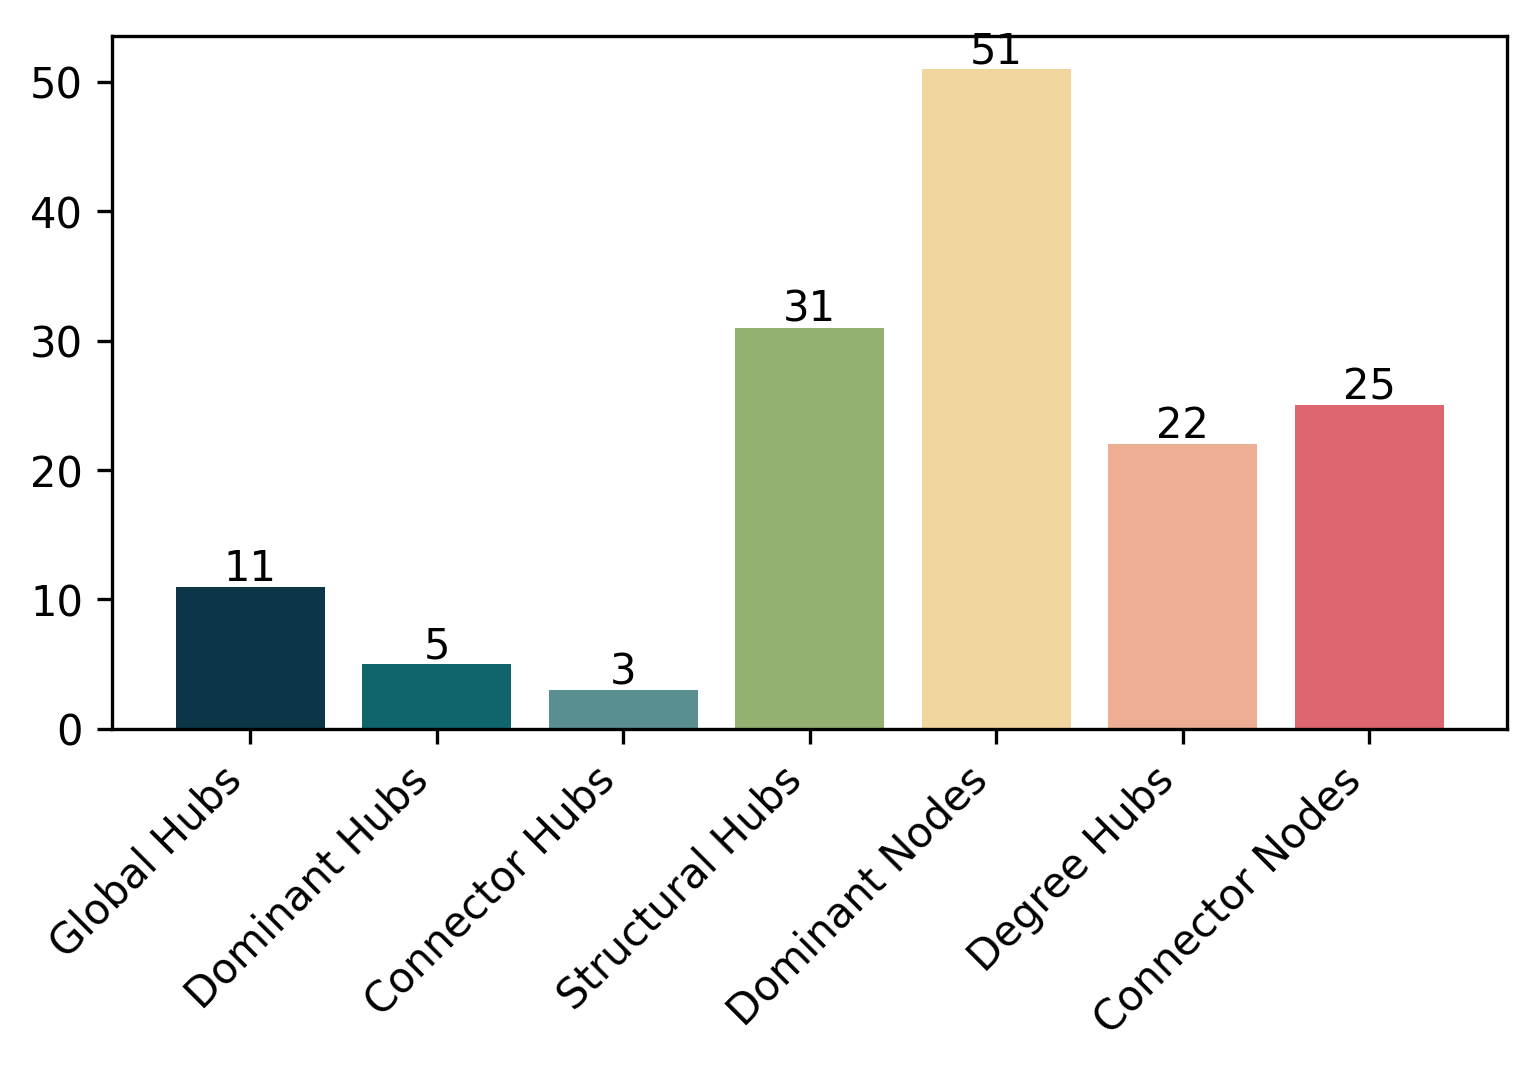

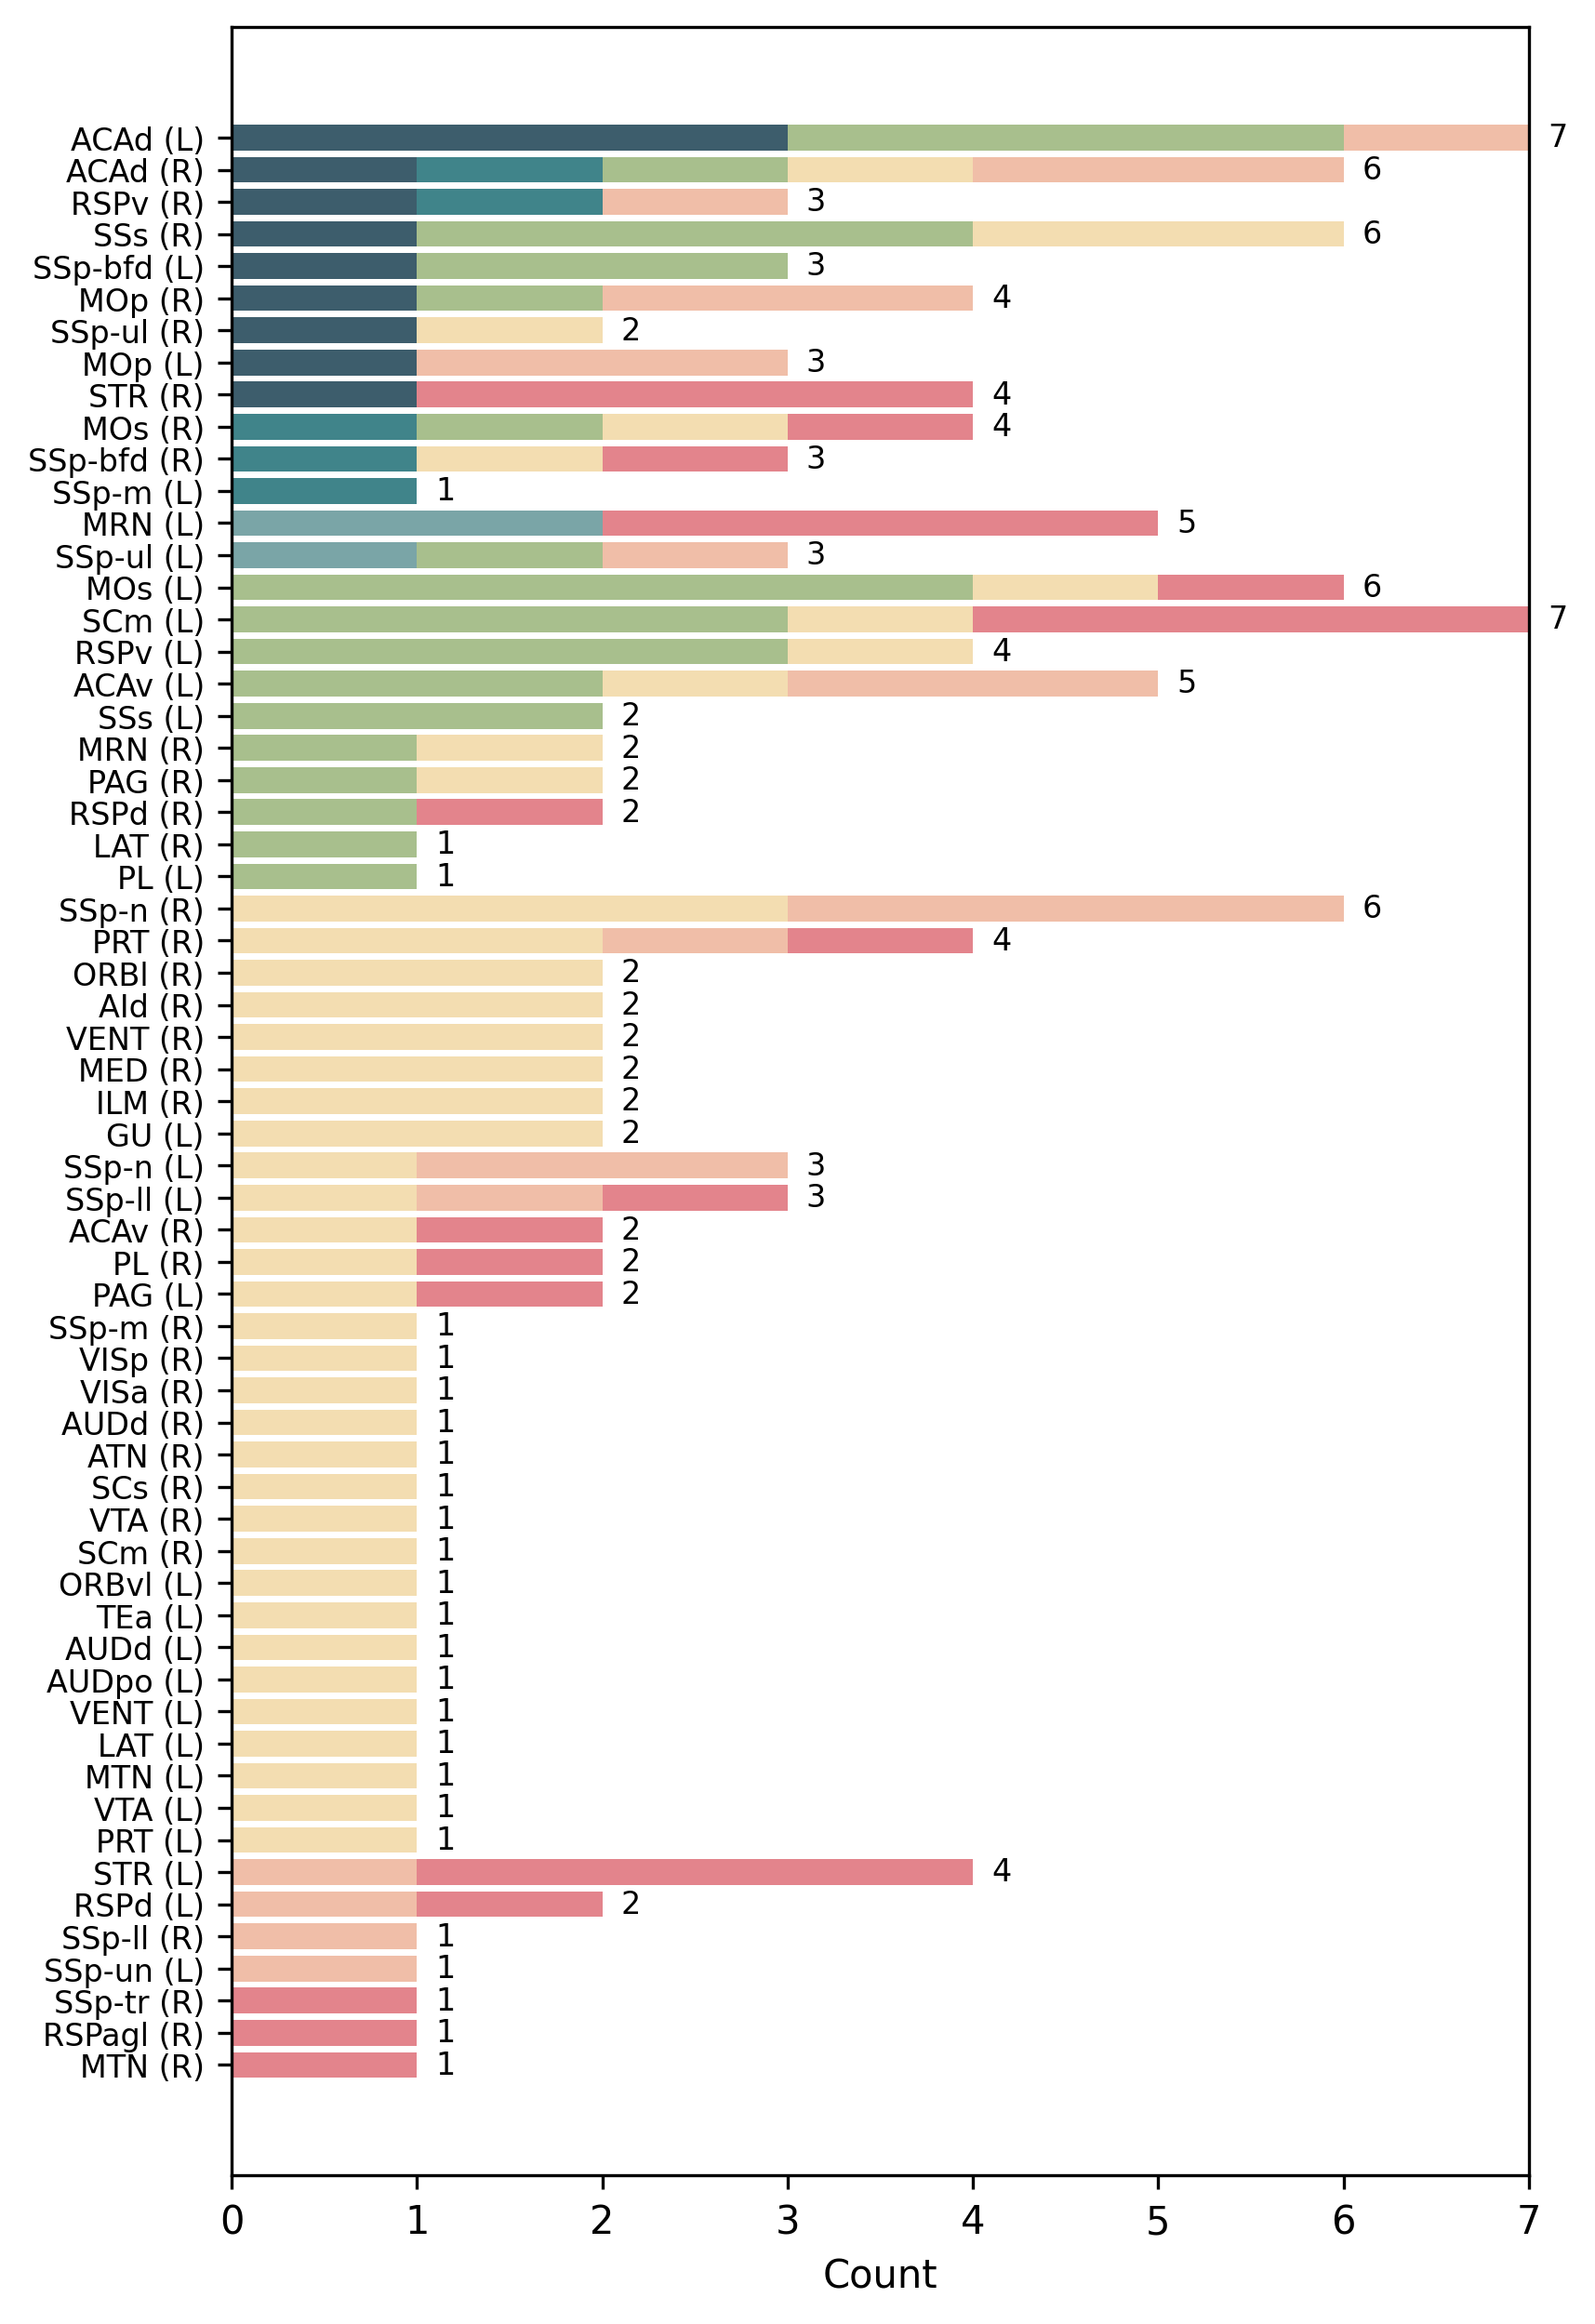

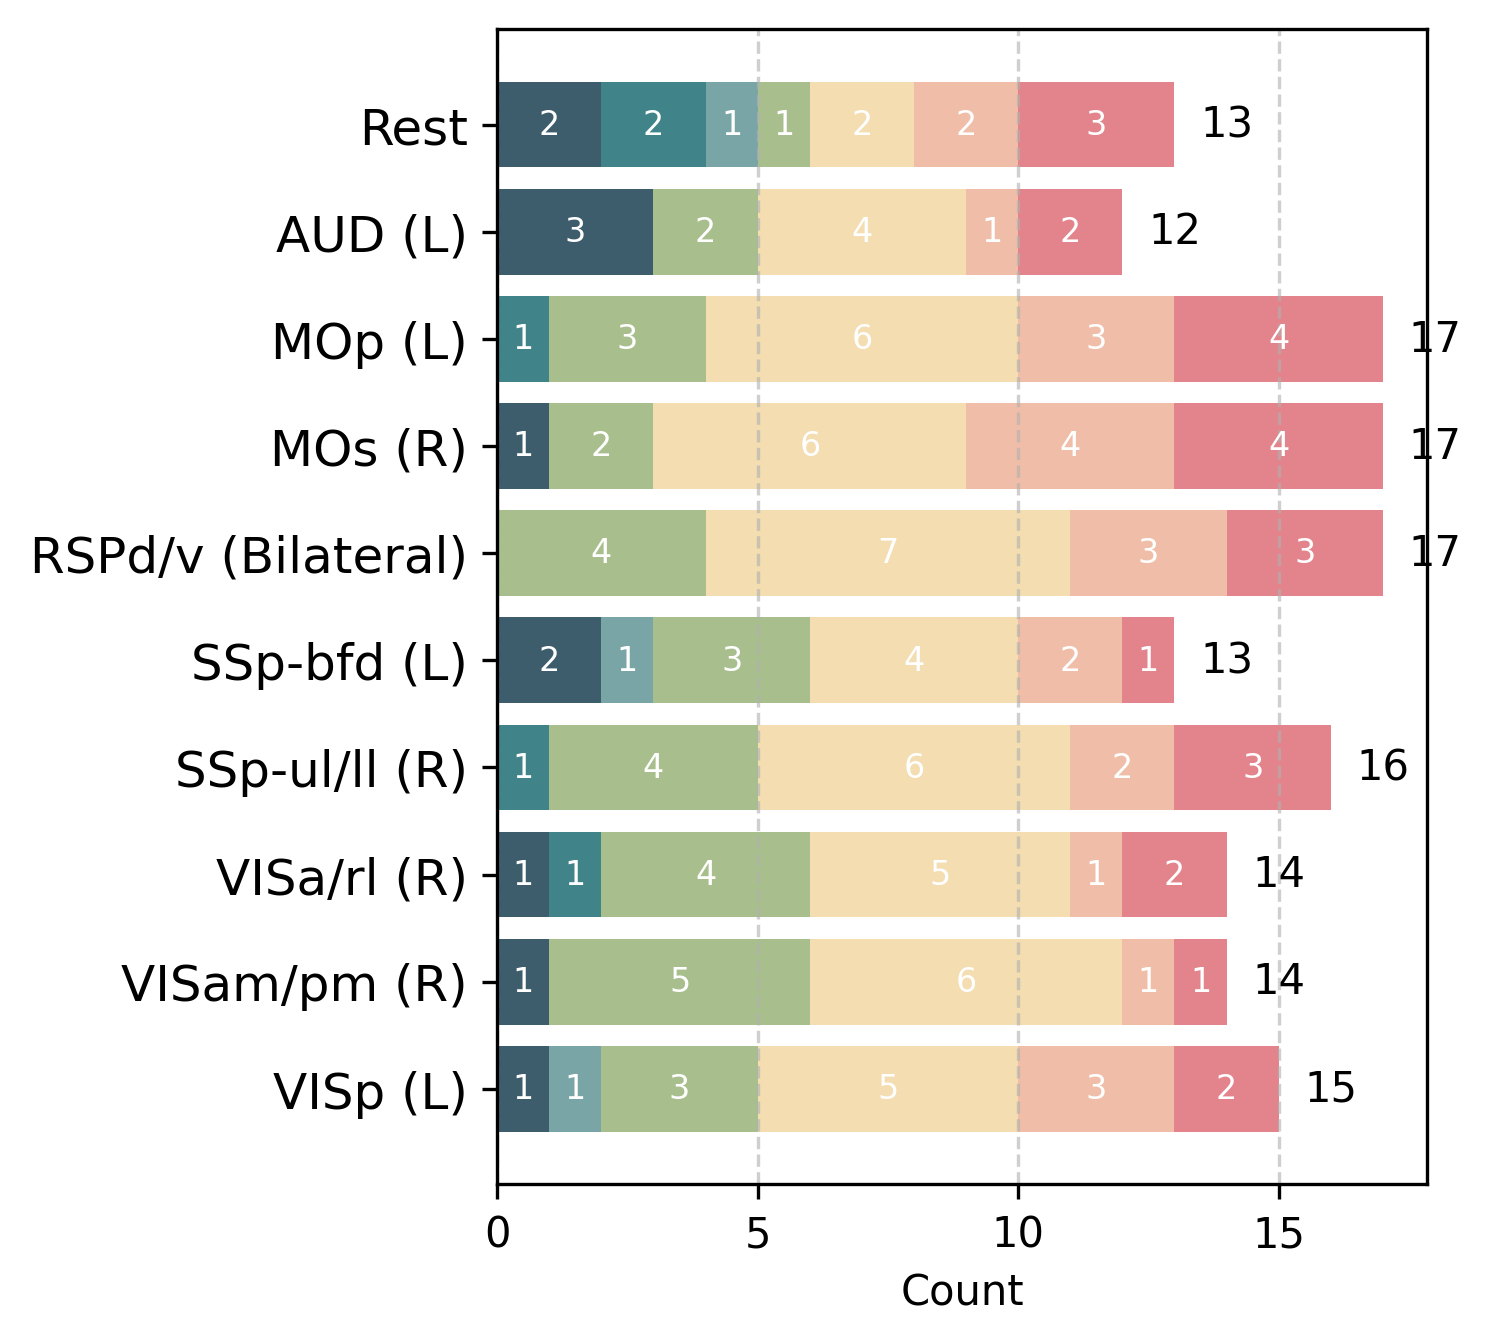

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def plot_cross_condition_comparison(roi_dominance_results, key_nodes_analysis):
    """
    Visualize cross-condition comparison of specially marked nodes
    Shows performance of key nodes across conditions with stacked bar chart
    
    Args:
        roi_dominance_results: Results from get_roi_dominance_series_with_metrics
        key_nodes_analysis: Results from classify_key_nodes_with_metrics
    """
    # Node type color and style definitions
    node_type_colors = {
        'global_hub': '#0c3547',
        'dominant_hub': '#10656d',
        'connector_hub': '#598f91',
        'structural_hub': '#93b071',
        'dominant_node': '#f0d59e',
        'degree_hub': '#edae93',
        'connector_node': '#dd6670',
        'normal': 'gray'
    }
    
    node_type_markers = {
        'global_hub': 'D',
        'dominant_hub': 's',
        'connector_hub': '^',
        'structural_hub': 'v',
        'dominant_node': 'o',
        'degree_hub': 'p',
        'connector_node': 'h',
        'normal': '.'
    }
    
    # Get conditions and ROI info
    conditions = list(roi_dominance_results.keys())
    roi_names = roi_dominance_results[conditions[0]]['roi_names']
    n_rois = len(roi_names)
    
    # Prepare key node classification
    key_nodes_by_type = {
        'global_hub': [],
        'dominant_hub': [],
        'connector_hub': [],
        'structural_hub': [],
        'dominant_node': [],
        'degree_hub': [],
        'connector_node': []
    }
    
    # Create classification info for each ROI
    roi_classifications = {}
    for i in range(n_rois):
        roi_classifications[i] = {
            'name': roi_names[i],
            'conditions': {}
        }
        
        # Add classification for each condition
        for condition in conditions:
            node_class = key_nodes_analysis[condition]['node_classification'][i]
            roi_classifications[i]['conditions'][condition] = {
                'classification': node_class['category'],
                'dominance': node_class['mean_dominance'],
                'degree': node_class['mean_degree'],
                'betweenness': node_class['mean_betweenness']
            }
            
            # Add to key node type list
            if node_class['category'] != 'normal':
                key_nodes_by_type[node_class['category']].append(i)
    
    # ===== Main Plot: Cross-condition DomiRank changes =====
    fig_main = plt.figure(figsize=(18, 12), dpi=300)
    ax_main = fig_main.add_subplot(111)
    
    # Prepare data
    node_data = []
    node_types = []
    node_labels = []
    
    # Combine all key nodes (excluding normal nodes)
    all_key_nodes = []
    for node_type in ['global_hub', 'dominant_hub', 'connector_hub', 
                     'structural_hub', 'dominant_node', 'degree_hub', 
                     'connector_node']:
        all_key_nodes.extend(key_nodes_by_type[node_type])
    
    all_key_nodes = list(set(all_key_nodes))  # Remove duplicates

    for node_idx in all_key_nodes:
        # Determine node type (get most significant classification across conditions)
        classifications = []
        for cond in conditions:
            classification = roi_classifications[node_idx]['conditions'][cond]['classification']
            classifications.append(classification)
        
        # Find most significant classification
        priority_order = ['global_hub', 'dominant_hub', 'connector_hub',
                         'structural_hub', 'dominant_node', 'degree_hub',
                         'connector_node']
        
        node_type = 'normal'
        for cat in priority_order:
            if cat in classifications:
                node_type = cat
                break
        
        # Collect cross-condition data
        domiranks = []
        for cond in conditions:
            domiranks.append(roi_dominance_results[cond]['mean_dominance'][node_idx])
        
        node_data.append(domiranks)
        node_types.append((node_type_colors[node_type], node_type_markers[node_type]))
        node_labels.append(roi_names[node_idx])
    
    # Plot lines and markers
    x = range(len(conditions))
    for i, (data, (color, marker)) in enumerate(zip(node_data, node_types)):
        ax_main.plot(x, data, color=color, alpha=0.3, lw=1)
        for j, y in enumerate(data):
            ax_main.scatter(j, y, color=color, marker=marker, s=80, alpha=0.7)
    
    # Add simplified labels (only first and last condition to avoid overlap)
    for j, cond in enumerate(conditions):
        for i, (data, (color, _)) in enumerate(zip(node_data, node_types)):
            if j == 0 or j == len(conditions)-1:
                ax_main.text(j, data[j], node_labels[i], 
                           fontsize=8, color=color,
                           ha='center', va='bottom')
    
    ax_main.set_ylabel('DomiRank Score', labelpad=10)
    ax_main.set_xticks(x)
    ax_main.set_xticklabels(conditions, rotation=45, ha='right')
    ax_main.grid(True, linestyle='--', alpha=0.6)
    ax_main.set_title('Cross-Condition DomiRank Comparison for Key Nodes')
    
    # Add legend
    legend_elements = []
    for node_type, color in node_type_colors.items():
        if node_type != 'normal':
            marker = node_type_markers[node_type]
            legend_elements.append(plt.Line2D([0], [0], marker=marker, color='w', 
                                            markerfacecolor=color, markersize=10,
                                            label=node_type.replace('_', ' ').title()))
    
    ax_main.legend(handles=legend_elements, loc='best')
    
    # Save main plot as separate PDF
    fig_main.savefig('cross_condition_comparison_main.pdf', bbox_inches='tight')
    plt.close(fig_main)
    
    # ===== Node Type Distribution Plot =====
    fig_types = plt.figure(figsize=(6, 3), dpi=300)
    ax_types = fig_types.add_subplot(111)
    
    type_counts = [
        len(key_nodes_by_type['global_hub']),
        len(key_nodes_by_type['dominant_hub']),
        len(key_nodes_by_type['connector_hub']),
        len(key_nodes_by_type['structural_hub']),
        len(key_nodes_by_type['dominant_node']),
        len(key_nodes_by_type['degree_hub']),
        len(key_nodes_by_type['connector_node'])
    ]
    
    type_labels = [
        'Global Hubs', 
        'Dominant Hubs', 
        'Connector Hubs',
        'Structural Hubs',
        'Dominant Nodes',
        'Degree Hubs',
        'Connector Nodes'
    ]
    
    type_colors = [
        node_type_colors['global_hub'],
        node_type_colors['dominant_hub'],
        node_type_colors['connector_hub'],
        node_type_colors['structural_hub'],
        node_type_colors['dominant_node'],
        node_type_colors['degree_hub'],
        node_type_colors['connector_node']
    ]
    
    ax_types.bar(type_labels, type_counts, color=type_colors)
    
    # Add value labels on bars
    for i, v in enumerate(type_counts):
        ax_types.text(i, v + 0.5, str(v), ha='center')
    
    plt.xticks(rotation=45, ha='right')
    
    # Save node type distribution as separate PDF
    fig_types.savefig('node_type_distribution.pdf', bbox_inches='tight')
    plt.show(fig_types)
    
    # ===== Stacked Bar Chart (horizontal version, top-to-bottom) =====
    fig_stack = plt.figure(figsize=(6, 10), dpi=300)
    ax_stack = fig_stack.add_subplot(111)

    # Prepare stacked bar chart data
    stack_data = {
        'global_hub': np.zeros(n_rois),
        'dominant_hub': np.zeros(n_rois),
        'connector_hub': np.zeros(n_rois),
        'structural_hub': np.zeros(n_rois),
        'dominant_node': np.zeros(n_rois),
        'degree_hub': np.zeros(n_rois),
        'connector_node': np.zeros(n_rois)
    }

    # Count type occurrences for each ROI across conditions
    for roi_idx in range(n_rois):
        for cond in conditions:
            classification = roi_classifications[roi_idx]['conditions'][cond]['classification']
            if classification in stack_data:
                stack_data[classification][roi_idx] += 1

    # Only show ROIs that are key nodes in at least one condition
    relevant_rois = [roi_idx for roi_idx in range(n_rois) 
                    if np.sum([stack_data[t][roi_idx] for t in stack_data]) > 0]

    if not relevant_rois:
        ax_stack.text(0.5, 0.5, 'No key nodes found across conditions', 
                    ha='center', va='center', fontsize=12)
    else:
        # Create sorting key (priority to more significant hub types)
        def sort_key(roi_idx):
            scores = []
            for t in ['global_hub', 'dominant_hub', 'connector_hub',
                     'structural_hub', 'dominant_node', 'degree_hub',
                     'connector_node']:
                scores.append(stack_data[t][roi_idx])
            return tuple(-s for s in scores)
        
        # Sort and reverse for bottom-to-top display
        relevant_rois_sorted = sorted(relevant_rois, key=sort_key)[::-1]
        
        # Prepare stacked data
        left = np.zeros(len(relevant_rois_sorted))
        colors = [node_type_colors[t] for t in stack_data.keys()]
        labels = [t.replace('_', ' ').title() for t in stack_data.keys()]
        
        # Draw horizontal bars
        for i, (key, color) in enumerate(zip(stack_data.keys(), colors)):
            counts = stack_data[key][relevant_rois_sorted]
            ax_stack.barh(range(len(relevant_rois_sorted)), counts, left=left, 
                        color=color, label=labels[i], alpha=0.8)
            left += counts
        
        # Set y-axis labels as ROI names
        ax_stack.set_yticks(range(len(relevant_rois_sorted)))
        ax_stack.set_yticklabels([roi_names[i] for i in relevant_rois_sorted], 
                            fontsize=8)
        
        # Add total labels on the right of each bar
        for roi_pos, roi_idx in enumerate(relevant_rois_sorted):
            total = sum(stack_data[t][roi_idx] for t in stack_data)
            ax_stack.text(total + 0.1, roi_pos, str(int(total)), 
                        ha='left', va='center', fontsize=8)

    ax_stack.set_xlabel('Count', fontsize=12)
    fig_stack.savefig('key_node_distribution.pdf', bbox_inches='tight')
    plt.show(fig_stack)
    
    return roi_classifications, key_nodes_by_type


def plot_combined_heatmap_and_stackbar(roi_dominance_results, roi_classifications, key_nodes_by_type):
    """
    Create separate visualizations for condition correlations and key node distributions
    
    Args:
        roi_dominance_results: Results from get_roi_dominance_series_with_metrics
        roi_classifications: ROI classification information
        key_nodes_by_type: Key nodes grouped by type
    """
    # Get condition list with 'Rest' first if present
    conditions = list(roi_dominance_results.keys())
    if 'Rest' in conditions:
        conditions.remove('Rest')
        conditions = ['Rest'] + sorted(conditions)
    else:
        conditions = sorted(conditions)
    
    # ===== Stacked Bar Chart: Counts of different key node types per condition =====
    fig_stackbar = plt.figure(figsize=(4, 5), dpi=300)
    ax_stackbar = fig_stackbar.add_subplot(111)

    # Node type color definitions
    node_type_colors = {
        'global_hub': '#0c3547',
        'dominant_hub': '#10656d',
        'connector_hub': '#598f91',
        'structural_hub': '#93b071',
        'dominant_node': '#f0d59e',
        'degree_hub': '#edae93',
        'connector_node': '#dd6670'
    }

    # Prepare stacked bar chart data
    stack_data = {
        'global_hub': [],
        'dominant_hub': [],
        'connector_hub': [],
        'structural_hub': [],
        'dominant_node': [],
        'degree_hub': [],
        'connector_node': []
    }

    # Count node types per condition
    for cond in conditions:
        counts = {key: 0 for key in stack_data.keys()}
        
        for roi_id, roi_data in roi_classifications.items():
            node_type = roi_data['conditions'][cond]['classification']
            if node_type in stack_data:
                counts[node_type] += 1
        
        for key in stack_data:
            stack_data[key].append(counts[key])

    # Set colors and labels (in priority order for stacking)
    categories = [
        'global_hub',
        'dominant_hub',
        'connector_hub',
        'structural_hub',
        'dominant_node',
        'degree_hub',
        'connector_node'
    ]
    
    labels = [
        'Global Hubs',
        'Dominant Hubs',
        'Connector Hubs',
        'Structural Hubs',
        'Dominant Nodes',
        'Degree Hubs',
        'Connector Nodes'
    ]
    
    colors = [node_type_colors[cat] for cat in categories]

    # Draw horizontal stacked bars with correct order
    left = np.zeros(len(conditions))
    positions = list(range(len(conditions)))[::-1]  # Reverse positions for top-down

    for i, (key, color) in enumerate(zip(categories, colors)):
        counts = stack_data[key]
        ax_stackbar.barh(positions, counts, left=left, 
                        color=color, label=labels[i], alpha=0.8)
        left += counts
        
        # Add value labels inside each segment (only if count > 0)
        for j, count in enumerate(counts):
            if count > 0:
                x_pos = left[j] - counts[j]/2  # Center of segment
                ax_stackbar.text(x_pos, positions[j], str(count), 
                            ha='center', va='center', color='white', fontsize=8)

    # Set y-axis tick labels (conditions) in original order but positions reversed
    ax_stackbar.set_yticks(positions)
    ax_stackbar.set_yticklabels(conditions, fontsize=12)
    ax_stackbar.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax_stackbar.set_xlabel('Count', fontsize=12)

    # Add total labels on right
    total_counts = [sum(stack_data[key][i] for key in stack_data) for i in range(len(conditions))]
    for j, total in enumerate(total_counts):
        ax_stackbar.text(total + 0.5, positions[j], str(total), 
                    ha='left', va='center', fontsize=10)

    ax_stackbar.grid(axis='x', linestyle='--', alpha=0.6)
    fig_stackbar.savefig('key_node_counts_per_condition.pdf', bbox_inches='tight')
    plt.show(fig_stackbar)

roi_classifications, key_nodes_by_type = plot_cross_condition_comparison(roi_dominance_results, key_nodes_analysis)
plot_combined_heatmap_and_stackbar(roi_dominance_results, roi_classifications, key_nodes_by_type)